# Proyek Analisis Data: Air Quality Dataset
- Nama: Vidi Fitriansyah Hidarlan
- Email: vidihidarlan@gmail.com
- Id Dicoding: vidi005

## Menentukan Pertanyaan Bisnis

- Bagaimana tren indeks kualitas udara berdasarkan parameter PM2.5 dan PM10 per-semester dari tahun 2013-2017 di beberapa distrik di Tiongkok?
- Bagaimana tren indeks kualitas udara di beberapa distrik di Tiongkok di tiap bulannya dalam periode satu tahunan?
- Distrik mana yang memiliki indeks kualitas udara terbaik dan terburuk?
- Bagaimana demografi indeks kualitas udara di Tiongkok?
- Kapan waktu yang mempengaruhi tinggi dan rendahnya indeks kualitas udara?
- Bagaimana hubungan antara PM2.5, PM10, SO<sub>2</sub > (Belerang Dioksida), NO<sub>2</sub> (Nitrogen Dioksida), dan CO (Karbon Monoksida) terhadap kualitas udara?

## Menyiapkan semua library yang dibutuhkan

In [2]:
import numpy as np
import pandas as pd
from dateutil.relativedelta import relativedelta
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

#### Aotizhongxin Air Quality Dataset

In [3]:
aotizhongxin_df = pd.read_csv('data/PRSA_Data_Aotizhongxin_20130301-20170228.csv')
aotizhongxin_df

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,4.0,4.0,4.0,7.0,300.0,77.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Aotizhongxin
1,2,2013,3,1,1,8.0,8.0,4.0,7.0,300.0,77.0,-1.1,1023.2,-18.2,0.0,N,4.7,Aotizhongxin
2,3,2013,3,1,2,7.0,7.0,5.0,10.0,300.0,73.0,-1.1,1023.5,-18.2,0.0,NNW,5.6,Aotizhongxin
3,4,2013,3,1,3,6.0,6.0,11.0,11.0,300.0,72.0,-1.4,1024.5,-19.4,0.0,NW,3.1,Aotizhongxin
4,5,2013,3,1,4,3.0,3.0,12.0,12.0,300.0,72.0,-2.0,1025.2,-19.5,0.0,N,2.0,Aotizhongxin
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35059,35060,2017,2,28,19,12.0,29.0,5.0,35.0,400.0,95.0,12.5,1013.5,-16.2,0.0,NW,2.4,Aotizhongxin
35060,35061,2017,2,28,20,13.0,37.0,7.0,45.0,500.0,81.0,11.6,1013.6,-15.1,0.0,WNW,0.9,Aotizhongxin
35061,35062,2017,2,28,21,16.0,37.0,10.0,66.0,700.0,58.0,10.8,1014.2,-13.3,0.0,NW,1.1,Aotizhongxin
35062,35063,2017,2,28,22,21.0,44.0,12.0,87.0,700.0,35.0,10.5,1014.4,-12.9,0.0,NNW,1.2,Aotizhongxin


#### Changping Air Quality Dataset

In [4]:
changping_df = pd.read_csv('data/PRSA_Data_Changping_20130301-20170228.csv')
changping_df

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,3.0,6.0,13.0,7.0,300.0,85.0,-2.3,1020.8,-19.7,0.0,E,0.5,Changping
1,2,2013,3,1,1,3.0,3.0,6.0,6.0,300.0,85.0,-2.5,1021.3,-19.0,0.0,ENE,0.7,Changping
2,3,2013,3,1,2,3.0,3.0,22.0,13.0,400.0,74.0,-3.0,1021.3,-19.9,0.0,ENE,0.2,Changping
3,4,2013,3,1,3,3.0,6.0,12.0,8.0,300.0,81.0,-3.6,1021.8,-19.1,0.0,NNE,1.0,Changping
4,5,2013,3,1,4,3.0,3.0,14.0,8.0,300.0,81.0,-3.5,1022.3,-19.4,0.0,N,2.1,Changping
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35059,35060,2017,2,28,19,28.0,47.0,4.0,14.0,300.0,NaN,11.7,1008.9,-13.3,0.0,NNE,1.3,Changping
35060,35061,2017,2,28,20,12.0,12.0,3.0,23.0,500.0,64.0,10.9,1009.0,-14.0,0.0,N,2.1,Changping
35061,35062,2017,2,28,21,7.0,23.0,5.0,17.0,500.0,68.0,9.5,1009.4,-13.0,0.0,N,1.5,Changping
35062,35063,2017,2,28,22,11.0,20.0,3.0,15.0,500.0,72.0,7.8,1009.6,-12.6,0.0,NW,1.4,Changping


#### Dingling Air Quality Dataset

In [5]:
dingling_df = pd.read_csv('data/PRSA_Data_Dingling_20130301-20170228.csv')
dingling_df

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,4.0,4.0,3.0,NaN,200.0,82.0,-2.3,1020.8,-19.7,0.0,E,0.5,Dingling
1,2,2013,3,1,1,7.0,7.0,3.0,NaN,200.0,80.0,-2.5,1021.3,-19.0,0.0,ENE,0.7,Dingling
2,3,2013,3,1,2,5.0,5.0,3.0,2.0,200.0,79.0,-3.0,1021.3,-19.9,0.0,ENE,0.2,Dingling
3,4,2013,3,1,3,6.0,6.0,3.0,NaN,200.0,79.0,-3.6,1021.8,-19.1,0.0,NNE,1.0,Dingling
4,5,2013,3,1,4,5.0,5.0,3.0,NaN,200.0,81.0,-3.5,1022.3,-19.4,0.0,N,2.1,Dingling
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35059,35060,2017,2,28,19,11.0,11.0,2.0,2.0,200.0,99.0,11.7,1008.9,-13.3,0.0,NNE,1.3,Dingling
35060,35061,2017,2,28,20,13.0,13.0,2.0,2.0,200.0,101.0,10.9,1009.0,-14.0,0.0,N,2.1,Dingling
35061,35062,2017,2,28,21,9.0,14.0,2.0,2.0,200.0,102.0,9.5,1009.4,-13.0,0.0,N,1.5,Dingling
35062,35063,2017,2,28,22,10.0,12.0,2.0,2.0,200.0,97.0,7.8,1009.6,-12.6,0.0,NW,1.4,Dingling


#### Dongsi Air Quality Dataset

In [6]:
dongsi_df = pd.read_csv('data/PRSA_Data_Dongsi_20130301-20170228.csv')
dongsi_df

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,9.0,9.0,3.0,17.0,300.0,89.0,-0.5,1024.5,-21.4,0.0,NNW,5.7,Dongsi
1,2,2013,3,1,1,4.0,4.0,3.0,16.0,300.0,88.0,-0.7,1025.1,-22.1,0.0,NW,3.9,Dongsi
2,3,2013,3,1,2,7.0,7.0,NaN,17.0,300.0,60.0,-1.2,1025.3,-24.6,0.0,NNW,5.3,Dongsi
3,4,2013,3,1,3,3.0,3.0,5.0,18.0,NaN,NaN,-1.4,1026.2,-25.5,0.0,N,4.9,Dongsi
4,5,2013,3,1,4,3.0,3.0,7.0,NaN,200.0,84.0,-1.9,1027.1,-24.5,0.0,NNW,3.2,Dongsi
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35059,35060,2017,2,28,19,16.0,51.0,3.0,29.0,400.0,73.0,12.5,1013.5,-16.2,0.0,NW,2.4,Dongsi
35060,35061,2017,2,28,20,18.0,45.0,3.0,43.0,500.0,54.0,11.6,1013.6,-15.1,0.0,WNW,0.9,Dongsi
35061,35062,2017,2,28,21,23.0,58.0,5.0,61.0,700.0,28.0,10.8,1014.2,-13.3,0.0,NW,1.1,Dongsi
35062,35063,2017,2,28,22,23.0,53.0,9.0,75.0,900.0,15.0,10.5,1014.4,-12.9,0.0,NNW,1.2,Dongsi


#### Guanyuan Air Quality Dataset

In [7]:
guanyuan_df = pd.read_csv('data/PRSA_Data_Guanyuan_20130301-20170228.csv')
guanyuan_df

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,4.0,4.0,14.0,20.0,300.0,69.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Guanyuan
1,2,2013,3,1,1,4.0,4.0,13.0,17.0,300.0,72.0,-1.1,1023.2,-18.2,0.0,N,4.7,Guanyuan
2,3,2013,3,1,2,3.0,3.0,10.0,19.0,300.0,69.0,-1.1,1023.5,-18.2,0.0,NNW,5.6,Guanyuan
3,4,2013,3,1,3,3.0,6.0,7.0,24.0,400.0,62.0,-1.4,1024.5,-19.4,0.0,NW,3.1,Guanyuan
4,5,2013,3,1,4,3.0,6.0,5.0,14.0,400.0,71.0,-2.0,1025.2,-19.5,0.0,N,2.0,Guanyuan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35059,35060,2017,2,28,19,13.0,37.0,3.0,36.0,400.0,60.0,12.5,1013.5,-16.2,0.0,NW,2.4,Guanyuan
35060,35061,2017,2,28,20,20.0,43.0,4.0,48.0,500.0,43.0,11.6,1013.6,-15.1,0.0,WNW,0.9,Guanyuan
35061,35062,2017,2,28,21,16.0,33.0,5.0,39.0,500.0,50.0,10.8,1014.2,-13.3,0.0,NW,1.1,Guanyuan
35062,35063,2017,2,28,22,11.0,24.0,5.0,47.0,500.0,41.0,10.5,1014.4,-12.9,0.0,NNW,1.2,Guanyuan


#### Gucheng Air Quality Dataset

In [8]:
gucheng_df = pd.read_csv('data/PRSA_Data_Gucheng_20130301-20170228.csv')
gucheng_df

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,6.0,18.0,5.0,NaN,800.0,88.0,0.1,1021.1,-18.6,0.0,NW,4.4,Gucheng
1,2,2013,3,1,1,6.0,15.0,5.0,NaN,800.0,88.0,-0.3,1021.5,-19.0,0.0,NW,4.0,Gucheng
2,3,2013,3,1,2,5.0,18.0,NaN,NaN,700.0,52.0,-0.7,1021.5,-19.8,0.0,WNW,4.6,Gucheng
3,4,2013,3,1,3,6.0,20.0,6.0,NaN,NaN,NaN,-1.0,1022.7,-21.2,0.0,W,2.8,Gucheng
4,5,2013,3,1,4,5.0,17.0,5.0,NaN,600.0,73.0,-1.3,1023.0,-21.4,0.0,WNW,3.6,Gucheng
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35059,35060,2017,2,28,19,14.0,58.0,4.0,19.0,500.0,56.0,12.8,1009.9,-17.0,0.0,NNW,3.1,Gucheng
35060,35061,2017,2,28,20,27.0,83.0,6.0,60.0,700.0,26.0,11.1,1010.4,-15.5,0.0,NW,1.9,Gucheng
35061,35062,2017,2,28,21,22.0,37.0,7.0,52.0,600.0,27.0,10.5,1010.8,-15.9,0.0,N,2.3,Gucheng
35062,35063,2017,2,28,22,9.0,23.0,3.0,13.0,400.0,57.0,8.9,1010.9,-14.9,0.0,NE,1.6,Gucheng


#### Huariou Air Quality Dataset

In [9]:
huairou_df = pd.read_csv('data/PRSA_Data_huairou_20130301-20170228.csv')
huairou_df

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,7.0,7.0,3.0,2.0,100.0,91.0,-2.3,1020.3,-20.7,0.0,WNW,3.1,Huairou
1,2,2013,3,1,1,4.0,4.0,3.0,NaN,100.0,92.0,-2.7,1020.8,-20.5,0.0,NNW,1.5,Huairou
2,3,2013,3,1,2,4.0,4.0,NaN,NaN,100.0,91.0,-3.2,1020.6,-21.4,0.0,NW,1.8,Huairou
3,4,2013,3,1,3,3.0,3.0,3.0,2.0,NaN,NaN,-3.3,1021.3,-23.7,0.0,NNW,2.4,Huairou
4,5,2013,3,1,4,3.0,3.0,7.0,NaN,300.0,86.0,-4.1,1022.1,-22.7,0.0,NNW,2.2,Huairou
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35059,35060,2017,2,28,19,16.0,28.0,2.0,19.0,300.0,95.0,9.9,1008.6,-14.1,0.0,WNW,1.8,Huairou
35060,35061,2017,2,28,20,21.0,34.0,4.0,24.0,500.0,80.0,9.5,1008.9,-14.4,0.0,SSW,1.3,Huairou
35061,35062,2017,2,28,21,17.0,33.0,2.0,39.0,900.0,60.0,8.4,1009.3,-14.6,0.0,SE,1.5,Huairou
35062,35063,2017,2,28,22,11.0,29.0,3.0,32.0,1400.0,69.0,8.3,1009.5,-14.7,0.0,ENE,3.2,Huairou


#### Nongzhanguan Air Quality Dataset

In [10]:
nongzhanguan_df = pd.read_csv('data/PRSA_Data_Nongzhanguan_20130301-20170228.csv')
nongzhanguan_df

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,5.0,14.0,4.0,12.0,200.0,85.0,-0.5,1024.5,-21.4,0.0,NNW,5.7,Nongzhanguan
1,2,2013,3,1,1,8.0,12.0,6.0,14.0,200.0,84.0,-0.7,1025.1,-22.1,0.0,NW,3.9,Nongzhanguan
2,3,2013,3,1,2,3.0,6.0,5.0,14.0,200.0,83.0,-1.2,1025.3,-24.6,0.0,NNW,5.3,Nongzhanguan
3,4,2013,3,1,3,5.0,5.0,5.0,14.0,200.0,84.0,-1.4,1026.2,-25.5,0.0,N,4.9,Nongzhanguan
4,5,2013,3,1,4,5.0,5.0,6.0,21.0,200.0,77.0,-1.9,1027.1,-24.5,0.0,NNW,3.2,Nongzhanguan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35059,35060,2017,2,28,19,14.0,21.0,3.0,27.0,400.0,72.0,12.5,1013.5,-16.2,0.0,NW,2.4,Nongzhanguan
35060,35061,2017,2,28,20,18.0,27.0,3.0,37.0,400.0,59.0,11.6,1013.6,-15.1,0.0,WNW,0.9,Nongzhanguan
35061,35062,2017,2,28,21,15.0,39.0,5.0,50.0,600.0,41.0,10.8,1014.2,-13.3,0.0,NW,1.1,Nongzhanguan
35062,35063,2017,2,28,22,11.0,35.0,6.0,49.0,500.0,41.0,10.5,1014.4,-12.9,0.0,NNW,1.2,Nongzhanguan


#### Shunyi Air Quality Dataset

In [11]:
shunyi_df = pd.read_csv('data/PRSA_Data_Shunyi_20130301-20170228.csv')
shunyi_df

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,3.0,6.0,3.0,8.0,300.0,44.0,-0.9,1025.8,-20.5,0.0,NW,9.3,Shunyi
1,2,2013,3,1,1,12.0,12.0,3.0,7.0,300.0,47.0,-1.1,1026.1,-21.3,0.0,NW,9.4,Shunyi
2,3,2013,3,1,2,14.0,14.0,NaN,7.0,200.0,22.0,-1.7,1026.2,-23.0,0.0,NW,8.6,Shunyi
3,4,2013,3,1,3,12.0,12.0,3.0,5.0,NaN,NaN,-2.1,1027.3,-23.3,0.0,NW,6.6,Shunyi
4,5,2013,3,1,4,12.0,12.0,3.0,NaN,200.0,11.0,-2.4,1027.7,-22.9,0.0,NW,4.5,Shunyi
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35059,35060,2017,2,28,19,27.0,72.0,8.0,92.0,800.0,16.0,10.3,1014.2,-12.4,0.0,W,1.8,Shunyi
35060,35061,2017,2,28,20,47.0,55.0,17.0,86.0,1100.0,19.0,9.8,1014.5,-9.9,0.0,NW,1.5,Shunyi
35061,35062,2017,2,28,21,18.0,28.0,4.0,30.0,500.0,64.0,9.1,1014.6,-12.7,0.0,NE,1.7,Shunyi
35062,35063,2017,2,28,22,18.0,20.0,9.0,33.0,500.0,59.0,7.1,1015.2,-13.2,0.0,WNW,1.8,Shunyi


#### Tiantan Air Quality Dataset

In [12]:
tiantan_df = pd.read_csv('data/PRSA_Data_Tiantan_20130301-20170228.csv')
tiantan_df

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,6.0,6.0,4.0,8.0,300.0,81.0,-0.5,1024.5,-21.4,0.0,NNW,5.7,Tiantan
1,2,2013,3,1,1,6.0,29.0,5.0,9.0,300.0,80.0,-0.7,1025.1,-22.1,0.0,NW,3.9,Tiantan
2,3,2013,3,1,2,6.0,6.0,4.0,12.0,300.0,75.0,-1.2,1025.3,-24.6,0.0,NNW,5.3,Tiantan
3,4,2013,3,1,3,6.0,6.0,4.0,12.0,300.0,74.0,-1.4,1026.2,-25.5,0.0,N,4.9,Tiantan
4,5,2013,3,1,4,5.0,5.0,7.0,15.0,400.0,70.0,-1.9,1027.1,-24.5,0.0,NNW,3.2,Tiantan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35059,35060,2017,2,28,19,20.0,48.0,2.0,NaN,500.0,NaN,12.5,1013.5,-16.2,0.0,NW,2.4,Tiantan
35060,35061,2017,2,28,20,11.0,34.0,3.0,36.0,500.0,NaN,11.6,1013.6,-15.1,0.0,WNW,0.9,Tiantan
35061,35062,2017,2,28,21,18.0,32.0,4.0,48.0,500.0,48.0,10.8,1014.2,-13.3,0.0,NW,1.1,Tiantan
35062,35063,2017,2,28,22,15.0,42.0,5.0,52.0,600.0,44.0,10.5,1014.4,-12.9,0.0,NNW,1.2,Tiantan


#### Wanliu Air Quality Dataset

In [13]:
wanliu_df = pd.read_csv('data/PRSA_Data_Wanliu_20130301-20170228.csv')
wanliu_df

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,8.0,8.0,6.0,28.0,400.0,52.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Wanliu
1,2,2013,3,1,1,9.0,9.0,6.0,28.0,400.0,50.0,-1.1,1023.2,-18.2,0.0,N,4.7,Wanliu
2,3,2013,3,1,2,3.0,6.0,NaN,19.0,400.0,55.0,-1.1,1023.5,-18.2,0.0,NNW,5.6,Wanliu
3,4,2013,3,1,3,11.0,30.0,8.0,14.0,NaN,NaN,-1.4,1024.5,-19.4,0.0,NW,3.1,Wanliu
4,5,2013,3,1,4,3.0,13.0,9.0,NaN,300.0,54.0,-2.0,1025.2,-19.5,0.0,N,2.0,Wanliu
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35059,35060,2017,2,28,19,11.0,27.0,4.0,20.0,300.0,81.0,12.6,1011.9,-14.3,0.0,N,2.0,Wanliu
35060,35061,2017,2,28,20,15.0,43.0,6.0,55.0,500.0,45.0,9.4,1012.3,-11.9,0.0,WSW,1.0,Wanliu
35061,35062,2017,2,28,21,13.0,35.0,7.0,48.0,500.0,48.0,8.7,1012.8,-13.7,0.0,N,1.1,Wanliu
35062,35063,2017,2,28,22,12.0,31.0,5.0,47.0,500.0,50.0,7.8,1012.9,-12.6,0.0,NNE,1.0,Wanliu


#### Wanshouxigong Air Quality Dataset

In [14]:
wanshouxigong_df = pd.read_csv('data/PRSA_Data_Wanshouxigong_20130301-20170228.csv')
wanshouxigong_df

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,9.0,9.0,6.0,17.0,200.0,62.0,0.3,1021.9,-19.0,0.0,WNW,2.0,Wanshouxigong
1,2,2013,3,1,1,11.0,11.0,7.0,14.0,200.0,66.0,-0.1,1022.4,-19.3,0.0,WNW,4.4,Wanshouxigong
2,3,2013,3,1,2,8.0,8.0,NaN,16.0,200.0,59.0,-0.6,1022.6,-19.7,0.0,WNW,4.7,Wanshouxigong
3,4,2013,3,1,3,8.0,8.0,3.0,16.0,NaN,NaN,-0.7,1023.5,-20.9,0.0,NW,2.6,Wanshouxigong
4,5,2013,3,1,4,8.0,8.0,3.0,NaN,300.0,36.0,-0.9,1024.1,-21.7,0.0,WNW,2.5,Wanshouxigong
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35059,35060,2017,2,28,19,11.0,32.0,3.0,24.0,400.0,72.0,12.5,1013.5,-16.2,0.0,NW,2.4,Wanshouxigong
35060,35061,2017,2,28,20,13.0,32.0,3.0,41.0,500.0,50.0,11.6,1013.6,-15.1,0.0,WNW,0.9,Wanshouxigong
35061,35062,2017,2,28,21,14.0,28.0,4.0,38.0,500.0,54.0,10.8,1014.2,-13.3,0.0,NW,1.1,Wanshouxigong
35062,35063,2017,2,28,22,12.0,23.0,4.0,30.0,400.0,59.0,10.5,1014.4,-12.9,0.0,NNW,1.2,Wanshouxigong


### Assessing Data

#### Assessing aotizhongxin_df Table

In [15]:
aotizhongxin_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    34139 non-null  float64
 6   PM10     34346 non-null  float64
 7   SO2      34129 non-null  float64
 8   NO2      34041 non-null  float64
 9   CO       33288 non-null  float64
 10  O3       33345 non-null  float64
 11  TEMP     35044 non-null  float64
 12  PRES     35044 non-null  float64
 13  DEWP     35044 non-null  float64
 14  RAIN     35044 non-null  float64
 15  wd       34983 non-null  object 
 16  WSPM     35050 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB


In [16]:
aotizhongxin_df.isna().sum()

No            0
year          0
month         0
day           0
hour          0
PM2.5       925
PM10        718
SO2         935
NO2        1023
CO         1776
O3         1719
TEMP         20
PRES         20
DEWP         20
RAIN         20
wd           81
WSPM         14
station       0
dtype: int64

In [17]:
aotizhongxin_df.nunique()

No         35064
year           5
month         12
day           31
hour          24
PM2.5        545
PM10         633
SO2          330
NO2          465
CO           112
O3           831
TEMP         967
PRES         600
DEWP         604
RAIN         127
wd            16
WSPM          91
station        1
dtype: int64

In [18]:
print(f'Jumlah duplikasi: {aotizhongxin_df.duplicated().sum()}')

Jumlah duplikasi: 0


In [19]:
aotizhongxin_df.describe(include='all')

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
count,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,34139.000000,34346.000000,34129.000000,34041.000000,33288.000000,33345.000000,35044.000000,35044.000000,35044.000000,35044.000000,34983,35050.000000,35064
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16,NaN,1
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NE,NaN,Aotizhongxin
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5140,NaN,35064
mean,17532.500000,2014.662560,6.522930,15.729637,11.500000,82.773611,110.060391,17.375901,59.305833,1262.945145,56.353358,13.584607,1011.846920,3.123062,0.067421,NaN,1.708496,NaN
std,10122.249256,1.177213,3.448752,8.800218,6.922285,82.135694,95.223005,22.823017,37.116200,1221.436236,57.916327,11.399097,10.404047,13.688896,0.910056,NaN,1.204071,NaN
min,1.000000,2013.000000,1.000000,1.000000,0.000000,3.000000,2.000000,0.285600,2.000000,100.000000,0.214200,-16.800000,985.900000,-35.300000,0.000000,NaN,0.000000,NaN
25%,8766.750000,2014.000000,4.000000,8.000000,5.750000,22.000000,38.000000,3.000000,30.000000,500.000000,8.000000,3.100000,1003.300000,-8.100000,0.000000,NaN,0.900000,NaN
50%,17532.500000,2015.000000,7.000000,16.000000,11.500000,58.000000,87.000000,9.000000,53.000000,900.000000,42.000000,14.500000,1011.400000,3.800000,0.000000,NaN,1.400000,NaN
75%,26298.250000,2016.000000,10.000000,23.000000,17.250000,114.000000,155.000000,21.000000,82.000000,1500.000000,82.000000,23.300000,1020.100000,15.600000,0.000000,NaN,2.200000,NaN


#### Assessing changping_df Table

In [20]:
changping_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    34290 non-null  float64
 6   PM10     34482 non-null  float64
 7   SO2      34436 non-null  float64
 8   NO2      34397 non-null  float64
 9   CO       33543 non-null  float64
 10  O3       34460 non-null  float64
 11  TEMP     35011 non-null  float64
 12  PRES     35014 non-null  float64
 13  DEWP     35011 non-null  float64
 14  RAIN     35013 non-null  float64
 15  wd       34924 non-null  object 
 16  WSPM     35021 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB


In [21]:
changping_df.isna().sum()

No            0
year          0
month         0
day           0
hour          0
PM2.5       774
PM10        582
SO2         628
NO2         667
CO         1521
O3          604
TEMP         53
PRES         50
DEWP         53
RAIN         51
wd          140
WSPM         43
station       0
dtype: int64

In [22]:
print(f'Jumlah duplikasi: {changping_df.duplicated().sum()}')

Jumlah duplikasi: 0


In [23]:
changping_df.describe()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
count,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,34290.000000,34482.000000,34436.000000,34397.000000,33543.000000,34460.000000,35011.000000,35014.000000,35011.000000,35013.000000,35021.000000
mean,17532.500000,2014.662560,6.522930,15.729637,11.500000,71.099743,94.657871,14.958906,44.182086,1152.301345,57.940003,13.686111,1007.760278,1.505495,0.060366,1.853836
std,10122.249256,1.177213,3.448752,8.800218,6.922285,72.326926,83.441738,20.975331,29.519796,1103.056282,54.316674,11.365313,10.225664,13.822099,0.752899,1.309808
min,1.000000,2013.000000,1.000000,1.000000,0.000000,2.000000,2.000000,0.285600,1.847700,100.000000,0.214200,-16.600000,982.400000,-35.100000,0.000000,0.000000
25%,8766.750000,2014.000000,4.000000,8.000000,5.750000,18.000000,34.000000,2.000000,22.000000,500.000000,15.636600,3.400000,999.300000,-10.200000,0.000000,1.000000
50%,17532.500000,2015.000000,7.000000,16.000000,11.500000,46.000000,72.000000,7.000000,36.000000,800.000000,46.000000,14.700000,1007.400000,1.800000,0.000000,1.500000
75%,26298.250000,2016.000000,10.000000,23.000000,17.250000,100.000000,131.000000,18.000000,60.358200,1400.000000,80.000000,23.300000,1016.000000,14.200000,0.000000,2.300000
max,35064.000000,2017.000000,12.000000,31.000000,23.000000,882.000000,999.000000,310.000000,226.000000,10000.000000,429.000000,41.400000,1036.500000,27.200000,52.100000,10.000000


#### Assessing dingling_df Table

In [24]:
dingling_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    34285 non-null  float64
 6   PM10     34408 non-null  float64
 7   SO2      34334 non-null  float64
 8   NO2      33830 non-null  float64
 9   CO       33052 non-null  float64
 10  O3       33850 non-null  float64
 11  TEMP     35011 non-null  float64
 12  PRES     35014 non-null  float64
 13  DEWP     35011 non-null  float64
 14  RAIN     35013 non-null  float64
 15  wd       34924 non-null  object 
 16  WSPM     35021 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB


In [25]:
dingling_df.isna().sum()

No            0
year          0
month         0
day           0
hour          0
PM2.5       779
PM10        656
SO2         730
NO2        1234
CO         2012
O3         1214
TEMP         53
PRES         50
DEWP         53
RAIN         51
wd          140
WSPM         43
station       0
dtype: int64

In [26]:
print(f'Jumlah duplikasi: {dingling_df.duplicated().sum()}')

Jumlah duplikasi: 0


In [27]:
dingling_df.describe()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
count,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,34285.000000,34408.000000,34334.000000,33830.000000,33052.000000,33850.000000,35011.000000,35014.000000,35011.000000,35013.000000,35021.000000
mean,17532.500000,2014.662560,6.522930,15.729637,11.500000,65.989497,83.739723,11.749650,27.585467,904.896073,68.548371,13.686111,1007.760278,1.505495,0.060366,1.853836
std,10122.249256,1.177213,3.448752,8.800218,6.922285,72.267723,79.541685,15.519259,26.383882,903.306220,53.764424,11.365313,10.225664,13.822099,0.752899,1.309808
min,1.000000,2013.000000,1.000000,1.000000,0.000000,3.000000,2.000000,0.285600,1.026500,100.000000,0.214200,-16.600000,982.400000,-35.100000,0.000000,0.000000
25%,8766.750000,2014.000000,4.000000,8.000000,5.750000,14.000000,26.000000,2.000000,9.000000,300.000000,31.000000,3.400000,999.300000,-10.200000,0.000000,1.000000
50%,17532.500000,2015.000000,7.000000,16.000000,11.500000,41.000000,60.000000,5.000000,19.000000,600.000000,61.000000,14.700000,1007.400000,1.800000,0.000000,1.500000
75%,26298.250000,2016.000000,10.000000,23.000000,17.250000,93.000000,117.000000,15.000000,38.000000,1200.000000,90.000000,23.300000,1016.000000,14.200000,0.000000,2.300000
max,35064.000000,2017.000000,12.000000,31.000000,23.000000,881.000000,905.000000,156.000000,205.000000,10000.000000,500.000000,41.400000,1036.500000,27.200000,52.100000,10.000000


#### Assessing dongsi_df Table

In [28]:
dongsi_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    34314 non-null  float64
 6   PM10     34511 non-null  float64
 7   SO2      34401 non-null  float64
 8   NO2      33463 non-null  float64
 9   CO       31867 non-null  float64
 10  O3       34400 non-null  float64
 11  TEMP     35044 non-null  float64
 12  PRES     35044 non-null  float64
 13  DEWP     35044 non-null  float64
 14  RAIN     35044 non-null  float64
 15  wd       34986 non-null  object 
 16  WSPM     35050 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB


In [29]:
dongsi_df.isna().sum()

No            0
year          0
month         0
day           0
hour          0
PM2.5       750
PM10        553
SO2         663
NO2        1601
CO         3197
O3          664
TEMP         20
PRES         20
DEWP         20
RAIN         20
wd           78
WSPM         14
station       0
dtype: int64

In [30]:
print(f'Jumlah duplikasi: {dongsi_df.duplicated().sum()}')

Jumlah duplikasi: 0


In [31]:
dongsi_df.describe()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
count,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,34314.000000,34511.000000,34401.000000,33463.000000,31867.000000,34400.000000,35044.000000,35044.000000,35044.000000,35044.000000,35050.000000
mean,17532.500000,2014.662560,6.522930,15.729637,11.500000,86.194297,110.336742,18.531107,53.699443,1330.069131,57.210637,13.671490,1012.547419,2.447535,0.064020,1.860785
std,10122.249256,1.177213,3.448752,8.800218,6.922285,86.575127,98.219860,22.905655,33.959230,1191.305887,58.033275,11.458418,10.266059,13.810696,0.786282,1.280368
min,1.000000,2013.000000,1.000000,1.000000,0.000000,3.000000,2.000000,0.285600,2.000000,100.000000,0.642600,-16.800000,987.100000,-35.300000,0.000000,0.000000
25%,8766.750000,2014.000000,4.000000,8.000000,5.750000,22.000000,38.000000,4.000000,27.000000,600.000000,12.000000,3.100000,1004.000000,-8.800000,0.000000,1.000000
50%,17532.500000,2015.000000,7.000000,16.000000,11.500000,61.000000,86.000000,10.000000,47.000000,1000.000000,44.125200,14.600000,1012.200000,3.000000,0.000000,1.500000
75%,26298.250000,2016.000000,10.000000,23.000000,17.250000,119.000000,151.000000,24.000000,73.000000,1700.000000,81.000000,23.500000,1020.900000,15.000000,0.000000,2.400000
max,35064.000000,2017.000000,12.000000,31.000000,23.000000,737.000000,955.000000,300.000000,258.000000,10000.000000,1071.000000,41.100000,1042.000000,28.800000,46.400000,10.500000


#### Assessing guanyuan_df Table

In [32]:
guanyuan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    34448 non-null  float64
 6   PM10     34635 non-null  float64
 7   SO2      34590 non-null  float64
 8   NO2      34405 non-null  float64
 9   CO       33311 non-null  float64
 10  O3       33891 non-null  float64
 11  TEMP     35044 non-null  float64
 12  PRES     35044 non-null  float64
 13  DEWP     35044 non-null  float64
 14  RAIN     35044 non-null  float64
 15  wd       34983 non-null  object 
 16  WSPM     35050 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB


In [33]:
guanyuan_df.isna().sum()

No            0
year          0
month         0
day           0
hour          0
PM2.5       616
PM10        429
SO2         474
NO2         659
CO         1753
O3         1173
TEMP         20
PRES         20
DEWP         20
RAIN         20
wd           81
WSPM         14
station       0
dtype: int64

In [34]:
print(f'Jumlah duplikasi: {guanyuan_df.duplicated().sum()}')

Jumlah duplikasi: 0


In [35]:
guanyuan_df.describe()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
count,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,34448.000000,34635.000000,34590.000000,34405.000000,33311.000000,33891.000000,35044.000000,35044.000000,35044.000000,35044.000000,35050.000000
mean,17532.500000,2014.662560,6.522930,15.729637,11.500000,82.933372,109.023303,17.590941,57.901643,1271.294377,55.795044,13.584607,1011.846920,3.123062,0.067421,1.708496
std,10122.249256,1.177213,3.448752,8.800218,6.922285,80.933497,91.573709,23.600367,35.150857,1164.854945,57.436983,11.399097,10.404047,13.688896,0.910056,1.204071
min,1.000000,2013.000000,1.000000,1.000000,0.000000,2.000000,2.000000,1.000000,2.000000,100.000000,0.214200,-16.800000,985.900000,-35.300000,0.000000,0.000000
25%,8766.750000,2014.000000,4.000000,8.000000,5.750000,23.000000,40.000000,3.000000,31.000000,500.000000,7.000000,3.100000,1003.300000,-8.100000,0.000000,0.900000
50%,17532.500000,2015.000000,7.000000,16.000000,11.500000,59.000000,89.000000,8.000000,51.000000,900.000000,41.000000,14.500000,1011.400000,3.800000,0.000000,1.400000
75%,26298.250000,2016.000000,10.000000,23.000000,17.250000,115.000000,149.000000,22.000000,78.000000,1600.000000,81.000000,23.300000,1020.100000,15.600000,0.000000,2.200000
max,35064.000000,2017.000000,12.000000,31.000000,23.000000,680.000000,999.000000,293.000000,270.000000,10000.000000,415.000000,40.500000,1042.000000,28.500000,72.500000,11.200000


#### Assessing gucheng_df Table

In [36]:
gucheng_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    34418 non-null  float64
 6   PM10     34683 non-null  float64
 7   SO2      34557 non-null  float64
 8   NO2      34396 non-null  float64
 9   CO       33663 non-null  float64
 10  O3       34335 non-null  float64
 11  TEMP     35013 non-null  float64
 12  PRES     35014 non-null  float64
 13  DEWP     35013 non-null  float64
 14  RAIN     35021 non-null  float64
 15  wd       34905 non-null  object 
 16  WSPM     35022 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB


In [37]:
gucheng_df.isna().sum()

No            0
year          0
month         0
day           0
hour          0
PM2.5       646
PM10        381
SO2         507
NO2         668
CO         1401
O3          729
TEMP         51
PRES         50
DEWP         51
RAIN         43
wd          159
WSPM         42
station       0
dtype: int64

In [38]:
print(f'Jumlah duplikasi: {gucheng_df.duplicated().sum()}')

Jumlah duplikasi: 0


In [39]:
gucheng_df.describe()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
count,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,34418.000000,34683.000000,34557.000000,34396.000000,33663.000000,34335.000000,35013.000000,35014.000000,35013.000000,35021.000000,35022.000000
mean,17532.500000,2014.662560,6.522930,15.729637,11.500000,83.852089,118.861978,15.366162,55.871075,1323.974423,57.694879,13.864524,1008.829592,2.610442,0.064453,1.343310
std,10122.249256,1.177213,3.448752,8.800218,6.922285,82.796445,96.742626,21.204526,36.473860,1208.957772,57.019587,11.292857,10.103256,13.782991,0.838654,1.151064
min,1.000000,2013.000000,1.000000,1.000000,0.000000,2.000000,2.000000,0.285600,2.000000,100.000000,0.214200,-15.600000,984.000000,-34.600000,0.000000,0.000000
25%,8766.750000,2014.000000,4.000000,8.000000,5.750000,24.000000,45.000000,2.000000,26.000000,600.000000,10.000000,3.600000,1000.500000,-8.900000,0.000000,0.600000
50%,17532.500000,2015.000000,7.000000,16.000000,11.500000,60.000000,99.000000,7.000000,50.000000,900.000000,45.000000,14.800000,1008.500000,3.000000,0.000000,1.000000
75%,26298.250000,2016.000000,10.000000,23.000000,17.250000,115.750000,167.000000,20.000000,79.000000,1600.000000,83.000000,23.500000,1017.000000,15.300000,0.000000,1.800000
max,35064.000000,2017.000000,12.000000,31.000000,23.000000,770.000000,994.000000,500.000000,276.000000,10000.000000,450.000000,41.600000,1038.100000,27.400000,41.900000,12.000000


#### Assessing huairou_df Table

In [40]:
huairou_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    34111 non-null  float64
 6   PM10     34287 non-null  float64
 7   SO2      34084 non-null  float64
 8   NO2      33425 non-null  float64
 9   CO       33642 non-null  float64
 10  O3       33913 non-null  float64
 11  TEMP     35013 non-null  float64
 12  PRES     35011 non-null  float64
 13  DEWP     35011 non-null  float64
 14  RAIN     35009 non-null  float64
 15  wd       34762 non-null  object 
 16  WSPM     35015 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB


In [41]:
huairou_df.isnull().sum()

No            0
year          0
month         0
day           0
hour          0
PM2.5       953
PM10        777
SO2         980
NO2        1639
CO         1422
O3         1151
TEMP         51
PRES         53
DEWP         53
RAIN         55
wd          302
WSPM         49
station       0
dtype: int64

In [42]:
print(f'Jumlah duplikasi: {huairou_df.duplicated().sum()}')

Jumlah duplikasi: 0


In [43]:
huairou_df.describe()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
count,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,34111.000000,34287.000000,34084.000000,33425.000000,33642.000000,33913.000000,35013.000000,35011.000000,35011.000000,35009.000000,35015.000000
mean,17532.500000,2014.662560,6.522930,15.729637,11.500000,69.626367,91.482690,12.121553,32.497250,1022.554545,59.824713,12.445426,1007.598568,2.238619,0.067940,1.652021
std,10122.249256,1.177213,3.448752,8.800218,6.922285,71.224916,83.289578,18.896912,26.489531,898.738241,54.605746,11.751103,10.022101,14.052541,0.849046,1.199143
min,1.000000,2013.000000,1.000000,1.000000,0.000000,2.000000,2.000000,0.285600,1.026500,100.000000,0.214200,-19.900000,982.800000,-43.400000,0.000000,0.000000
25%,8766.750000,2014.000000,4.000000,8.000000,5.750000,17.000000,28.000000,2.000000,12.000000,400.000000,18.000000,2.100000,999.300000,-9.600000,0.000000,0.900000
50%,17532.500000,2015.000000,7.000000,16.000000,11.500000,47.000000,69.000000,4.000000,25.000000,800.000000,49.000000,13.600000,1007.300000,2.700000,0.000000,1.300000
75%,26298.250000,2016.000000,10.000000,23.000000,17.250000,98.000000,131.000000,14.000000,46.000000,1300.000000,83.000000,22.300000,1015.500000,15.300000,0.000000,2.000000
max,35064.000000,2017.000000,12.000000,31.000000,23.000000,762.000000,993.000000,315.000000,231.000000,10000.000000,444.000000,40.300000,1036.500000,29.100000,45.900000,12.900000


#### Assessing nongzhanguan_df Table

In [44]:
nongzhanguan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    34436 non-null  float64
 6   PM10     34624 non-null  float64
 7   SO2      34618 non-null  float64
 8   NO2      34372 non-null  float64
 9   CO       33858 non-null  float64
 10  O3       34558 non-null  float64
 11  TEMP     35044 non-null  float64
 12  PRES     35044 non-null  float64
 13  DEWP     35044 non-null  float64
 14  RAIN     35044 non-null  float64
 15  wd       34986 non-null  object 
 16  WSPM     35050 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB


In [45]:
nongzhanguan_df.isnull().sum()

No            0
year          0
month         0
day           0
hour          0
PM2.5       628
PM10        440
SO2         446
NO2         692
CO         1206
O3          506
TEMP         20
PRES         20
DEWP         20
RAIN         20
wd           78
WSPM         14
station       0
dtype: int64

In [46]:
print(f'Jumlah duplikasi: {nongzhanguan_df.duplicated().sum()}')

Jumlah duplikasi: 0


In [47]:
nongzhanguan_df.describe()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
count,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,34436.000000,34624.000000,34618.000000,34372.000000,33858.000000,34558.000000,35044.000000,35044.000000,35044.000000,35044.000000,35050.000000
mean,17532.500000,2014.662560,6.522930,15.729637,11.500000,84.838483,108.991096,18.689242,58.097172,1324.350198,58.534682,13.671490,1012.547419,2.447535,0.064020,1.860785
std,10122.249256,1.177213,3.448752,8.800218,6.922285,86.225344,95.341177,24.280665,36.297740,1245.166124,58.401448,11.458418,10.266059,13.810696,0.786282,1.280368
min,1.000000,2013.000000,1.000000,1.000000,0.000000,2.000000,2.000000,0.571200,2.000000,100.000000,0.214200,-16.800000,987.100000,-35.300000,0.000000,0.000000
25%,8766.750000,2014.000000,4.000000,8.000000,5.750000,22.000000,38.000000,3.000000,29.000000,500.000000,10.000000,3.100000,1004.000000,-8.800000,0.000000,1.000000
50%,17532.500000,2015.000000,7.000000,16.000000,11.500000,59.000000,85.000000,9.000000,51.000000,900.000000,45.000000,14.600000,1012.200000,3.000000,0.000000,1.500000
75%,26298.250000,2016.000000,10.000000,23.000000,17.250000,116.000000,149.000000,23.000000,80.000000,1600.000000,84.000000,23.500000,1020.900000,15.000000,0.000000,2.400000
max,35064.000000,2017.000000,12.000000,31.000000,23.000000,844.000000,995.000000,257.000000,273.000000,10000.000000,390.000000,41.100000,1042.000000,28.800000,46.400000,10.500000


#### Assessing shunyi_df Table

In [48]:
shunyi_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    34151 non-null  float64
 6   PM10     34516 non-null  float64
 7   SO2      33768 non-null  float64
 8   NO2      33699 non-null  float64
 9   CO       32886 non-null  float64
 10  O3       33575 non-null  float64
 11  TEMP     35013 non-null  float64
 12  PRES     35013 non-null  float64
 13  DEWP     35010 non-null  float64
 14  RAIN     35013 non-null  float64
 15  wd       34581 non-null  object 
 16  WSPM     35020 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB


In [49]:
shunyi_df.isnull().sum()

No            0
year          0
month         0
day           0
hour          0
PM2.5       913
PM10        548
SO2        1296
NO2        1365
CO         2178
O3         1489
TEMP         51
PRES         51
DEWP         54
RAIN         51
wd          483
WSPM         44
station       0
dtype: int64

In [50]:
print(f'Jumlah duplikasi: {shunyi_df.duplicated().sum()}')

Jumlah duplikasi: 0


In [51]:
shunyi_df.describe()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
count,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,34151.000000,34516.000000,33768.000000,33699.000000,32886.000000,33575.000000,35013.000000,35013.000000,35010.000000,35013.000000,35020.000000
mean,17532.500000,2014.662560,6.522930,15.729637,11.500000,79.491602,98.737026,13.572039,43.908865,1187.063979,55.201321,13.387969,1013.061938,2.465036,0.061094,1.807533
std,10122.249256,1.177213,3.448752,8.800218,6.922285,81.231739,89.143718,19.572068,30.996828,1156.374102,54.873726,11.483588,10.177339,13.726622,0.761668,1.287817
min,1.000000,2013.000000,1.000000,1.000000,0.000000,2.000000,2.000000,0.285600,2.000000,100.000000,0.214200,-16.800000,988.000000,-36.000000,0.000000,0.000000
25%,8766.750000,2014.000000,4.000000,8.000000,5.750000,19.000000,31.000000,2.000000,19.000000,400.000000,10.000000,3.000000,1004.700000,-8.800000,0.000000,1.000000
50%,17532.500000,2015.000000,7.000000,16.000000,11.500000,55.000000,77.000000,5.000000,37.000000,800.000000,43.000000,14.400000,1012.700000,3.100000,0.000000,1.500000
75%,26298.250000,2016.000000,10.000000,23.000000,17.250000,112.000000,138.000000,17.000000,62.000000,1500.000000,77.000000,23.200000,1021.000000,15.100000,0.000000,2.300000
max,35064.000000,2017.000000,12.000000,31.000000,23.000000,941.000000,999.000000,239.000000,258.000000,10000.000000,351.716400,40.600000,1042.800000,27.500000,37.300000,12.800000


#### Assessing tiantan_df Table

In [52]:
tiantan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    34387 non-null  float64
 6   PM10     34467 non-null  float64
 7   SO2      33946 non-null  float64
 8   NO2      34320 non-null  float64
 9   CO       33938 non-null  float64
 10  O3       34221 non-null  float64
 11  TEMP     35044 non-null  float64
 12  PRES     35044 non-null  float64
 13  DEWP     35044 non-null  float64
 14  RAIN     35044 non-null  float64
 15  wd       34986 non-null  object 
 16  WSPM     35050 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB


In [53]:
tiantan_df.isnull().sum()

No            0
year          0
month         0
day           0
hour          0
PM2.5       677
PM10        597
SO2        1118
NO2         744
CO         1126
O3          843
TEMP         20
PRES         20
DEWP         20
RAIN         20
wd           78
WSPM         14
station       0
dtype: int64

In [54]:
print(f'Jumlah duplikasi: {tiantan_df.duplicated().sum()}')

Jumlah duplikasi: 0


In [55]:
tiantan_df.describe()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
count,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,34387.000000,34467.000000,33946.000000,34320.000000,33938.000000,34221.000000,35044.000000,35044.000000,35044.000000,35044.000000,35050.000000
mean,17532.500000,2014.662560,6.522930,15.729637,11.500000,82.164911,106.363672,14.367615,53.162646,1298.303318,55.984297,13.671490,1012.547419,2.447535,0.064020,1.860785
std,10122.249256,1.177213,3.448752,8.800218,6.922285,80.921384,89.700157,20.144631,31.946224,1170.593297,59.081528,11.458418,10.266059,13.810696,0.786282,1.280368
min,1.000000,2013.000000,1.000000,1.000000,0.000000,3.000000,2.000000,0.571200,2.000000,100.000000,0.428400,-16.800000,987.100000,-35.300000,0.000000,0.000000
25%,8766.750000,2014.000000,4.000000,8.000000,5.750000,22.000000,41.000000,3.000000,28.000000,500.000000,8.000000,3.100000,1004.000000,-8.800000,0.000000,1.000000
50%,17532.500000,2015.000000,7.000000,16.000000,11.500000,59.000000,85.000000,7.000000,47.000000,900.000000,40.000000,14.600000,1012.200000,3.000000,0.000000,1.500000
75%,26298.250000,2016.000000,10.000000,23.000000,17.250000,113.000000,144.000000,17.000000,71.000000,1600.000000,81.000000,23.500000,1020.900000,15.000000,0.000000,2.400000
max,35064.000000,2017.000000,12.000000,31.000000,23.000000,821.000000,988.000000,273.000000,241.000000,10000.000000,674.000000,41.100000,1042.000000,28.800000,46.400000,10.500000


#### Assessing wanliu_df Table

In [56]:
wanliu_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    34682 non-null  float64
 6   PM10     34780 non-null  float64
 7   SO2      34489 non-null  float64
 8   NO2      33994 non-null  float64
 9   CO       33252 non-null  float64
 10  O3       32957 non-null  float64
 11  TEMP     35044 non-null  float64
 12  PRES     35044 non-null  float64
 13  DEWP     35044 non-null  float64
 14  RAIN     35044 non-null  float64
 15  wd       34941 non-null  object 
 16  WSPM     35050 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB


In [57]:
wanliu_df.isnull().sum()

No            0
year          0
month         0
day           0
hour          0
PM2.5       382
PM10        284
SO2         575
NO2        1070
CO         1812
O3         2107
TEMP         20
PRES         20
DEWP         20
RAIN         20
wd          123
WSPM         14
station       0
dtype: int64

In [58]:
print(f'Jumlah duplikasi: {wanliu_df.duplicated().sum()}')

Jumlah duplikasi: 0


In [59]:
wanliu_df.describe()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
count,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,34682.000000,34780.000000,34489.000000,33994.000000,33252.000000,32957.000000,35044.000000,35044.000000,35044.000000,35044.000000,35050.000000
mean,17532.500000,2014.662560,6.522930,15.729637,11.500000,83.374716,110.464618,18.376481,65.258789,1319.353513,48.873614,13.428865,1011.097536,3.266588,0.068263,1.501215
std,10122.249256,1.177213,3.448752,8.800218,6.922285,81.905568,92.795065,22.609648,37.996088,1268.114331,55.111740,11.346931,10.355247,13.678060,0.896726,1.104472
min,1.000000,2013.000000,1.000000,1.000000,0.000000,2.000000,2.000000,0.285600,1.642400,100.000000,0.214200,-15.800000,985.900000,-34.900000,0.000000,0.000000
25%,8766.750000,2014.000000,4.000000,8.000000,5.750000,23.000000,40.000000,4.000000,36.000000,500.000000,4.000000,3.200000,1002.500000,-8.100000,0.000000,0.800000
50%,17532.500000,2015.000000,7.000000,16.000000,11.500000,59.000000,88.000000,10.000000,60.000000,900.000000,32.000000,14.300000,1010.800000,4.000000,0.000000,1.200000
75%,26298.250000,2016.000000,10.000000,23.000000,17.250000,116.000000,153.000000,23.000000,88.000000,1600.000000,73.000000,22.900000,1019.400000,15.800000,0.000000,2.000000
max,35064.000000,2017.000000,12.000000,31.000000,23.000000,957.000000,951.000000,282.000000,264.000000,10000.000000,364.000000,40.500000,1040.300000,28.500000,72.500000,11.200000


#### Assessing wanshouxigong_df Table

In [60]:
wanshouxigong_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    34368 non-null  float64
 6   PM10     34580 non-null  float64
 7   SO2      34395 non-null  float64
 8   NO2      34310 non-null  float64
 9   CO       33767 non-null  float64
 10  O3       33986 non-null  float64
 11  TEMP     35045 non-null  float64
 12  PRES     35045 non-null  float64
 13  DEWP     35045 non-null  float64
 14  RAIN     35045 non-null  float64
 15  wd       34985 non-null  object 
 16  WSPM     35051 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB


In [61]:
wanshouxigong_df.isnull().sum()

No            0
year          0
month         0
day           0
hour          0
PM2.5       696
PM10        484
SO2         669
NO2         754
CO         1297
O3         1078
TEMP         19
PRES         19
DEWP         19
RAIN         19
wd           79
WSPM         13
station       0
dtype: int64

In [62]:
print(f'Jumlah duplikasi: {wanshouxigong_df.duplicated().sum()}')

Jumlah duplikasi: 0


In [63]:
wanshouxigong_df.describe()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
count,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,34368.000000,34580.000000,34395.000000,34310.00000,33767.000000,33986.000000,35045.000000,35045.000000,35045.000000,35045.000000,35051.000000
mean,17532.500000,2014.662560,6.522930,15.729637,11.500000,85.024136,112.223459,17.148603,55.52956,1370.395031,56.229904,13.784477,1011.511804,2.707442,0.064320,1.745314
std,10122.249256,1.177213,3.448752,8.800218,6.922285,85.975981,97.593210,23.940834,35.80805,1223.139114,57.082710,11.385156,10.570928,13.704139,0.796981,1.206355
min,1.000000,2013.000000,1.000000,1.000000,0.000000,3.000000,2.000000,0.285600,2.00000,100.000000,0.214200,-16.800000,985.100000,-35.300000,0.000000,0.000000
25%,8766.750000,2014.000000,4.000000,8.000000,5.750000,23.000000,39.000000,3.000000,28.00000,600.000000,8.000000,3.400000,1002.800000,-8.500000,0.000000,0.900000
50%,17532.500000,2015.000000,7.000000,16.000000,11.500000,60.000000,91.000000,8.000000,49.00000,1000.000000,42.000000,14.800000,1011.000000,3.300000,0.000000,1.400000
75%,26298.250000,2016.000000,10.000000,23.000000,17.250000,116.000000,154.000000,21.000000,77.00000,1700.000000,82.000000,23.500000,1020.000000,15.200000,0.000000,2.300000
max,35064.000000,2017.000000,12.000000,31.000000,23.000000,999.000000,961.000000,411.000000,251.00000,9800.000000,358.000000,40.600000,1042.000000,28.500000,46.400000,13.200000


### Cleaning Data

#### Cleaning <span style="color:orange">aotizhongxin_df</span> Table

##### Missing Values

In [64]:
aotizhongxin_df[aotizhongxin_df['PM2.5'].isna()]

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
1509,1510,2013,5,2,21,NaN,183.0,63.0000,93.0000,1200.0,38.0000,18.5,1006.1,6.0,0.0,SE,2.8,Aotizhongxin
1837,1838,2013,5,16,13,NaN,98.0,46.0000,35.0000,600.0,166.0000,26.1,1009.9,10.7,0.0,SW,2.7,Aotizhongxin
2368,2369,2013,6,7,16,NaN,137.0,12.0000,74.0000,2500.0,8.0000,20.7,1002.4,19.4,0.0,NNE,0.8,Aotizhongxin
2785,2786,2013,6,25,1,NaN,35.0,3.1416,35.1063,NaN,60.6186,20.8,996.5,20.5,0.0,NE,0.2,Aotizhongxin
2808,2809,2013,6,26,0,NaN,183.0,64.2600,40.0335,NaN,NaN,21.7,993.0,21.2,0.0,NNW,0.4,Aotizhongxin
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34880,34881,2017,2,21,8,NaN,NaN,NaN,NaN,NaN,NaN,-0.3,1028.8,-15.8,0.0,SSE,1.0,Aotizhongxin
34883,34884,2017,2,21,11,NaN,NaN,NaN,NaN,NaN,NaN,1.3,1028.0,-16.1,0.0,S,1.5,Aotizhongxin
34885,34886,2017,2,21,13,NaN,NaN,NaN,NaN,NaN,NaN,-2.1,1027.4,-4.1,0.7,WSW,3.2,Aotizhongxin
35028,35029,2017,2,27,12,NaN,NaN,NaN,NaN,NaN,NaN,12.1,1017.3,-5.4,0.0,SSW,1.2,Aotizhongxin


- ##### Filling Not a Number PM2.5 Values with Linear Interpolation

In [65]:
aotizhongxin_df.describe()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
count,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,34139.000000,34346.000000,34129.000000,34041.000000,33288.000000,33345.000000,35044.000000,35044.000000,35044.000000,35044.000000,35050.000000
mean,17532.500000,2014.662560,6.522930,15.729637,11.500000,82.773611,110.060391,17.375901,59.305833,1262.945145,56.353358,13.584607,1011.846920,3.123062,0.067421,1.708496
std,10122.249256,1.177213,3.448752,8.800218,6.922285,82.135694,95.223005,22.823017,37.116200,1221.436236,57.916327,11.399097,10.404047,13.688896,0.910056,1.204071
min,1.000000,2013.000000,1.000000,1.000000,0.000000,3.000000,2.000000,0.285600,2.000000,100.000000,0.214200,-16.800000,985.900000,-35.300000,0.000000,0.000000
25%,8766.750000,2014.000000,4.000000,8.000000,5.750000,22.000000,38.000000,3.000000,30.000000,500.000000,8.000000,3.100000,1003.300000,-8.100000,0.000000,0.900000
50%,17532.500000,2015.000000,7.000000,16.000000,11.500000,58.000000,87.000000,9.000000,53.000000,900.000000,42.000000,14.500000,1011.400000,3.800000,0.000000,1.400000
75%,26298.250000,2016.000000,10.000000,23.000000,17.250000,114.000000,155.000000,21.000000,82.000000,1500.000000,82.000000,23.300000,1020.100000,15.600000,0.000000,2.200000
max,35064.000000,2017.000000,12.000000,31.000000,23.000000,898.000000,984.000000,341.000000,290.000000,10000.000000,423.000000,40.500000,1042.000000,28.500000,72.500000,11.200000


Mengisi nilai PM2.5 yang hilang dengan <i>linear interpolation</i> tanpa <i>limit direction</i> pada data <i>time series</i>

In [66]:
aotizhongxin_df['PM2.5'].interpolate(method='linear', inplace=True)
print('Jumlah nilai PM2.5 yang hilang: ' + str(aotizhongxin_df['PM2.5'].isna().sum()))

Jumlah nilai PM2.5 yang hilang: 0


In [67]:
aotizhongxin_df.isna().sum()

No            0
year          0
month         0
day           0
hour          0
PM2.5         0
PM10        718
SO2         935
NO2        1023
CO         1776
O3         1719
TEMP         20
PRES         20
DEWP         20
RAIN         20
wd           81
WSPM         14
station       0
dtype: int64

In [68]:
aotizhongxin_df['PM2.5'].describe()

count    35064.000000
mean        82.540623
std         81.956401
min          3.000000
25%         22.000000
50%         58.000000
75%        114.000000
max        898.000000
Name: PM2.5, dtype: float64

- ##### Filling Not a Number PM10 Values with Linear Interpolation

In [69]:
aotizhongxin_df['PM10'].interpolate(method='linear', inplace=True)
print('Jumlah nilai PM10 yang hilang: ' + str(aotizhongxin_df['PM10'].isna().sum()))

Jumlah nilai PM10 yang hilang: 0


- ##### Filling Not a Number Sulphur Dioxide Values with Linear Interpolation

In [70]:
aotizhongxin_df['SO2'].interpolate(method='linear', inplace=True)
print('Jumlah nilai Sulfur Dioksida yang hilang: ' + str(aotizhongxin_df['SO2'].isna().sum()))

Jumlah nilai Sulfur Dioksida yang hilang: 0


- ##### Filling Not a Number Nitrogen Dioxide Values with Linear Interpolation

In [71]:
aotizhongxin_df['NO2'].interpolate(method='linear', inplace=True)
print('Jumlah nilai Nitrogen Dioksida yang hilang: ' + str(aotizhongxin_df['NO2'].isna().sum()))

Jumlah nilai Nitrogen Dioksida yang hilang: 0


- ##### Filling Not a Number Carbon Monoxide Values with Linear Interpolation

In [72]:
aotizhongxin_df['CO'].interpolate(method='linear', inplace=True)
print('Jumlah nilai Karbon Monoksida yang hilang: ' + str(aotizhongxin_df['CO'].isna().sum()))

Jumlah nilai Karbon Monoksida yang hilang: 0


- ##### Filling Not a Number Ozone Values with Linear Interpolation

In [73]:
aotizhongxin_df['O3'].interpolate(method='linear', inplace=True)
print('Jumlah nilai Ozon yang hilang: ' + str(aotizhongxin_df['O3'].isna().sum()))

Jumlah nilai Ozon yang hilang: 0


- ##### Filling Not a Number Temperature Values with Linear Interpolation

In [74]:
aotizhongxin_df['TEMP'].interpolate(method='linear', inplace=True)
print('Jumlah nilai Suhu yang hilang: ' + str(aotizhongxin_df['TEMP'].isna().sum()))

Jumlah nilai Suhu yang hilang: 0


- ##### Filling Not a Number Pressure Values with Linear Interpolation

In [75]:
aotizhongxin_df['PRES'].interpolate(method='linear', inplace=True)
print('Jumlah nilai Tekanan yang hilang: ' + str(aotizhongxin_df['PRES'].isna().sum()))

Jumlah nilai Tekanan yang hilang: 0


- ##### Filling Not a Number Dew Point Values with Linear Interpolation

In [76]:
aotizhongxin_df['DEWP'].interpolate(method='linear', inplace=True)
print('Jumlah nilai Titik Embun yang hilang: ' + str(aotizhongxin_df['DEWP'].isna().sum()))

Jumlah nilai Titik Embun yang hilang: 0


- ##### Filling Not a Number Rain Values with Linear Interpolation

In [77]:
aotizhongxin_df['RAIN'].interpolate(method='linear', inplace=True)
print('Jumlah nilai Hujan yang hilang: ' + str(aotizhongxin_df['RAIN'].isna().sum()))

Jumlah nilai Hujan yang hilang: 0


- ##### Filling Not Available Wind Direction Values with Imputation

In [78]:
aotizhongxin_df['wd'].value_counts()

wd
NE     5140
ENE    3950
SW     3359
E      2608
NNE    2445
WSW    2212
SSW    2098
N      2066
NW     1860
ESE    1717
NNW    1589
SE     1341
S      1304
W      1171
WNW    1101
SSE    1022
Name: count, dtype: int64

Mengisi nilai arah angin yang hilang menggunakan metode imputation dengan mengambil nilai modus pada data kategorikal

In [79]:
wd_mode = aotizhongxin_df['wd'].mode()[0]
aotizhongxin_df['wd'].fillna(value=wd_mode, inplace=True)
print('Jumlah nilai Arah Angin yang hilang: ' + str(aotizhongxin_df['wd'].isna().sum()))

Jumlah nilai Arah Angin yang hilang: 0


- ##### Filling Not a Number Wind Speed Values with Linear Interpolation

In [80]:
aotizhongxin_df['WSPM'].interpolate(method='linear', inplace=True)
print('Jumlah nilai Kecepatan Angin yang hilang: ' + str(aotizhongxin_df['WSPM'].isna().sum()))

Jumlah nilai Kecepatan Angin yang hilang: 0


In [81]:
aotizhongxin_df.isna().sum()

No         0
year       0
month      0
day        0
hour       0
PM2.5      0
PM10       0
SO2        0
NO2        0
CO         0
O3         0
TEMP       0
PRES       0
DEWP       0
RAIN       0
wd         0
WSPM       0
station    0
dtype: int64

In [82]:
aotizhongxin_df.describe()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
count,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000
mean,17532.500000,2014.662560,6.522930,15.729637,11.500000,82.540623,110.210033,17.459251,59.074106,1264.692405,55.328626,13.581414,1011.851650,3.120296,0.067383,1.708577
std,10122.249256,1.177213,3.448752,8.800218,6.922285,81.956401,95.262531,22.702284,37.000918,1239.411826,57.327470,11.400426,10.404517,13.690314,0.909798,1.204180
min,1.000000,2013.000000,1.000000,1.000000,0.000000,3.000000,2.000000,0.285600,2.000000,100.000000,0.214200,-16.800000,985.900000,-35.300000,0.000000,0.000000
25%,8766.750000,2014.000000,4.000000,8.000000,5.750000,22.000000,38.000000,3.000000,30.000000,500.000000,8.000000,3.100000,1003.300000,-8.100000,0.000000,0.900000
50%,17532.500000,2015.000000,7.000000,16.000000,11.500000,58.000000,87.000000,9.000000,53.000000,900.000000,41.000000,14.500000,1011.400000,3.800000,0.000000,1.400000
75%,26298.250000,2016.000000,10.000000,23.000000,17.250000,114.000000,154.000000,22.000000,81.000000,1500.000000,81.000000,23.300000,1020.100000,15.600000,0.000000,2.200000
max,35064.000000,2017.000000,12.000000,31.000000,23.000000,898.000000,984.000000,341.000000,290.000000,10000.000000,423.000000,40.500000,1042.000000,28.500000,72.500000,11.200000


#### Cleaning <span style="color:orange">changping_df</span> Table

##### Missing Values

In [83]:
changping_df.describe()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
count,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,34290.000000,34482.000000,34436.000000,34397.000000,33543.000000,34460.000000,35011.000000,35014.000000,35011.000000,35013.000000,35021.000000
mean,17532.500000,2014.662560,6.522930,15.729637,11.500000,71.099743,94.657871,14.958906,44.182086,1152.301345,57.940003,13.686111,1007.760278,1.505495,0.060366,1.853836
std,10122.249256,1.177213,3.448752,8.800218,6.922285,72.326926,83.441738,20.975331,29.519796,1103.056282,54.316674,11.365313,10.225664,13.822099,0.752899,1.309808
min,1.000000,2013.000000,1.000000,1.000000,0.000000,2.000000,2.000000,0.285600,1.847700,100.000000,0.214200,-16.600000,982.400000,-35.100000,0.000000,0.000000
25%,8766.750000,2014.000000,4.000000,8.000000,5.750000,18.000000,34.000000,2.000000,22.000000,500.000000,15.636600,3.400000,999.300000,-10.200000,0.000000,1.000000
50%,17532.500000,2015.000000,7.000000,16.000000,11.500000,46.000000,72.000000,7.000000,36.000000,800.000000,46.000000,14.700000,1007.400000,1.800000,0.000000,1.500000
75%,26298.250000,2016.000000,10.000000,23.000000,17.250000,100.000000,131.000000,18.000000,60.358200,1400.000000,80.000000,23.300000,1016.000000,14.200000,0.000000,2.300000
max,35064.000000,2017.000000,12.000000,31.000000,23.000000,882.000000,999.000000,310.000000,226.000000,10000.000000,429.000000,41.400000,1036.500000,27.200000,52.100000,10.000000


Mengisi nilai kolom "wd" yang hilang menggunakan metode imputation dengan mengambil nilai modus pada data kategorikal

In [84]:
wd_mode = changping_df['wd'].mode()[0]
changping_df['wd'].fillna(value=wd_mode, inplace=True)

Mengisi nilai-nilai pada kolom PM2.5, PM10, SO<sub>2</sub>, NO<sub>2</sub>, CO, O<sub>3</sub>, TEMP, PRES, DEWP, RAIN, dan WSPM yang hilang sekaligus dengan <i>linear interpolation</i> tanpa <i>limit direction</i> pada data <i>time series</i>

In [85]:
changping_df.infer_objects(copy=False)
changping_df.interpolate(method="linear", inplace=True)
changping_df.isna().sum()

C:\Users\DELL\AppData\Local\Temp\ipykernel_19056\1907088067.py:2: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  changping_df.interpolate(method="linear", inplace=True)


No         0
year       0
month      0
day        0
hour       0
PM2.5      0
PM10       0
SO2        0
NO2        0
CO         0
O3         0
TEMP       0
PRES       0
DEWP       0
RAIN       0
wd         0
WSPM       0
station    0
dtype: int64

In [86]:
changping_df.describe()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
count,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000
mean,17532.500000,2014.662560,6.522930,15.729637,11.500000,70.986438,94.788575,14.943066,44.206153,1156.990246,57.976253,13.671605,1007.771151,1.486924,0.060293,1.854871
std,10122.249256,1.177213,3.448752,8.800218,6.922285,72.397726,83.928515,21.012174,29.502709,1122.612745,54.258719,11.367457,10.226075,13.828895,0.752357,1.310748
min,1.000000,2013.000000,1.000000,1.000000,0.000000,2.000000,2.000000,0.285600,1.847700,100.000000,0.214200,-16.600000,982.400000,-35.100000,0.000000,0.000000
25%,8766.750000,2014.000000,4.000000,8.000000,5.750000,18.000000,34.000000,2.000000,22.000000,500.000000,16.000000,3.400000,999.300000,-10.300000,0.000000,1.000000
50%,17532.500000,2015.000000,7.000000,16.000000,11.500000,46.000000,72.000000,7.000000,36.000000,800.000000,46.000000,14.600000,1007.400000,1.700000,0.000000,1.500000
75%,26298.250000,2016.000000,10.000000,23.000000,17.250000,100.000000,131.000000,18.000000,60.000000,1400.000000,80.000000,23.300000,1016.000000,14.200000,0.000000,2.300000
max,35064.000000,2017.000000,12.000000,31.000000,23.000000,882.000000,999.000000,310.000000,226.000000,10000.000000,429.000000,41.400000,1036.500000,27.200000,52.100000,10.000000


#### Cleaning <span style="color:orange">dingling_df</span> Table

##### Missing Values

Mengisi nilai kolom "wd" yang hilang menggunakan metode imputation dengan mengambil nilai modus pada data kategorikal

In [87]:
wd_mode = dingling_df['wd'].mode()[0]
dingling_df['wd'].fillna(value=wd_mode, inplace=True)
dingling_df.isna().sum()

No            0
year          0
month         0
day           0
hour          0
PM2.5       779
PM10        656
SO2         730
NO2        1234
CO         2012
O3         1214
TEMP         53
PRES         50
DEWP         53
RAIN         51
wd            0
WSPM         43
station       0
dtype: int64

Mengisi nilai-nilai pada kolom PM2.5, PM10, SO<sub>2</sub>, NO<sub>2</sub>, CO, O<sub>3</sub>, TEMP, PRES, DEWP, RAIN, dan WSPM yang hilang sekaligus dengan <i>linear interpolation</i> tanpa <i>limit direction</i> pada data <i>time series</i>

In [88]:
dingling_df.infer_objects(copy=False)
dingling_df.interpolate(method='linear', inplace=True)
dingling_df.isna().sum()

C:\Users\DELL\AppData\Local\Temp\ipykernel_19056\2480796664.py:2: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  dingling_df.interpolate(method='linear', inplace=True)


No         0
year       0
month      0
day        0
hour       0
PM2.5      0
PM10       0
SO2        0
NO2        2
CO         0
O3         0
TEMP       0
PRES       0
DEWP       0
RAIN       0
wd         0
WSPM       0
station    0
dtype: int64

In [89]:
dingling_df[dingling_df['NO2'].isna()]

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,4.0,4.0,3.0,NaN,200.0,82.0,-2.3,1020.8,-19.7,0.0,E,0.5,Dingling
1,2,2013,3,1,1,7.0,7.0,3.0,NaN,200.0,80.0,-2.5,1021.3,-19.0,0.0,ENE,0.7,Dingling


Mengisi nilai-nilai pada kolom NO2 yang hilang menggunakan metode imputation dengan <i>mean</i>

In [90]:
dingling_df['NO2'].fillna(value=dingling_df['NO2'].mean(), inplace=True)
print('Jumlah nilai Nitrogen Dioksida yang hilang: ' + str(dingling_df['NO2'].isna().sum()))

Jumlah nilai Nitrogen Dioksida yang hilang: 0


In [91]:
dingling_df.describe()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
count,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000
mean,17532.500000,2014.662560,6.522930,15.729637,11.500000,66.845557,84.113713,11.797849,27.305033,925.111838,70.530792,13.671605,1007.771151,1.486924,0.060293,1.854871
std,10122.249256,1.177213,3.448752,8.800218,6.922285,73.445093,80.242081,15.652372,26.296140,894.687311,58.624617,11.367457,10.226075,13.828895,0.752357,1.310748
min,1.000000,2013.000000,1.000000,1.000000,0.000000,3.000000,2.000000,0.285600,1.026500,100.000000,0.214200,-16.600000,982.400000,-35.100000,0.000000,0.000000
25%,8766.750000,2014.000000,4.000000,8.000000,5.750000,14.000000,26.000000,2.000000,8.000000,300.000000,31.000000,3.400000,999.300000,-10.300000,0.000000,1.000000
50%,17532.500000,2015.000000,7.000000,16.000000,11.500000,41.000000,60.000000,5.000000,19.000000,600.000000,62.000000,14.600000,1007.400000,1.700000,0.000000,1.500000
75%,26298.250000,2016.000000,10.000000,23.000000,17.250000,94.000000,118.000000,15.000000,37.176157,1200.000000,91.000000,23.300000,1016.000000,14.200000,0.000000,2.300000
max,35064.000000,2017.000000,12.000000,31.000000,23.000000,881.000000,905.000000,156.000000,205.000000,10000.000000,500.000000,41.400000,1036.500000,27.200000,52.100000,10.000000


#### Cleaning <span style="color:orange">dongsi_df</span> Table

##### Missing Values

Mengisi nilai 'wd' yang hilang menggunakan metode imputation dengan mengambil nilai modus od data kategorikal

In [92]:
wd_mode = dongsi_df['wd'].mode()[0]
dongsi_df['wd'].fillna(value=wd_mode, inplace=True)
dongsi_df.isna().sum()

No            0
year          0
month         0
day           0
hour          0
PM2.5       750
PM10        553
SO2         663
NO2        1601
CO         3197
O3          664
TEMP         20
PRES         20
DEWP         20
RAIN         20
wd            0
WSPM         14
station       0
dtype: int64

Mengisi nilai-nilai pada kolom PM2.5, PM10, SO<sub>2</sub>, NO<sub>2</sub>, CO, O<sub>3</sub>, TEMP, PRES, DEWP, RAIN, dan WSPM yang hilang sekaligus dengan <i>linear interpolation</i> tanpa <i>limit direction</i> pada data <i>time series</i>

In [93]:
dongsi_df.infer_objects(copy=False)
dongsi_df.interpolate(method='linear', inplace=True)
dongsi_df.isna().sum()

C:\Users\DELL\AppData\Local\Temp\ipykernel_19056\2537331309.py:2: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  dongsi_df.interpolate(method='linear', inplace=True)


No         0
year       0
month      0
day        0
hour       0
PM2.5      0
PM10       0
SO2        0
NO2        0
CO         0
O3         0
TEMP       0
PRES       0
DEWP       0
RAIN       0
wd         0
WSPM       0
station    0
dtype: int64

In [94]:
dongsi_df.describe()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
count,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000
mean,17532.500000,2014.662560,6.522930,15.729637,11.500000,86.144243,110.347617,18.506142,53.953078,1331.913045,57.700357,13.668250,1012.551871,2.445126,0.063983,1.860815
std,10122.249256,1.177213,3.448752,8.800218,6.922285,86.260246,98.239918,22.954756,34.213245,1169.035307,58.327178,11.459735,10.266471,13.811939,0.786059,1.280427
min,1.000000,2013.000000,1.000000,1.000000,0.000000,3.000000,2.000000,0.285600,2.000000,100.000000,0.642600,-16.800000,987.100000,-35.300000,0.000000,0.000000
25%,8766.750000,2014.000000,4.000000,8.000000,5.750000,23.000000,38.000000,3.712800,27.000000,600.000000,13.000000,3.100000,1004.000000,-8.800000,0.000000,1.000000
50%,17532.500000,2015.000000,7.000000,16.000000,11.500000,61.000000,86.000000,10.000000,47.000000,1000.000000,45.000000,14.600000,1012.200000,3.000000,0.000000,1.500000
75%,26298.250000,2016.000000,10.000000,23.000000,17.250000,119.000000,150.000000,24.000000,74.000000,1700.000000,82.000000,23.500000,1020.900000,15.000000,0.000000,2.400000
max,35064.000000,2017.000000,12.000000,31.000000,23.000000,737.000000,955.000000,300.000000,258.000000,10000.000000,1071.000000,41.100000,1042.000000,28.800000,46.400000,10.500000


#### Cleaning <span style="color:orange">guanyuan_df</span> Table

##### Missing Values

Mengisi nilai 'wd' yang hilang menggunakan metode imputation dengan mengambil nilai modus od data kategorikal

In [95]:
wd_mode = guanyuan_df['wd'].mode()[0]
guanyuan_df['wd'].fillna(value=wd_mode, inplace=True)
guanyuan_df.isna().sum()

No            0
year          0
month         0
day           0
hour          0
PM2.5       616
PM10        429
SO2         474
NO2         659
CO         1753
O3         1173
TEMP         20
PRES         20
DEWP         20
RAIN         20
wd            0
WSPM         14
station       0
dtype: int64

Mengisi nilai-nilai pada kolom PM2.5, PM10, SO2, NO2, CO, O3, TEMP, PRES, DEWP, RAIN, dan WSPM yang hilang sekaligus dengan <i>linear interpolation</i> tanpa <i>limit direction</i> pada data <i>time series</i>

In [96]:
guanyuan_df.infer_objects(copy=False)
guanyuan_df.interpolate(method='linear', inplace=True)
guanyuan_df.isna().sum()

C:\Users\DELL\AppData\Local\Temp\ipykernel_19056\2641514306.py:2: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  guanyuan_df.interpolate(method='linear', inplace=True)


No         0
year       0
month      0
day        0
hour       0
PM2.5      0
PM10       0
SO2        0
NO2        0
CO         0
O3         0
TEMP       0
PRES       0
DEWP       0
RAIN       0
wd         0
WSPM       0
station    0
dtype: int64

In [97]:
guanyuan_df.describe()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
count,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000
mean,17532.500000,2014.662560,6.522930,15.729637,11.500000,82.897522,109.372349,17.609312,58.139298,1258.327045,54.817142,13.581414,1011.851650,3.120296,0.067383,1.708577
std,10122.249256,1.177213,3.448752,8.800218,6.922285,81.070279,92.340966,23.631529,35.210206,1151.647467,57.199174,11.400426,10.404517,13.690314,0.909798,1.204180
min,1.000000,2013.000000,1.000000,1.000000,0.000000,2.000000,2.000000,1.000000,2.000000,100.000000,0.214200,-16.800000,985.900000,-35.300000,0.000000,0.000000
25%,8766.750000,2014.000000,4.000000,8.000000,5.750000,23.000000,40.000000,3.000000,31.000000,500.000000,6.000000,3.100000,1003.300000,-8.100000,0.000000,0.900000
50%,17532.500000,2015.000000,7.000000,16.000000,11.500000,59.000000,89.000000,8.000000,51.000000,900.000000,40.000000,14.500000,1011.400000,3.800000,0.000000,1.400000
75%,26298.250000,2016.000000,10.000000,23.000000,17.250000,114.000000,149.000000,22.000000,78.270244,1500.000000,80.000000,23.300000,1020.100000,15.600000,0.000000,2.200000
max,35064.000000,2017.000000,12.000000,31.000000,23.000000,680.000000,999.000000,293.000000,270.000000,10000.000000,415.000000,40.500000,1042.000000,28.500000,72.500000,11.200000


#### Cleaning <span style="color:orange">gucheng_df</span> Table

##### Missing Values

Mengisi nilai 'wd' yang hilang menggunakan metode imputation dengan mengambil nilai modus od data kategorikal

In [98]:
wd_mode = gucheng_df['wd'].mode()[0]
gucheng_df['wd'].fillna(value=wd_mode, inplace=True)
gucheng_df.isna().sum()

No            0
year          0
month         0
day           0
hour          0
PM2.5       646
PM10        381
SO2         507
NO2         668
CO         1401
O3          729
TEMP         51
PRES         50
DEWP         51
RAIN         43
wd            0
WSPM         42
station       0
dtype: int64

Mengisi nilai-nilai pada kolom PM2.5, PM10, SO<sub>2</sub>, NO<sub>2</sub>, CO, O<sub>3</sub>, TEMP, PRES, DEWP, RAIN, dan WSPM yang hilang sekaligus dengan <i>linear interpolation</i> tanpa <i>limit direction</i> pada data <i>time series</i>

In [99]:
gucheng_df.infer_objects(copy=False)
gucheng_df.interpolate(method='linear', inplace=True)
gucheng_df.isna().sum()

C:\Users\DELL\AppData\Local\Temp\ipykernel_19056\1440003542.py:2: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  gucheng_df.interpolate(method='linear', inplace=True)


No          0
year        0
month       0
day         0
hour        0
PM2.5       0
PM10        0
SO2         0
NO2        20
CO          0
O3          0
TEMP        0
PRES        0
DEWP        0
RAIN        0
wd          0
WSPM        0
station     0
dtype: int64

Mengisi nilai-nlai pada kolom NO2 yang hilang menggunakan metode imputation dengan <i>mean</i>

In [100]:
gucheng_df['NO2'].fillna(value=gucheng_df['NO2'].mean(), inplace=True)
print('Jumlah nilai Nitrogen Dioksida yang hilang: ' + str(gucheng_df['NO2'].isna().sum()))

Jumlah nilai Nitrogen Dioksida yang hilang: 0


In [101]:
gucheng_df.describe()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
count,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000
mean,17532.500000,2014.662560,6.522930,15.729637,11.500000,84.074802,119.261567,15.705821,55.851320,1338.100060,58.000001,13.855824,1008.835693,2.600351,0.064374,1.343667
std,10122.249256,1.177213,3.448752,8.800218,6.922285,82.994634,97.533240,23.282583,36.502551,1214.044983,57.171816,11.294955,10.104302,13.790109,0.838142,1.151055
min,1.000000,2013.000000,1.000000,1.000000,0.000000,2.000000,2.000000,0.285600,2.000000,100.000000,0.214200,-15.600000,984.000000,-34.600000,0.000000,0.000000
25%,8766.750000,2014.000000,4.000000,8.000000,5.750000,24.000000,45.000000,2.000000,26.000000,600.000000,10.000000,3.600000,1000.500000,-9.000000,0.000000,0.600000
50%,17532.500000,2015.000000,7.000000,16.000000,11.500000,60.000000,100.000000,7.000000,50.000000,985.714286,45.000000,14.800000,1008.500000,3.000000,0.000000,1.000000
75%,26298.250000,2016.000000,10.000000,23.000000,17.250000,116.000000,167.000000,20.000000,79.000000,1680.652174,84.000000,23.500000,1017.000000,15.300000,0.000000,1.800000
max,35064.000000,2017.000000,12.000000,31.000000,23.000000,770.000000,994.000000,500.000000,276.000000,10000.000000,450.000000,41.600000,1038.100000,27.400000,41.900000,12.000000


#### Cleaning <span style="color:orange">huairou_df</span> Table

##### Missing Values

Mengisi nilai 'wd' yang hilang menggunakan metode imputation dengan mengambil nilai modus od data kategorikal

In [102]:
wd_mode = huairou_df['wd'].mode()[0]
huairou_df['wd'].fillna(value=wd_mode, inplace=True)
huairou_df.isna().sum()

No            0
year          0
month         0
day           0
hour          0
PM2.5       953
PM10        777
SO2         980
NO2        1639
CO         1422
O3         1151
TEMP         51
PRES         53
DEWP         53
RAIN         55
wd            0
WSPM         49
station       0
dtype: int64

Mengisi nilai-nilai pada kolom PM2.5, PM10, SO<sub>2</sub>, NO<sub>2</sub>, CO, O<sub>3</sub>, TEMP, PRES, DEWP, RAIN, dan WSPM yang hilang sekaligus dengan <i>linear interpolation</i> tanpa <i>limit direction</i> pada data <i>time series</i>

In [103]:
huairou_df.infer_objects(copy=False)
huairou_df.interpolate(method='linear', inplace=True)
huairou_df.isna().sum()

C:\Users\DELL\AppData\Local\Temp\ipykernel_19056\2053853592.py:2: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  huairou_df.interpolate(method='linear', inplace=True)


No         0
year       0
month      0
day        0
hour       0
PM2.5      0
PM10       0
SO2        0
NO2        0
CO         0
O3         0
TEMP       0
PRES       0
DEWP       0
RAIN       0
wd         0
WSPM       0
station    0
dtype: int64

In [104]:
huairou_df.describe()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
count,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000
mean,17532.500000,2014.662560,6.522930,15.729637,11.500000,69.501747,92.422670,12.446681,32.077275,1019.671871,60.872173,12.430556,1007.612315,2.218761,0.067950,1.652772
std,10122.249256,1.177213,3.448752,8.800218,6.922285,70.990900,84.792119,19.361831,26.269586,890.539429,55.620236,11.754318,10.025291,14.059918,0.848524,1.200181
min,1.000000,2013.000000,1.000000,1.000000,0.000000,2.000000,2.000000,0.285600,1.026500,100.000000,0.214200,-19.900000,982.800000,-43.400000,0.000000,0.000000
25%,8766.750000,2014.000000,4.000000,8.000000,5.750000,17.000000,29.000000,2.000000,12.000000,400.000000,19.000000,2.100000,999.400000,-9.700000,0.000000,0.900000
50%,17532.500000,2015.000000,7.000000,16.000000,11.500000,47.000000,69.000000,4.000000,25.000000,800.000000,50.000000,13.500000,1007.300000,2.700000,0.000000,1.300000
75%,26298.250000,2016.000000,10.000000,23.000000,17.250000,98.000000,131.000000,14.000000,46.000000,1300.000000,84.000000,22.300000,1015.500000,15.300000,0.000000,2.000000
max,35064.000000,2017.000000,12.000000,31.000000,23.000000,762.000000,993.000000,315.000000,231.000000,10000.000000,444.000000,40.300000,1036.500000,29.100000,45.900000,12.900000


#### Cleaning <span style="color:orange">nongzhanguan_df</span> Table

##### Missing Values

Mengisi nilai 'wd' yang hilang menggunakan metode imputation dengan mengambil nilai modus od data kategorikal

In [105]:
wd_mode = nongzhanguan_df['wd'].mode()[0]
nongzhanguan_df['wd'].fillna(value=wd_mode, inplace=True)
nongzhanguan_df.isna().sum()

No            0
year          0
month         0
day           0
hour          0
PM2.5       628
PM10        440
SO2         446
NO2         692
CO         1206
O3          506
TEMP         20
PRES         20
DEWP         20
RAIN         20
wd            0
WSPM         14
station       0
dtype: int64

Mengisi nilai-nilai pada kolom PM2.5, PM10, SO<sub>2</sub>, NO<sub>2</sub>, CO, O<sub>3</sub>, TEMP, PRES, DEWP, RAIN, dan WSPM yang hilang sekaligus dengan <i>linear interpolation</i> tanpa <i>limit direction</i> pada data <i>time series</i>

In [106]:
nongzhanguan_df.infer_objects(copy=False)
nongzhanguan_df.interpolate(method='linear', inplace=True)
nongzhanguan_df.isna().sum()

C:\Users\DELL\AppData\Local\Temp\ipykernel_19056\695188478.py:2: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  nongzhanguan_df.interpolate(method='linear', inplace=True)


No         0
year       0
month      0
day        0
hour       0
PM2.5      0
PM10       0
SO2        0
NO2        0
CO         0
O3         0
TEMP       0
PRES       0
DEWP       0
RAIN       0
wd         0
WSPM       0
station    0
dtype: int64

In [107]:
nongzhanguan_df.describe()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
count,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000
mean,17532.500000,2014.662560,6.522930,15.729637,11.500000,85.079472,109.384022,18.760102,58.095053,1327.767611,58.432876,13.668250,1012.551871,2.445126,0.063983,1.860815
std,10122.249256,1.177213,3.448752,8.800218,6.922285,86.692516,96.088407,24.379948,36.380351,1257.098704,58.330590,11.459735,10.266471,13.811939,0.786059,1.280427
min,1.000000,2013.000000,1.000000,1.000000,0.000000,2.000000,2.000000,0.571200,2.000000,100.000000,0.214200,-16.800000,987.100000,-35.300000,0.000000,0.000000
25%,8766.750000,2014.000000,4.000000,8.000000,5.750000,22.000000,38.000000,3.000000,29.000000,500.000000,10.000000,3.100000,1004.000000,-8.800000,0.000000,1.000000
50%,17532.500000,2015.000000,7.000000,16.000000,11.500000,59.000000,85.000000,9.000000,51.000000,900.000000,45.000000,14.600000,1012.200000,3.000000,0.000000,1.500000
75%,26298.250000,2016.000000,10.000000,23.000000,17.250000,116.000000,149.000000,24.000000,80.000000,1600.000000,83.000000,23.500000,1020.900000,15.000000,0.000000,2.400000
max,35064.000000,2017.000000,12.000000,31.000000,23.000000,844.000000,995.000000,257.000000,273.000000,10000.000000,390.000000,41.100000,1042.000000,28.800000,46.400000,10.500000


#### Cleaning <span style="color:orange">shunyi_df</span> Table

##### Missing Values

Mengisi nilai 'wd' yang hilang menggunakan metode imputation dengan mengambil nilai modus od data kategorikal

In [108]:
wd_mode = shunyi_df['wd'].mode()[0]
shunyi_df['wd'].fillna(value=wd_mode, inplace=True)
shunyi_df.isna().sum()

No            0
year          0
month         0
day           0
hour          0
PM2.5       913
PM10        548
SO2        1296
NO2        1365
CO         2178
O3         1489
TEMP         51
PRES         51
DEWP         54
RAIN         51
wd            0
WSPM         44
station       0
dtype: int64

Mengisi nilai-nilai pada kolom PM2.5, PM10, SO2, NO2, CO, O3, TEMP, PRES, DEWP, RAIN, dan WSPM yang hilang sekaligus dengan <i>linear interpolation</i> tanpa <i>limit direction</i> pada data <i>time series</i>

In [109]:
shunyi_df.infer_objects(copy=False)
shunyi_df.interpolate(method='linear', inplace=True)
shunyi_df.isna().sum()

C:\Users\DELL\AppData\Local\Temp\ipykernel_19056\4084532896.py:2: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  shunyi_df.interpolate(method='linear', inplace=True)


No         0
year       0
month      0
day        0
hour       0
PM2.5      0
PM10       0
SO2        0
NO2        0
CO         0
O3         0
TEMP       0
PRES       0
DEWP       0
RAIN       0
wd         0
WSPM       0
station    0
dtype: int64

In [110]:
shunyi_df.describe()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
count,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000
mean,17532.500000,2014.662560,6.522930,15.729637,11.500000,79.437962,99.271936,13.445971,44.094695,1197.904660,54.218810,13.375531,1013.071937,2.450821,0.061010,1.807784
std,10122.249256,1.177213,3.448752,8.800218,6.922285,81.500282,90.579040,19.463506,30.907747,1162.920922,54.592684,11.484913,10.177512,13.732520,0.761118,1.287542
min,1.000000,2013.000000,1.000000,1.000000,0.000000,2.000000,2.000000,0.285600,2.000000,100.000000,0.214200,-16.800000,988.000000,-36.000000,0.000000,0.000000
25%,8766.750000,2014.000000,4.000000,8.000000,5.750000,19.000000,31.000000,2.000000,20.000000,400.000000,10.000000,3.000000,1004.700000,-8.900000,0.000000,1.000000
50%,17532.500000,2015.000000,7.000000,16.000000,11.500000,55.000000,77.000000,5.000000,37.000000,900.000000,42.000000,14.400000,1012.800000,3.100000,0.000000,1.500000
75%,26298.250000,2016.000000,10.000000,23.000000,17.250000,111.000000,139.000000,16.000000,62.000000,1500.000000,76.000000,23.200000,1021.000000,15.100000,0.000000,2.300000
max,35064.000000,2017.000000,12.000000,31.000000,23.000000,941.000000,999.000000,239.000000,258.000000,10000.000000,351.716400,40.600000,1042.800000,27.500000,37.300000,12.800000


#### Cleaning <span style="color:orange">tiantan_df</span> Table

##### Missing Values

Mengisi nilai 'wd' yang hilang menggunakan metode imputation dengan mengambil nilai modus od data kategorikal

In [111]:
wd_mode = tiantan_df['wd'].mode()[0]
tiantan_df['wd'].fillna(value=wd_mode, inplace=True)
tiantan_df.isna().sum()

No            0
year          0
month         0
day           0
hour          0
PM2.5       677
PM10        597
SO2        1118
NO2         744
CO         1126
O3          843
TEMP         20
PRES         20
DEWP         20
RAIN         20
wd            0
WSPM         14
station       0
dtype: int64

Mengisi nilai-nilai pada kolom PM2.5, PM10, SO<sub>2</sub>, NO<sub>2</sub>, CO, O<sub>3</sub>, TEMP, PRES, DEWP, RAIN, dan WSPM yang hilang sekaligus dengan <i>linear interpolation</i> tanpa <i>limit direction</i> pada data <i>time series</i>

In [112]:
tiantan_df.infer_objects(copy=False)
tiantan_df.interpolate(method='linear', inplace=True)
tiantan_df.isna().sum()

C:\Users\DELL\AppData\Local\Temp\ipykernel_19056\3207432168.py:2: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  tiantan_df.interpolate(method='linear', inplace=True)


No         0
year       0
month      0
day        0
hour       0
PM2.5      0
PM10       0
SO2        0
NO2        0
CO         0
O3         0
TEMP       0
PRES       0
DEWP       0
RAIN       0
wd         0
WSPM       0
station    0
dtype: int64

In [113]:
tiantan_df.describe()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
count,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000
mean,17532.500000,2014.662560,6.522930,15.729637,11.500000,82.033097,106.537076,14.510018,53.258828,1305.333262,56.148077,13.668250,1012.551871,2.445126,0.063983,1.860815
std,10122.249256,1.177213,3.448752,8.800218,6.922285,80.895489,90.277762,20.277493,32.016282,1179.450046,59.458361,11.459735,10.266471,13.811939,0.786059,1.280427
min,1.000000,2013.000000,1.000000,1.000000,0.000000,3.000000,2.000000,0.571200,2.000000,100.000000,0.428400,-16.800000,987.100000,-35.300000,0.000000,0.000000
25%,8766.750000,2014.000000,4.000000,8.000000,5.750000,22.000000,41.000000,3.000000,28.000000,518.125000,8.000000,3.100000,1004.000000,-8.800000,0.000000,1.000000
50%,17532.500000,2015.000000,7.000000,16.000000,11.500000,58.000000,85.000000,7.000000,47.000000,900.000000,40.000000,14.600000,1012.200000,3.000000,0.000000,1.500000
75%,26298.250000,2016.000000,10.000000,23.000000,17.250000,113.000000,144.000000,17.000000,71.000000,1600.000000,81.000000,23.500000,1020.900000,15.000000,0.000000,2.400000
max,35064.000000,2017.000000,12.000000,31.000000,23.000000,821.000000,988.000000,273.000000,241.000000,10000.000000,674.000000,41.100000,1042.000000,28.800000,46.400000,10.500000


#### Cleaning <span style="color:orange">wanliu_df</span> Table

##### Missing Values

Mengisi nilai 'wd' yang hilang menggunakan metode imputation dengan mengambil nilai modus od data kategorikal

In [114]:
wd_mode = wanliu_df['wd'].mode()[0]
wanliu_df['wd'].fillna(value=wd_mode, inplace=True)
wanliu_df.isna().sum()

No            0
year          0
month         0
day           0
hour          0
PM2.5       382
PM10        284
SO2         575
NO2        1070
CO         1812
O3         2107
TEMP         20
PRES         20
DEWP         20
RAIN         20
wd            0
WSPM         14
station       0
dtype: int64

Mengisi nilai-nilai pada kolom PM2.5, PM10, SO<sub>2</sub>, NO<sub>2</sub>, CO, O<sub>3</sub>, TEMP, PRES, DEWP, RAIN, dan WSPM yang hilang sekaligus dengan <i>linear interpolation</i> tanpa <i>limit direction</i> pada data <i>time series</i>

In [115]:
wanliu_df.infer_objects(copy=False)
wanliu_df.interpolate(method='linear', inplace=True)
wanliu_df.isna().sum()

C:\Users\DELL\AppData\Local\Temp\ipykernel_19056\2498615961.py:2: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  wanliu_df.interpolate(method='linear', inplace=True)


No         0
year       0
month      0
day        0
hour       0
PM2.5      0
PM10       0
SO2        0
NO2        0
CO         0
O3         0
TEMP       0
PRES       0
DEWP       0
RAIN       0
wd         0
WSPM       0
station    0
dtype: int64

In [116]:
wanliu_df.describe()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
count,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000
mean,17532.500000,2014.662560,6.522930,15.729637,11.500000,83.467612,110.707858,18.409514,65.668418,1328.761180,46.909375,13.425795,1011.102678,3.263752,0.068224,1.501393
std,10122.249256,1.177213,3.448752,8.800218,6.922285,82.125058,93.539605,22.679906,37.966984,1263.218948,54.451718,11.348183,10.356118,13.679508,0.896471,1.104645
min,1.000000,2013.000000,1.000000,1.000000,0.000000,2.000000,2.000000,0.285600,1.642400,100.000000,0.214200,-15.800000,985.900000,-34.900000,0.000000,0.000000
25%,8766.750000,2014.000000,4.000000,8.000000,5.750000,23.000000,40.000000,4.000000,36.543400,600.000000,3.000000,3.100000,1002.500000,-8.100000,0.000000,0.800000
50%,17532.500000,2015.000000,7.000000,16.000000,11.500000,59.000000,88.000000,10.000000,61.000000,900.000000,29.000000,14.300000,1010.800000,4.000000,0.000000,1.200000
75%,26298.250000,2016.000000,10.000000,23.000000,17.250000,116.000000,153.000000,23.000000,89.000000,1600.000000,70.000000,22.900000,1019.400000,15.800000,0.000000,2.000000
max,35064.000000,2017.000000,12.000000,31.000000,23.000000,957.000000,951.000000,282.000000,264.000000,10000.000000,364.000000,40.500000,1040.300000,28.500000,72.500000,11.200000


#### Cleaning <span style="color:orange">wanshouxigong_df</span> Table

##### Missing Values

Mengisi nilai 'wd' yang hilang menggunakan metode imputation dengan mengambil nilai modus od data kategorikal

In [117]:
wd_mode = wanshouxigong_df['wd'].mode()[0]
wanshouxigong_df['wd'].fillna(value=wd_mode, inplace=True)
wanshouxigong_df.isna().sum()

No            0
year          0
month         0
day           0
hour          0
PM2.5       696
PM10        484
SO2         669
NO2         754
CO         1297
O3         1078
TEMP         19
PRES         19
DEWP         19
RAIN         19
wd            0
WSPM         13
station       0
dtype: int64

Mengisi nilai-nilai pada kolom PM2.5, PM10, SO<sub>2</sub>, NO<sub>2</sub>, CO, O<sub>3</sub>, TEMP, PRES, DEWP, RAIN, dan WSPM yang hilang sekaligus dengan <i>linear interpolation</i> tanpa <i>limit direction</i> pada data <i>time series</i>

In [118]:
wanshouxigong_df.infer_objects(copy=False)
wanshouxigong_df.interpolate(method='linear', inplace=True)
wanshouxigong_df.isna().sum()

C:\Users\DELL\AppData\Local\Temp\ipykernel_19056\731715547.py:2: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  wanshouxigong_df.interpolate(method='linear', inplace=True)


No         0
year       0
month      0
day        0
hour       0
PM2.5      0
PM10       0
SO2        0
NO2        0
CO         0
O3         0
TEMP       0
PRES       0
DEWP       0
RAIN       0
wd         0
WSPM       0
station    0
dtype: int64

In [119]:
wanshouxigong_df.describe()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
count,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000
mean,17532.500000,2014.662560,6.522930,15.729637,11.500000,85.067548,112.505795,17.363354,55.495402,1373.618569,55.919979,13.781808,1011.516205,2.705550,0.064285,1.745450
std,10122.249256,1.177213,3.448752,8.800218,6.922285,85.999698,98.132120,24.171627,35.833026,1228.161525,57.156365,11.386144,10.571152,13.705131,0.796766,1.206461
min,1.000000,2013.000000,1.000000,1.000000,0.000000,3.000000,2.000000,0.285600,2.000000,100.000000,0.214200,-16.800000,985.100000,-35.300000,0.000000,0.000000
25%,8766.750000,2014.000000,4.000000,8.000000,5.750000,23.000000,39.000000,3.000000,28.000000,600.000000,8.000000,3.400000,1002.800000,-8.500000,0.000000,0.900000
50%,17532.500000,2015.000000,7.000000,16.000000,11.500000,60.000000,91.000000,8.000000,49.000000,1000.000000,42.000000,14.800000,1011.000000,3.300000,0.000000,1.400000
75%,26298.250000,2016.000000,10.000000,23.000000,17.250000,116.000000,154.000000,21.000000,77.000000,1700.000000,82.000000,23.500000,1020.000000,15.200000,0.000000,2.300000
max,35064.000000,2017.000000,12.000000,31.000000,23.000000,999.000000,961.000000,411.000000,251.000000,9800.000000,358.000000,40.600000,1042.000000,28.500000,46.400000,13.200000


## Exploratory Data Analysis (EDA)

### Explore <span style="color:orange">aotizhongxin_df</span>

In [120]:
aotizhongxin_df.sample(5)

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
31126,31127,2016,9,17,22,29.0,29.0,2.0,42.0,500.0,20.0,18.7,1016.2,17.2,1.9,E,1.2,Aotizhongxin
4633,4634,2013,9,10,1,97.0,102.0,14.0,51.0,600.0,44.0,19.3,1006.0,18.0,0.0,S,0.2,Aotizhongxin
14110,14111,2014,10,9,22,379.5,415.2,5.2,174.4,2180.0,91.0,14.8,1015.2,14.8,0.0,E,0.0,Aotizhongxin
8953,8954,2014,3,9,1,38.0,40.0,21.0,82.0,1000.0,2.0,-0.2,1019.1,-7.5,0.0,NE,1.2,Aotizhongxin
25000,25001,2016,1,6,16,11.0,30.0,6.0,21.0,400.0,64.0,2.3,1025.6,-17.8,0.0,WNW,4.4,Aotizhongxin


In [121]:
aotizhongxin_df['No'].is_unique

True

##### Renaming Some Columns into Normalized Python Snake Case

In [122]:
aotizhongxin_df.rename(columns={
    'No': 'idx',
    'PM2.5': 'pm2_5',
    'PM10': 'pm10',
    'SO2': 'so2',
    'NO2': 'no2',
    'CO': 'co',
    'O3': 'o3',
    'TEMP': 'temperature',
    'PRES': 'pressure',
    'DEWP': 'dew_point',
    'RAIN': 'rain',
    'wd': 'wind_direction',
    'WSPM': 'wind_speed'
}, inplace=True)
aotizhongxin_df.head()

,idx,year,month,day,hour,pm2_5,pm10,so2,no2,co,o3,temperature,pressure,dew_point,rain,wind_direction,wind_speed,station
0,1,2013,3,1,0,4.0,4.0,4.0,7.0,300.0,77.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Aotizhongxin
1,2,2013,3,1,1,8.0,8.0,4.0,7.0,300.0,77.0,-1.1,1023.2,-18.2,0.0,N,4.7,Aotizhongxin
2,3,2013,3,1,2,7.0,7.0,5.0,10.0,300.0,73.0,-1.1,1023.5,-18.2,0.0,NNW,5.6,Aotizhongxin
3,4,2013,3,1,3,6.0,6.0,11.0,11.0,300.0,72.0,-1.4,1024.5,-19.4,0.0,NW,3.1,Aotizhongxin
4,5,2013,3,1,4,3.0,3.0,12.0,12.0,300.0,72.0,-2.0,1025.2,-19.5,0.0,N,2.0,Aotizhongxin


#### Mencari korelasi antar kolom yang dipilih

In [123]:
selected_cols = ['pm2_5', 'pm10', 'so2', 'no2', 'co', 'o3', 'temperature', 'pressure', 'dew_point', 'rain', 'wind_speed']
aotizhongxin_df[selected_cols].corr(numeric_only=True)

,pm2_5,pm10,so2,no2,co,o3,temperature,pressure,dew_point,rain,wind_speed
pm2_5,1.000000,0.875198,0.479025,0.682795,0.786052,-0.160271,-0.122505,-0.008796,0.123277,-0.013780,-0.275836
pm10,0.875198,1.000000,0.469399,0.650040,0.682026,-0.141969,-0.109321,-0.035391,0.061443,-0.027816,-0.179647
so2,0.479025,0.469399,1.000000,0.430005,0.523269,-0.206802,-0.352274,0.205117,-0.284395,-0.041565,-0.112397
no2,0.682795,0.650040,0.430005,1.000000,0.687243,-0.495797,-0.232562,0.074193,0.072417,-0.039261,-0.487331
co,0.786052,0.682026,0.523269,0.687243,1.000000,-0.320600,-0.359192,0.206537,-0.096834,-0.016204,-0.275605
o3,-0.160271,-0.141969,-0.206802,-0.495797,-0.320600,1.000000,0.589316,-0.422749,0.296920,0.026881,0.342127
temperature,-0.122505,-0.109321,-0.352274,-0.232562,-0.359192,0.589316,1.000000,-0.827183,0.823197,0.036607,0.037862
pressure,-0.008796,-0.035391,0.205117,0.074193,0.206537,-0.422749,-0.827183,1.000000,-0.776443,-0.060416,0.071479
dew_point,0.123277,0.061443,-0.284395,0.072417,-0.096834,0.296920,0.823197,-0.776443,1.000000,0.080772,-0.304990
rain,-0.013780,-0.027816,-0.041565,-0.039261,-0.016204,0.026881,0.036607,-0.060416,0.080772,1.000000,0.022449


Berdasarkan tabel korelasi di atas dapat dilihat bahwa parameter tingkat konsentrasi partikel dalam udara PM2.5 (Particle Matter) dengan Gas Sulfur Dioxide (SO<sub>2</sub>), Nitrogen Dioksida (NO<sub>2</sub>), dan Karbon Monoksida (CO) memiliki korelasi yang kuat karena memiliki nilai korelasi yang cukup jauh di atas 0. Begitupun dengan korelasi antara PM10 dengan SO<sub>2</sub>, NO<sub>2</sub>, dan CO.

##### Menambah kolom tabel Tanggal dan Waktu

In [124]:
date_time = aotizhongxin_df['year'].astype(str) + "-" + aotizhongxin_df['month'].astype(str) + "-" + aotizhongxin_df['day'].astype(str) + " " + aotizhongxin_df['hour'].astype(str) + ":00:00"
aotizhongxin_df['date_time'] = pd.to_datetime(date_time, format='%Y-%m-%d %H:%M:%S')
aotizhongxin_df.sample(5)

,idx,year,month,day,hour,pm2_5,pm10,so2,no2,co,o3,temperature,pressure,dew_point,rain,wind_direction,wind_speed,station,date_time
7835,7836,2014,1,21,11,23.0,30.0,28.0,19.0,700.0,38.0,1.8,1027.2,-17.7,0.0,SW,1.3,Aotizhongxin,2014-01-21 11:00:00
27876,27877,2016,5,5,12,47.0,59.0,22.0,27.0,1100.0,105.0,21.9,1000.9,4.9,0.0,ESE,2.7,Aotizhongxin,2016-05-05 12:00:00
23282,23283,2015,10,27,2,6.0,19.0,4.0,21.0,300.0,52.0,10.0,1014.0,-7.7,0.0,W,1.9,Aotizhongxin,2015-10-27 02:00:00
21457,21458,2015,8,12,1,104.0,165.0,7.0,42.0,1300.0,111.0,27.5,1003.5,21.3,0.0,W,1.9,Aotizhongxin,2015-08-12 01:00:00
19578,19579,2015,5,25,18,114.0,234.0,36.0,35.0,1600.0,306.0,31.4,999.6,13.2,0.0,SW,4.5,Aotizhongxin,2015-05-25 18:00:00


#### Menambahkan Kolom klasifikasi Indeks Kualitas Udara/<i>Air Quality Index (AQI)</i> berdasarkan nilai dari parameter PM2.5
Kategori AQI merujuk pada sumber berikut: https://www.iqair.com/id/newsroom/what-is-aqi
* Baik (<i>Good</i>): 0 - 12.0
* Sedang (<i>Moderate</i>): 12.1 - 35.4
* Tidak Sehat untuk Kelompok Sensitif (<i>Unhealthy for Sensitive Groups</i>): 35.5 - 55.4
* Tidak Sehat (<i>Unhealthy</i>): 55.5 - 150.4
* Sangat Tidak Sehat (<i>Very Unhealthy</i>): 150.5 - 250.4
* Berbahaya (<i>Hazardous</i>): 250.5+

In [125]:
def aqi_by_pm2_5(pm2_5):
    if pm2_5 < 12:
        return 'Good'
    elif pm2_5 < 35.5:
        return 'Moderate'
    elif pm2_5 < 55.5:
        return 'Unhealthy for Sensitive Groups'
    elif pm2_5 < 150.5:
        return 'Unhealthy'
    elif pm2_5 < 250.5:
        return 'Very Unhealthy'
    else:
        return 'Hazardous'
    
aotizhongxin_df['aqi_by_pm2_5'] = aotizhongxin_df['pm2_5'].apply(aqi_by_pm2_5)
aotizhongxin_df.sample(5)

,idx,year,month,day,hour,pm2_5,pm10,so2,no2,co,o3,temperature,pressure,dew_point,rain,wind_direction,wind_speed,station,date_time,aqi_by_pm2_5
26099,26100,2016,2,21,11,94.0,103.0,35.0,66.0,2300.0,23.0,1.1,1024.2,-13.8,0.0,SE,1.4,Aotizhongxin,2016-02-21 11:00:00,Unhealthy
26342,26343,2016,3,2,14,144.0,144.0,27.0,71.0,1800.0,68.0,18.3,1010.6,-8.8,0.0,S,1.7,Aotizhongxin,2016-03-02 14:00:00,Unhealthy
34990,34991,2017,2,25,22,25.0,33.0,10.0,66.0,600.0,49.0,8.2,1019.7,-9.7,0.0,N,1.7,Aotizhongxin,2017-02-25 22:00:00,Moderate
18285,18286,2015,4,1,21,38.0,58.0,3.0,62.0,700.0,47.0,9.8,1011.0,-0.1,0.1,W,1.3,Aotizhongxin,2015-04-01 21:00:00,Unhealthy for Sensitive Groups
29659,29660,2016,7,18,19,95.0,95.0,2.0,57.0,1100.0,137.0,25.4,1002.4,23.6,0.0,ENE,0.7,Aotizhongxin,2016-07-18 19:00:00,Unhealthy


In [126]:
aotizhongxin_df.describe(include='all')

,idx,year,month,day,hour,pm2_5,pm10,so2,no2,co,o3,temperature,pressure,dew_point,rain,wind_direction,wind_speed,station,date_time,aqi_by_pm2_5
count,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064,35064.000000,35064,35064,35064
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16,NaN,1,NaN,6
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NE,NaN,Aotizhongxin,NaN,Unhealthy
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5221,NaN,35064,NaN,12438
mean,17532.500000,2014.662560,6.522930,15.729637,11.500000,82.540623,110.210033,17.459251,59.074106,1264.692405,55.328626,13.581414,1011.851650,3.120296,0.067383,NaN,1.708577,NaN,2015-03-01 11:30:00,NaN
min,1.000000,2013.000000,1.000000,1.000000,0.000000,3.000000,2.000000,0.285600,2.000000,100.000000,0.214200,-16.800000,985.900000,-35.300000,0.000000,NaN,0.000000,NaN,2013-03-01 00:00:00,NaN
25%,8766.750000,2014.000000,4.000000,8.000000,5.750000,22.000000,38.000000,3.000000,30.000000,500.000000,8.000000,3.100000,1003.300000,-8.100000,0.000000,NaN,0.900000,NaN,2014-03-01 05:45:00,NaN
50%,17532.500000,2015.000000,7.000000,16.000000,11.500000,58.000000,87.000000,9.000000,53.000000,900.000000,41.000000,14.500000,1011.400000,3.800000,0.000000,NaN,1.400000,NaN,2015-03-01 11:30:00,NaN
75%,26298.250000,2016.000000,10.000000,23.000000,17.250000,114.000000,154.000000,22.000000,81.000000,1500.000000,81.000000,23.300000,1020.100000,15.600000,0.000000,NaN,2.200000,NaN,2016-02-29 17:15:00,NaN
max,35064.000000,2017.000000,12.000000,31.000000,23.000000,898.000000,984.000000,341.000000,290.000000,10000.000000,423.000000,40.500000,1042.000000,28.500000,72.500000,NaN,11.200000,NaN,2017-02-28 23:00:00,NaN


##### Frekuensi kategori tingkat kualitas udara berdasarkan parameter PM2.5 di Aotizhongxin dari tahun 2013 sampai dengan 2017

- ##### Frekuensi Masing-masing Kategori <i>AQI</i> berdasarkan parameter PM2.5

In [127]:
aotizhongxin_df.groupby('aqi_by_pm2_5').idx.nunique().sort_values(ascending=False)

aqi_by_pm2_5
Unhealthy                         12438
Moderate                           8327
Unhealthy for Sensitive Groups     4556
Good                               4125
Very Unhealthy                     3939
Hazardous                          1679
Name: idx, dtype: int64

Berdasarkan informasi tersebut bahwa kategori tertinggi dari indeks kualitas udara dengan parameter PM2.5 di Aotizhongxin dari tahun 2013 sampai dengan 2017 berada di kategori Tidak Sehat (<i>Unhealthy</i>).

- ##### Demografi antara Parameter <i>AQI</i> berdasarkan PM2.5 dengan Parameter SO<sub>2</sub>, NO<sub>2</sub>, dan CO

In [128]:
aotizhongxin_df.groupby(by='aqi_by_pm2_5').agg({
    "idx": "nunique",
    "so2": ["min", "max", "mean"],
    "no2": ["min", "max", "mean"],
    "co": ["min", "max", "mean"]
})

idx     so2                    no2         \
                               nunique     min    max       mean  min    max   
aqi_by_pm2_5                                                                   
Good                              4125  0.5712  130.0   6.026430  2.0  199.0   
Hazardous                         1679  2.0000  341.0  44.557025  2.0  290.0   
Moderate                          8327  0.5712   66.0   7.809581  2.0  144.0   
Unhealthy                        12438  0.2856  175.0  20.531943  2.0  228.0   
Unhealthy for Sensitive Groups    4556  0.2856   99.0  11.410759  2.0  155.0   
Very Unhealthy                    3939  1.1424  186.0  35.574208  2.0  243.0   

                                               co                        
                                      mean    min      max         mean  
aqi_by_pm2_5                                                             
Good                             21.337192  100.0   6700.0   387.498337  
Hazardous                       128.675061  100.0  10000.0  4362.485573  
Moderate                         39.327002  100.0   8000.0   574.891919  
Unhealthy                        66.724240  100.0   9000.0  1364.046849  
Unhealthy for Sensitive Groups   53.561502  100.0   9000.0   846.718473  
Very Unhealthy                   92.890291  100.0   7600.0  2490.820386

Berdasarkan informasi dari <i>pivot table</i> tersebut bahwa nilai rata-rata dari parameter SO<sub>2</sub>, NO<sub>2</sub>, dan CO linier sebanding dengan meningkatnya tingkat kategori dan frekuensi AQI dari tahun 2013 sampai dengan 2017. Hal tersebut menandakan parameter-parameter tersebut memiliki korelasi yang kuat. Sehingga parameter-parameter tersebut merupakan faktor yang menentukan kategori indeks kualitas udara.

- ##### Frekuensi Kategori <i>AQI</i> per-tahun berdasarkan Parameter PM2.5

- Menambah Kolom Periode per-Tahun

Hal ini diperlukan karena pada data yang ada tidak dimulai dari tanggal 1 Januari 2013 sampai dengan 31 Desember 2017. (dimulai dari 1 Maret 2013 sampai dengan 28 Februari 2017)

In [129]:
# def annual_period(row):
#     datetime = row['date_time']
#     start_date = row['min_date']
#     end_date = start_date + pd.DateOffset(years=1) - pd.DateOffset(hours=1)
#     year_range = relativedelta(datetime, start_date).years
#     for i in range(year_range):
#         start_date += pd.DateOffset(years=i)
#         end_date += pd.DateOffset(years=i)
#     return f"({start_date.date()} - {end_date.date()})"

def annual_period(row):
    min_date = row['min_date']
    end_date = min_date + pd.DateOffset(years=row['year_range'] + 1) - pd.DateOffset(hours=1)
    start_date = end_date - pd.DateOffset(years=1) + pd.DateOffset(hours=1)
    return f"({start_date.date()} - {end_date.date()})"

aotizhongxin_df['min_date'] = aotizhongxin_df['date_time'].min()
aotizhongxin_df['year_range'] = aotizhongxin_df.apply(
    lambda x: relativedelta(x['date_time'], x['min_date']).years, axis=1
)
aotizhongxin_df['annually_period'] = aotizhongxin_df.apply(annual_period, axis=1)
aotizhongxin_df.drop(['min_date', 'year_range'], axis=1, inplace=True)
aotizhongxin_df.sample(5)

,idx,year,month,day,hour,pm2_5,pm10,so2,no2,co,...,temperature,pressure,dew_point,rain,wind_direction,wind_speed,station,date_time,aqi_by_pm2_5,annually_period
22884,22885,2015,10,10,12,9.0,18.0,2.0,7.0,300.0,...,14.4,1014.0,-5.9,0.0,NNW,6.3,Aotizhongxin,2015-10-10 12:00:00,Good,(2015-03-01 - 2016-02-29)
14712,14713,2014,11,4,0,53.0,100.0,10.0,66.0,600.0,...,4.1,1017.0,2.4,0.0,W,0.0,Aotizhongxin,2014-11-04 00:00:00,Unhealthy for Sensitive Groups,(2014-03-01 - 2015-02-28)
29697,29698,2016,7,20,9,53.0,53.0,2.0,23.0,700.0,...,21.7,999.0,20.9,13.8,ENE,4.7,Aotizhongxin,2016-07-20 09:00:00,Unhealthy for Sensitive Groups,(2016-02-29 - 2017-02-28)
30456,30457,2016,8,21,0,57.0,57.0,2.0,43.0,900.0,...,25.7,1003.9,23.2,0.0,W,0.6,Aotizhongxin,2016-08-21 00:00:00,Unhealthy,(2016-02-29 - 2017-02-28)
18424,18425,2015,4,7,16,18.0,56.0,4.0,22.0,300.0,...,12.4,1023.0,-15.3,0.0,SW,3.0,Aotizhongxin,2015-04-07 16:00:00,Moderate,(2015-03-01 - 2016-02-29)


In [130]:
aotizhongxin_df.groupby(by=["annually_period", "aqi_by_pm2_5"]).agg({
    "idx": "nunique"
})

idx
annually_period           aqi_by_pm2_5                        
(2013-03-01 - 2014-02-28) Good                             884
                          Hazardous                        457
                          Moderate                        1866
                          Unhealthy                       3279
                          Unhealthy for Sensitive Groups  1133
                          Very Unhealthy                  1141
(2014-03-01 - 2015-02-28) Good                             859
                          Hazardous                        374
                          Moderate                        1945
                          Unhealthy                       3370
                          Unhealthy for Sensitive Groups  1130
                          Very Unhealthy                  1082
(2015-03-01 - 2016-02-29) Good                            1228
                          Hazardous                        420
                          Moderate                        2380
                          Unhealthy                       2862
                          Unhealthy for Sensitive Groups  1112
                          Very Unhealthy                   782
(2016-02-29 - 2017-02-28) Good                            1154
                          Hazardous                        428
                          Moderate                        2136
                          Unhealthy                       2927
                          Unhealthy for Sensitive Groups  1181
                          Very Unhealthy                   934

Dari <i>pivot table</i> tersebut bahwa nilai tertinggi dari parameter PM2.5 pada tiap tahunnya di Aotizhongxin berada pada kategori Tidak Sehat (<i>Unhealthy</i>).

#### Menambahkan Kolom klasifikasi Indeks Kualitas Udara/<i>Air Quality Index (AQI)</i> berdasarkan nilai dari parameter PM10
Kategori AQI merujuk pada sumber berikut: https://www.bmkg.go.id/kualitas-udara/informasi-partikulat-pm10.bmkg#:~:text=Partikulat%20(PM10)%20adalah%20Partikel,%3D%20150%20%C2%B5gram%2Fm3.
* Baik (<i>Good</i>): 0 - 50
* Sedang (<i>Moderate</i>): 51 - 150
* Tidak Sehat (<i>Unhealthy</i>): 151 - 350
* Sangat Tidak Sehat (<i>Very Unhealthy</i>): 351 - 420
* Berbahaya (<i>Hazardous</i>): > 420

In [131]:
def aqi_by_pm10(pm10):
    if pm10 <= 50:
        return 'Good'
    elif pm10 <= 150:
        return 'Moderate'
    elif pm10 <= 350:
        return 'Unhealthy'
    elif pm10 <= 420:
        return 'Very Unhealthy'
    else:
        return 'Hazardous'
    
aotizhongxin_df['aqi_by_pm10'] = aotizhongxin_df['pm10'].apply(aqi_by_pm10)
aotizhongxin_df.sample(5)

,idx,year,month,day,hour,pm2_5,pm10,so2,no2,co,...,pressure,dew_point,rain,wind_direction,wind_speed,station,date_time,aqi_by_pm2_5,annually_period,aqi_by_pm10
34406,34407,2017,2,1,14,8.0,8.0,7.0,11.0,400.0,...,1032.9,-24.6,0.0,WSW,1.5,Aotizhongxin,2017-02-01 14:00:00,Good,(2016-02-29 - 2017-02-28),Good
29051,29052,2016,6,23,11,35.0,83.0,4.0,35.0,600.0,...,1000.8,21.6,0.0,ESE,2.1,Aotizhongxin,2016-06-23 11:00:00,Moderate,(2016-02-29 - 2017-02-28),Moderate
518,519,2013,3,22,14,75.0,176.0,31.0,52.0,1200.0,...,1011.1,-2.0,0.0,SW,4.2,Aotizhongxin,2013-03-22 14:00:00,Unhealthy,(2013-03-01 - 2014-02-28),Unhealthy
384,385,2013,3,17,0,166.0,192.0,50.0,86.0,1500.0,...,1012.2,2.1,0.0,SSW,1.5,Aotizhongxin,2013-03-17 00:00:00,Very Unhealthy,(2013-03-01 - 2014-02-28),Unhealthy
28473,28474,2016,5,30,9,57.0,109.0,23.0,41.0,1100.0,...,1000.7,11.8,0.0,N,1.7,Aotizhongxin,2016-05-30 09:00:00,Unhealthy,(2016-02-29 - 2017-02-28),Moderate


##### Frekuensi kategori tingkat kualitas udara berdasarkan parameter PM10 di Aotizhongxin dari tahun 2013 sampai dengan 2017

- ##### Frekuensi Masing-masing kategori <i>AQI</i> berdasarkan parameter PM10

In [132]:
aotizhongxin_df.groupby('aqi_by_pm10').idx.nunique().sort_values(ascending=False)

aqi_by_pm10
Moderate          14615
Good              11324
Unhealthy          8253
Very Unhealthy      459
Hazardous           413
Name: idx, dtype: int64

Berdasarkan informasi tersebut bahwa kategori tertinggi dari indeks kualitas udara dengan parameter PM10 di Aotizhongxin dari tahun 2013 sampai dengan 2017 berada di kategori Sedang (<i>Moderate</i>).

- ##### Demografi antara Parameter <i>AQI</i> berdasarkan PM10 dengan Parameter SO<sub>2</sub>, NO<sub>2</sub>, dan CO

In [133]:
aotizhongxin_df.groupby(by='aqi_by_pm10').agg({
    "idx": "nunique",
    "so2": ["min", "max", "mean"],
    "no2": ["min", "max", "mean"],
    "co": ["min", "max", "mean"]
})

idx     so2                    no2                     \
               nunique     min    max       mean  min    max        mean   
aqi_by_pm10                                                                
Good             11324  0.2856  130.0   7.087697  2.0  160.0   33.632354   
Hazardous          413  2.0000  341.0  41.743037  4.0  285.0  130.301140   
Moderate         14615  0.8568  169.0  15.453013  2.0  209.0   57.543340   
Unhealthy         8253  1.0000  197.0  32.833865  2.0  290.0   89.408782   
Very Unhealthy     459  2.0000  189.0  38.924961  2.0  240.0  125.971034   

                   co                        
                  min      max         mean  
aqi_by_pm10                                  
Good            100.0   9000.0   551.268017  
Hazardous       100.0  10000.0  4932.825255  
Moderate        100.0   9000.0  1096.424375  
Unhealthy       100.0   8900.0  2204.814774  
Very Unhealthy  100.0  10000.0  4019.128696

Berdasarkan informasi dari <i>pivot table</i> tersebut bahwa nilai rata-rata dari parameter SO<sub>2</sub>, NO<sub>2</sub>, dan CO sebanding dengan meningkatnya tingkat kategori dan frekuensi AQI dari tahun 2013 sampai dengan 2017. Hal tersebut menandakan parameter-parameter tersebut memiliki korelasi yang kuat. Sehingga parameter-parameter tersebut merupakan faktor yang menentukan kategori indeks kualitas udara.

- ##### Frekuensi Kategori <i>AQI</i> per-tahun berdasarkan Parameter PM10

In [134]:
aotizhongxin_df.groupby(by=["annually_period", "aqi_by_pm10"]).agg({
    "idx": "nunique",
})

idx
annually_period           aqi_by_pm10         
(2013-03-01 - 2014-02-28) Good            2369
                          Hazardous         90
                          Moderate        3884
                          Unhealthy       2315
                          Very Unhealthy   102
(2014-03-01 - 2015-02-28) Good            2477
                          Hazardous        107
                          Moderate        3662
                          Unhealthy       2368
                          Very Unhealthy   146
(2015-03-01 - 2016-02-29) Good            3236
                          Hazardous        119
                          Moderate        3405
                          Unhealthy       1924
                          Very Unhealthy   100
(2016-02-29 - 2017-02-28) Good            3242
                          Hazardous         97
                          Moderate        3664
                          Unhealthy       1646
                          Very Unhealthy   111

Berdasarkan informasi dari <i>pivot table</i> tersebut bahwa nilai tertinggi dari parameter PM10 tiap tahunnya di Aotizhongxin berada pada kategori Sedang (<i>Moderate</i>).

### Explore <span style="color:orange">changping_df</span>

#### Renaming Some Columns

In [135]:
changping_df.rename(columns={
    'No': 'idx',
    'PM2.5': 'pm2_5',
    'PM10': 'pm10',
    'SO2': 'so2',
    'NO2': 'no2',
    'CO': 'co',
    'O3': 'o3',
    'TEMP': 'temperature',
    'PRES': 'pressure',
    'DEWP': 'dew_point',
    'RAIN': 'rain',
    'wd': 'wind_direction',
    'WSPM': 'wind_speed'
}, inplace=True)
changping_df.head()

,idx,year,month,day,hour,pm2_5,pm10,so2,no2,co,o3,temperature,pressure,dew_point,rain,wind_direction,wind_speed,station
0,1,2013,3,1,0,3.0,6.0,13.0,7.0,300.0,85.0,-2.3,1020.8,-19.7,0.0,E,0.5,Changping
1,2,2013,3,1,1,3.0,3.0,6.0,6.0,300.0,85.0,-2.5,1021.3,-19.0,0.0,ENE,0.7,Changping
2,3,2013,3,1,2,3.0,3.0,22.0,13.0,400.0,74.0,-3.0,1021.3,-19.9,0.0,ENE,0.2,Changping
3,4,2013,3,1,3,3.0,6.0,12.0,8.0,300.0,81.0,-3.6,1021.8,-19.1,0.0,NNE,1.0,Changping
4,5,2013,3,1,4,3.0,3.0,14.0,8.0,300.0,81.0,-3.5,1022.3,-19.4,0.0,N,2.1,Changping


#### Mencari korelasi antar kolom yang dipilih

In [136]:
selected_cols = ['pm2_5', 'pm10', 'so2', 'no2', 'co', 'o3', 'temperature', 'pressure', 'dew_point', 'rain', 'wind_speed']
changping_df[selected_cols].corr(numeric_only=True)

,pm2_5,pm10,so2,no2,co,o3,temperature,pressure,dew_point,rain,wind_speed
pm2_5,1.000000,0.859519,0.462800,0.670569,0.742917,-0.104135,-0.113130,0.010915,0.112217,-0.008516,-0.270444
pm10,0.859519,1.000000,0.426352,0.628669,0.653570,-0.052420,-0.091554,-0.012868,0.035857,-0.020835,-0.130415
so2,0.462800,0.426352,1.000000,0.493051,0.517540,-0.190738,-0.353302,0.265798,-0.323190,-0.038461,-0.101987
no2,0.670569,0.628669,0.493051,1.000000,0.714572,-0.469231,-0.359748,0.243244,-0.148082,-0.043648,-0.328463
co,0.742917,0.653570,0.517540,0.714572,1.000000,-0.301951,-0.352507,0.223761,-0.107520,-0.012816,-0.273787
o3,-0.104135,-0.052420,-0.190738,-0.469231,-0.301951,1.000000,0.628131,-0.494407,0.381071,0.029316,0.231738
temperature,-0.113130,-0.091554,-0.353302,-0.359748,-0.352507,0.628131,1.000000,-0.837857,0.823871,0.035224,-0.003754
pressure,0.010915,-0.012868,0.265798,0.243244,0.223761,-0.494407,-0.837857,1.000000,-0.765785,-0.058798,0.087316
dew_point,0.112217,0.035857,-0.323190,-0.148082,-0.107520,0.381071,0.823871,-0.765785,1.000000,0.090343,-0.314360
rain,-0.008516,-0.020835,-0.038461,-0.043648,-0.012816,0.029316,0.035224,-0.058798,0.090343,1.000000,0.007380


Berdasarkan tabel korelasi di atas dapat dilihat bahwa parameter tingkat konsentrasi partikel dalam udara PM2.5 (Particle Matter) dengan Gas Sulfur Dioxide (SO<sub>2</sub>), Nitrogen Dioksida (NO<sub>2</sub>), dan Karbon Monoksida (CO) memiliki korelasi yang kuat karena memiliki nilai korelasi yang cukup jauh di atas 0. Begitupun dengan korelasi antara PM10 dengan SO<sub>2</sub>, NO<sub>2</sub>, dan CO.

##### Menambah kolom Tanggal dan Waktu (date_time)

In [137]:
date_time = changping_df['year'].astype(str) + "-" + changping_df['month'].astype(str) + "-" + changping_df['day'].astype(str) + " " + changping_df['hour'].astype(str) + ":00:00"
changping_df['date_time'] = pd.to_datetime(date_time)
changping_df.sample(5)

,idx,year,month,day,hour,pm2_5,pm10,so2,no2,co,o3,temperature,pressure,dew_point,rain,wind_direction,wind_speed,station,date_time
2540,2541,2013,6,14,20,125.0,167.0,14.28,38.8017,1185.714286,230.6934,27.9,997.9,13.8,0.0,SE,1.6,Changping,2013-06-14 20:00:00
18400,18401,2015,4,6,16,14.0,31.0,2.00,14.0000,300.000000,92.0000,12.7,1018.3,-14.2,0.0,WNW,3.3,Changping,2015-04-06 16:00:00
3137,3138,2013,7,9,17,35.0,17.0,3.00,27.0000,600.000000,44.0000,23.9,994.3,22.2,0.0,WSW,0.0,Changping,2013-07-09 17:00:00
23815,23816,2015,11,18,7,56.0,64.0,4.00,53.0000,1400.000000,2.0000,3.4,1019.2,-0.3,0.0,SE,2.2,Changping,2015-11-18 07:00:00
10356,10357,2014,5,6,12,68.0,85.0,36.00,41.0000,800.000000,96.0000,20.6,998.1,0.9,0.0,ESE,2.0,Changping,2014-05-06 12:00:00


#### Menambah kolom klasifikasi Indeks Kualitas Udara/<i>Air Quality Index (AQI)</i> berdasarkan nilai dari parameter PM2.5

In [138]:
changping_df['aqi_by_pm2_5'] = changping_df['pm2_5'].apply(aqi_by_pm2_5)
changping_df.sample(5)

,idx,year,month,day,hour,pm2_5,pm10,so2,no2,co,o3,temperature,pressure,dew_point,rain,wind_direction,wind_speed,station,date_time,aqi_by_pm2_5
9280,9281,2014,3,22,16,20.0,35.0,8.0,8.0,300.0,104.0,21.7,1008.1,-15.7,0.0,ESE,3.9,Changping,2014-03-22 16:00:00,Moderate
5020,5021,2013,9,26,4,11.0,30.0,2.0,23.0,300.0,26.0,9.5,1009.4,4.3,0.0,NNW,0.1,Changping,2013-09-26 04:00:00,Good
32870,32871,2016,11,29,14,128.0,191.0,33.0,98.0,3300.0,2.0,3.4,1024.7,-4.8,0.0,E,1.7,Changping,2016-11-29 14:00:00,Unhealthy
16714,16715,2015,1,26,10,19.0,25.0,26.0,24.0,600.0,28.0,3.0,1021.0,-11.4,0.0,WNW,3.9,Changping,2015-01-26 10:00:00,Moderate
24737,24738,2015,12,26,17,230.0,313.0,9.0,110.0,5400.0,2.0,-1.9,1020.3,-5.6,0.0,NNW,1.4,Changping,2015-12-26 17:00:00,Very Unhealthy


##### Frekuensi kategori tingkat kualitas udara berdasarkan parameter PM2.5 di Changping dari tahun 2013 sampai dengan 2017

- ##### Frekuensi Masing-masing Kategori <i>AQI</i> berdasarkan parameter PM2.5

In [139]:
changping_df['aqi_by_pm2_5'] = changping_df['pm2_5'].apply(aqi_by_pm2_5)
changping_df.sample(5)

,idx,year,month,day,hour,pm2_5,pm10,so2,no2,co,o3,temperature,pressure,dew_point,rain,wind_direction,wind_speed,station,date_time,aqi_by_pm2_5
32443,32444,2016,11,11,19,92.0,165.0,10.0,88.0,2300.0,4.0,5.6,1005.8,-4.3,0.0,N,0.9,Changping,2016-11-11 19:00:00,Unhealthy
20357,20358,2015,6,27,5,26.0,26.0,2.0,22.0,400.0,24.0,20.2,994.7,18.3,0.0,NW,1.0,Changping,2015-06-27 05:00:00,Moderate
9855,9856,2014,4,15,15,148.0,282.0,23.0,40.0,800.0,90.0,20.4,1009.3,3.1,0.0,SSE,3.5,Changping,2014-04-15 15:00:00,Unhealthy
23630,23631,2015,11,10,14,89.0,89.0,2.0,61.0,1500.0,4.0,5.6,1019.2,4.2,0.0,ENE,1.1,Changping,2015-11-10 14:00:00,Unhealthy
9556,9557,2014,4,3,4,51.0,5.0,7.0,25.0,600.0,54.0,11.3,1016.3,-13.7,0.0,NNW,3.3,Changping,2014-04-03 04:00:00,Unhealthy for Sensitive Groups


In [140]:
changping_df.groupby('aqi_by_pm2_5').idx.nunique().sort_values(ascending=False)

aqi_by_pm2_5
Unhealthy                         11174
Moderate                          10033
Good                               4847
Unhealthy for Sensitive Groups     4584
Very Unhealthy                     3298
Hazardous                          1128
Name: idx, dtype: int64

Berdasarkan informasi tersebut bahwa kategori tertinggi dari indeks kualitas udara dengan parameter PM2.5 di Changping dari tahun 2013 sampai dengan 2017 berada di kategori Tidak Sehat (<i>Unhealthy</i>).

- ##### Demografi antara Parameter <i>AQI</i> berdasarkan PM2.5 dengan Parameter SO<sub>2</sub>, NO<sub>2</sub>, dan CO

In [141]:
changping_df.groupby(by='aqi_by_pm2_5').agg({
    "idx": "nunique",
    "so2": ["min", "max", "mean"],
    "no2": ["min", "max", "mean"],
    "co": ["min", "max", "mean"]
})

idx      so2                       no2  \
                               nunique      min    max       mean     min   
aqi_by_pm2_5                                                                
Good                              4847  0.28560   88.0   5.351412  1.8477   
Hazardous                         1128  0.28560  257.0  43.996403  8.0000   
Moderate                         10033  0.28560  149.0   8.210992  2.0000   
Unhealthy                        11174  0.48552  310.0  19.100545  2.0000   
Unhealthy for Sensitive Groups    4584  0.45696  235.0  10.451085  2.0000   
Very Unhealthy                    3298  0.57120  186.0  31.740228  2.0000   

                                                      co                        
                                  max        mean    min      max         mean  
aqi_by_pm2_5                                                                    
Good                             81.0   20.334957  100.0   9100.0   406.015600  
Hazardous                       226.0  103.969710  200.0  10000.0  3927.634832  
Moderate                        139.0   30.022262  100.0   8800.0   577.415254  
Unhealthy                       208.0   52.912968  100.0  10000.0  1449.348452  
Unhealthy for Sensitive Groups  112.0   41.124015  100.0   8800.0   874.474437  
Very Unhealthy                  191.0   76.782247  100.0   9300.0  2478.337969

Berdasarkan informasi dari <i>pivot table</i> tersebut bahwa nilai rata-rata dari parameter SO<sub>2</sub>, NO<sub>2</sub>, dan CO sebanding dengan meningkatnya tingkat kategori dan frekuensi AQI dari tahun 2013 sampai dengan 2017. Hal tersebut menandakan parameter-parameter tersebut memiliki korelasi yang kuat. Sehingga parameter-parameter tersebut merupakan faktor yang menentukan kategori indeks kualitas udara.

- ##### Frekuensi Kategori <i>AQI</i> per-tahun berdasarkan Parameter PM2.5

- Menambah Kolom Periode per-Tahun

Hal ini diperlukan karena pada data yang ada tidak dimulai dari tanggal 1 Januari 2013 sampai dengan 31 Desember 2017. (dimulai dari 1 Maret 2013 sampai dengan 28 Februari 2017)

In [142]:
changping_df['min_date'] = changping_df['date_time'].min()
changping_df['year_range'] = changping_df.apply(
    lambda x: relativedelta(x['date_time'], x['min_date']).years, axis=1
)
changping_df['annually_period'] = changping_df.apply(annual_period, axis=1)
changping_df.drop(['min_date', 'year_range'], axis=1, inplace=True)
changping_df.sample(5)

,idx,year,month,day,hour,pm2_5,pm10,so2,no2,co,...,temperature,pressure,dew_point,rain,wind_direction,wind_speed,station,date_time,aqi_by_pm2_5,annually_period
2215,2216,2013,6,1,7,112.0,116.0,28.0,81.0,1100.0,...,26.1,998.4,-0.1,0.0,N,1.1,Changping,2013-06-01 07:00:00,Unhealthy,(2013-03-01 - 2014-02-28)
9078,9079,2014,3,14,6,20.0,60.0,27.0,72.0,900.0,...,3.0,1012.6,-17.8,0.0,NW,1.5,Changping,2014-03-14 06:00:00,Moderate,(2014-03-01 - 2015-02-28)
6678,6679,2013,12,4,6,53.0,62.0,69.0,51.0,1000.0,...,6.3,1011.9,-10.5,0.0,N,2.2,Changping,2013-12-04 06:00:00,Unhealthy for Sensitive Groups,(2013-03-01 - 2014-02-28)
16395,16396,2015,1,13,3,196.0,201.0,36.0,85.0,3900.0,...,-5.0,1024.5,-11.4,0.0,NW,1.2,Changping,2015-01-13 03:00:00,Very Unhealthy,(2014-03-01 - 2015-02-28)
4970,4971,2013,9,24,2,8.0,14.0,1.0,38.0,200.0,...,12.1,1014.2,3.1,0.0,NNW,1.7,Changping,2013-09-24 02:00:00,Good,(2013-03-01 - 2014-02-28)


In [143]:
changping_df.groupby(by=["annually_period", "aqi_by_pm2_5"]).agg({
    "idx": "nunique",
})

idx
annually_period           aqi_by_pm2_5                        
(2013-03-01 - 2014-02-28) Good                            1184
                          Hazardous                        390
                          Moderate                        2200
                          Unhealthy                       3037
                          Unhealthy for Sensitive Groups   986
                          Very Unhealthy                   963
(2014-03-01 - 2015-02-28) Good                            1055
                          Hazardous                        351
                          Moderate                        2496
                          Unhealthy                       2886
                          Unhealthy for Sensitive Groups  1043
                          Very Unhealthy                   929
(2015-03-01 - 2016-02-29) Good                            1276
                          Hazardous                        146
                          Moderate                        2815
                          Unhealthy                       2538
                          Unhealthy for Sensitive Groups  1336
                          Very Unhealthy                   673
(2016-02-29 - 2017-02-28) Good                            1332
                          Hazardous                        241
                          Moderate                        2522
                          Unhealthy                       2713
                          Unhealthy for Sensitive Groups  1219
                          Very Unhealthy                   733

Dari pivot table di atas dapat dilihat bahwa nilai tertinggi dari parameter PM2.5 tiap tahunnya di Changping sebagian besar berada pada kategori Tidak Sehat (<i>Unhealthy</i>).

#### Menambahkan Kolom Klasifikasi Indeks Kualitas Udara/<i>Air Quality Index (AQI)</i> berdasarkan nilai dari parameter PM10

In [144]:
changping_df['aqi_by_pm10'] = changping_df['pm10'].apply(aqi_by_pm10)
changping_df.sample(5)

,idx,year,month,day,hour,pm2_5,pm10,so2,no2,co,...,pressure,dew_point,rain,wind_direction,wind_speed,station,date_time,aqi_by_pm2_5,annually_period,aqi_by_pm10
18617,18618,2015,4,15,17,157.0,268.0,25.0,133.0,1400.0,...,987.6,5.6,0.0,N,2.5,Changping,2015-04-15 17:00:00,Very Unhealthy,(2015-03-01 - 2016-02-29),Unhealthy
5857,5858,2013,10,31,1,109.0,110.0,8.0,82.0,1300.0,...,1018.3,1.3,0.0,NE,0.4,Changping,2013-10-31 01:00:00,Unhealthy,(2013-03-01 - 2014-02-28),Moderate
5924,5925,2013,11,2,20,299.0,256.0,7.0,144.0,2200.0,...,1012.5,5.9,0.0,NNW,0.5,Changping,2013-11-02 20:00:00,Hazardous,(2013-03-01 - 2014-02-28),Unhealthy
8464,8465,2014,2,16,16,93.0,37.0,33.0,39.0,900.0,...,1019.9,-8.3,0.0,S,2.8,Changping,2014-02-16 16:00:00,Unhealthy,(2013-03-01 - 2014-02-28),Good
10595,10596,2014,5,16,11,13.0,51.0,2.0,9.0,300.0,...,998.7,0.5,0.0,SSE,3.0,Changping,2014-05-16 11:00:00,Moderate,(2014-03-01 - 2015-02-28),Moderate


##### Frekuensi kategori tingkat kualitas udara berdasarkan parameter PM10 di Changping dari tahun 2013 sampai dengan 2017

- ##### Frekuensi Masing-masing Kategori <i>AQI</i> berdasarkan parameter PM10

In [145]:
changping_df.groupby('aqi_by_pm10').idx.nunique().sort_values(ascending=False)

aqi_by_pm10
Moderate          15198
Good              13124
Unhealthy          6244
Very Unhealthy      281
Hazardous           217
Name: idx, dtype: int64

Berdasarkan informasi tersebut bahwa kategori tertinggi dari indeks kualitas udara dengan parameter PM10 di Changping dari tahun 2013 sampai dengan 2017 berada di kategori Sedang (<i>Moderate</i>).

- ##### Demografi antara Parameter <i>AQI</i> berdasarkan PM10 dengan Parameter SO<sub>2</sub>, NO<sub>2</sub>, dan CO

In [146]:
changping_df.groupby(by='aqi_by_pm10').agg({
    "idx": "nunique",
    "so2": ["min", "max", "mean"],
    "no2": ["min", "max", "mean"],
    "co": ["min", "max", "mean"]
})

idx     so2                       no2                    \
               nunique     min    max       mean     min    max       mean   
aqi_by_pm10                                                                  
Good             13124  0.2856  235.0   7.294095  1.8477  139.0  26.204723   
Hazardous          217  2.0000  257.0  29.424119  2.0000  226.0  97.520301   
Moderate         15198  0.2856  142.0  14.029309  2.0000  188.0  45.629293   
Unhealthy         6244  0.2856  310.0  31.763917  2.0000  208.0  74.282204   
Very Unhealthy     281  2.0000  192.0  36.653331  5.0000  196.0  98.504634   

                   co                        
                  min      max         mean  
aqi_by_pm10                                  
Good            100.0   9100.0   549.484358  
Hazardous       200.0   9900.0  4276.121282  
Moderate        100.0  10000.0  1120.712014  
Unhealthy       100.0   9400.0  2290.916837  
Very Unhealthy  200.0  10000.0  3887.149628

Berdasarkan informasi dari <i>pivot table</i> tersebut bahwa nilai rata-rata yang paling linier dengan tingkat kategori dan frekuensi AQI adalah CO. Sedangkan nilai rata-rata dari parameter SO<sub>2</sub> dan NO<sub>2</sub> agak sedikit kurang sebanding dengan tingkat kategorinya.

- ##### Frekuensi Kategori <i>AQI</i> per-tahun berdasarkan Parameter PM10

In [147]:
changping_df.groupby(by=["annually_period", "aqi_by_pm10"]).agg({
    "idx": "nunique",
})

idx
annually_period           aqi_by_pm10         
(2013-03-01 - 2014-02-28) Good            2974
                          Hazardous         24
                          Moderate        3961
                          Unhealthy       1742
                          Very Unhealthy    59
(2014-03-01 - 2015-02-28) Good            2887
                          Hazardous         46
                          Moderate        3801
                          Unhealthy       1934
                          Very Unhealthy    92
(2015-03-01 - 2016-02-29) Good            3800
                          Hazardous         78
                          Moderate        3611
                          Unhealthy       1235
                          Very Unhealthy    60
(2016-02-29 - 2017-02-28) Good            3463
                          Hazardous         69
                          Moderate        3825
                          Unhealthy       1333
                          Very Unhealthy    70

Berdasarkan informasi dari <i>pivot table</i> tersebut bahwa nilai tertinggi dari parameter PM10 sebagian besar di setiap tahunnya di Changping berada pada kategori Sedang (<i>Moderate</i>).

### Explore <span style="color: orange">dingling_df</span>

#### Renaming Some Columns

In [148]:
dingling_df.rename(columns={
    'No': 'idx',
    'PM2.5': 'pm2_5',
    'PM10': 'pm10',
    'SO2': 'so2',
    'NO2': 'no2',
    'CO': 'co',
    'O3': 'o3',
    'TEMP': 'temperature',
    'PRES': 'pressure',
    'DEWP': 'dew_point',
    'RAIN': 'rain',
    'wd': 'wind_direction',
    'WSPM': 'wind_speed'
}, inplace=True)
dingling_df.head()

,idx,year,month,day,hour,pm2_5,pm10,so2,no2,co,o3,temperature,pressure,dew_point,rain,wind_direction,wind_speed,station
0,1,2013,3,1,0,4.0,4.0,3.0,27.305033,200.0,82.0,-2.3,1020.8,-19.7,0.0,E,0.5,Dingling
1,2,2013,3,1,1,7.0,7.0,3.0,27.305033,200.0,80.0,-2.5,1021.3,-19.0,0.0,ENE,0.7,Dingling
2,3,2013,3,1,2,5.0,5.0,3.0,2.000000,200.0,79.0,-3.0,1021.3,-19.9,0.0,ENE,0.2,Dingling
3,4,2013,3,1,3,6.0,6.0,3.0,2.666667,200.0,79.0,-3.6,1021.8,-19.1,0.0,NNE,1.0,Dingling
4,5,2013,3,1,4,5.0,5.0,3.0,3.333333,200.0,81.0,-3.5,1022.3,-19.4,0.0,N,2.1,Dingling


#### Mencari korelasi antar kolom yang dipilih

In [149]:
selected_cols = ['pm2_5', 'pm10', 'so2', 'no2', 'co', 'o3', 'temperature', 'pressure', 'dew_point', 'rain', 'wind_speed']
dingling_df[selected_cols].corr(numeric_only=True)

,pm2_5,pm10,so2,no2,co,o3,temperature,pressure,dew_point,rain,wind_speed
pm2_5,1.000000,0.854997,0.474260,0.714009,0.775850,-0.094578,-0.088894,-0.005834,0.135109,-0.008102,-0.254722
pm10,0.854997,1.000000,0.453541,0.649528,0.668470,-0.020403,-0.055543,-0.039328,0.060597,-0.021639,-0.122692
so2,0.474260,0.453541,1.000000,0.615617,0.521328,-0.187935,-0.316122,0.246140,-0.285467,-0.039560,-0.093232
no2,0.714009,0.649528,0.615617,1.000000,0.781248,-0.350871,-0.309401,0.196064,-0.097158,-0.031166,-0.305330
co,0.775850,0.668470,0.521328,0.781248,1.000000,-0.291617,-0.281221,0.179596,-0.030329,-0.004450,-0.267643
o3,-0.094578,-0.020403,-0.187935,-0.350871,-0.291617,1.000000,0.575507,-0.448177,0.329824,0.025165,0.244806
temperature,-0.088894,-0.055543,-0.316122,-0.309401,-0.281221,0.575507,1.000000,-0.837857,0.823871,0.035224,-0.003754
pressure,-0.005834,-0.039328,0.246140,0.196064,0.179596,-0.448177,-0.837857,1.000000,-0.765785,-0.058798,0.087316
dew_point,0.135109,0.060597,-0.285467,-0.097158,-0.030329,0.329824,0.823871,-0.765785,1.000000,0.090343,-0.314360
rain,-0.008102,-0.021639,-0.039560,-0.031166,-0.004450,0.025165,0.035224,-0.058798,0.090343,1.000000,0.007380


Berdasarkan tabel korelasi di atas dapat dilihat bahwa parameter tingkat konsentrasi partikel dalam udara PM2.5 (Particle Matter) dengan Gas Sulfur Dioxide (SO<sub>2</sub>), Nitrogen Dioksida (NO<sub>2</sub>), dan Karbon Monoksida (CO) memiliki korelasi yang kuat karena memiliki nilai korelasi yang cukup jauh di atas 0. Begitupun dengan korelasi antara PM10 dengan SO<sub>2</sub>, NO<sub>2</sub>, dan CO.

##### Menambah kolom Tanggal dan Waktu (date_time)

In [150]:
date_time = dingling_df['year'].astype(str) + "-" + dingling_df['month'].astype(str) + "-" + dingling_df['day'].astype(str) + " " + dingling_df['hour'].astype(str) + ":00:00"
dingling_df['date_time'] = pd.to_datetime(date_time)
dingling_df.sample(5)

,idx,year,month,day,hour,pm2_5,pm10,so2,no2,co,o3,temperature,pressure,dew_point,rain,wind_direction,wind_speed,station,date_time
14540,14541,2014,10,27,20,39.0,63.0,6.0,34.0,700.0,27.0,10.4,1020.7,-5.6,0.0,E,1.9,Dingling,2014-10-27 20:00:00
26013,26014,2016,2,17,21,33.0,39.0,8.0,13.0,500.0,56.0,3.1,1009.1,-10.9,0.0,NE,0.7,Dingling,2016-02-17 21:00:00
28869,28870,2016,6,15,21,20.0,42.0,2.0,24.0,400.0,107.0,25.3,993.5,14.4,0.0,E,2.3,Dingling,2016-06-15 21:00:00
14444,14445,2014,10,23,20,171.0,171.0,5.0,42.0,1200.0,26.0,10.9,1004.2,7.8,0.0,ENE,0.5,Dingling,2014-10-23 20:00:00
32444,32445,2016,11,11,20,46.0,97.0,5.0,35.0,500.0,21.0,5.0,1006.5,-3.8,0.0,NNW,1.8,Dingling,2016-11-11 20:00:00


#### Menambah kolom klasifikasi Indeks Kualitas Udara/<i>Air Quality Index (AQI)</i> berdasarkan nilai dari parameter PM2.5

In [151]:
dingling_df['aqi_by_pm2_5'] = dingling_df['pm2_5'].apply(aqi_by_pm2_5)
dingling_df.sample(5)

,idx,year,month,day,hour,pm2_5,pm10,so2,no2,co,o3,temperature,pressure,dew_point,rain,wind_direction,wind_speed,station,date_time,aqi_by_pm2_5
22047,22048,2015,9,5,15,8.0,10.0,2.0,6.0,500.0,111.0,17.3,1002.50,16.2,0.9,WNW,1.5,Dingling,2015-09-05 15:00:00,Good
2850,2851,2013,6,27,18,31.0,39.0,3.0,8.0,500.0,158.0,31.5,989.30,17.8,0.0,NNE,1.0,Dingling,2013-06-27 18:00:00,Moderate
15557,15558,2014,12,9,5,119.0,119.0,20.0,66.0,2000.0,2.0,-6.1,1017.00,-13.0,0.0,NW,1.5,Dingling,2014-12-09 05:00:00,Unhealthy
19943,19944,2015,6,9,23,58.0,58.0,4.0,11.0,1000.0,124.0,20.4,993.60,17.4,0.0,N,1.5,Dingling,2015-06-09 23:00:00,Unhealthy
32050,32051,2016,10,26,10,36.0,63.0,2.0,39.0,600.0,11.0,11.7,1016.25,3.9,0.0,SW,1.7,Dingling,2016-10-26 10:00:00,Unhealthy for Sensitive Groups


##### Frekuensi kategori tingkat kualitas udara berdasarkan parameter PM2.5 di Dingling dari tahun 2013 sampai dengan 2017

- ##### Frekuensi Masing-masing Kategori <i>AQI</i> berdasarkan parameter PM2.5

In [152]:
dingling_df['aqi_by_pm2_5'] = dingling_df['pm2_5'].apply(aqi_by_pm2_5)
dingling_df.sample(5)

,idx,year,month,day,hour,pm2_5,pm10,so2,no2,co,o3,temperature,pressure,dew_point,rain,wind_direction,wind_speed,station,date_time,aqi_by_pm2_5
1190,1191,2013,4,19,14,41.0,35.0,14.0,19.0,500.0,92.0,8.3,1013.9,-4.5,0.0,SSW,2.9,Dingling,2013-04-19 14:00:00,Unhealthy for Sensitive Groups
9075,9076,2014,3,14,3,12.0,61.0,2.0,9.0,200.0,76.0,4.1,1011.5,-18.2,0.0,S,0.7,Dingling,2014-03-14 03:00:00,Moderate
16503,16504,2015,1,17,15,46.0,47.0,42.0,43.0,900.0,34.0,2.0,1023.0,-15.5,0.0,W,1.1,Dingling,2015-01-17 15:00:00,Unhealthy for Sensitive Groups
28166,28167,2016,5,17,14,67.0,91.0,2.0,41.0,300.0,218.0,31.1,998.6,8.7,0.0,ESE,3.9,Dingling,2016-05-17 14:00:00,Unhealthy
8096,8097,2014,2,1,8,152.0,144.0,40.0,29.0,1900.0,15.0,2.1,1008.8,-3.6,0.0,SSW,0.5,Dingling,2014-02-01 08:00:00,Very Unhealthy


In [153]:
dingling_df.groupby('aqi_by_pm2_5').idx.nunique().sort_values(ascending=False)

aqi_by_pm2_5
Unhealthy                         10226
Moderate                           8975
Good                               7263
Unhealthy for Sensitive Groups     4429
Very Unhealthy                     2998
Hazardous                          1173
Name: idx, dtype: int64

Berdasarkan informasi tersebut bahwa kategori tertinggi dari indeks kualitas udara dengan parameter PM2.5 di Changping dari tahun 2013 sampai dengan 2017 berada di kategori Tidak Sehat (<i>Unhealthy</i>).

- ##### Demografi antara Parameter <i>AQI</i> berdasarkan PM2.5 dengan Parameter SO<sub>2</sub>, NO<sub>2</sub>, dan CO

In [154]:
dingling_df.groupby(by='aqi_by_pm2_5').agg({
    "idx": "nunique",
    "so2": ["min", "max", "mean"],
    "no2": ["min", "max", "mean"],
    "co": ["min", "max", "mean"]
})

idx     so2                          no2  \
                               nunique     min       max       mean     min   
aqi_by_pm2_5                                                                  
Good                              7263  0.2856  122.2368   4.479497  1.2318   
Hazardous                         1173  1.0000  156.0000  33.170237  2.0000   
Moderate                          8975  0.2856   86.0000   7.229108  1.0265   
Unhealthy                        10226  0.2856  150.0000  15.253789  2.0000   
Unhealthy for Sensitive Groups    4429  1.0000  114.0000  10.139096  2.0000   
Very Unhealthy                    2998  1.0000  145.0000  25.504983  2.0000   

                                                     co                        
                                  max       mean    min      max         mean  
aqi_by_pm2_5                                                                   
Good                             89.5   6.693791  100.0   6900.0   337.701538  
Hazardous                       205.0  80.855337  100.0  10000.0  3218.878749  
Moderate                         84.0  14.661214  100.0   5000.0   480.231136  
Unhealthy                       182.0  38.012485  100.0   5100.0  1201.818031  
Unhealthy for Sensitive Groups  111.0  26.352030  100.0   7000.0   774.739677  
Very Unhealthy                  180.0  59.022729  100.0   6600.0  2060.861508

Berdasarkan informasi dari <i>pivot table</i> tersebut bahwa nilai rata-rata dari parameter SO<sub>2</sub>, NO<sub>2</sub>, dan CO sebanding dengan meningkatnya tingkat kategori dan frekuensi AQI dari tahun 2013 sampai dengan 2017. Hal tersebut menandakan parameter-parameter tersebut memiliki korelasi yang kuat. Sehingga parameter-parameter tersebut merupakan faktor yang menentukan kategori indeks kualitas udara.

- ##### Frekuensi Kategori <i>AQI</i> per-tahun berdasarkan Parameter PM2.5

- Menambah Kolom Periode per-Tahun

Hal ini diperlukan karena pada data yang ada tidak dimulai dari tanggal 1 Januari 2013 sampai dengan 31 Desember 2017. (dimulai dari 1 Maret 2013 sampai dengan 28 Februari 2017)

In [155]:
dingling_df['min_date'] = dingling_df['date_time'].min()
dingling_df['year_range'] = dingling_df.apply(
    lambda x: relativedelta(x['date_time'], x['min_date']).years, axis=1
)
dingling_df['annually_period'] = dingling_df.apply(annual_period, axis=1)
dingling_df.drop(['min_date', 'year_range'], axis=1, inplace=True)
dingling_df.sample(5)

,idx,year,month,day,hour,pm2_5,pm10,so2,no2,co,...,temperature,pressure,dew_point,rain,wind_direction,wind_speed,station,date_time,aqi_by_pm2_5,annually_period
22354,22355,2015,9,18,10,44.0,44.0,10.0,14.0,700.0,...,25.4,1009.1,15.1,0.0,NW,1.3,Dingling,2015-09-18 10:00:00,Unhealthy for Sensitive Groups,(2015-03-01 - 2016-02-29)
11130,11131,2014,6,7,18,4.0,12.0,2.0,6.0,100.0,...,26.7,992.8,9.5,0.0,E,2.6,Dingling,2014-06-07 18:00:00,Good,(2014-03-01 - 2015-02-28)
30839,30840,2016,9,5,23,11.0,13.0,2.0,7.0,300.0,...,22.0,1001.0,13.6,0.0,N,1.7,Dingling,2016-09-05 23:00:00,Good,(2016-02-29 - 2017-02-28)
8367,8368,2014,2,12,15,48.0,42.0,28.0,21.0,700.0,...,3.4,1021.9,-16.9,0.0,S,2.5,Dingling,2014-02-12 15:00:00,Unhealthy for Sensitive Groups,(2013-03-01 - 2014-02-28)
31110,31111,2016,9,17,6,47.0,47.0,2.0,2.0,700.0,...,20.4,1007.7,17.4,0.0,E,0.7,Dingling,2016-09-17 06:00:00,Unhealthy for Sensitive Groups,(2016-02-29 - 2017-02-28)


In [156]:
dingling_df.groupby(by=["annually_period", "aqi_by_pm2_5"]).agg({
    "idx": "nunique",
})

idx
annually_period           aqi_by_pm2_5                        
(2013-03-01 - 2014-02-28) Good                            1594
                          Hazardous                        374
                          Moderate                        2127
                          Unhealthy                       2739
                          Unhealthy for Sensitive Groups  1130
                          Very Unhealthy                   796
(2014-03-01 - 2015-02-28) Good                            1761
                          Hazardous                        359
                          Moderate                        2160
                          Unhealthy                       2612
                          Unhealthy for Sensitive Groups  1008
                          Very Unhealthy                   860
(2015-03-01 - 2016-02-29) Good                            2135
                          Hazardous                        181
                          Moderate                        2428
                          Unhealthy                       2235
                          Unhealthy for Sensitive Groups  1164
                          Very Unhealthy                   641
(2016-02-29 - 2017-02-28) Good                            1773
                          Hazardous                        259
                          Moderate                        2260
                          Unhealthy                       2640
                          Unhealthy for Sensitive Groups  1127
                          Very Unhealthy                   701

Dari pivot table di atas dapat dilihat bahwa nilai tertinggi dari parameter PM2.5 hampir di setiap tahunnya di Dingling sebagian besar berada pada kategori Tidak Sehat (<i>Unhealthy</i>).

#### Menambahkan Kolom Klasifikasi Indeks Kualitas Udara/<i>Air Quality Index (AQI)</i> berdasarkan nilai dari parameter PM10

In [157]:
dingling_df['aqi_by_pm10'] = dingling_df['pm10'].apply(aqi_by_pm10)
dingling_df.sample(5)

,idx,year,month,day,hour,pm2_5,pm10,so2,no2,co,...,pressure,dew_point,rain,wind_direction,wind_speed,station,date_time,aqi_by_pm2_5,annually_period,aqi_by_pm10
24195,24196,2015,12,4,3,6.0,10.0,7.0,4.0,400.0,...,1019.5,-14.9,0.0,SW,7.3,Dingling,2015-12-04 03:00:00,Good,(2015-03-01 - 2016-02-29),Good
34231,34232,2017,1,25,7,125.0,125.0,13.0,71.0,2100.0,...,1025.0,-13.9,0.0,NW,1.5,Dingling,2017-01-25 07:00:00,Unhealthy,(2016-02-29 - 2017-02-28),Moderate
22318,22319,2015,9,16,22,98.0,103.0,3.0,17.0,800.0,...,1008.8,14.0,0.0,NE,1.0,Dingling,2015-09-16 22:00:00,Unhealthy,(2015-03-01 - 2016-02-29),Moderate
2790,2791,2013,6,25,6,50.0,39.0,3.0,5.0,700.0,...,992.7,19.2,0.0,NNW,0.8,Dingling,2013-06-25 06:00:00,Unhealthy for Sensitive Groups,(2013-03-01 - 2014-02-28),Good
188,189,2013,3,8,20,120.0,188.0,48.0,50.0,1100.0,...,997.1,-1.5,0.0,ESE,2.8,Dingling,2013-03-08 20:00:00,Unhealthy,(2013-03-01 - 2014-02-28),Unhealthy


##### Frekuensi kategori tingkat kualitas udara berdasarkan parameter PM10 di Dingling dari tahun 2013 sampai dengan 2017

- ##### Frekuensi Masing-masing Kategori <i>AQI</i> berdasarkan parameter PM10

In [158]:
dingling_df.groupby('aqi_by_pm10').idx.nunique().sort_values(ascending=False)

aqi_by_pm10
Good              15454
Moderate          13902
Unhealthy          5311
Very Unhealthy      237
Hazardous           160
Name: idx, dtype: int64

Berdasarkan informasi tersebut bahwa kategori tertinggi dari indeks kualitas udara dengan parameter PM10 di Dingling dari tahun 2013 sampai dengan 2017 berada di kategori Baik (<i>Good</i>).

- ##### Demografi antara Parameter <i>AQI</i> berdasarkan PM10 dengan Parameter SO<sub>2</sub>, NO<sub>2</sub>, dan CO

In [159]:
dingling_df.groupby(by='aqi_by_pm10').agg({
    "idx": "nunique",
    "so2": ["min", "max", "mean"],
    "no2": ["min", "max", "mean"],
    "co": ["min", "max", "mean"]
})

idx     so2                          no2            \
               nunique     min       max       mean     min       max   
aqi_by_pm10                                                             
Good             15454  0.2856  122.2368   6.050303  1.0265   89.5000   
Hazardous          160  2.0000  156.0000  26.850000  2.0000  205.0000   
Moderate         13902  0.2856  150.0000  12.164740  2.0000  128.0000   
Unhealthy         5311  1.0000  145.0000  26.250196  2.0000  190.3131   
Very Unhealthy     237  2.0000  136.0000  31.026867  2.0000  184.0000   

                              co                        
                     mean    min      max         mean  
aqi_by_pm10                                             
Good            11.398150  100.0   6900.0   454.475674  
Hazardous       77.812225  100.0   9600.0  3721.913393  
Moderate        32.118395  100.0   7000.0   989.928238  
Unhealthy       57.204613  100.0   8600.0  1933.953130  
Very Unhealthy  78.072032  100.0  10000.0  3316.206148

Berdasarkan informasi dari <i>pivot table</i> tersebut bahwa nilai rata-rata dari parameter SO<sub>2</sub>, NO<sub>2</sub>, dan CO linier dengan tingkat kategori dan frekuensi AQI.

- ##### Frekuensi Kategori <i>AQI</i> per-tahun berdasarkan Parameter PM10

In [160]:
dingling_df.groupby(by=["annually_period", "aqi_by_pm10"]).agg({
    "idx": "nunique",
})

idx
annually_period           aqi_by_pm10         
(2013-03-01 - 2014-02-28) Good            3693
                          Hazardous         19
                          Moderate        3581
                          Unhealthy       1404
                          Very Unhealthy    63
(2014-03-01 - 2015-02-28) Good            3722
                          Hazardous         29
                          Moderate        3427
                          Unhealthy       1508
                          Very Unhealthy    74
(2015-03-01 - 2016-02-29) Good            4210
                          Hazardous         67
                          Moderate        3282
                          Unhealthy       1196
                          Very Unhealthy    29
(2016-02-29 - 2017-02-28) Good            3829
                          Hazardous         45
                          Moderate        3612
                          Unhealthy       1203
                          Very Unhealthy    71

Berdasarkan informasi dari <i>pivot table</i> tersebut bahwa nilai tertinggi dari parameter PM10 di setiap tahunnya di Dingling berada pada kategori Baik (<i>Good</i>).

### Explore <span style="color: orange">dongsi_df</span>

#### Renaming Some Columns

In [161]:
dongsi_df.rename(columns={
    'No': 'idx',
    'PM2.5': 'pm2_5',
    'PM10': 'pm10',
    'SO2': 'so2',
    'NO2': 'no2',
    'CO': 'co',
    'O3': 'o3',
    'TEMP': 'temperature',
    'PRES': 'pressure',
    'DEWP': 'dew_point',
    'RAIN': 'rain',
    'wd': 'wind_direction',
    'WSPM': 'wind_speed'
}, inplace=True)
dongsi_df.head()

,idx,year,month,day,hour,pm2_5,pm10,so2,no2,co,o3,temperature,pressure,dew_point,rain,wind_direction,wind_speed,station
0,1,2013,3,1,0,9.0,9.0,3.0,17.0,300.0,89.0,-0.5,1024.5,-21.4,0.0,NNW,5.7,Dongsi
1,2,2013,3,1,1,4.0,4.0,3.0,16.0,300.0,88.0,-0.7,1025.1,-22.1,0.0,NW,3.9,Dongsi
2,3,2013,3,1,2,7.0,7.0,4.0,17.0,300.0,60.0,-1.2,1025.3,-24.6,0.0,NNW,5.3,Dongsi
3,4,2013,3,1,3,3.0,3.0,5.0,18.0,250.0,72.0,-1.4,1026.2,-25.5,0.0,N,4.9,Dongsi
4,5,2013,3,1,4,3.0,3.0,7.0,21.5,200.0,84.0,-1.9,1027.1,-24.5,0.0,NNW,3.2,Dongsi


#### Mencari korelasi antar kolom yang dipilih

In [162]:
selected_cols = ['pm2_5', 'pm10', 'so2', 'no2', 'co', 'o3', 'temperature', 'pressure', 'dew_point', 'rain', 'wind_speed']
dongsi_df[selected_cols].corr(numeric_only=True)

,pm2_5,pm10,so2,no2,co,o3,temperature,pressure,dew_point,rain,wind_speed
pm2_5,1.000000,0.887971,0.550015,0.683746,0.771296,-0.135264,-0.138325,-0.005307,0.128231,-0.019612,-0.301284
pm10,0.887971,1.000000,0.497645,0.645455,0.698744,-0.124961,-0.134031,-0.015296,0.059223,-0.031792,-0.195188
so2,0.550015,0.497645,1.000000,0.491734,0.561155,-0.159210,-0.342115,0.209707,-0.231706,-0.045686,-0.168223
no2,0.683746,0.645455,0.491734,1.000000,0.679642,-0.458379,-0.269052,0.113394,0.036880,-0.043992,-0.483926
co,0.771296,0.698744,0.561155,0.679642,1.000000,-0.289342,-0.313094,0.148599,-0.031703,-0.015351,-0.319895
o3,-0.135264,-0.124961,-0.159210,-0.458379,-0.289342,1.000000,0.583826,-0.449326,0.312867,0.018075,0.285827
temperature,-0.138325,-0.134031,-0.342115,-0.269052,-0.313094,0.583826,1.000000,-0.837532,0.819164,0.038667,0.048800
pressure,-0.005307,-0.015296,0.209707,0.113394,0.148599,-0.449326,-0.837532,1.000000,-0.770367,-0.065792,0.038617
dew_point,0.128231,0.059223,-0.231706,0.036880,-0.031703,0.312867,0.819164,-0.770367,1.000000,0.089336,-0.278875
rain,-0.019612,-0.031792,-0.045686,-0.043992,-0.015351,0.018075,0.038667,-0.065792,0.089336,1.000000,0.025529


Berdasarkan tabel korelasi di atas dapat dilihat bahwa parameter tingkat konsentrasi partikel dalam udara PM2.5 (Particle Matter) dengan Gas Sulfur Dioxide (SO<sub>2</sub>), Nitrogen Dioksida (NO<sub>2</sub>), dan Karbon Monoksida (CO) memiliki korelasi yang kuat karena memiliki nilai korelasi yang cukup jauh di atas 0. Begitupun dengan korelasi antara PM10 dengan SO<sub>2</sub>, NO<sub>2</sub>, dan CO.

##### Menambah kolom Tanggal dan Waktu (date_time)

In [163]:
date_time = dongsi_df['year'].astype(str) + "-" + dongsi_df['month'].astype(str) + "-" + dongsi_df['day'].astype(str) + " " + dongsi_df['hour'].astype(str) + ":00:00"
dongsi_df['date_time'] = pd.to_datetime(date_time)
dongsi_df.sample(5)

,idx,year,month,day,hour,pm2_5,pm10,so2,no2,co,o3,temperature,pressure,dew_point,rain,wind_direction,wind_speed,station,date_time
23466,23467,2015,11,3,18,131.0,161.0,20.0,75.0,1100.0,69.0,12.2,1017.7,5.6,0.0,WNW,0.8,Dongsi,2015-11-03 18:00:00
8861,8862,2014,3,5,5,12.0,5.0,7.0,40.0,500.0,35.0,-4.5,1026.4,-18.4,0.0,ESE,0.5,Dongsi,2014-03-05 05:00:00
10756,10757,2014,5,23,4,87.0,175.0,22.0,51.0,900.0,89.0,24.2,1005.9,12.8,0.0,SW,1.6,Dongsi,2014-05-23 04:00:00
18326,18327,2015,4,3,14,37.0,45.0,7.0,23.0,500.0,106.0,16.1,1008.2,0.6,0.0,S,2.8,Dongsi,2015-04-03 14:00:00
21024,21025,2015,7,25,0,88.0,100.0,2.0,41.0,1600.0,75.0,25.1,997.5,20.4,0.0,SE,1.2,Dongsi,2015-07-25 00:00:00


#### Menambah kolom klasifikasi Indeks Kualitas Udara/<i>Air Quality Index (AQI)</i> berdasarkan nilai dari parameter PM2.5

In [164]:
dongsi_df['aqi_by_pm2_5'] = dongsi_df['pm2_5'].apply(aqi_by_pm2_5)
dongsi_df.sample(5)

,idx,year,month,day,hour,pm2_5,pm10,so2,no2,co,o3,temperature,pressure,dew_point,rain,wind_direction,wind_speed,station,date_time,aqi_by_pm2_5
17128,17129,2015,2,12,16,3.0,31.0,16.000,35.000,800.000000,61.0,6.0,1012.0,-14.2,0.0,SW,2.5,Dongsi,2015-02-12 16:00:00,Good
7357,7358,2014,1,1,13,28.0,39.0,13.000,12.000,400.000000,71.0,11.4,1009.7,-12.1,0.0,WNW,3.4,Dongsi,2014-01-01 13:00:00,Moderate
35034,35035,2017,2,27,18,47.0,87.0,7.000,40.000,700.000000,74.0,13.8,1013.8,-9.5,0.0,SW,1.6,Dongsi,2017-02-27 18:00:00,Unhealthy for Sensitive Groups
17923,17924,2015,3,17,19,131.0,275.0,26.000,48.000,1900.000000,96.0,12.5,1014.9,-4.2,0.0,SSW,2.9,Dongsi,2015-03-17 19:00:00,Unhealthy
2757,2758,2013,6,23,21,56.0,84.0,4.284,34.901,919.631094,154.0,26.6,999.2,17.1,0.0,SSW,1.7,Dongsi,2013-06-23 21:00:00,Unhealthy


##### Frekuensi kategori tingkat kualitas udara berdasarkan parameter PM2.5 di Dingling dari tahun 2013 sampai dengan 2017

- ##### Frekuensi Masing-masing Kategori <i>AQI</i> berdasarkan parameter PM2.5

In [165]:
dongsi_df['aqi_by_pm2_5'] = dongsi_df['pm2_5'].apply(aqi_by_pm2_5)
dongsi_df.sample(5)

,idx,year,month,day,hour,pm2_5,pm10,so2,no2,co,o3,temperature,pressure,dew_point,rain,wind_direction,wind_speed,station,date_time,aqi_by_pm2_5
17151,17152,2015,2,13,15,148.0,148.0,38.0000,90.0000,2100.0000,47.0,8.0,1010.0,-11.4,0.0,S,2.5,Dongsi,2015-02-13 15:00:00,Unhealthy
4016,4017,2013,8,15,8,83.0,113.0,5.0000,57.0000,1000.0000,41.0,29.7,1000.1,26.5,0.0,N,0.0,Dongsi,2013-08-15 08:00:00,Unhealthy
4110,4111,2013,8,19,6,18.0,42.0,7.0000,52.0000,600.0000,5.0,24.5,1007.4,15.7,0.0,N,1.6,Dongsi,2013-08-19 06:00:00,Moderate
23423,23424,2015,11,1,23,133.0,165.0,12.0000,100.0000,1400.0000,2.0,6.1,1017.3,2.4,0.0,ENE,0.7,Dongsi,2015-11-01 23:00:00,Unhealthy
2849,2850,2013,6,27,17,44.0,49.0,8.2824,25.4572,925.6917,261.0,34.0,992.8,16.8,0.0,SSW,2.1,Dongsi,2013-06-27 17:00:00,Unhealthy for Sensitive Groups


In [166]:
dongsi_df.groupby('aqi_by_pm2_5').idx.nunique().sort_values(ascending=False)

aqi_by_pm2_5
Unhealthy                         12621
Moderate                           7606
Good                               4506
Unhealthy for Sensitive Groups     4331
Very Unhealthy                     4059
Hazardous                          1941
Name: idx, dtype: int64

Berdasarkan informasi tersebut bahwa kategori tertinggi dari indeks kualitas udara dengan parameter PM2.5 di Dongsi dari tahun 2013 sampai dengan 2017 berada di kategori Tidak Sehat (<i>Unhealthy</i>).

- ##### Demografi antara Parameter <i>AQI</i> berdasarkan PM2.5 dengan Parameter SO<sub>2</sub>, NO<sub>2</sub>, dan CO

In [167]:
dongsi_df.groupby(by='aqi_by_pm2_5').agg({
    "idx": "nunique",
    "so2": ["min", "max", "mean"],
    "no2": ["min", "max", "mean"],
    "co": ["min", "max", "mean"]
})

idx     so2                       no2  \
                               nunique     min       max       mean  min   
aqi_by_pm2_5                                                               
Good                              4506  0.2856  198.0000   5.257829  2.0   
Hazardous                         1941  2.0000  278.0000  49.008707  2.0   
Moderate                          7606  0.2856  109.0992   6.933569  2.0   
Unhealthy                        12621  0.2856  178.0000  21.690408  2.0   
Unhealthy for Sensitive Groups    4331  0.2856  117.0000  11.196140  2.0   
Very Unhealthy                    4059  0.2856  300.0000  38.211340  2.0   

                                                      co                        
                                  max        mean    min      max         mean  
aqi_by_pm2_5                                                                    
Good                            200.0   22.599539  100.0   7300.0   483.504705  
Hazardous                       258.0  118.099996  100.0  10000.0  3953.134131  
Moderate                        133.0   35.887464  100.0   7000.0   659.319281  
Unhealthy                       196.0   58.969341  100.0  10000.0  1431.105900  
Unhealthy for Sensitive Groups  154.0   46.836747  100.0  10000.0   960.826211  
Very Unhealthy                  221.0   83.932756  100.0   9500.0  2368.165834

Berdasarkan informasi dari <i>pivot table</i> tersebut bahwa nilai rata-rata dari parameter SO<sub>2</sub>, NO<sub>2</sub>, dan CO sebanding dengan meningkatnya tingkat kategori dan frekuensi AQI dari tahun 2013 sampai dengan 2017. Hal tersebut menandakan parameter-parameter tersebut memiliki korelasi yang kuat. Sehingga parameter-parameter tersebut merupakan faktor yang menentukan kategori indeks kualitas udara.

- ##### Frekuensi Kategori <i>AQI</i> per-tahun berdasarkan Parameter PM2.5

- Menambah Kolom Periode per-Tahun

Hal ini diperlukan karena pada data yang ada tidak dimulai dari tanggal 1 Januari 2013 sampai dengan 31 Desember 2017. (dimulai dari 1 Maret 2013 sampai dengan 28 Februari 2017)

In [168]:
dongsi_df['min_date'] = dongsi_df['date_time'].min()
dongsi_df['year_range'] = dongsi_df.apply(
    lambda x: relativedelta(x['date_time'], x['min_date']).years, axis=1
)
dongsi_df['annually_period'] = dongsi_df.apply(annual_period, axis=1)
dongsi_df.drop(['min_date', 'year_range'], axis=1, inplace=True)
dongsi_df.sample(5)

,idx,year,month,day,hour,pm2_5,pm10,so2,no2,co,...,temperature,pressure,dew_point,rain,wind_direction,wind_speed,station,date_time,aqi_by_pm2_5,annually_period
23381,23382,2015,10,31,5,39.0,48.0,4.0,57.0,900.0,...,2.7,1028.1,-2.6,0.0,ENE,1.7,Dongsi,2015-10-31 05:00:00,Unhealthy for Sensitive Groups,(2015-03-01 - 2016-02-29)
35029,35030,2017,2,27,13,106.0,154.0,34.0,91.0,2100.0,...,14.0,1015.8,-5.2,0.0,SSE,1.8,Dongsi,2017-02-27 13:00:00,Unhealthy,(2016-02-29 - 2017-02-28)
340,341,2013,3,15,4,191.0,207.0,60.0,113.0,2899.0,...,-0.4,1018.2,-3.1,0.0,NE,0.0,Dongsi,2013-03-15 04:00:00,Very Unhealthy,(2013-03-01 - 2014-02-28)
32676,32677,2016,11,21,12,4.0,11.0,4.0,18.0,400.0,...,-0.1,1026.9,-9.0,0.0,NNE,2.5,Dongsi,2016-11-21 12:00:00,Good,(2016-02-29 - 2017-02-28)
19137,19138,2015,5,7,9,77.0,116.0,8.0,54.0,800.0,...,17.0,1007.8,1.0,0.0,SW,1.6,Dongsi,2015-05-07 09:00:00,Unhealthy,(2015-03-01 - 2016-02-29)


In [169]:
dongsi_df.groupby(by=["annually_period", "aqi_by_pm2_5"]).agg({
    "idx": "nunique",
})

idx
annually_period           aqi_by_pm2_5                        
(2013-03-01 - 2014-02-28) Good                             893
                          Hazardous                        510
                          Moderate                        1673
                          Unhealthy                       3401
                          Unhealthy for Sensitive Groups  1065
                          Very Unhealthy                  1218
(2014-03-01 - 2015-02-28) Good                            1391
                          Hazardous                        420
                          Moderate                        1684
                          Unhealthy                       3174
                          Unhealthy for Sensitive Groups   957
                          Very Unhealthy                  1134
(2015-03-01 - 2016-02-29) Good                            1248
                          Hazardous                        464
                          Moderate                        2215
                          Unhealthy                       2937
                          Unhealthy for Sensitive Groups  1149
                          Very Unhealthy                   771
(2016-02-29 - 2017-02-28) Good                             974
                          Hazardous                        547
                          Moderate                        2034
                          Unhealthy                       3109
                          Unhealthy for Sensitive Groups  1160
                          Very Unhealthy                   936

Dari pivot table di atas dapat dilihat bahwa nilai tertinggi dari parameter PM2.5 di setiap tahunnya di Dongsi berada pada kategori Tidak Sehat (<i>Unhealthy</i>).

#### Menambahkan Kolom Klasifikasi Indeks Kualitas Udara/<i>Air Quality Index (AQI)</i> berdasarkan nilai dari parameter PM10

In [170]:
dongsi_df['aqi_by_pm10'] = dongsi_df['pm10'].apply(aqi_by_pm10)
dongsi_df.sample(5)

,idx,year,month,day,hour,pm2_5,pm10,so2,no2,co,...,pressure,dew_point,rain,wind_direction,wind_speed,station,date_time,aqi_by_pm2_5,annually_period,aqi_by_pm10
388,389,2013,3,17,4,212.0,175.0,60.0,110.000000,2092.771084,...,1009.9,0.5,0.0,SSW,0.4,Dongsi,2013-03-17 04:00:00,Very Unhealthy,(2013-03-01 - 2014-02-28),Unhealthy
10917,10918,2014,5,29,21,48.0,48.0,5.0,23.422414,1300.000000,...,996.9,12.2,0.0,SSE,0.6,Dongsi,2014-05-29 21:00:00,Unhealthy for Sensitive Groups,(2014-03-01 - 2015-02-28),Good
28273,28274,2016,5,22,1,55.0,71.0,11.0,72.000000,800.000000,...,1016.0,8.4,0.0,NE,0.8,Dongsi,2016-05-22 01:00:00,Unhealthy for Sensitive Groups,(2016-02-29 - 2017-02-28),Moderate
12663,12664,2014,8,10,15,28.0,28.0,2.0,18.000000,600.000000,...,996.2,18.0,0.0,WSW,3.7,Dongsi,2014-08-10 15:00:00,Moderate,(2014-03-01 - 2015-02-28),Good
13929,13930,2014,10,2,9,72.0,72.0,2.0,46.000000,1300.000000,...,1009.1,10.8,0.0,SW,1.3,Dongsi,2014-10-02 09:00:00,Unhealthy,(2014-03-01 - 2015-02-28),Moderate


##### Frekuensi kategori tingkat kualitas udara berdasarkan parameter PM10 di Dongsi dari tahun 2013 sampai dengan 2017

- ##### Frekuensi Masing-masing Kategori <i>AQI</i> berdasarkan parameter PM10

In [171]:
dongsi_df.groupby('aqi_by_pm10').idx.nunique().sort_values(ascending=False)

aqi_by_pm10
Moderate          15045
Good              11268
Unhealthy          7747
Hazardous           514
Very Unhealthy      490
Name: idx, dtype: int64

Berdasarkan informasi tersebut bahwa kategori tertinggi dari indeks kualitas udara dengan parameter PM10 di Dongsi dari tahun 2013 sampai dengan 2017 berada di kategori Baik (<i>Good</i>).

- ##### Demografi antara Parameter <i>AQI</i> berdasarkan PM10 dengan Parameter SO<sub>2</sub>, NO<sub>2</sub>, dan CO

In [172]:
dongsi_df.groupby(by='aqi_by_pm10').agg({
    "idx": "nunique",
    "so2": ["min", "max", "mean"],
    "no2": ["min", "max", "mean"],
    "co": ["min", "max", "mean"]
})

idx     so2                        no2                     \
               nunique     min    max       mean      min    max        mean   
aqi_by_pm10                                                                    
Good             11268  0.2856  198.0   7.051845  2.00000  190.0   31.819407   
Hazardous          514  2.0000  278.0  37.956488  3.90455  258.0  115.816483   
Moderate         15045  0.2856  178.0  16.536740  2.00000  196.0   51.417365   
Unhealthy         7747  0.2856  300.0  35.646940  2.00000  257.0   82.711517   
Very Unhealthy     490  2.0000  159.0  50.974337  2.00000  236.0  121.223640   

                   co                        
                  min      max         mean  
aqi_by_pm10                                  
Good            100.0  10000.0   653.895480  
Hazardous       200.0  10000.0  4672.441289  
Moderate        100.0  10000.0  1184.343277  
Unhealthy       100.0   9500.0  2212.767588  
Very Unhealthy  100.0   8400.0  4023.907748

Berdasarkan informasi dari <i>pivot table</i> tersebut bahwa nilai rata-rata dari parameter SO<sub>2</sub>, NO<sub>2</sub>, dan CO linier dengan tingkat kategori dan frekuensi AQI.

- ##### Frekuensi Kategori <i>AQI</i> per-tahun berdasarkan Parameter PM10

In [173]:
dongsi_df.groupby(by=["annually_period", "aqi_by_pm10"]).agg({
    "idx": "nunique",
})

idx
annually_period           aqi_by_pm10         
(2013-03-01 - 2014-02-28) Good            2659
                          Hazardous         71
                          Moderate        3906
                          Unhealthy       2026
                          Very Unhealthy    98
(2014-03-01 - 2015-02-28) Good            2592
                          Hazardous        100
                          Moderate        3648
                          Unhealthy       2253
                          Very Unhealthy   167
(2015-03-01 - 2016-02-29) Good            3175
                          Hazardous        166
                          Moderate        3645
                          Unhealthy       1705
                          Very Unhealthy    93
(2016-02-29 - 2017-02-28) Good            2842
                          Hazardous        177
                          Moderate        3846
                          Unhealthy       1763
                          Very Unhealthy   132

Berdasarkan informasi dari <i>pivot table</i> tersebut bahwa nilai tertinggi dari parameter PM10 di setiap tahunnya di Dongsi berada pada kategori Sedang (<i>Moderate</i>).

### Explore <span style="color: orange">guanyuan_df</span>

#### Renaming Some Columns

In [174]:
guanyuan_df.rename(columns={
    'No': 'idx',
    'PM2.5': 'pm2_5',
    'PM10': 'pm10',
    'SO2': 'so2',
    'NO2': 'no2',
    'CO': 'co',
    'O3': 'o3',
    'TEMP': 'temperature',
    'PRES': 'pressure',
    'DEWP': 'dew_point',
    'RAIN': 'rain',
    'wd': 'wind_direction',
    'WSPM': 'wind_speed'
}, inplace=True)
guanyuan_df.head()

,idx,year,month,day,hour,pm2_5,pm10,so2,no2,co,o3,temperature,pressure,dew_point,rain,wind_direction,wind_speed,station
0,1,2013,3,1,0,4.0,4.0,14.0,20.0,300.0,69.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Guanyuan
1,2,2013,3,1,1,4.0,4.0,13.0,17.0,300.0,72.0,-1.1,1023.2,-18.2,0.0,N,4.7,Guanyuan
2,3,2013,3,1,2,3.0,3.0,10.0,19.0,300.0,69.0,-1.1,1023.5,-18.2,0.0,NNW,5.6,Guanyuan
3,4,2013,3,1,3,3.0,6.0,7.0,24.0,400.0,62.0,-1.4,1024.5,-19.4,0.0,NW,3.1,Guanyuan
4,5,2013,3,1,4,3.0,6.0,5.0,14.0,400.0,71.0,-2.0,1025.2,-19.5,0.0,N,2.0,Guanyuan


#### Mencari korelasi antar kolom yang dipilih

In [175]:
selected_cols = ['pm2_5', 'pm10', 'so2', 'no2', 'co', 'o3', 'temperature', 'pressure', 'dew_point', 'rain', 'wind_speed']
guanyuan_df[selected_cols].corr(numeric_only=True)

,pm2_5,pm10,so2,no2,co,o3,temperature,pressure,dew_point,rain,wind_speed
pm2_5,1.000000,0.886022,0.494901,0.688364,0.786156,-0.147852,-0.132063,-0.000325,0.121088,-0.010613,-0.284217
pm10,0.886022,1.000000,0.465970,0.649267,0.700194,-0.107093,-0.089934,-0.050269,0.081972,-0.025489,-0.184675
so2,0.494901,0.465970,1.000000,0.521432,0.551996,-0.187212,-0.360216,0.211667,-0.270389,-0.039844,-0.139100
no2,0.688364,0.649267,0.521432,1.000000,0.718719,-0.508825,-0.322036,0.148429,-0.049350,-0.046678,-0.453884
co,0.786156,0.700194,0.551996,0.718719,1.000000,-0.300855,-0.302347,0.153008,-0.035428,-0.011129,-0.302230
o3,-0.147852,-0.107093,-0.187212,-0.508825,-0.300855,1.000000,0.612862,-0.460984,0.342255,0.023376,0.307140
temperature,-0.132063,-0.089934,-0.360216,-0.322036,-0.302347,0.612862,1.000000,-0.827183,0.823197,0.036607,0.037862
pressure,-0.000325,-0.050269,0.211667,0.148429,0.153008,-0.460984,-0.827183,1.000000,-0.776443,-0.060416,0.071479
dew_point,0.121088,0.081972,-0.270389,-0.049350,-0.035428,0.342255,0.823197,-0.776443,1.000000,0.080772,-0.304990
rain,-0.010613,-0.025489,-0.039844,-0.046678,-0.011129,0.023376,0.036607,-0.060416,0.080772,1.000000,0.022449


Berdasarkan tabel korelasi di atas dapat dilihat bahwa parameter tingkat konsentrasi partikel dalam udara PM2.5 (Particle Matter) dengan Gas Sulfur Dioxide (SO<sub>2</sub>), Nitrogen Dioksida (NO<sub>2</sub>), dan Karbon Monoksida (CO) memiliki korelasi yang kuat karena memiliki nilai korelasi yang cukup jauh di atas 0. Begitupun dengan korelasi antara PM10 dengan SO<sub>2</sub>, NO<sub>2</sub>, dan CO.

##### Menambah kolom Tanggal dan Waktu (date_time)

In [176]:
date_time = guanyuan_df['year'].astype(str) + "-" + guanyuan_df['month'].astype(str) + "-" + guanyuan_df['day'].astype(str) + " " + guanyuan_df['hour'].astype(str) + ":00:00"
guanyuan_df['date_time'] = pd.to_datetime(date_time)
guanyuan_df.sample(5)

,idx,year,month,day,hour,pm2_5,pm10,so2,no2,co,o3,temperature,pressure,dew_point,rain,wind_direction,wind_speed,station,date_time
25015,25016,2016,1,7,7,10.0,19.0,10.0,43.0,500.0,16.0,-5.8,1030.0,-18.5,0.0,NNW,3.6,Guanyuan,2016-01-07 07:00:00
28706,28707,2016,6,9,2,141.0,141.0,15.0,39.0,1700.0,78.0,22.6,1003.4,15.9,0.0,E,1.3,Guanyuan,2016-06-09 02:00:00
19785,19786,2015,6,3,9,42.0,110.0,9.0,50.0,700.0,63.0,25.0,1010.8,9.7,0.0,WSW,1.8,Guanyuan,2015-06-03 09:00:00
239,240,2013,3,10,23,85.0,139.0,57.0,76.0,1200.0,96.0,3.0,1018.7,-9.0,0.0,SSW,0.9,Guanyuan,2013-03-10 23:00:00
25994,25995,2016,2,17,2,16.0,22.0,8.0,42.0,700.0,31.0,-1.8,1021.9,-10.6,0.0,ESE,0.7,Guanyuan,2016-02-17 02:00:00


#### Menambah kolom klasifikasi Indeks Kualitas Udara/<i>Air Quality Index (AQI)</i> berdasarkan nilai dari parameter PM2.5

In [177]:
guanyuan_df['aqi_by_pm2_5'] = guanyuan_df['pm2_5'].apply(aqi_by_pm2_5)
guanyuan_df.sample(5)

,idx,year,month,day,hour,pm2_5,pm10,so2,no2,co,o3,temperature,pressure,dew_point,rain,wind_direction,wind_speed,station,date_time,aqi_by_pm2_5
12202,12203,2014,7,22,10,14.0,66.0,6.0,50.0,700.0,15.0,26.8,1001.6,22.2,0.0,NW,0.0,Guanyuan,2014-07-22 10:00:00,Moderate
4968,4969,2013,9,24,0,25.0,44.0,1.0,35.0,700.0,1.0,10.0,1016.9,7.8,0.0,ENE,0.7,Guanyuan,2013-09-24 00:00:00,Moderate
22830,22831,2015,10,8,6,8.0,8.0,2.0,14.0,200.0,36.0,14.6,1016.6,-4.2,0.0,NNW,2.1,Guanyuan,2015-10-08 06:00:00,Good
23543,23544,2015,11,6,23,19.0,19.0,2.0,25.0,400.0,40.0,1.4,1025.6,-1.5,0.0,NE,3.1,Guanyuan,2015-11-06 23:00:00,Moderate
13481,13482,2014,9,13,17,49.0,49.0,9.0,22.0,600.0,166.0,25.2,1006.4,13.1,0.0,WSW,3.0,Guanyuan,2014-09-13 17:00:00,Unhealthy for Sensitive Groups


##### Frekuensi kategori tingkat kualitas udara berdasarkan parameter PM2.5 di Guanyuan dari tahun 2013 sampai dengan 2017

- ##### Frekuensi Masing-masing Kategori <i>AQI</i> berdasarkan parameter PM2.5

In [178]:
guanyuan_df['aqi_by_pm2_5'] = guanyuan_df['pm2_5'].apply(aqi_by_pm2_5)
guanyuan_df.sample(5)

,idx,year,month,day,hour,pm2_5,pm10,so2,no2,co,o3,temperature,pressure,dew_point,rain,wind_direction,wind_speed,station,date_time,aqi_by_pm2_5
626,627,2013,3,27,2,118.0,156.0,21.0,36.0,900.0,41.0,6.1,1002.2,3.6,0.0,SSW,1.0,Guanyuan,2013-03-27 02:00:00,Unhealthy
8710,8711,2014,2,26,22,33.0,5.0,38.0,52.0,600.0,21.0,7.2,1019.2,-2.3,0.0,NNE,2.4,Guanyuan,2014-02-26 22:00:00,Moderate
23653,23654,2015,11,11,13,59.0,59.0,3.0,44.0,1200.0,18.0,6.4,1026.8,2.5,0.0,E,1.5,Guanyuan,2015-11-11 13:00:00,Unhealthy
25733,25734,2016,2,6,5,10.0,21.0,9.0,17.0,500.0,52.0,-4.7,1026.7,-17.2,0.0,NE,1.4,Guanyuan,2016-02-06 05:00:00,Good
28228,28229,2016,5,20,4,120.0,142.0,17.0,74.0,900.0,55.0,16.5,1010.7,10.6,0.0,ENE,1.1,Guanyuan,2016-05-20 04:00:00,Unhealthy


In [179]:
guanyuan_df.groupby('aqi_by_pm2_5').idx.nunique().sort_values(ascending=False)

aqi_by_pm2_5
Unhealthy                         12753
Moderate                           8402
Unhealthy for Sensitive Groups     4671
Very Unhealthy                     3907
Good                               3728
Hazardous                          1603
Name: idx, dtype: int64

Berdasarkan informasi tersebut bahwa kategori tertinggi dari indeks kualitas udara dengan parameter PM2.5 di Guanyuan dari tahun 2013 sampai dengan 2017 berada di kategori Tidak Sehat (<i>Unhealthy</i>).

- ##### Demografi antara Parameter <i>AQI</i> berdasarkan PM2.5 dengan Parameter SO<sub>2</sub>, NO<sub>2</sub>, dan CO

In [180]:
guanyuan_df.groupby(by='aqi_by_pm2_5').agg({
    "idx": "nunique",
    "so2": ["min", "max", "mean"],
    "no2": ["min", "max", "mean"],
    "co": ["min", "max", "mean"]
})

idx  so2                    no2  \
                               nunique  min    max       mean  min   
aqi_by_pm2_5                                                         
Good                              3728  1.0   91.0   4.855040  2.0   
Hazardous                         1603  2.0  293.0  45.913413  2.0   
Moderate                          8402  1.0  216.0   6.799708  2.0   
Unhealthy                        12753  1.0  247.0  21.185004  2.0   
Unhealthy for Sensitive Groups    4671  1.0  107.0  10.922288  2.0   
Very Unhealthy                    3907  2.0  240.0  37.735508  2.0   

                                                           co           \
                                       max        mean    min      max   
aqi_by_pm2_5                                                             
Good                            231.000000   25.027076  100.0   4200.0   
Hazardous                       270.000000  129.769260  200.0  10000.0   
Moderate                        200.714286   39.512808  100.0  10000.0   
Unhealthy                       211.048400   63.614629  100.0  10000.0   
Unhealthy for Sensitive Groups  175.320286   50.725130  100.0  10000.0   
Very Unhealthy                  218.000000   91.393455  100.0   7100.0   

                                             
                                       mean  
aqi_by_pm2_5                                 
Good                             365.047214  
Hazardous                       4047.145274  
Moderate                         588.913235  
Unhealthy                       1385.521731  
Unhealthy for Sensitive Groups   882.153036  
Very Unhealthy                  2440.584885

Berdasarkan informasi dari <i>pivot table</i> tersebut bahwa nilai rata-rata dari parameter SO<sub>2</sub>, NO<sub>2</sub>, dan CO sebanding dengan meningkatnya tingkat kategori dan frekuensi AQI dari tahun 2013 sampai dengan 2017. Hal tersebut menandakan parameter-parameter tersebut memiliki korelasi yang kuat. Sehingga parameter-parameter tersebut merupakan faktor yang menentukan kategori indeks kualitas udara.

- ##### Frekuensi Kategori <i>AQI</i> per-tahun berdasarkan Parameter PM2.5

- Menambah Kolom Periode per-Tahun

Hal ini diperlukan karena pada data yang ada tidak dimulai dari tanggal 1 Januari 2013 sampai dengan 31 Desember 2017. (dimulai dari 1 Maret 2013 sampai dengan 28 Februari 2017)

In [181]:
guanyuan_df['min_date'] = guanyuan_df['date_time'].min()
guanyuan_df['year_range'] = guanyuan_df.apply(
    lambda x: relativedelta(x['date_time'], x['min_date']).years, axis=1
)
guanyuan_df['annually_period'] = guanyuan_df.apply(annual_period, axis=1)
guanyuan_df.drop(['min_date', 'year_range'], axis=1, inplace=True)
guanyuan_df.sample(5)

,idx,year,month,day,hour,pm2_5,pm10,so2,no2,co,...,temperature,pressure,dew_point,rain,wind_direction,wind_speed,station,date_time,aqi_by_pm2_5,annually_period
22244,22245,2015,9,13,20,25.0,79.0,2.000,46.0000,600.0,...,24.9,1011.0,10.7,0.0,SW,2.2,Guanyuan,2015-09-13 20:00:00,Moderate,(2015-03-01 - 2016-02-29)
18734,18735,2015,4,20,14,33.0,56.0,2.000,16.0000,300.0,...,21.7,1008.7,-8.0,0.0,SSW,3.5,Guanyuan,2015-04-20 14:00:00,Moderate,(2015-03-01 - 2016-02-29)
14215,14216,2014,10,14,7,24.0,24.0,3.000,60.0000,600.0,...,7.0,1016.1,4.1,0.0,ENE,1.1,Guanyuan,2014-10-14 07:00:00,Moderate,(2014-03-01 - 2015-02-28)
25248,25249,2016,1,17,0,137.0,138.0,16.000,59.0000,1700.0,...,-3.8,1020.9,-5.6,0.2,ESE,1.6,Guanyuan,2016-01-17 00:00:00,Unhealthy,(2015-03-01 - 2016-02-29)
7251,7252,2013,12,28,3,7.0,5.0,4.284,18.0664,680.0,...,-2.9,1021.0,-16.3,0.0,NNW,1.8,Guanyuan,2013-12-28 03:00:00,Good,(2013-03-01 - 2014-02-28)


In [182]:
guanyuan_df.groupby(by=["annually_period", "aqi_by_pm2_5"]).agg({
    "idx": "nunique",
})

idx
annually_period           aqi_by_pm2_5                        
(2013-03-01 - 2014-02-28) Good                             818
                          Hazardous                        423
                          Moderate                        1892
                          Unhealthy                       3253
                          Unhealthy for Sensitive Groups  1199
                          Very Unhealthy                  1175
(2014-03-01 - 2015-02-28) Good                             880
                          Hazardous                        338
                          Moderate                        1953
                          Unhealthy                       3399
                          Unhealthy for Sensitive Groups  1110
                          Very Unhealthy                  1080
(2015-03-01 - 2016-02-29) Good                            1001
                          Hazardous                        388
                          Moderate                        2482
                          Unhealthy                       2975
                          Unhealthy for Sensitive Groups  1224
                          Very Unhealthy                   714
(2016-02-29 - 2017-02-28) Good                            1029
                          Hazardous                        454
                          Moderate                        2075
                          Unhealthy                       3126
                          Unhealthy for Sensitive Groups  1138
                          Very Unhealthy                   938

Dari pivot table di atas dapat dilihat bahwa nilai tertinggi dari parameter PM2.5 di setiap tahunnya di Guanyuan berada pada kategori Tidak Sehat (<i>Unhealthy</i>).

#### Menambahkan Kolom Klasifikasi Indeks Kualitas Udara/<i>Air Quality Index (AQI)</i> berdasarkan nilai dari parameter PM10

In [183]:
guanyuan_df['aqi_by_pm10'] = guanyuan_df['pm10'].apply(aqi_by_pm10)
guanyuan_df.sample(5)

,idx,year,month,day,hour,pm2_5,pm10,so2,no2,co,...,pressure,dew_point,rain,wind_direction,wind_speed,station,date_time,aqi_by_pm2_5,annually_period,aqi_by_pm10
8095,8096,2014,2,1,7,169.0,164.0,66.0,83.0,2100.0,...,1011.8,-0.2,0.0,ENE,0.7,Guanyuan,2014-02-01 07:00:00,Very Unhealthy,(2013-03-01 - 2014-02-28),Unhealthy
5920,5921,2013,11,2,16,287.0,245.0,13.0,100.0,2000.0,...,1014.7,7.3,0.0,SSW,2.2,Guanyuan,2013-11-02 16:00:00,Hazardous,(2013-03-01 - 2014-02-28),Unhealthy
22230,22231,2015,9,13,6,22.0,48.0,2.0,55.0,800.0,...,1013.0,11.1,0.0,NE,0.3,Guanyuan,2015-09-13 06:00:00,Moderate,(2015-03-01 - 2016-02-29),Good
9732,9733,2014,4,10,12,101.0,437.0,22.0,47.0,1000.0,...,1017.1,1.1,0.0,SW,1.6,Guanyuan,2014-04-10 12:00:00,Unhealthy,(2014-03-01 - 2015-02-28),Hazardous
25378,25379,2016,1,22,10,10.0,83.0,2.0,16.0,200.0,...,1040.3,-30.0,0.0,NW,5.6,Guanyuan,2016-01-22 10:00:00,Good,(2015-03-01 - 2016-02-29),Moderate


##### Frekuensi kategori tingkat kualitas udara berdasarkan parameter PM10 di Guanyuan dari tahun 2013 sampai dengan 2017

- ##### Frekuensi Masing-masing Kategori <i>AQI</i> berdasarkan parameter PM10

In [184]:
guanyuan_df.groupby('aqi_by_pm10').idx.nunique().sort_values(ascending=False)

aqi_by_pm10
Moderate          15567
Good              10848
Unhealthy          7832
Very Unhealthy      435
Hazardous           382
Name: idx, dtype: int64

Berdasarkan informasi tersebut bahwa kategori tertinggi dari indeks kualitas udara dengan parameter PM10 di Guanyuan dari tahun 2013 sampai dengan 2017 berada di kategori Sedang (<i>Moderate</i>).

- ##### Demografi antara Parameter <i>AQI</i> berdasarkan PM10 dengan Parameter SO<sub>2</sub>, NO<sub>2</sub>, dan CO

In [185]:
guanyuan_df.groupby(by='aqi_by_pm10').agg({
    "idx": "nunique",
    "so2": ["min", "max", "mean"],
    "no2": ["min", "max", "mean"],
    "co": ["min", "max", "mean"]
})

idx  so2                    no2                        \
               nunique  min    max       mean  min       max        mean   
aqi_by_pm10                                                                
Good             10848  1.0  216.0   6.524555  2.0  231.0000   34.362237   
Hazardous          382  2.0  277.0  44.192917  5.0  226.0000  125.504799   
Moderate         15567  1.0  247.0  15.628143  2.0  211.0484   56.237532   
Unhealthy         7832  1.0  293.0  34.366168  2.0  270.0000   87.832651   
Very Unhealthy     435  2.0  186.0  39.893633  2.0  226.0000  125.372378   

                   co                        
                  min      max         mean  
aqi_by_pm10                                  
Good            100.0  10000.0   554.315127  
Hazardous       100.0  10000.0  4941.465731  
Moderate        100.0  10000.0  1120.834403  
Unhealthy       100.0   7100.0  2188.556932  
Very Unhealthy  100.0   9300.0  3752.464487

Berdasarkan informasi dari <i>pivot table</i> tersebut bahwa nilai rata-rata dari parameter SO<sub>2</sub>, NO<sub>2</sub>, dan CO linier dengan tingkat kategori dan frekuensi AQI.

- ##### Frekuensi Kategori <i>AQI</i> per-tahun berdasarkan Parameter PM10

In [186]:
guanyuan_df.groupby(by=["annually_period", "aqi_by_pm10"]).agg({
    "idx": "nunique",
})

idx
annually_period           aqi_by_pm10         
(2013-03-01 - 2014-02-28) Good            2337
                          Hazardous         88
                          Moderate        4082
                          Unhealthy       2143
                          Very Unhealthy   110
(2014-03-01 - 2015-02-28) Good            2518
                          Hazardous         52
                          Moderate        3958
                          Unhealthy       2111
                          Very Unhealthy   121
(2015-03-01 - 2016-02-29) Good            3274
                          Hazardous        110
                          Moderate        3639
                          Unhealthy       1689
                          Very Unhealthy    72
(2016-02-29 - 2017-02-28) Good            2719
                          Hazardous        132
                          Moderate        3888
                          Unhealthy       1889
                          Very Unhealthy   132

Berdasarkan informasi dari <i>pivot table</i> tersebut bahwa nilai tertinggi dari parameter PM10 di setiap tahunnya di Guanyuan berada pada kategori Sedang (<i>Moderate</i>).

### Explore <span style="color: orange">gucheng_df</span>

#### Renaming Some Columns

In [187]:
gucheng_df.rename(columns={
    'No': 'idx',
    'PM2.5': 'pm2_5',
    'PM10': 'pm10',
    'SO2': 'so2',
    'NO2': 'no2',
    'CO': 'co',
    'O3': 'o3',
    'TEMP': 'temperature',
    'PRES': 'pressure',
    'DEWP': 'dew_point',
    'RAIN': 'rain',
    'wd': 'wind_direction',
    'WSPM': 'wind_speed'
}, inplace=True)
gucheng_df.head()

,idx,year,month,day,hour,pm2_5,pm10,so2,no2,co,o3,temperature,pressure,dew_point,rain,wind_direction,wind_speed,station
0,1,2013,3,1,0,6.0,18.0,5.0,55.85132,800.0,88.0,0.1,1021.1,-18.6,0.0,NW,4.4,Gucheng
1,2,2013,3,1,1,6.0,15.0,5.0,55.85132,800.0,88.0,-0.3,1021.5,-19.0,0.0,NW,4.0,Gucheng
2,3,2013,3,1,2,5.0,18.0,5.5,55.85132,700.0,52.0,-0.7,1021.5,-19.8,0.0,WNW,4.6,Gucheng
3,4,2013,3,1,3,6.0,20.0,6.0,55.85132,650.0,62.5,-1.0,1022.7,-21.2,0.0,W,2.8,Gucheng
4,5,2013,3,1,4,5.0,17.0,5.0,55.85132,600.0,73.0,-1.3,1023.0,-21.4,0.0,WNW,3.6,Gucheng


#### Mencari korelasi antar kolom yang dipilih

In [188]:
selected_cols = ['pm2_5', 'pm10', 'so2', 'no2', 'co', 'o3', 'temperature', 'pressure', 'dew_point', 'rain', 'wind_speed']
gucheng_df[selected_cols].corr(numeric_only=True)

,pm2_5,pm10,so2,no2,co,o3,temperature,pressure,dew_point,rain,wind_speed
pm2_5,1.000000,0.849306,0.414348,0.692964,0.757011,-0.178999,-0.145860,0.022596,0.097060,-0.020184,-0.251702
pm10,0.849306,1.000000,0.379578,0.674167,0.624147,-0.125447,-0.057599,-0.064551,0.094748,-0.032008,-0.190391
so2,0.414348,0.379578,1.000000,0.469339,0.509732,-0.197559,-0.356522,0.231286,-0.315368,-0.040623,-0.087071
no2,0.692964,0.674167,0.469339,1.000000,0.704332,-0.505877,-0.258249,0.105436,0.006509,-0.046401,-0.425830
co,0.757011,0.624147,0.509732,0.704332,1.000000,-0.361000,-0.404132,0.239630,-0.146313,-0.022101,-0.261832
o3,-0.178999,-0.125447,-0.197559,-0.505877,-0.361000,1.000000,0.617816,-0.461926,0.335176,0.023127,0.269587
temperature,-0.145860,-0.057599,-0.356522,-0.258249,-0.404132,0.617816,1.000000,-0.832454,0.821663,0.035969,-0.046265
pressure,0.022596,-0.064551,0.231286,0.105436,0.239630,-0.461926,-0.832454,1.000000,-0.773286,-0.059145,0.130064
dew_point,0.097060,0.094748,-0.315368,0.006509,-0.146313,0.335176,0.821663,-0.773286,1.000000,0.084479,-0.364296
rain,-0.020184,-0.032008,-0.040623,-0.046401,-0.022101,0.023127,0.035969,-0.059145,0.084479,1.000000,0.017300


Berdasarkan tabel korelasi di atas dapat dilihat bahwa parameter tingkat konsentrasi partikel dalam udara PM2.5 (Particle Matter) dengan Gas Sulfur Dioxide (SO<sub>2</sub>), Nitrogen Dioksida (NO<sub>2</sub>), dan Karbon Monoksida (CO) memiliki korelasi yang kuat karena memiliki nilai korelasi yang cukup jauh di atas 0. Begitupun dengan korelasi antara PM10 dengan SO<sub>2</sub>, NO<sub>2</sub>, dan CO.

##### Menambah kolom Tanggal dan Waktu (date_time)

In [189]:
date_time = gucheng_df['year'].astype(str) + "-" + gucheng_df['month'].astype(str) + "-" + gucheng_df['day'].astype(str) + " " + gucheng_df['hour'].astype(str) + ":00:00"
gucheng_df['date_time'] = pd.to_datetime(date_time)
gucheng_df.sample(5)

,idx,year,month,day,hour,pm2_5,pm10,so2,no2,co,o3,temperature,pressure,dew_point,rain,wind_direction,wind_speed,station,date_time
24954,24955,2016,1,4,18,17.0,19.0,7.0,39.0,700.0,41.0,0.10,1021.9,-19.2,0.0,NNW,2.2,Gucheng,2016-01-04 18:00:00
19405,19406,2015,5,18,13,6.0,96.0,2.0,11.0,500.0,122.0,26.80,994.6,-2.0,0.0,NW,3.2,Gucheng,2015-05-18 13:00:00
22323,22324,2015,9,17,3,103.0,107.0,2.0,22.0,900.0,63.0,17.60,1009.8,16.1,0.0,NW,0.0,Gucheng,2015-09-17 03:00:00
3926,3927,2013,8,11,14,276.0,282.0,3.0,52.0,2000.0,136.0,29.40,995.0,27.2,1.1,W,0.7,Gucheng,2013-08-11 14:00:00
33867,33868,2017,1,10,3,3.0,6.0,2.0,10.0,600.0,55.0,-0.32,1017.6,-18.0,0.0,NW,6.1,Gucheng,2017-01-10 03:00:00


#### Menambah kolom klasifikasi Indeks Kualitas Udara/<i>Air Quality Index (AQI)</i> berdasarkan nilai dari parameter PM2.5

In [190]:
gucheng_df['aqi_by_pm2_5'] = gucheng_df['pm2_5'].apply(aqi_by_pm2_5)
gucheng_df.sample(5)

,idx,year,month,day,hour,pm2_5,pm10,so2,no2,co,o3,temperature,pressure,dew_point,rain,wind_direction,wind_speed,station,date_time,aqi_by_pm2_5
18808,18809,2015,4,23,16,42.0,82.0,3.0,19.0,300.0,108.0000,30.1,1005.7,-3.6,0.0,WNW,3.2,Gucheng,2015-04-23 16:00:00,Unhealthy for Sensitive Groups
10852,10853,2014,5,27,4,31.0,133.0,12.0,52.0,500.0,59.0000,23.2,987.0,2.1,0.0,WNW,0.9,Gucheng,2014-05-27 04:00:00,Moderate
29951,29952,2016,7,30,23,53.0,53.0,2.0,44.0,900.0,49.0000,25.5,1002.1,22.2,0.0,S,1.1,Gucheng,2016-07-30 23:00:00,Unhealthy for Sensitive Groups
6204,6205,2013,11,14,12,26.0,72.0,10.0,16.0,400.0,67.6872,14.3,1010.0,-9.7,0.0,W,2.2,Gucheng,2013-11-14 12:00:00,Moderate
14072,14073,2014,10,8,8,205.0,247.0,2.0,77.0,1900.0,2.0000,14.7,1013.2,13.6,0.0,N,0.1,Gucheng,2014-10-08 08:00:00,Very Unhealthy


##### Frekuensi kategori tingkat kualitas udara berdasarkan parameter PM2.5 di Gucheng dari tahun 2013 sampai dengan 2017

- ##### Frekuensi Masing-masing Kategori <i>AQI</i> berdasarkan parameter PM2.5

In [191]:
gucheng_df['aqi_by_pm2_5'] = gucheng_df['pm2_5'].apply(aqi_by_pm2_5)
gucheng_df.sample(5)

,idx,year,month,day,hour,pm2_5,pm10,so2,no2,co,o3,temperature,pressure,dew_point,rain,wind_direction,wind_speed,station,date_time,aqi_by_pm2_5
30835,30836,2016,9,5,19,38.0,79.0,2.0,45.0,700.0,105.0000,27.3,1001.3,17.2,0.0,SW,1.2,Gucheng,2016-09-05 19:00:00,Unhealthy for Sensitive Groups
5180,5181,2013,10,2,20,27.0,78.0,2.0,67.0,600.0,26.0000,15.6,1010.8,6.0,0.0,W,0.9,Gucheng,2013-10-02 20:00:00,Moderate
6040,6041,2013,11,7,16,37.0,62.0,12.0,35.0,600.0,60.4044,11.6,1010.6,-5.9,0.0,S,0.8,Gucheng,2013-11-07 16:00:00,Unhealthy for Sensitive Groups
27704,27705,2016,4,28,8,46.0,60.0,3.0,50.0,900.0,33.0000,15.4,1008.7,11.0,0.0,ENE,0.6,Gucheng,2016-04-28 08:00:00,Unhealthy for Sensitive Groups
6458,6459,2013,11,25,2,10.0,13.0,9.0,12.0,300.0,57.0000,4.8,1007.9,-10.1,0.0,WNW,2.5,Gucheng,2013-11-25 02:00:00,Good


In [192]:
gucheng_df.groupby('aqi_by_pm2_5').idx.nunique().sort_values(ascending=False)

aqi_by_pm2_5
Unhealthy                         12871
Moderate                           7643
Unhealthy for Sensitive Groups     4766
Good                               4212
Very Unhealthy                     3883
Hazardous                          1689
Name: idx, dtype: int64

Berdasarkan informasi tersebut bahwa kategori tertinggi dari indeks kualitas udara dengan parameter PM2.5 di Gucheng dari tahun 2013 sampai dengan 2017 berada di kategori Tidak Sehat (<i>Unhealthy</i>).

- ##### Demografi antara Parameter <i>AQI</i> berdasarkan PM2.5 dengan Parameter SO<sub>2</sub>, NO<sub>2</sub>, dan CO

In [193]:
gucheng_df.groupby(by='aqi_by_pm2_5').agg({
    "idx": "nunique",
    "so2": ["min", "max", "mean"],
    "no2": ["min", "max", "mean"],
    "co": ["min", "max", "mean"]
})

idx       so2                         no2  \
                               nunique       min         max       mean  min   
aqi_by_pm2_5                                                                   
Good                              4212  1.000000  174.000000   4.674157  2.0   
Hazardous                         1689  1.000000  500.000000  40.721687  2.0   
Moderate                          7643  0.285600  500.000000   7.144799  2.0   
Unhealthy                        12871  0.867257  407.428571  18.665294  2.0   
Unhealthy for Sensitive Groups    4766  0.479486  500.000000  10.258096  2.0   
Very Unhealthy                    3883  0.856800  248.000000  30.518578  2.0   

                                                      co                        
                                  max        mean    min      max         mean  
aqi_by_pm2_5                                                                    
Good                            193.0   16.586165  100.0   7000.0   456.355013  
Hazardous                       276.0  123.225598  200.0  10000.0  4096.784546  
Moderate                        181.0   34.558828  100.0   8700.0   661.701004  
Unhealthy                       200.0   64.842172  100.0   9800.0  1472.710635  
Unhealthy for Sensitive Groups  132.0   49.382245  100.0   9000.0   936.726067  
Very Unhealthy                  217.0   89.185992  100.0   7700.0  2472.425520

Berdasarkan informasi dari <i>pivot table</i> tersebut bahwa nilai rata-rata dari parameter SO<sub>2</sub>, NO<sub>2</sub>, dan CO sebanding dengan meningkatnya tingkat kategori dan frekuensi AQI dari tahun 2013 sampai dengan 2017. Hal tersebut menandakan parameter-parameter tersebut memiliki korelasi yang kuat. Sehingga parameter-parameter tersebut merupakan faktor yang menentukan kategori indeks kualitas udara.

- ##### Frekuensi Kategori <i>AQI</i> per-tahun berdasarkan Parameter PM2.5

- Menambah Kolom Periode per-Tahun

Hal ini diperlukan karena pada data yang ada tidak dimulai dari tanggal 1 Januari 2013 sampai dengan 31 Desember 2017. (dimulai dari 1 Maret 2013 sampai dengan 28 Februari 2017)

In [194]:
gucheng_df['min_date'] = gucheng_df['date_time'].min()
gucheng_df['year_range'] = gucheng_df.apply(
    lambda x: relativedelta(x['date_time'], x['min_date']).years, axis=1
)
gucheng_df['annually_period'] = gucheng_df.apply(annual_period, axis=1)
gucheng_df.drop(['min_date', 'year_range'], axis=1, inplace=True)
gucheng_df.sample(5)

,idx,year,month,day,hour,pm2_5,pm10,so2,no2,co,...,temperature,pressure,dew_point,rain,wind_direction,wind_speed,station,date_time,aqi_by_pm2_5,annually_period
25774,25775,2016,2,7,22,266.0,385.0,95.0,56.0,1200.0,...,0.0,1009.3,-16.0,0.0,WSW,0.8,Gucheng,2016-02-07 22:00:00,Hazardous,(2015-03-01 - 2016-02-29)
23957,23958,2015,11,24,5,21.0,21.0,8.0,32.0,600.0,...,-5.3,1033.4,-12.3,0.0,NE,0.7,Gucheng,2015-11-24 05:00:00,Moderate,(2015-03-01 - 2016-02-29)
22859,22860,2015,10,9,11,9.0,54.0,3.0,13.0,300.0,...,20.0,1002.5,-4.4,0.0,NW,3.1,Gucheng,2015-10-09 11:00:00,Good,(2015-03-01 - 2016-02-29)
26905,26906,2016,3,26,1,30.0,38.0,3.0,49.0,700.0,...,10.8,1019.1,-11.3,0.0,NNW,2.6,Gucheng,2016-03-26 01:00:00,Moderate,(2016-02-29 - 2017-02-28)
14179,14180,2014,10,12,19,8.0,8.0,2.0,33.0,300.0,...,15.2,1022.5,-4.7,0.0,NNE,0.8,Gucheng,2014-10-12 19:00:00,Good,(2014-03-01 - 2015-02-28)


In [195]:
gucheng_df.groupby(by=["annually_period", "aqi_by_pm2_5"]).agg({
    "idx": "nunique",
})

idx
annually_period           aqi_by_pm2_5                        
(2013-03-01 - 2014-02-28) Good                             945
                          Hazardous                        468
                          Moderate                        1759
                          Unhealthy                       3352
                          Unhealthy for Sensitive Groups  1144
                          Very Unhealthy                  1092
(2014-03-01 - 2015-02-28) Good                             962
                          Hazardous                        348
                          Moderate                        1771
                          Unhealthy                       3390
                          Unhealthy for Sensitive Groups  1148
                          Very Unhealthy                  1141
(2015-03-01 - 2016-02-29) Good                            1168
                          Hazardous                        434
                          Moderate                        2218
                          Unhealthy                       2964
                          Unhealthy for Sensitive Groups  1245
                          Very Unhealthy                   755
(2016-02-29 - 2017-02-28) Good                            1137
                          Hazardous                        439
                          Moderate                        1895
                          Unhealthy                       3165
                          Unhealthy for Sensitive Groups  1229
                          Very Unhealthy                   895

Dari pivot table di atas dapat dilihat bahwa nilai tertinggi dari parameter PM2.5 di setiap tahunnya di Gucheng berada pada kategori Tidak Sehat (<i>Unhealthy</i>).

#### Menambahkan Kolom Klasifikasi Indeks Kualitas Udara/<i>Air Quality Index (AQI)</i> berdasarkan nilai dari parameter PM10

In [196]:
gucheng_df['aqi_by_pm10'] = gucheng_df['pm10'].apply(aqi_by_pm10)
gucheng_df.sample(5)

,idx,year,month,day,hour,pm2_5,pm10,so2,no2,co,...,pressure,dew_point,rain,wind_direction,wind_speed,station,date_time,aqi_by_pm2_5,annually_period,aqi_by_pm10
30311,30312,2016,8,14,23,41.0,109.0,2.0,79.0,700.0,...,999.5,20.8,0.0,NNW,0.6,Gucheng,2016-08-14 23:00:00,Unhealthy for Sensitive Groups,(2016-02-29 - 2017-02-28),Moderate
13930,13931,2014,10,2,10,53.0,53.0,3.0,41.0,1000.0,...,1005.3,12.7,0.0,SSW,0.9,Gucheng,2014-10-02 10:00:00,Unhealthy for Sensitive Groups,(2014-03-01 - 2015-02-28),Moderate
22875,22876,2015,10,10,3,9.0,9.0,3.0,8.0,200.0,...,1008.0,-5.4,0.0,W,1.4,Gucheng,2015-10-10 03:00:00,Good,(2015-03-01 - 2016-02-29),Good
23717,23718,2015,11,14,5,292.0,292.0,14.0,86.0,3100.0,...,1008.8,5.7,0.0,N,0.2,Gucheng,2015-11-14 05:00:00,Hazardous,(2015-03-01 - 2016-02-29),Unhealthy
18926,18927,2015,4,28,14,46.0,75.0,10.0,29.0,700.0,...,1004.5,11.0,0.0,ESE,1.1,Gucheng,2015-04-28 14:00:00,Unhealthy for Sensitive Groups,(2015-03-01 - 2016-02-29),Moderate


##### Frekuensi kategori tingkat kualitas udara berdasarkan parameter PM10 di Gucheng dari tahun 2013 sampai dengan 2017

- ##### Frekuensi Masing-masing Kategori <i>AQI</i> berdasarkan parameter PM10

In [197]:
gucheng_df.groupby('aqi_by_pm10').idx.nunique().sort_values(ascending=False)

aqi_by_pm10
Moderate          14751
Good               9703
Unhealthy          9694
Very Unhealthy      460
Hazardous           456
Name: idx, dtype: int64

Berdasarkan informasi tersebut bahwa kategori tertinggi dari indeks kualitas udara dengan parameter PM10 di Gucheng dari tahun 2013 sampai dengan 2017 berada di kategori Sedang (<i>Moderate</i>).

- ##### Demografi antara Parameter <i>AQI</i> berdasarkan PM10 dengan Parameter SO<sub>2</sub>, NO<sub>2</sub>, dan CO

In [198]:
gucheng_df.groupby(by='aqi_by_pm10').agg({
    "idx": "nunique",
    "so2": ["min", "max", "mean"],
    "no2": ["min", "max", "mean"],
    "co": ["min", "max", "mean"]
})

idx       so2                         no2         \
               nunique       min         max       mean  min    max   
aqi_by_pm10                                                           
Good              9703  0.285600  500.000000   6.349988  2.0  181.0   
Hazardous          456  2.000000  500.000000  38.436606  2.0  276.0   
Moderate         14751  0.479486  500.000000  13.623409  2.0  159.0   
Unhealthy         9694  0.856800  419.000000  25.939837  2.0  240.0   
Very Unhealthy     460  2.000000  245.428571  41.626488  2.0  239.0   

                               co                        
                      mean    min      max         mean  
aqi_by_pm10                                              
Good             26.512971  100.0   7000.0   623.597299  
Hazardous       126.539324  100.0  10000.0  5100.405122  
Moderate         52.643441  100.0   9800.0  1165.624266  
Unhealthy        83.588436  100.0   8200.0  2037.642290  
Very Unhealthy  122.964545  100.0   9700.0  3468.615777

Berdasarkan informasi dari <i>pivot table</i> tersebut bahwa nilai rata-rata dari parameter NO<sub>2</sub>, dan CO linier dengan tingkat kategori dan frekuensi AQI. Sedangkan parameter SO<sub>2</sub> ada sedikit ketidaklinieran dengan antara kategori Sangat Tidak Sehat dengan Berbahaya.

- ##### Frekuensi Kategori <i>AQI</i> per-tahun berdasarkan Parameter PM10

In [199]:
gucheng_df.groupby(by=["annually_period", "aqi_by_pm10"]).agg({
    "idx": "nunique",
})

idx
annually_period           aqi_by_pm10         
(2013-03-01 - 2014-02-28) Good            2258
                          Hazardous         75
                          Moderate        3991
                          Unhealthy       2326
                          Very Unhealthy   110
(2014-03-01 - 2015-02-28) Good            2115
                          Hazardous        104
                          Moderate        3308
                          Unhealthy       3102
                          Very Unhealthy   131
(2015-03-01 - 2016-02-29) Good            2868
                          Hazardous        118
                          Moderate        3620
                          Unhealthy       2068
                          Very Unhealthy   110
(2016-02-29 - 2017-02-28) Good            2462
                          Hazardous        159
                          Moderate        3832
                          Unhealthy       2198
                          Very Unhealthy   109

Berdasarkan informasi dari <i>pivot table</i> tersebut bahwa nilai tertinggi dari parameter PM10 di setiap tahunnya di Gucheng berada pada kategori Sedang (<i>Moderate</i>).

### Explore <span style="color: orange">huairou_df</span>

#### Renaming Some Columns

In [200]:
huairou_df.rename(columns={
    'No': 'idx',
    'PM2.5': 'pm2_5',
    'PM10': 'pm10',
    'SO2': 'so2',
    'NO2': 'no2',
    'CO': 'co',
    'O3': 'o3',
    'TEMP': 'temperature',
    'PRES': 'pressure',
    'DEWP': 'dew_point',
    'RAIN': 'rain',
    'wd': 'wind_direction',
    'WSPM': 'wind_speed'
}, inplace=True)
huairou_df.head()

,idx,year,month,day,hour,pm2_5,pm10,so2,no2,co,o3,temperature,pressure,dew_point,rain,wind_direction,wind_speed,station
0,1,2013,3,1,0,7.0,7.0,3.0,2.0,100.0,91.0,-2.3,1020.3,-20.7,0.0,WNW,3.1,Huairou
1,2,2013,3,1,1,4.0,4.0,3.0,2.0,100.0,92.0,-2.7,1020.8,-20.5,0.0,NNW,1.5,Huairou
2,3,2013,3,1,2,4.0,4.0,3.0,2.0,100.0,91.0,-3.2,1020.6,-21.4,0.0,NW,1.8,Huairou
3,4,2013,3,1,3,3.0,3.0,3.0,2.0,200.0,88.5,-3.3,1021.3,-23.7,0.0,NNW,2.4,Huairou
4,5,2013,3,1,4,3.0,3.0,7.0,2.5,300.0,86.0,-4.1,1022.1,-22.7,0.0,NNW,2.2,Huairou


#### Mencari korelasi antar kolom yang dipilih

In [201]:
selected_cols = ['pm2_5', 'pm10', 'so2', 'no2', 'co', 'o3', 'temperature', 'pressure', 'dew_point', 'rain', 'wind_speed']
huairou_df[selected_cols].corr(numeric_only=True)

,pm2_5,pm10,so2,no2,co,o3,temperature,pressure,dew_point,rain,wind_speed
pm2_5,1.000000,0.870223,0.402957,0.655697,0.798837,-0.059296,-0.077995,-0.005330,0.121334,-0.012069,-0.218516
pm10,0.870223,1.000000,0.417723,0.631408,0.693976,0.032514,-0.006681,-0.077522,0.102664,-0.010879,-0.110507
so2,0.402957,0.417723,1.000000,0.530845,0.412996,-0.025059,-0.202598,0.160298,-0.228366,-0.036148,-0.082801
no2,0.655697,0.631408,0.530845,1.000000,0.719401,-0.325986,-0.332826,0.224855,-0.163251,-0.050016,-0.270670
co,0.798837,0.693976,0.412996,0.719401,1.000000,-0.239440,-0.258487,0.139701,-0.019980,-0.005781,-0.255886
o3,-0.059296,0.032514,-0.025059,-0.325986,-0.239440,1.000000,0.569287,-0.429542,0.291795,0.024035,0.265597
temperature,-0.077995,-0.006681,-0.202598,-0.332826,-0.258487,0.569287,1.000000,-0.821039,0.817572,0.042713,0.083876
pressure,-0.005330,-0.077522,0.160298,0.224855,0.139701,-0.429542,-0.821039,1.000000,-0.762855,-0.065975,-0.002221
dew_point,0.121334,0.102664,-0.228366,-0.163251,-0.019980,0.291795,0.817572,-0.762855,1.000000,0.087801,-0.258060
rain,-0.012069,-0.010879,-0.036148,-0.050016,-0.005781,0.024035,0.042713,-0.065975,0.087801,1.000000,0.034352


Berdasarkan tabel korelasi di atas dapat dilihat bahwa parameter tingkat konsentrasi partikel dalam udara PM2.5 (Particle Matter) dengan Gas Sulfur Dioxide (SO<sub>2</sub>), Nitrogen Dioksida (NO<sub>2</sub>), dan Karbon Monoksida (CO) memiliki korelasi yang kuat karena memiliki nilai korelasi yang cukup jauh di atas 0. Begitupun dengan korelasi antara PM10 dengan SO<sub>2</sub>, NO<sub>2</sub>, dan CO.

##### Menambah kolom Tanggal dan Waktu (date_time)

In [202]:
date_time = huairou_df['year'].astype(str) + "-" + huairou_df['month'].astype(str) + "-" + huairou_df['day'].astype(str) + " " + huairou_df['hour'].astype(str) + ":00:00"
huairou_df['date_time'] = pd.to_datetime(date_time)
huairou_df.sample(5)

,idx,year,month,day,hour,pm2_5,pm10,so2,no2,co,o3,temperature,pressure,dew_point,rain,wind_direction,wind_speed,station,date_time
8673,8674,2014,2,25,9,310.0,310.0,30.0,63.0,2300.0,7.0,2.5,1018.4,-2.2,0.0,E,0.5,Huairou,2014-02-25 09:00:00
21472,21473,2015,8,12,16,66.0,141.0,2.0,20.0,1100.0,379.0,34.7,995.1,23.1,0.0,SE,1.5,Huairou,2015-08-12 16:00:00
34813,34814,2017,2,18,13,82.0,126.0,22.0,55.0,1000.0,61.0,7.3,1013.1,-14.9,0.0,ESE,2.2,Huairou,2017-02-18 13:00:00
24513,24514,2015,12,17,9,27.0,32.0,7.0,35.0,1000.0,13.0,-5.4,1025.0,-13.7,0.0,ESE,2.7,Huairou,2015-12-17 09:00:00
435,436,2013,3,19,3,8.0,10.0,3.0,33.0,500.0,29.0,-0.6,1002.6,-0.9,0.0,S,0.6,Huairou,2013-03-19 03:00:00


#### Menambah kolom klasifikasi Indeks Kualitas Udara/<i>Air Quality Index (AQI)</i> berdasarkan nilai dari parameter PM2.5

In [203]:
huairou_df['aqi_by_pm2_5'] = huairou_df['pm2_5'].apply(aqi_by_pm2_5)
huairou_df.sample(5)

,idx,year,month,day,hour,pm2_5,pm10,so2,no2,co,o3,temperature,pressure,dew_point,rain,wind_direction,wind_speed,station,date_time,aqi_by_pm2_5
19218,19219,2015,5,10,18,21.0,21.0,2.0,2.0,1300.0,26.000000,9.0,1004.8,8.5,3.5,ENE,0.7,Huairou,2015-05-10 18:00:00,Moderate
1262,1263,2013,4,22,14,214.0,236.0,63.0,53.0,1200.0,73.000000,14.2,1004.1,5.5,0.0,SE,1.5,Huairou,2013-04-22 14:00:00,Very Unhealthy
24696,24697,2015,12,25,0,308.0,308.0,6.0,72.0,4800.0,19.000000,-5.6,1016.2,-7.9,0.0,SE,1.1,Huairou,2015-12-25 00:00:00,Hazardous
20206,20207,2015,6,20,22,25.0,40.0,4.0,22.0,500.0,129.451613,23.0,1000.9,15.6,0.0,NW,1.0,Huairou,2015-06-20 22:00:00,Moderate
13226,13227,2014,9,3,2,9.0,9.0,2.0,26.0,500.0,20.000000,15.2,1002.3,14.2,0.0,W,1.0,Huairou,2014-09-03 02:00:00,Good


##### Frekuensi kategori tingkat kualitas udara berdasarkan parameter PM2.5 di Huairou dari tahun 2013 sampai dengan 2017

- ##### Frekuensi Masing-masing Kategori <i>AQI</i> berdasarkan parameter PM2.5

In [204]:
huairou_df['aqi_by_pm2_5'] = huairou_df['pm2_5'].apply(aqi_by_pm2_5)
huairou_df.sample(5)

,idx,year,month,day,hour,pm2_5,pm10,so2,no2,co,o3,temperature,pressure,dew_point,rain,wind_direction,wind_speed,station,date_time,aqi_by_pm2_5
8505,8506,2014,2,18,9,67.000000,75.0,53.0,66.0,1500.0,28.0,-2.2,1025.4,-11.5,0.0,WNW,0.5,Huairou,2014-02-18 09:00:00,Unhealthy
14851,14852,2014,11,9,19,40.000000,103.0,5.0,96.0,1400.0,2.0,6.9,1011.0,-4.8,0.0,NW,1.1,Huairou,2014-11-09 19:00:00,Unhealthy for Sensitive Groups
21803,21804,2015,8,26,11,8.333333,16.5,2.0,2.5,400.0,63.5,28.7,1001.5,16.3,0.0,ENE,1.2,Huairou,2015-08-26 11:00:00,Good
13656,13657,2014,9,21,0,90.000000,94.0,2.0,19.0,900.0,78.0,18.6,1005.9,16.2,0.0,WNW,2.0,Huairou,2014-09-21 00:00:00,Unhealthy
12712,12713,2014,8,12,16,17.000000,35.0,5.0,13.0,400.0,166.0,31.2,995.6,10.0,0.0,S,1.5,Huairou,2014-08-12 16:00:00,Moderate


In [205]:
huairou_df.groupby('aqi_by_pm2_5').idx.nunique().sort_values(ascending=False)

aqi_by_pm2_5
Unhealthy                         11444
Moderate                           9258
Good                               5578
Unhealthy for Sensitive Groups     4638
Very Unhealthy                     3153
Hazardous                           993
Name: idx, dtype: int64

Berdasarkan informasi tersebut bahwa kategori tertinggi dari indeks kualitas udara dengan parameter PM2.5 di Huairou dari tahun 2013 sampai dengan 2017 berada di kategori Tidak Sehat (<i>Unhealthy</i>).

- ##### Demografi antara Parameter <i>AQI</i> berdasarkan PM2.5 dengan Parameter SO<sub>2</sub>, NO<sub>2</sub>, dan CO

In [206]:
huairou_df.groupby(by='aqi_by_pm2_5').agg({
    "idx": "nunique",
    "so2": ["min", "max", "mean"],
    "no2": ["min", "max", "mean"],
    "co": ["min", "max", "mean"]
})

idx     so2                       no2  \
                               nunique     min    max       mean     min   
aqi_by_pm2_5                                                               
Good                              5578  0.2856  105.0   3.663416  1.6424   
Hazardous                          993  2.0000  315.0  30.735957  2.0000   
Moderate                          9258  0.2856  127.0   5.932323  1.0265   
Unhealthy                        11444  1.0000  254.0  16.861230  2.0000   
Unhealthy for Sensitive Groups    4638  0.2856  110.0  10.919731  2.0000   
Very Unhealthy                    3153  1.0000  253.0  27.576276  2.0000   

                                                     co                        
                                  max       mean    min      max         mean  
aqi_by_pm2_5                                                                   
Good                            150.0   9.936172  100.0   4100.0   335.153877  
Hazardous                       231.0  86.936010  100.0  10000.0  3611.891742  
Moderate                        109.0  19.662651  100.0   4000.0   528.619987  
Unhealthy                       172.0  41.474285  100.0  10000.0  1300.326098  
Unhealthy for Sensitive Groups  119.0  30.654065  100.0   7000.0   842.691883  
Very Unhealthy                  163.0  58.409155  100.0   7000.0  2097.804319

Berdasarkan informasi dari <i>pivot table</i> tersebut bahwa nilai rata-rata dari parameter SO<sub>2</sub>, NO<sub>2</sub>, dan CO sebanding dengan meningkatnya tingkat kategori dan frekuensi AQI dari tahun 2013 sampai dengan 2017. Hal tersebut menandakan parameter-parameter tersebut memiliki korelasi yang kuat. Sehingga parameter-parameter tersebut merupakan faktor yang menentukan kategori indeks kualitas udara.

- ##### Frekuensi Kategori <i>AQI</i> per-tahun berdasarkan Parameter PM2.5

- Menambah Kolom Periode per-Tahun

Hal ini diperlukan karena pada data yang ada tidak dimulai dari tanggal 1 Januari 2013 sampai dengan 31 Desember 2017. (dimulai dari 1 Maret 2013 sampai dengan 28 Februari 2017)

In [207]:
huairou_df['min_date'] = huairou_df['date_time'].min()
huairou_df['year_range'] = huairou_df.apply(
    lambda x: relativedelta(x['date_time'], x['min_date']).years, axis=1
)
huairou_df['annually_period'] = huairou_df.apply(annual_period, axis=1)
huairou_df.drop(['min_date', 'year_range'], axis=1, inplace=True)
huairou_df.sample(5)

,idx,year,month,day,hour,pm2_5,pm10,so2,no2,co,...,temperature,pressure,dew_point,rain,wind_direction,wind_speed,station,date_time,aqi_by_pm2_5,annually_period
19797,19798,2015,6,3,21,32.0,126.0,4.0,27.0,400.0,...,26.0,1000.9,2.0,0.0,SSW,0.8,Huairou,2015-06-03 21:00:00,Moderate,(2015-03-01 - 2016-02-29)
2151,2152,2013,5,29,15,5.0,33.0,3.0,11.0,200.0,...,30.9,998.0,-5.7,0.0,W,5.2,Huairou,2013-05-29 15:00:00,Good,(2013-03-01 - 2014-02-28)
17096,17097,2015,2,11,8,26.0,44.0,2.0,32.0,900.0,...,-4.0,1011.0,-15.6,0.0,NNW,1.7,Huairou,2015-02-11 08:00:00,Moderate,(2014-03-01 - 2015-02-28)
14291,14292,2014,10,17,11,55.0,123.0,15.0,40.0,700.0,...,19.1,1006.8,1.1,0.0,ESE,1.7,Huairou,2014-10-17 11:00:00,Unhealthy for Sensitive Groups,(2014-03-01 - 2015-02-28)
26831,26832,2016,3,22,23,13.0,89.0,6.0,2.0,100.0,...,10.4,1018.1,-11.0,0.0,NNE,3.6,Huairou,2016-03-22 23:00:00,Moderate,(2016-02-29 - 2017-02-28)


In [208]:
huairou_df.groupby(by=["annually_period", "aqi_by_pm2_5"]).agg({
    "idx": "nunique",
})

idx
annually_period           aqi_by_pm2_5                        
(2013-03-01 - 2014-02-28) Good                            1239
                          Hazardous                        286
                          Moderate                        2018
                          Unhealthy                       3070
                          Unhealthy for Sensitive Groups  1220
                          Very Unhealthy                   927
(2014-03-01 - 2015-02-28) Good                            1279
                          Hazardous                        192
                          Moderate                        2221
                          Unhealthy                       2979
                          Unhealthy for Sensitive Groups  1142
                          Very Unhealthy                   947
(2015-03-01 - 2016-02-29) Good                            1434
                          Hazardous                        251
                          Moderate                        2673
                          Unhealthy                       2589
                          Unhealthy for Sensitive Groups  1158
                          Very Unhealthy                   679
(2016-02-29 - 2017-02-28) Good                            1626
                          Hazardous                        264
                          Moderate                        2346
                          Unhealthy                       2806
                          Unhealthy for Sensitive Groups  1118
                          Very Unhealthy                   600

Dari pivot table di atas dapat dilihat bahwa nilai tertinggi dari parameter PM2.5 di setiap tahunnya di Huairou sebagian besar berada pada kategori Tidak Sehat (<i>Unhealthy</i>).

#### Menambahkan Kolom Klasifikasi Indeks Kualitas Udara/<i>Air Quality Index (AQI)</i> berdasarkan nilai dari parameter PM10

In [209]:
huairou_df['aqi_by_pm10'] = huairou_df['pm10'].apply(aqi_by_pm10)
huairou_df.sample(5)

,idx,year,month,day,hour,pm2_5,pm10,so2,no2,co,...,pressure,dew_point,rain,wind_direction,wind_speed,station,date_time,aqi_by_pm2_5,annually_period,aqi_by_pm10
10656,10657,2014,5,19,0,102.0,158.0,15.0,21.0,800.0,...,998.2,15.7,2.1,ENE,2.6,Huairou,2014-05-19 00:00:00,Unhealthy,(2014-03-01 - 2015-02-28),Unhealthy
32281,32282,2016,11,5,1,143.0,149.0,2.0,102.0,3400.0,...,998.9,4.5,0.0,WNW,0.5,Huairou,2016-11-05 01:00:00,Unhealthy,(2016-02-29 - 2017-02-28),Moderate
22240,22241,2015,9,13,16,16.0,18.0,2.0,13.0,300.0,...,1005.0,11.1,0.0,SSW,2.7,Huairou,2015-09-13 16:00:00,Moderate,(2015-03-01 - 2016-02-29),Good
15481,15482,2014,12,6,1,44.0,52.0,18.0,39.0,1400.0,...,1014.0,-19.5,0.0,NW,2.0,Huairou,2014-12-06 01:00:00,Unhealthy for Sensitive Groups,(2014-03-01 - 2015-02-28),Moderate
11762,11763,2014,7,4,2,190.0,190.0,2.0,18.0,1200.0,...,993.9,22.1,0.0,ENE,0.7,Huairou,2014-07-04 02:00:00,Very Unhealthy,(2014-03-01 - 2015-02-28),Unhealthy


##### Frekuensi kategori tingkat kualitas udara berdasarkan parameter PM10 di Huairou dari tahun 2013 sampai dengan 2017

- ##### Frekuensi Masing-masing Kategori <i>AQI</i> berdasarkan parameter PM10

In [210]:
huairou_df.groupby('aqi_by_pm10').idx.nunique().sort_values(ascending=False)

aqi_by_pm10
Moderate          14327
Good              13887
Unhealthy          6360
Very Unhealthy      292
Hazardous           198
Name: idx, dtype: int64

Berdasarkan informasi tersebut bahwa kategori tertinggi dari indeks kualitas udara dengan parameter PM10 di Huairou dari tahun 2013 sampai dengan 2017 berada di kategori Sedang (<i>Moderate</i>).

- ##### Demografi antara Parameter <i>AQI</i> berdasarkan PM10 dengan Parameter SO<sub>2</sub>, NO<sub>2</sub>, dan CO

In [211]:
huairou_df.groupby(by='aqi_by_pm10').agg({
    "idx": "nunique",
    "so2": ["min", "max", "mean"],
    "no2": ["min", "max", "mean"],
    "co": ["min", "max", "mean"]
})

idx     so2                       no2                    \
               nunique     min    max       mean     min    max       mean   
aqi_by_pm10                                                                  
Good             13887  0.2856  127.0   5.169036  1.0265   99.0  15.385567   
Hazardous          198  2.0000  314.0  27.527778  2.0000  205.0  88.946970   
Moderate         14327  0.2856  254.0  12.372562  1.4371  156.0  35.567845   
Unhealthy         6360  1.0000  253.0  27.074476  2.0000  219.0  56.369056   
Very Unhealthy     292  2.0000  315.0  33.363541  2.0000  231.0  86.982877   

                   co                        
                  min      max         mean  
aqi_by_pm10                                  
Good            100.0   7000.0   486.238114  
Hazardous       100.0  10000.0  4266.988215  
Moderate        100.0  10000.0  1064.686426  
Unhealthy       100.0   8300.0  1867.626818  
Very Unhealthy  100.0   8500.0  3509.086187

Berdasarkan informasi dari <i>pivot table</i> tersebut bahwa nilai rata-rata dari parameter NO<sub>2</sub>, dan CO linier dengan tingkat kategori dan frekuensi AQI. Sedangkan parameter SO<sub>2</sub> ada sedikit ketidaklinieran dengan antara kategori Sangat Tidak Sehat dengan Berbahaya.

- ##### Frekuensi Kategori <i>AQI</i> per-tahun berdasarkan Parameter PM10

In [212]:
huairou_df.groupby(by=["annually_period", "aqi_by_pm10"]).agg({
    "idx": "nunique",
})

idx
annually_period           aqi_by_pm10         
(2013-03-01 - 2014-02-28) Good            2989
                          Hazardous         29
                          Moderate        3595
                          Unhealthy       2055
                          Very Unhealthy    92
(2014-03-01 - 2015-02-28) Good            3097
                          Hazardous         42
                          Moderate        3809
                          Unhealthy       1763
                          Very Unhealthy    49
(2015-03-01 - 2016-02-29) Good            4038
                          Hazardous         49
                          Moderate        3364
                          Unhealthy       1263
                          Very Unhealthy    70
(2016-02-29 - 2017-02-28) Good            3763
                          Hazardous         78
                          Moderate        3559
                          Unhealthy       1279
                          Very Unhealthy    81

Berdasarkan informasi dari <i>pivot table</i> tersebut bahwa nilai tertinggi dari parameter PM10 di setiap tahunnya di Huairou sebagian besar berada di kategori Sedang (<i>Moderate</i>).

### Explore <span style="color: orange">nongzhanguan_df</span>

#### Renaming Some Columns

In [213]:
nongzhanguan_df.rename(columns={
    'No': 'idx',
    'PM2.5': 'pm2_5',
    'PM10': 'pm10',
    'SO2': 'so2',
    'NO2': 'no2',
    'CO': 'co',
    'O3': 'o3',
    'TEMP': 'temperature',
    'PRES': 'pressure',
    'DEWP': 'dew_point',
    'RAIN': 'rain',
    'wd': 'wind_direction',
    'WSPM': 'wind_speed'
}, inplace=True)
nongzhanguan_df.head()

,idx,year,month,day,hour,pm2_5,pm10,so2,no2,co,o3,temperature,pressure,dew_point,rain,wind_direction,wind_speed,station
0,1,2013,3,1,0,5.0,14.0,4.0,12.0,200.0,85.0,-0.5,1024.5,-21.4,0.0,NNW,5.7,Nongzhanguan
1,2,2013,3,1,1,8.0,12.0,6.0,14.0,200.0,84.0,-0.7,1025.1,-22.1,0.0,NW,3.9,Nongzhanguan
2,3,2013,3,1,2,3.0,6.0,5.0,14.0,200.0,83.0,-1.2,1025.3,-24.6,0.0,NNW,5.3,Nongzhanguan
3,4,2013,3,1,3,5.0,5.0,5.0,14.0,200.0,84.0,-1.4,1026.2,-25.5,0.0,N,4.9,Nongzhanguan
4,5,2013,3,1,4,5.0,5.0,6.0,21.0,200.0,77.0,-1.9,1027.1,-24.5,0.0,NNW,3.2,Nongzhanguan


#### Mencari korelasi antar kolom yang dipilih

In [214]:
selected_cols = ['pm2_5', 'pm10', 'so2', 'no2', 'co', 'o3', 'temperature', 'pressure', 'dew_point', 'rain', 'wind_speed']
nongzhanguan_df[selected_cols].corr(numeric_only=True)

,pm2_5,pm10,so2,no2,co,o3,temperature,pressure,dew_point,rain,wind_speed
pm2_5,1.000000,0.903852,0.536543,0.691340,0.813697,-0.187629,-0.173362,0.028121,0.097226,-0.022705,-0.301098
pm10,0.903852,1.000000,0.524449,0.676476,0.741651,-0.160814,-0.145445,-0.002061,0.050930,-0.033133,-0.205768
so2,0.536543,0.524449,1.000000,0.502287,0.563784,-0.192710,-0.360466,0.232758,-0.265932,-0.045236,-0.155726
no2,0.691340,0.676476,0.502287,1.000000,0.702669,-0.521079,-0.302299,0.129807,-0.018488,-0.051769,-0.467683
co,0.813697,0.741651,0.563784,0.702669,1.000000,-0.313067,-0.317610,0.149046,-0.017588,-0.013407,-0.338262
o3,-0.187629,-0.160814,-0.192710,-0.521079,-0.313067,1.000000,0.609599,-0.457998,0.316142,0.024020,0.312668
temperature,-0.173362,-0.145445,-0.360466,-0.302299,-0.317610,0.609599,1.000000,-0.837532,0.819164,0.038667,0.048800
pressure,0.028121,-0.002061,0.232758,0.129807,0.149046,-0.457998,-0.837532,1.000000,-0.770367,-0.065792,0.038617
dew_point,0.097226,0.050930,-0.265932,-0.018488,-0.017588,0.316142,0.819164,-0.770367,1.000000,0.089336,-0.278875
rain,-0.022705,-0.033133,-0.045236,-0.051769,-0.013407,0.024020,0.038667,-0.065792,0.089336,1.000000,0.025529


Berdasarkan tabel korelasi di atas dapat dilihat bahwa parameter tingkat konsentrasi partikel dalam udara PM2.5 (Particle Matter) dengan Gas Sulfur Dioxide (SO<sub>2</sub>), Nitrogen Dioksida (NO<sub>2</sub>), dan Karbon Monoksida (CO) memiliki korelasi yang kuat karena memiliki nilai korelasi yang cukup jauh di atas 0. Begitupun dengan korelasi antara PM10 dengan SO<sub>2</sub>, NO<sub>2</sub>, dan CO.

##### Menambah kolom Tanggal dan Waktu (date_time)

In [215]:
date_time = nongzhanguan_df['year'].astype(str) + "-" + nongzhanguan_df['month'].astype(str) + "-" + nongzhanguan_df['day'].astype(str) + " " + nongzhanguan_df['hour'].astype(str) + ":00:00"
nongzhanguan_df['date_time'] = pd.to_datetime(date_time)
nongzhanguan_df.sample(5)

,idx,year,month,day,hour,pm2_5,pm10,so2,no2,co,o3,temperature,pressure,dew_point,rain,wind_direction,wind_speed,station,date_time
23183,23184,2015,10,22,23,29.0,33.0,3.0,73.0,800.0,2.0,10.4,1017.9,6.2,0.0,WSW,1.4,Nongzhanguan,2015-10-22 23:00:00
2057,2058,2013,5,25,17,80.0,124.0,46.0,31.0,1700.0,244.0,28.6,1003.5,10.7,0.0,ESE,2.2,Nongzhanguan,2013-05-25 17:00:00
7139,7140,2013,12,23,11,72.0,98.0,56.0,80.0,1900.0,14.0,3.8,1027.7,-14.5,0.0,NE,2.8,Nongzhanguan,2013-12-23 11:00:00
1540,1541,2013,5,4,4,83.0,105.0,24.0,37.0,700.0,86.0,13.9,1013.2,6.3,0.0,SSW,1.8,Nongzhanguan,2013-05-04 04:00:00
26068,26069,2016,2,20,4,6.0,9.0,4.0,16.0,300.0,53.0,-1.4,1029.0,-18.5,0.0,NNW,2.6,Nongzhanguan,2016-02-20 04:00:00


#### Menambah kolom klasifikasi Indeks Kualitas Udara/<i>Air Quality Index (AQI)</i> berdasarkan nilai dari parameter PM2.5

In [216]:
nongzhanguan_df['aqi_by_pm2_5'] = nongzhanguan_df['pm2_5'].apply(aqi_by_pm2_5)
nongzhanguan_df.sample(5)

,idx,year,month,day,hour,pm2_5,pm10,so2,no2,co,o3,temperature,pressure,dew_point,rain,wind_direction,wind_speed,station,date_time,aqi_by_pm2_5
10274,10275,2014,5,3,2,29.0,50.0,2.0,91.0,400.0,6.0,8.9,1011.5,5.6,0.0,NE,0.3,Nongzhanguan,2014-05-03 02:00:00,Moderate
22124,22125,2015,9,8,20,55.0,102.0,11.0,58.0,1000.0,142.0,22.8,1011.5,15.6,0.0,SSE,0.8,Nongzhanguan,2015-09-08 20:00:00,Unhealthy for Sensitive Groups
12645,12646,2014,8,9,21,45.0,109.0,7.0,41.0,900.0,150.0,21.0,1002.6,18.8,2.0,WNW,1.4,Nongzhanguan,2014-08-09 21:00:00,Unhealthy for Sensitive Groups
28872,28873,2016,6,16,0,21.0,32.0,2.0,62.0,600.0,37.0,20.5,997.9,14.8,0.0,NE,1.0,Nongzhanguan,2016-06-16 00:00:00,Moderate
24689,24690,2015,12,24,17,89.0,97.0,12.0,74.0,1400.0,43.0,3.8,1022.7,-11.8,0.0,WNW,3.0,Nongzhanguan,2015-12-24 17:00:00,Unhealthy


##### Frekuensi kategori tingkat kualitas udara berdasarkan parameter PM2.5 di Nongzhanguan dari tahun 2013 sampai dengan 2017

- ##### Frekuensi Masing-masing Kategori <i>AQI</i> berdasarkan parameter PM2.5

In [217]:
nongzhanguan_df['aqi_by_pm2_5'] = nongzhanguan_df['pm2_5'].apply(aqi_by_pm2_5)
nongzhanguan_df.sample(5)

,idx,year,month,day,hour,pm2_5,pm10,so2,no2,co,o3,temperature,pressure,dew_point,rain,wind_direction,wind_speed,station,date_time,aqi_by_pm2_5
1471,1472,2013,5,1,7,27.0,79.0,25.0,58.0,700.0,43.0,16.5,1014.3,1.4,0.0,ESE,0.9,Nongzhanguan,2013-05-01 07:00:00,Moderate
21248,21249,2015,8,3,8,136.0,136.0,2.0,47.0,2800.0,17.0,26.1,997.9,24.0,0.0,N,1.6,Nongzhanguan,2015-08-03 08:00:00,Unhealthy
19497,19498,2015,5,22,9,56.0,118.0,16.0,92.0,1000.0,36.0,20.7,1007.4,9.0,0.0,NNW,1.6,Nongzhanguan,2015-05-22 09:00:00,Unhealthy
20860,20861,2015,7,18,4,31.0,31.0,2.0,23.0,800.0,54.0,21.2,1002.1,20.7,2.8,SE,0.8,Nongzhanguan,2015-07-18 04:00:00,Moderate
7633,7634,2014,1,13,1,60.0,97.0,108.0,74.0,1200.0,6.0,-4.7,1030.0,-16.9,0.0,ENE,1.9,Nongzhanguan,2014-01-13 01:00:00,Unhealthy


In [218]:
nongzhanguan_df.groupby('aqi_by_pm2_5').idx.nunique().sort_values(ascending=False)

aqi_by_pm2_5
Unhealthy                         12232
Moderate                           7865
Good                               4589
Unhealthy for Sensitive Groups     4427
Very Unhealthy                     3997
Hazardous                          1954
Name: idx, dtype: int64

Berdasarkan informasi tersebut bahwa kategori tertinggi dari indeks kualitas udara dengan parameter PM2.5 di Nongzhanguan dari tahun 2013 sampai dengan 2017 berada di kategori Tidak Sehat (<i>Unhealthy</i>).

- ##### Demografi antara Parameter <i>AQI</i> berdasarkan PM2.5 dengan Parameter SO<sub>2</sub>, NO<sub>2</sub>, dan CO

In [219]:
nongzhanguan_df.groupby(by='aqi_by_pm2_5').agg({
    "idx": "nunique",
    "so2": ["min", "max", "mean"],
    "no2": ["min", "max", "mean"],
    "co": ["min", "max", "mean"]
})

idx     so2                     no2         \
                               nunique     min    max       mean   min    max   
aqi_by_pm2_5                                                                    
Good                              4589  0.5712   98.0   4.893489   2.0  196.0   
Hazardous                         1954  2.0000  257.0  51.344193  10.0  273.0   
Moderate                          7865  1.0000  147.0   7.077487   2.0  137.0   
Unhealthy                        12232  1.0000  202.0  22.456221   2.0  211.0   
Unhealthy for Sensitive Groups    4427  1.0000  147.0  11.156655   2.0  165.0   
Very Unhealthy                    3997  1.0000  208.0  38.849640   2.0  245.0   

                                               co                        
                                      mean    min      max         mean  
aqi_by_pm2_5                                                             
Good                             23.729331  100.0   4800.0   374.638627  
Hazardous                       126.724455  100.0  10000.0  4378.817025  
Moderate                         39.297868  100.0  10000.0   588.263383  
Unhealthy                        64.174905  100.0  10000.0  1432.890754  
Unhealthy for Sensitive Groups   51.802543  100.0   8000.0   907.298597  
Very Unhealthy                   89.351121  100.0   7600.0  2529.646305

Berdasarkan informasi dari <i>pivot table</i> tersebut bahwa nilai rata-rata dari parameter SO<sub>2</sub>, NO<sub>2</sub>, dan CO sebanding dengan meningkatnya tingkat kategori dan frekuensi AQI dari tahun 2013 sampai dengan 2017. Hal tersebut menandakan parameter-parameter tersebut memiliki korelasi yang kuat. Sehingga parameter-parameter tersebut merupakan faktor yang menentukan kategori indeks kualitas udara.

- ##### Frekuensi Kategori <i>AQI</i> per-tahun berdasarkan Parameter PM2.5

- Menambah Kolom Periode per-Tahun

Hal ini diperlukan karena pada data yang ada tidak dimulai dari tanggal 1 Januari 2013 sampai dengan 31 Desember 2017. (dimulai dari 1 Maret 2013 sampai dengan 28 Februari 2017)

In [220]:
nongzhanguan_df['min_date'] = nongzhanguan_df['date_time'].min()
nongzhanguan_df['year_range'] = nongzhanguan_df.apply(
    lambda x: relativedelta(x['date_time'], x['min_date']).years, axis=1
)
nongzhanguan_df['annually_period'] = nongzhanguan_df.apply(annual_period, axis=1)
nongzhanguan_df.drop(['min_date', 'year_range'], axis=1, inplace=True)
nongzhanguan_df.sample(5)

,idx,year,month,day,hour,pm2_5,pm10,so2,no2,co,...,temperature,pressure,dew_point,rain,wind_direction,wind_speed,station,date_time,aqi_by_pm2_5,annually_period
11613,11614,2014,6,27,21,25.000000,62.0,4.0,67.0,600.0,...,26.8,1002.3,13.9,0.0,W,1.7,Nongzhanguan,2014-06-27 21:00:00,Moderate,(2014-03-01 - 2015-02-28)
23201,23202,2015,10,23,17,50.000000,50.0,4.0,54.0,700.0,...,17.3,1011.6,9.9,0.0,SW,2.1,Nongzhanguan,2015-10-23 17:00:00,Unhealthy for Sensitive Groups,(2015-03-01 - 2016-02-29)
29377,29378,2016,7,7,1,79.000000,93.0,11.0,25.0,1800.0,...,27.4,1007.5,17.3,0.0,WSW,2.0,Nongzhanguan,2016-07-07 01:00:00,Unhealthy,(2016-02-29 - 2017-02-28)
22829,22830,2015,10,8,5,5.333333,19.0,2.0,27.0,200.0,...,15.7,1016.1,-4.8,0.0,NNW,3.3,Nongzhanguan,2015-10-08 05:00:00,Good,(2015-03-01 - 2016-02-29)
21692,21693,2015,8,21,20,24.000000,65.0,2.0,39.0,600.0,...,29.5,999.9,16.0,0.0,WSW,2.0,Nongzhanguan,2015-08-21 20:00:00,Moderate,(2015-03-01 - 2016-02-29)


In [221]:
nongzhanguan_df.groupby(by=["annually_period", "aqi_by_pm2_5"]).agg({
    "idx": "nunique",
})

idx
annually_period           aqi_by_pm2_5                        
(2013-03-01 - 2014-02-28) Good                             981
                          Hazardous                        499
                          Moderate                        1691
                          Unhealthy                       3283
                          Unhealthy for Sensitive Groups  1085
                          Very Unhealthy                  1221
(2014-03-01 - 2015-02-28) Good                             983
                          Hazardous                        506
                          Moderate                        1958
                          Unhealthy                       3218
                          Unhealthy for Sensitive Groups  1053
                          Very Unhealthy                  1042
(2015-03-01 - 2016-02-29) Good                            1389
                          Hazardous                        458
                          Moderate                        2252
                          Unhealthy                       2751
                          Unhealthy for Sensitive Groups  1134
                          Very Unhealthy                   800
(2016-02-29 - 2017-02-28) Good                            1236
                          Hazardous                        491
                          Moderate                        1964
                          Unhealthy                       2980
                          Unhealthy for Sensitive Groups  1155
                          Very Unhealthy                   934

Dari pivot table di atas dapat dilihat bahwa nilai tertinggi dari parameter PM2.5 di setiap tahunnya di Nongzhanguan sebagian besar berada pada kategori Tidak Sehat (<i>Unhealthy</i>).

#### Menambahkan Kolom Klasifikasi Indeks Kualitas Udara/<i>Air Quality Index (AQI)</i> berdasarkan nilai dari parameter PM10

In [222]:
nongzhanguan_df['aqi_by_pm10'] = nongzhanguan_df['pm10'].apply(aqi_by_pm10)
nongzhanguan_df.sample(5)

,idx,year,month,day,hour,pm2_5,pm10,so2,no2,co,...,pressure,dew_point,rain,wind_direction,wind_speed,station,date_time,aqi_by_pm2_5,annually_period,aqi_by_pm10
24520,24521,2015,12,17,16,55.0,58.0,15.0,82.0,1400.0,...,1026.2,-14.4,0.0,SW,1.7,Nongzhanguan,2015-12-17 16:00:00,Unhealthy for Sensitive Groups,(2015-03-01 - 2016-02-29),Moderate
19834,19835,2015,6,5,10,94.0,94.0,6.0,51.0,8000.0,...,994.9,13.1,0.0,ESE,1.7,Nongzhanguan,2015-06-05 10:00:00,Unhealthy,(2015-03-01 - 2016-02-29),Moderate
18126,18127,2015,3,26,6,116.0,131.0,29.0,64.0,900.0,...,1025.9,-0.2,0.0,NE,1.1,Nongzhanguan,2015-03-26 06:00:00,Unhealthy,(2015-03-01 - 2016-02-29),Moderate
27750,27751,2016,4,30,6,238.0,238.0,4.0,150.0,2600.0,...,999.7,11.5,0.0,NNE,0.7,Nongzhanguan,2016-04-30 06:00:00,Very Unhealthy,(2016-02-29 - 2017-02-28),Unhealthy
1814,1815,2013,5,15,14,69.0,129.0,44.0,23.0,1300.0,...,1010.9,5.1,0.0,SSW,1.8,Nongzhanguan,2013-05-15 14:00:00,Unhealthy,(2013-03-01 - 2014-02-28),Moderate


##### Frekuensi kategori tingkat kualitas udara berdasarkan parameter PM10 di Nongzhanguan dari tahun 2013 sampai dengan 2017

- ##### Frekuensi Masing-masing Kategori <i>AQI</i> berdasarkan parameter PM10

In [223]:
nongzhanguan_df.groupby('aqi_by_pm10').idx.nunique().sort_values(ascending=False)

aqi_by_pm10
Moderate          15099
Good              11324
Unhealthy          7657
Very Unhealthy      501
Hazardous           483
Name: idx, dtype: int64

Berdasarkan informasi tersebut bahwa kategori tertinggi dari indeks kualitas udara dengan parameter PM10 di Nongzhanguan dari tahun 2013 sampai dengan 2017 berada di kategori Sedang (<i>Moderate</i>).

- ##### Demografi antara Parameter <i>AQI</i> berdasarkan PM10 dengan Parameter SO<sub>2</sub>, NO<sub>2</sub>, dan CO

In [224]:
nongzhanguan_df.groupby(by='aqi_by_pm10').agg({
    "idx": "nunique",
    "so2": ["min", "max", "mean"],
    "no2": ["min", "max", "mean"],
    "co": ["min", "max", "mean"]
})

idx     so2                    no2                     \
               nunique     min    max       mean  min    max        mean   
aqi_by_pm10                                                                
Good             11324  0.5712  147.0   6.526154  2.0  114.0   32.904164   
Hazardous          483  2.0000  257.0  50.032350  3.0  257.0  132.198072   
Moderate         15099  1.0000  172.0  16.552631  2.0  178.0   56.548391   
Unhealthy         7657  1.0000  234.0  37.275288  2.0  273.0   88.876966   
Very Unhealthy     501  2.0000  181.0  48.685379  8.0  265.0  132.198490   

                   co                        
                  min      max         mean  
aqi_by_pm10                                  
Good            100.0  10000.0   560.029234  
Hazardous       100.0  10000.0  5334.971014  
Moderate        100.0  10000.0  1158.471952  
Unhealthy       100.0   9200.0  2349.067099  
Very Unhealthy  100.0   9500.0  4310.791750

Berdasarkan informasi dari <i>pivot table</i> tersebut bahwa nilai rata-rata dari parameter SO<sub>2</sub>, dan CO linier dengan tingkat kategori dan frekuensi AQI. Sedangkan parameter NO<sub>2</sub> ada sedikit ketidaklinieran dengan antara kategori Sangat Tidak Sehat dengan Berbahaya.

- ##### Frekuensi Kategori <i>AQI</i> per-tahun berdasarkan Parameter PM10

In [225]:
nongzhanguan_df.groupby(by=["annually_period", "aqi_by_pm10"]).agg({
    "idx": "nunique",
})

idx
annually_period           aqi_by_pm10         
(2013-03-01 - 2014-02-28) Good            2602
                          Hazardous        110
                          Moderate        3931
                          Unhealthy       2011
                          Very Unhealthy   106
(2014-03-01 - 2015-02-28) Good            2246
                          Hazardous        125
                          Moderate        3827
                          Unhealthy       2366
                          Very Unhealthy   196
(2015-03-01 - 2016-02-29) Good            3485
                          Hazardous        114
                          Moderate        3498
                          Unhealthy       1612
                          Very Unhealthy    75
(2016-02-29 - 2017-02-28) Good            2991
                          Hazardous        134
                          Moderate        3843
                          Unhealthy       1668
                          Very Unhealthy   124

Berdasarkan informasi dari <i>pivot table</i> tersebut bahwa nilai tertinggi dari parameter PM10 di setiap tahunnya di Huairou berada di kategori Sedang (<i>Moderate</i>).

### Explore <span style="color: orange">shunyi_df</span>

#### Renaming Some Columns

In [226]:
shunyi_df.rename(columns={
    'No': 'idx',
    'PM2.5': 'pm2_5',
    'PM10': 'pm10',
    'SO2': 'so2',
    'NO2': 'no2',
    'CO': 'co',
    'O3': 'o3',
    'TEMP': 'temperature',
    'PRES': 'pressure',
    'DEWP': 'dew_point',
    'RAIN': 'rain',
    'wd': 'wind_direction',
    'WSPM': 'wind_speed'
}, inplace=True)
shunyi_df.head()

,idx,year,month,day,hour,pm2_5,pm10,so2,no2,co,o3,temperature,pressure,dew_point,rain,wind_direction,wind_speed,station
0,1,2013,3,1,0,3.0,6.0,3.0,8.0,300.0,44.0,-0.9,1025.8,-20.5,0.0,NW,9.3,Shunyi
1,2,2013,3,1,1,12.0,12.0,3.0,7.0,300.0,47.0,-1.1,1026.1,-21.3,0.0,NW,9.4,Shunyi
2,3,2013,3,1,2,14.0,14.0,3.0,7.0,200.0,22.0,-1.7,1026.2,-23.0,0.0,NW,8.6,Shunyi
3,4,2013,3,1,3,12.0,12.0,3.0,5.0,200.0,16.5,-2.1,1027.3,-23.3,0.0,NW,6.6,Shunyi
4,5,2013,3,1,4,12.0,12.0,3.0,6.0,200.0,11.0,-2.4,1027.7,-22.9,0.0,NW,4.5,Shunyi


#### Mencari korelasi antar kolom yang dipilih

In [227]:
selected_cols = ['pm2_5', 'pm10', 'so2', 'no2', 'co', 'o3', 'temperature', 'pressure', 'dew_point', 'rain', 'wind_speed']
shunyi_df[selected_cols].corr(numeric_only=True)

,pm2_5,pm10,so2,no2,co,o3,temperature,pressure,dew_point,rain,wind_speed
pm2_5,1.000000,0.889705,0.461935,0.635951,0.776079,-0.126368,-0.120102,0.002149,0.118777,-0.008090,-0.268076
pm10,0.889705,1.000000,0.462236,0.640850,0.696424,-0.107019,-0.085737,-0.029982,0.082564,-0.023373,-0.189076
so2,0.461935,0.462236,1.000000,0.505000,0.502439,-0.138480,-0.314040,0.217523,-0.262214,-0.038928,-0.122205
no2,0.635951,0.640850,0.505000,1.000000,0.653669,-0.413245,-0.295962,0.149024,-0.080150,-0.051217,-0.382243
co,0.776079,0.696424,0.502439,0.653669,1.000000,-0.244020,-0.279106,0.133241,-0.020542,-0.003677,-0.285803
o3,-0.126368,-0.107019,-0.138480,-0.413245,-0.244020,1.000000,0.566882,-0.418559,0.286705,0.023954,0.309847
temperature,-0.120102,-0.085737,-0.314040,-0.295962,-0.279106,0.566882,1.000000,-0.825859,0.823959,0.039382,0.062910
pressure,0.002149,-0.029982,0.217523,0.149024,0.133241,-0.418559,-0.825859,1.000000,-0.762659,-0.063945,0.016784
dew_point,0.118777,0.082564,-0.262214,-0.080150,-0.020542,0.286705,0.823959,-0.762659,1.000000,0.087417,-0.256374
rain,-0.008090,-0.023373,-0.038928,-0.051217,-0.003677,0.023954,0.039382,-0.063945,0.087417,1.000000,0.028889


Berdasarkan tabel korelasi di atas dapat dilihat bahwa parameter tingkat konsentrasi partikel dalam udara PM2.5 (Particle Matter) dengan Gas Sulfur Dioxide (SO<sub>2</sub>), Nitrogen Dioksida (NO<sub>2</sub>), dan Karbon Monoksida (CO) memiliki korelasi yang kuat karena memiliki nilai korelasi yang cukup jauh di atas 0. Begitupun dengan korelasi antara PM10 dengan SO<sub>2</sub>, NO<sub>2</sub>, dan CO.

##### Menambah kolom Tanggal dan Waktu (date_time)

In [228]:
date_time = shunyi_df['year'].astype(str) + "-" + shunyi_df['month'].astype(str) + "-" + shunyi_df['day'].astype(str) + " " + shunyi_df['hour'].astype(str) + ":00:00"
shunyi_df['date_time'] = pd.to_datetime(date_time)
shunyi_df.sample(5)

,idx,year,month,day,hour,pm2_5,pm10,so2,no2,co,o3,temperature,pressure,dew_point,rain,wind_direction,wind_speed,station,date_time
33975,33976,2017,1,14,15,12.0,12.0,3.0,14.0,400.0,76.000000,2.825,1028.0,-23.9,0.0,SE,2.6,Shunyi,2017-01-14 15:00:00
30942,30943,2016,9,10,6,6.0,17.0,2.0,22.0,200.0,8.184739,18.000,1007.1,12.2,0.0,NNE,1.1,Shunyi,2016-09-10 06:00:00
4781,4782,2013,9,16,5,39.0,73.0,5.0,35.0,1000.0,1.000000,15.800,1009.8,13.3,0.0,NE,1.0,Shunyi,2013-09-16 05:00:00
5664,5665,2013,10,23,0,27.0,14.0,1.0,24.0,600.0,44.000000,7.700,1018.5,5.2,0.0,N,1.6,Shunyi,2013-10-23 00:00:00
31619,31620,2016,10,8,11,23.0,23.0,3.0,11.0,300.0,54.000000,14.100,1019.9,-2.0,0.0,NW,4.4,Shunyi,2016-10-08 11:00:00


#### Menambah kolom klasifikasi Indeks Kualitas Udara/<i>Air Quality Index (AQI)</i> berdasarkan nilai dari parameter PM2.5

In [229]:
shunyi_df['aqi_by_pm2_5'] = shunyi_df['pm2_5'].apply(aqi_by_pm2_5)
shunyi_df.sample(5)

,idx,year,month,day,hour,pm2_5,pm10,so2,no2,co,o3,temperature,pressure,dew_point,rain,wind_direction,wind_speed,station,date_time,aqi_by_pm2_5
19064,19065,2015,5,4,8,10.0,10.0,2.0,25.0,200.0,56.0,15.9,1015.8,-11.6,0.0,N,1.8,Shunyi,2015-05-04 08:00:00,Good
14431,14432,2014,10,23,7,85.0,159.0,5.0,65.0,1400.0,2.0,12.0,1013.8,7.3,0.0,NNW,1.3,Shunyi,2014-10-23 07:00:00,Unhealthy
10454,10455,2014,5,10,14,55.0,82.0,29.0,24.0,1200.0,114.0,20.4,1011.7,5.6,0.0,ESE,2.5,Shunyi,2014-05-10 14:00:00,Unhealthy for Sensitive Groups
17039,17040,2015,2,8,23,98.0,100.0,38.0,86.0,1700.0,5.0,-8.0,1027.0,-18.7,0.0,NNE,0.9,Shunyi,2015-02-08 23:00:00,Unhealthy
23816,23817,2015,11,18,8,45.0,55.0,7.0,46.0,800.0,2.0,3.3,1025.1,-0.7,0.0,SSE,2.3,Shunyi,2015-11-18 08:00:00,Unhealthy for Sensitive Groups


##### Frekuensi kategori tingkat kualitas udara berdasarkan parameter PM2.5 di Shunyi dari tahun 2013 sampai dengan 2017

- ##### Frekuensi Masing-masing Kategori <i>AQI</i> berdasarkan parameter PM2.5

In [230]:
shunyi_df['aqi_by_pm2_5'] = shunyi_df['pm2_5'].apply(aqi_by_pm2_5)
shunyi_df.sample(5)

,idx,year,month,day,hour,pm2_5,pm10,so2,no2,co,o3,temperature,pressure,dew_point,rain,wind_direction,wind_speed,station,date_time,aqi_by_pm2_5
15943,15944,2014,12,25,7,10.00,12.0,19.0,40.0,600.0,31.0,-3.4,1021.0,-13.7,0.0,NNE,1.6,Shunyi,2014-12-25 07:00:00,Good
6782,6783,2013,12,8,14,182.00,111.0,54.0,55.0,3500.0,38.0,9.6,1015.1,-5.9,0.0,N,1.3,Shunyi,2013-12-08 14:00:00,Very Unhealthy
13212,13213,2014,9,2,12,86.75,5.0,2.0,13.0,1000.0,77.0,21.8,1006.7,18.8,0.0,NNE,1.7,Shunyi,2014-09-02 12:00:00,Unhealthy
2210,2211,2013,6,1,2,103.00,157.0,10.0,10.0,600.0,14.0,20.1,1000.8,15.5,0.0,NNE,0.9,Shunyi,2013-06-01 02:00:00,Unhealthy
17049,17050,2015,2,9,9,60.00,60.0,59.0,58.0,1400.0,6.0,-7.0,1028.0,-23.3,0.0,NNW,1.2,Shunyi,2015-02-09 09:00:00,Unhealthy


In [231]:
shunyi_df.groupby('aqi_by_pm2_5').idx.nunique().sort_values(ascending=False)

aqi_by_pm2_5
Unhealthy                         12010
Moderate                           8170
Good                               5166
Unhealthy for Sensitive Groups     4356
Very Unhealthy                     3787
Hazardous                          1575
Name: idx, dtype: int64

Berdasarkan informasi tersebut bahwa kategori tertinggi dari indeks kualitas udara dengan parameter PM2.5 di Shunyi dari tahun 2013 sampai dengan 2017 berada di kategori Tidak Sehat (<i>Unhealthy</i>).

- ##### Demografi antara Parameter <i>AQI</i> berdasarkan PM2.5 dengan Parameter SO<sub>2</sub>, NO<sub>2</sub>, dan CO

In [232]:
shunyi_df.groupby(by='aqi_by_pm2_5').agg({
    "idx": "nunique",
    "so2": ["min", "max", "mean"],
    "no2": ["min", "max", "mean"],
    "co": ["min", "max", "mean"]
})

idx     so2                    no2         \
                               nunique     min    max       mean  min    max   
aqi_by_pm2_5                                                                   
Good                              5166  0.2856   92.0   3.469307  2.0  172.0   
Hazardous                         1575  1.0000  239.0  35.282935  2.0  258.0   
Moderate                          8170  0.2856  203.0   5.843364  2.0  140.0   
Unhealthy                        12010  0.2856  207.0  16.654870  2.0  181.0   
Unhealthy for Sensitive Groups    4356  0.2856   94.0   9.715753  2.0  161.0   
Very Unhealthy                    3787  0.4536  203.0  28.489405  2.0  238.0   

                                              co                        
                                     mean    min      max         mean  
aqi_by_pm2_5                                                            
Good                            15.210927  100.0   7900.0   350.003206  
Hazardous                       99.832808  100.0  10000.0  4094.727410  
Moderate                        29.284972  100.0   6000.0   568.864398  
Unhealthy                       52.082849  100.0  10000.0  1376.758798  
Unhealthy for Sensitive Groups  42.639795  100.0   8000.0   854.071971  
Very Unhealthy                  68.605197  100.0   8300.0  2335.142320

Berdasarkan informasi dari <i>pivot table</i> tersebut bahwa nilai rata-rata dari parameter SO<sub>2</sub>, NO<sub>2</sub>, dan CO sebanding dengan meningkatnya tingkat kategori dan frekuensi AQI dari tahun 2013 sampai dengan 2017. Hal tersebut menandakan parameter-parameter tersebut memiliki korelasi yang kuat. Sehingga parameter-parameter tersebut merupakan faktor yang menentukan kategori indeks kualitas udara.

- ##### Frekuensi Kategori <i>AQI</i> per-tahun berdasarkan Parameter PM2.5

- Menambah Kolom Periode per-Tahun

Hal ini diperlukan karena pada data yang ada tidak dimulai dari tanggal 1 Januari 2013 sampai dengan 31 Desember 2017. (dimulai dari 1 Maret 2013 sampai dengan 28 Februari 2017)

In [233]:
shunyi_df['min_date'] = shunyi_df['date_time'].min()
shunyi_df['year_range'] = shunyi_df.apply(
    lambda x: relativedelta(x['date_time'], x['min_date']).years, axis=1
)
shunyi_df['annually_period'] = shunyi_df.apply(annual_period, axis=1)
shunyi_df.drop(['min_date', 'year_range'], axis=1, inplace=True)
shunyi_df.sample(5)

,idx,year,month,day,hour,pm2_5,pm10,so2,no2,co,...,temperature,pressure,dew_point,rain,wind_direction,wind_speed,station,date_time,aqi_by_pm2_5,annually_period
24436,24437,2015,12,14,4,362.0,362.0,11.0,86.0,7000.0,...,-0.3,1020.8,-1.1,0.2,N,0.7,Shunyi,2015-12-14 04:00:00,Hazardous,(2015-03-01 - 2016-02-29)
10133,10134,2014,4,27,5,46.0,49.0,2.0,46.0,600.0,...,11.3,1017.4,8.5,0.0,NNE,1.7,Shunyi,2014-04-27 05:00:00,Unhealthy for Sensitive Groups,(2014-03-01 - 2015-02-28)
27732,27733,2016,4,29,12,151.0,167.0,23.0,38.0,1800.0,...,20.5,1005.1,10.0,0.0,ESE,1.9,Shunyi,2016-04-29 12:00:00,Very Unhealthy,(2016-02-29 - 2017-02-28)
6148,6149,2013,11,12,4,68.0,83.0,13.0,66.0,1300.0,...,-0.3,1021.9,-4.2,0.0,NNE,1.1,Shunyi,2013-11-12 04:00:00,Unhealthy,(2013-03-01 - 2014-02-28)
11179,11180,2014,6,9,19,19.0,28.0,2.0,25.0,500.0,...,22.5,1002.3,12.7,0.0,SE,1.9,Shunyi,2014-06-09 19:00:00,Moderate,(2014-03-01 - 2015-02-28)


In [234]:
shunyi_df.groupby(by=["annually_period", "aqi_by_pm2_5"]).agg({
    "idx": "nunique",
})

idx
annually_period           aqi_by_pm2_5                        
(2013-03-01 - 2014-02-28) Good                            1234
                          Hazardous                        417
                          Moderate                        1889
                          Unhealthy                       3070
                          Unhealthy for Sensitive Groups  1049
                          Very Unhealthy                  1101
(2014-03-01 - 2015-02-28) Good                            1167
                          Hazardous                        299
                          Moderate                        1937
                          Unhealthy                       3194
                          Unhealthy for Sensitive Groups  1051
                          Very Unhealthy                  1112
(2015-03-01 - 2016-02-29) Good                            1321
                          Hazardous                        437
                          Moderate                        2362
                          Unhealthy                       2757
                          Unhealthy for Sensitive Groups  1146
                          Very Unhealthy                   761
(2016-02-29 - 2017-02-28) Good                            1444
                          Hazardous                        422
                          Moderate                        1982
                          Unhealthy                       2989
                          Unhealthy for Sensitive Groups  1110
                          Very Unhealthy                   813

Dari pivot table di atas dapat dilihat bahwa nilai tertinggi dari parameter PM2.5 di setiap tahunnya di Shunyi berada pada kategori Tidak Sehat (<i>Unhealthy</i>).

#### Menambahkan Kolom Klasifikasi Indeks Kualitas Udara/<i>Air Quality Index (AQI)</i> berdasarkan nilai dari parameter PM10

In [235]:
shunyi_df['aqi_by_pm10'] = shunyi_df['pm10'].apply(aqi_by_pm10)
shunyi_df.sample(5)

,idx,year,month,day,hour,pm2_5,pm10,so2,no2,co,...,pressure,dew_point,rain,wind_direction,wind_speed,station,date_time,aqi_by_pm2_5,annually_period,aqi_by_pm10
29747,29748,2016,7,22,11,71.0,71.0,2.0,16.0,900.0,...,997.80,23.7,0.0,N,1.0,Shunyi,2016-07-22 11:00:00,Unhealthy,(2016-02-29 - 2017-02-28),Moderate
29597,29598,2016,7,16,5,25.0,25.0,2.0,18.0,300.0,...,998.90,17.5,0.0,NW,1.2,Shunyi,2016-07-16 05:00:00,Moderate,(2016-02-29 - 2017-02-28),Good
8711,8712,2014,2,26,23,324.0,190.0,36.0,74.0,3300.0,...,1021.90,-7.3,0.0,NW,3.4,Shunyi,2014-02-26 23:00:00,Hazardous,(2013-03-01 - 2014-02-28),Unhealthy
19377,19378,2015,5,17,9,119.0,143.0,10.0,40.0,1000.0,...,996.90,15.2,0.0,SSE,1.9,Shunyi,2015-05-17 09:00:00,Unhealthy,(2015-03-01 - 2016-02-29),Moderate
34296,34297,2017,1,28,0,609.0,689.0,132.0,83.0,2500.0,...,1021.75,-15.6,0.0,SE,1.1,Shunyi,2017-01-28 00:00:00,Hazardous,(2016-02-29 - 2017-02-28),Hazardous


##### Frekuensi kategori tingkat kualitas udara berdasarkan parameter PM10 di Shunyi dari tahun 2013 sampai dengan 2017

- ##### Frekuensi Masing-masing Kategori <i>AQI</i> berdasarkan parameter PM10

In [236]:
shunyi_df.groupby('aqi_by_pm10').idx.nunique().sort_values(ascending=False)

aqi_by_pm10
Moderate          14640
Good              12805
Unhealthy          6938
Very Unhealthy      359
Hazardous           322
Name: idx, dtype: int64

Berdasarkan informasi tersebut bahwa kategori tertinggi dari indeks kualitas udara dengan parameter PM10 di Shunyi dari tahun 2013 sampai dengan 2017 berada di kategori Sedang (<i>Moderate</i>).

- ##### Demografi antara Parameter <i>AQI</i> berdasarkan PM10 dengan Parameter SO<sub>2</sub>, NO<sub>2</sub>, dan CO

In [237]:
shunyi_df.groupby(by='aqi_by_pm10').agg({
    "idx": "nunique",
    "so2": ["min", "max", "mean"],
    "no2": ["min", "max", "mean"],
    "co": ["min", "max", "mean"]
})

idx     so2                    no2                     \
               nunique     min    max       mean  min    max        mean   
aqi_by_pm10                                                                
Good             12805  0.2856  203.0   5.114305  2.0  172.0   22.843712   
Hazardous          322  2.0000  239.0  38.236081  2.0  258.0  109.775161   
Moderate         14640  0.2856  207.0  12.764044  2.0  161.0   47.053157   
Unhealthy         6938  0.2856  203.0  28.117992  2.0  238.0   70.935767   
Very Unhealthy     359  2.0000  176.0  32.647911  2.0  204.0  103.800763   

                   co                        
                  min      max         mean  
aqi_by_pm10                                  
Good            100.0   7900.0   523.808171  
Hazardous       100.0  10000.0  5075.687596  
Moderate        100.0  10000.0  1139.370454  
Unhealthy       100.0   9000.0  2233.849647  
Very Unhealthy  100.0   9900.0  4130.255339

Berdasarkan informasi dari <i>pivot table</i> tersebut bahwa nilai rata-rata dari parameter SO<sub>2</sub>, NO<sub>2</sub>, dan CO berbanding lurus dengan tingkat kategori dan frekuensi AQI.

- ##### Frekuensi Kategori <i>AQI</i> per-tahun berdasarkan Parameter PM10

In [238]:
shunyi_df.groupby(by=["annually_period", "aqi_by_pm10"]).agg({
    "idx": "nunique",
})

idx
annually_period           aqi_by_pm10         
(2013-03-01 - 2014-02-28) Good            3017
                          Hazardous         72
                          Moderate        3756
                          Unhealthy       1836
                          Very Unhealthy    79
(2014-03-01 - 2015-02-28) Good            2820
                          Hazardous         54
                          Moderate        3605
                          Unhealthy       2178
                          Very Unhealthy   103
(2015-03-01 - 2016-02-29) Good            3696
                          Hazardous        102
                          Moderate        3409
                          Unhealthy       1488
                          Very Unhealthy    89
(2016-02-29 - 2017-02-28) Good            3272
                          Hazardous         94
                          Moderate        3870
                          Unhealthy       1436
                          Very Unhealthy    88

Berdasarkan informasi dari <i>pivot table</i> tersebut bahwa nilai tertinggi dari parameter PM10 di setiap tahunnya di Shunyi sebagian besar berada di kategori Sedang (<i>Moderate</i>).

### Explore <span style="color: orange">tiantan_df</span>

#### Renaming Some Columns

In [239]:
tiantan_df.rename(columns={
    'No': 'idx',
    'PM2.5': 'pm2_5',
    'PM10': 'pm10',
    'SO2': 'so2',
    'NO2': 'no2',
    'CO': 'co',
    'O3': 'o3',
    'TEMP': 'temperature',
    'PRES': 'pressure',
    'DEWP': 'dew_point',
    'RAIN': 'rain',
    'wd': 'wind_direction',
    'WSPM': 'wind_speed'
}, inplace=True)
tiantan_df.head()

,idx,year,month,day,hour,pm2_5,pm10,so2,no2,co,o3,temperature,pressure,dew_point,rain,wind_direction,wind_speed,station
0,1,2013,3,1,0,6.0,6.0,4.0,8.0,300.0,81.0,-0.5,1024.5,-21.4,0.0,NNW,5.7,Tiantan
1,2,2013,3,1,1,6.0,29.0,5.0,9.0,300.0,80.0,-0.7,1025.1,-22.1,0.0,NW,3.9,Tiantan
2,3,2013,3,1,2,6.0,6.0,4.0,12.0,300.0,75.0,-1.2,1025.3,-24.6,0.0,NNW,5.3,Tiantan
3,4,2013,3,1,3,6.0,6.0,4.0,12.0,300.0,74.0,-1.4,1026.2,-25.5,0.0,N,4.9,Tiantan
4,5,2013,3,1,4,5.0,5.0,7.0,15.0,400.0,70.0,-1.9,1027.1,-24.5,0.0,NNW,3.2,Tiantan


#### Mencari korelasi antar kolom yang dipilih

In [240]:
selected_cols = ['pm2_5', 'pm10', 'so2', 'no2', 'co', 'o3', 'temperature', 'pressure', 'dew_point', 'rain', 'wind_speed']
tiantan_df[selected_cols].corr(numeric_only=True)

,pm2_5,pm10,so2,no2,co,o3,temperature,pressure,dew_point,rain,wind_speed
pm2_5,1.000000,0.891320,0.394215,0.665639,0.800990,-0.169052,-0.152018,0.009322,0.111542,-0.015968,-0.291823
pm10,0.891320,1.000000,0.383534,0.621454,0.716405,-0.118077,-0.119876,-0.021701,0.056211,-0.028509,-0.174964
so2,0.394215,0.383534,1.000000,0.409860,0.404000,-0.054946,-0.233589,0.169932,-0.227513,-0.038755,-0.042719
no2,0.665639,0.621454,0.409860,1.000000,0.715271,-0.535451,-0.324045,0.186279,-0.082993,-0.047400,-0.412358
co,0.800990,0.716405,0.404000,0.715271,1.000000,-0.315250,-0.321220,0.156790,-0.038030,-0.014159,-0.326441
o3,-0.169052,-0.118077,-0.054946,-0.535451,-0.315250,1.000000,0.570747,-0.423626,0.271213,0.018126,0.338906
temperature,-0.152018,-0.119876,-0.233589,-0.324045,-0.321220,0.570747,1.000000,-0.837532,0.819164,0.038667,0.048800
pressure,0.009322,-0.021701,0.169932,0.186279,0.156790,-0.423626,-0.837532,1.000000,-0.770367,-0.065792,0.038617
dew_point,0.111542,0.056211,-0.227513,-0.082993,-0.038030,0.271213,0.819164,-0.770367,1.000000,0.089336,-0.278875
rain,-0.015968,-0.028509,-0.038755,-0.047400,-0.014159,0.018126,0.038667,-0.065792,0.089336,1.000000,0.025529


Berdasarkan tabel korelasi di atas dapat dilihat bahwa parameter tingkat konsentrasi partikel dalam udara PM2.5 (Particle Matter) dengan Gas Sulfur Dioxide (SO<sub>2</sub>), Nitrogen Dioksida (NO<sub>2</sub>), dan Karbon Monoksida (CO) memiliki korelasi yang kuat karena memiliki nilai korelasi yang cukup jauh di atas 0. Begitupun dengan korelasi antara PM10 dengan SO<sub>2</sub>, NO<sub>2</sub>, dan CO.

##### Menambah kolom Tanggal dan Waktu (date_time)

In [241]:
date_time = tiantan_df['year'].astype(str) + "-" + tiantan_df['month'].astype(str) + "-" + tiantan_df['day'].astype(str) + " " + tiantan_df['hour'].astype(str) + ":00:00"
tiantan_df['date_time'] = pd.to_datetime(date_time)
tiantan_df.sample(5)

,idx,year,month,day,hour,pm2_5,pm10,so2,no2,co,o3,temperature,pressure,dew_point,rain,wind_direction,wind_speed,station,date_time
19160,19161,2015,5,8,8,41.0,133.00,9.0,86.00,700.0,13.0,16.5,1005.1,6.0,0.0,NE,1.6,Tiantan,2015-05-08 08:00:00
16351,16352,2015,1,11,7,10.0,10.00,6.0,28.00,300.0,51.0,-1.0,1028.0,-16.8,0.0,ENE,1.4,Tiantan,2015-01-11 07:00:00
15548,15549,2014,12,8,20,82.9,106.95,21.7,84.95,1800.0,6.6,-4.0,1033.0,-12.9,0.0,ESE,0.7,Tiantan,2014-12-08 20:00:00
10460,10461,2014,5,10,20,40.0,51.00,12.0,60.00,600.0,86.0,18.0,1011.5,2.3,0.0,E,1.6,Tiantan,2014-05-10 20:00:00
8117,8118,2014,2,2,5,150.0,174.00,35.0,47.00,2400.0,4.0,2.1,1008.0,-0.3,0.0,NNE,1.8,Tiantan,2014-02-02 05:00:00


#### Menambah kolom klasifikasi Indeks Kualitas Udara/<i>Air Quality Index (AQI)</i> berdasarkan nilai dari parameter PM2.5

In [242]:
tiantan_df['aqi_by_pm2_5'] = tiantan_df['pm2_5'].apply(aqi_by_pm2_5)
tiantan_df.sample(5)

,idx,year,month,day,hour,pm2_5,pm10,so2,no2,co,o3,temperature,pressure,dew_point,rain,wind_direction,wind_speed,station,date_time,aqi_by_pm2_5
381,382,2013,3,16,21,241.0,194.0,58.0,72.0,2100.0,107.0,8.4,1015.9,0.4,0.0,SSE,1.7,Tiantan,2013-03-16 21:00:00,Very Unhealthy
28819,28820,2016,6,13,19,67.0,67.0,2.0,53.0,900.0,60.0,19.8,997.5,17.6,0.0,ENE,1.5,Tiantan,2016-06-13 19:00:00,Unhealthy
18461,18462,2015,4,9,5,123.0,123.0,2.0,48.0,1300.0,4.0,3.2,1016.8,0.8,0.0,E,0.9,Tiantan,2015-04-09 05:00:00,Unhealthy
206,207,2013,3,9,14,46.0,634.0,3.0,18.0,400.0,84.0,9.5,1009.8,-19.6,0.0,N,7.1,Tiantan,2013-03-09 14:00:00,Unhealthy for Sensitive Groups
5702,5703,2013,10,24,14,17.0,36.0,5.0,27.0,500.0,80.0,16.2,1021.0,-3.9,0.0,NW,3.9,Tiantan,2013-10-24 14:00:00,Moderate


##### Frekuensi kategori tingkat kualitas udara berdasarkan parameter PM2.5 di Tiantan dari tahun 2013 sampai dengan 2017

- ##### Frekuensi Masing-masing Kategori <i>AQI</i> berdasarkan parameter PM2.5

In [243]:
tiantan_df['aqi_by_pm2_5'] = tiantan_df['pm2_5'].apply(aqi_by_pm2_5)
tiantan_df.sample(5)

,idx,year,month,day,hour,pm2_5,pm10,so2,no2,co,o3,temperature,pressure,dew_point,rain,wind_direction,wind_speed,station,date_time,aqi_by_pm2_5
26515,26516,2016,3,9,19,15.0,28.0,3.0,25.0,500.0,66.0,3.6,1027.2,-24.2,0.0,WNW,4.3,Tiantan,2016-03-09 19:00:00,Moderate
3498,3499,2013,7,24,18,6.0,42.0,7.0,48.0,200.0,124.0,35.7,994.7,15.4,0.0,NNE,0.7,Tiantan,2013-07-24 18:00:00,Good
18286,18287,2015,4,1,22,34.0,70.0,2.0,39.0,700.0,13.0,8.6,1010.1,2.6,0.5,W,0.7,Tiantan,2015-04-01 22:00:00,Moderate
16118,16119,2015,1,1,14,53.0,70.0,23.0,35.0,1000.0,68.0,2.0,1023.0,-22.0,0.0,SSW,2.0,Tiantan,2015-01-01 14:00:00,Unhealthy for Sensitive Groups
4387,4388,2013,8,30,19,13.0,63.0,1.0,31.0,3000.0,58.0,21.6,1007.1,9.8,0.0,SSE,1.2,Tiantan,2013-08-30 19:00:00,Moderate


In [244]:
tiantan_df.groupby('aqi_by_pm2_5').idx.nunique().sort_values(ascending=False)

aqi_by_pm2_5
Unhealthy                         12590
Moderate                           7935
Unhealthy for Sensitive Groups     4576
Good                               4420
Very Unhealthy                     3933
Hazardous                          1610
Name: idx, dtype: int64

Berdasarkan informasi tersebut bahwa kategori tertinggi dari indeks kualitas udara dengan parameter PM2.5 di Tiantan dari tahun 2013 sampai dengan 2017 berada di kategori Tidak Sehat (<i>Unhealthy</i>).

- ##### Demografi antara Parameter <i>AQI</i> berdasarkan PM2.5 dengan Parameter SO<sub>2</sub>, NO<sub>2</sub>, dan CO

In [245]:
tiantan_df.groupby(by='aqi_by_pm2_5').agg({
    "idx": "nunique",
    "so2": ["min", "max", "mean"],
    "no2": ["min", "max", "mean"],
    "co": ["min", "max", "mean"]
})

idx     so2                    no2  \
                               nunique     min    max       mean  min   
aqi_by_pm2_5                                                            
Good                              4420  1.0000  105.0   4.833302  2.0   
Hazardous                         1610  2.0000  202.0  31.776742  8.0   
Moderate                          7935  1.0000  273.0   6.676756  2.0   
Unhealthy                        12590  0.8568  227.0  18.120801  2.0   
Unhealthy for Sensitive Groups    4576  0.5712  215.0  10.058424  2.0   
Very Unhealthy                    3933  1.0000  230.0  27.741476  2.0   

                                                           co           \
                                       max        mean    min      max   
aqi_by_pm2_5                                                             
Good                            178.000000   26.934204  100.0   8199.0   
Hazardous                       241.000000  117.797686  200.0  10000.0   
Moderate                        114.666667   38.291761  100.0  10000.0   
Unhealthy                       211.664300   57.517543  100.0  10000.0   
Unhealthy for Sensitive Groups  123.000000   45.482853  100.0   9000.0   
Very Unhealthy                  192.000000   82.034980  200.0   7700.0   

                                             
                                       mean  
aqi_by_pm2_5                                 
Good                             411.047532  
Hazardous                       4276.758178  
Moderate                         605.462822  
Unhealthy                       1451.853076  
Unhealthy for Sensitive Groups   911.051877  
Very Unhealthy                  2495.714119

Berdasarkan informasi dari <i>pivot table</i> tersebut bahwa nilai rata-rata dari parameter SO<sub>2</sub>, NO<sub>2</sub>, dan CO sebanding dengan meningkatnya tingkat kategori dan frekuensi AQI dari tahun 2013 sampai dengan 2017. Hal tersebut menandakan parameter-parameter tersebut memiliki korelasi yang kuat. Sehingga parameter-parameter tersebut merupakan faktor yang menentukan kategori indeks kualitas udara.

- ##### Frekuensi Kategori <i>AQI</i> per-tahun berdasarkan Parameter PM2.5

- Menambah Kolom Periode per-Tahun

Hal ini diperlukan karena pada data yang ada tidak dimulai dari tanggal 1 Januari 2013 sampai dengan 31 Desember 2017. (dimulai dari 1 Maret 2013 sampai dengan 28 Februari 2017)

In [246]:
tiantan_df['min_date'] = tiantan_df['date_time'].min()
tiantan_df['year_range'] = tiantan_df.apply(
    lambda x: relativedelta(x['date_time'], x['min_date']).years, axis=1
)
tiantan_df['annually_period'] = tiantan_df.apply(annual_period, axis=1)
tiantan_df.drop(['min_date', 'year_range'], axis=1, inplace=True)
tiantan_df.sample(5)

,idx,year,month,day,hour,pm2_5,pm10,so2,no2,co,...,temperature,pressure,dew_point,rain,wind_direction,wind_speed,station,date_time,aqi_by_pm2_5,annually_period
10000,10001,2014,4,21,16,23.0,51.0,5.0,27.0,300.0,...,23.8,1009.1,-2.7,0.0,SSW,3.2,Tiantan,2014-04-21 16:00:00,Moderate,(2014-03-01 - 2015-02-28)
11924,11925,2014,7,10,20,25.0,94.0,6.0,20.0,500.0,...,30.7,994.3,15.2,0.0,WSW,5.0,Tiantan,2014-07-10 20:00:00,Moderate,(2014-03-01 - 2015-02-28)
24652,24653,2015,12,23,4,328.0,334.0,5.0,97.0,6900.0,...,-3.3,1022.3,-3.3,0.0,ENE,1.6,Tiantan,2015-12-23 04:00:00,Hazardous,(2015-03-01 - 2016-02-29)
9951,9952,2014,4,19,15,28.0,34.0,9.0,39.0,700.0,...,13.4,1015.5,4.0,0.0,WSW,1.9,Tiantan,2014-04-19 15:00:00,Moderate,(2014-03-01 - 2015-02-28)
30556,30557,2016,8,25,4,12.0,12.0,3.0,20.0,300.0,...,29.2,1001.3,15.3,0.0,NNW,4.2,Tiantan,2016-08-25 04:00:00,Moderate,(2016-02-29 - 2017-02-28)


In [247]:
tiantan_df.groupby(by=["annually_period", "aqi_by_pm2_5"]).agg({
    "idx": "nunique",
})

idx
annually_period           aqi_by_pm2_5                        
(2013-03-01 - 2014-02-28) Good                             978
                          Hazardous                        426
                          Moderate                        1701
                          Unhealthy                       3355
                          Unhealthy for Sensitive Groups  1091
                          Very Unhealthy                  1209
(2014-03-01 - 2015-02-28) Good                            1002
                          Hazardous                        348
                          Moderate                        1925
                          Unhealthy                       3299
                          Unhealthy for Sensitive Groups  1092
                          Very Unhealthy                  1094
(2015-03-01 - 2016-02-29) Good                            1289
                          Hazardous                        399
                          Moderate                        2260
                          Unhealthy                       2895
                          Unhealthy for Sensitive Groups  1199
                          Very Unhealthy                   742
(2016-02-29 - 2017-02-28) Good                            1151
                          Hazardous                        437
                          Moderate                        2049
                          Unhealthy                       3041
                          Unhealthy for Sensitive Groups  1194
                          Very Unhealthy                   888

Dari pivot table di atas dapat dilihat bahwa nilai tertinggi dari parameter PM2.5 di setiap tahunnya di Tiantan berada pada kategori Tidak Sehat (<i>Unhealthy</i>).

#### Menambahkan Kolom Klasifikasi Indeks Kualitas Udara/<i>Air Quality Index (AQI)</i> berdasarkan nilai dari parameter PM10

In [248]:
tiantan_df['aqi_by_pm10'] = tiantan_df['pm10'].apply(aqi_by_pm10)
tiantan_df.sample(5)

,idx,year,month,day,hour,pm2_5,pm10,so2,no2,co,...,pressure,dew_point,rain,wind_direction,wind_speed,station,date_time,aqi_by_pm2_5,annually_period,aqi_by_pm10
7586,7587,2014,1,11,2,109.0,136.0,38.0,90.0,2800.0,...,1028.0,-16.9,0.0,NE,0.9,Tiantan,2014-01-11 02:00:00,Unhealthy,(2013-03-01 - 2014-02-28),Moderate
16675,16676,2015,1,24,19,60.0,77.0,18.0,48.0,1400.0,...,1020.0,-5.9,0.0,ESE,1.5,Tiantan,2015-01-24 19:00:00,Unhealthy,(2014-03-01 - 2015-02-28),Moderate
24670,24671,2015,12,23,22,388.0,388.0,3.0,171.0,7800.0,...,1023.1,-5.3,0.0,NE,1.0,Tiantan,2015-12-23 22:00:00,Hazardous,(2015-03-01 - 2016-02-29),Very Unhealthy
22251,22252,2015,9,14,3,46.0,77.0,3.0,61.0,700.0,...,1012.4,13.3,0.0,NNE,0.3,Tiantan,2015-09-14 03:00:00,Unhealthy for Sensitive Groups,(2015-03-01 - 2016-02-29),Moderate
29669,29670,2016,7,19,5,141.0,141.0,3.0,27.0,1100.0,...,1002.5,22.0,0.0,E,0.8,Tiantan,2016-07-19 05:00:00,Unhealthy,(2016-02-29 - 2017-02-28),Moderate


##### Frekuensi kategori tingkat kualitas udara berdasarkan parameter PM10 di Tiantan dari tahun 2013 sampai dengan 2017

- ##### Frekuensi Masing-masing Kategori <i>AQI</i> berdasarkan parameter PM10

In [249]:
tiantan_df.groupby('aqi_by_pm10').idx.nunique().sort_values(ascending=False)

aqi_by_pm10
Moderate          16232
Good              10770
Unhealthy          7270
Very Unhealthy      421
Hazardous           371
Name: idx, dtype: int64

Berdasarkan informasi tersebut bahwa kategori tertinggi dari indeks kualitas udara dengan parameter PM10 di Tiantan dari tahun 2013 sampai dengan 2017 berada di kategori Sedang (<i>Moderate</i>).

- ##### Demografi antara Parameter <i>AQI</i> berdasarkan PM10 dengan Parameter SO<sub>2</sub>, NO<sub>2</sub>, dan CO

In [250]:
tiantan_df.groupby(by='aqi_by_pm10').agg({
    "idx": "nunique",
    "so2": ["min", "max", "mean"],
    "no2": ["min", "max", "mean"],
    "co": ["min", "max", "mean"]
})

idx     so2                    no2                     \
               nunique     min    max       mean  min    max        mean   
aqi_by_pm10                                                                
Good             10770  0.5712  273.0   6.217290  2.0  178.0   34.409811   
Hazardous          371  2.0000  183.0  28.455189  3.0  241.0  116.935828   
Moderate         16232  0.5712  227.0  13.507487  2.0  192.0   50.418321   
Unhealthy         7270  1.0000  230.0  27.175251  2.0  210.0   80.394574   
Very Unhealthy     421  2.0000  202.0  34.310146  6.0  230.0  120.265950   

                   co                        
                  min      max         mean  
aqi_by_pm10                                  
Good            100.0  10000.0   592.141450  
Hazardous       100.0  10000.0  5042.549865  
Moderate        100.0  10000.0  1150.704530  
Unhealthy       100.0   8400.0  2332.268131  
Very Unhealthy  100.0  10000.0  4485.108868

Berdasarkan informasi dari <i>pivot table</i> tersebut bahwa nilai rata-rata dari parameter CO berbanding lurus dengan tingkat kategori dan frekuensi AQI, sedangkan SO<sub>2</sub> dan NO<sub>2</sub> terdapat sedikit perbedaan antara Kategori Sangat Tidak Sehat (<i>Unhealthy</i>) dan Kategori Berbahaya (<i>Hazardous</i>).

- ##### Frekuensi Kategori <i>AQI</i> per-tahun berdasarkan Parameter PM10

In [251]:
tiantan_df.groupby(by=["annually_period", "aqi_by_pm10"]).agg({
    "idx": "nunique",
})

idx
annually_period           aqi_by_pm10         
(2013-03-01 - 2014-02-28) Good            2322
                          Hazardous         75
                          Moderate        4121
                          Unhealthy       2141
                          Very Unhealthy   101
(2014-03-01 - 2015-02-28) Good            2339
                          Hazardous         45
                          Moderate        4144
                          Unhealthy       2109
                          Very Unhealthy   123
(2015-03-01 - 2016-02-29) Good            3282
                          Hazardous         99
                          Moderate        3891
                          Unhealthy       1435
                          Very Unhealthy    77
(2016-02-29 - 2017-02-28) Good            2827
                          Hazardous        152
                          Moderate        4076
                          Unhealthy       1585
                          Very Unhealthy   120

Berdasarkan informasi dari <i>pivot table</i> tersebut bahwa nilai tertinggi dari parameter PM10 di setiap tahunnya di Tiantan termasuk pada kategori Sedang (<i>Moderate</i>).

### Explore <span style="color: orange">wanliu_df</span>

#### Renaming Some Columns

In [252]:
wanliu_df.rename(columns={
    'No': 'idx',
    'PM2.5': 'pm2_5',
    'PM10': 'pm10',
    'SO2': 'so2',
    'NO2': 'no2',
    'CO': 'co',
    'O3': 'o3',
    'TEMP': 'temperature',
    'PRES': 'pressure',
    'DEWP': 'dew_point',
    'RAIN': 'rain',
    'wd': 'wind_direction',
    'WSPM': 'wind_speed'
}, inplace=True)
wanliu_df.head()

,idx,year,month,day,hour,pm2_5,pm10,so2,no2,co,o3,temperature,pressure,dew_point,rain,wind_direction,wind_speed,station
0,1,2013,3,1,0,8.0,8.0,6.0,28.0,400.0,52.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Wanliu
1,2,2013,3,1,1,9.0,9.0,6.0,28.0,400.0,50.0,-1.1,1023.2,-18.2,0.0,N,4.7,Wanliu
2,3,2013,3,1,2,3.0,6.0,7.0,19.0,400.0,55.0,-1.1,1023.5,-18.2,0.0,NNW,5.6,Wanliu
3,4,2013,3,1,3,11.0,30.0,8.0,14.0,350.0,54.5,-1.4,1024.5,-19.4,0.0,NW,3.1,Wanliu
4,5,2013,3,1,4,3.0,13.0,9.0,15.5,300.0,54.0,-2.0,1025.2,-19.5,0.0,N,2.0,Wanliu


#### Mencari korelasi antar kolom yang dipilih

In [253]:
selected_cols = ['pm2_5', 'pm10', 'so2', 'no2', 'co', 'o3', 'temperature', 'pressure', 'dew_point', 'rain', 'wind_speed']
wanliu_df[selected_cols].corr(numeric_only=True)

,pm2_5,pm10,so2,no2,co,o3,temperature,pressure,dew_point,rain,wind_speed
pm2_5,1.000000,0.879766,0.499420,0.668886,0.741242,-0.164539,-0.134334,0.006564,0.101796,-0.012708,-0.244713
pm10,0.879766,1.000000,0.473739,0.672526,0.660757,-0.154583,-0.120524,-0.019666,0.053856,-0.029368,-0.166081
so2,0.499420,0.473739,1.000000,0.528649,0.549066,-0.183827,-0.329961,0.229839,-0.281554,-0.038438,-0.038671
no2,0.668886,0.672526,0.528649,1.000000,0.643297,-0.476170,-0.298594,0.130591,-0.060592,-0.057363,-0.362035
co,0.741242,0.660757,0.549066,0.643297,1.000000,-0.316703,-0.399443,0.228724,-0.151306,-0.020580,-0.254117
o3,-0.164539,-0.154583,-0.183827,-0.476170,-0.316703,1.000000,0.605034,-0.448535,0.315391,0.024404,0.306315
temperature,-0.134334,-0.120524,-0.329961,-0.298594,-0.399443,0.605034,1.000000,-0.827722,0.822960,0.036742,0.006832
pressure,0.006564,-0.019666,0.229839,0.130591,0.228724,-0.448535,-0.827722,1.000000,-0.779118,-0.060911,0.103788
dew_point,0.101796,0.053856,-0.281554,-0.060592,-0.151306,0.315391,0.822960,-0.779118,1.000000,0.081784,-0.347433
rain,-0.012708,-0.029368,-0.038438,-0.057363,-0.020580,0.024404,0.036742,-0.060911,0.081784,1.000000,0.009843


Berdasarkan tabel korelasi di atas dapat dilihat bahwa parameter tingkat konsentrasi partikel dalam udara PM2.5 (Particle Matter) dengan Gas Sulfur Dioxide (SO<sub>2</sub>), Nitrogen Dioksida (NO<sub>2</sub>), dan Karbon Monoksida (CO) memiliki korelasi yang kuat karena memiliki nilai korelasi yang cukup jauh di atas 0. Begitupun dengan korelasi antara PM10 dengan SO<sub>2</sub>, NO<sub>2</sub>, dan CO.

##### Menambah kolom Tanggal dan Waktu (date_time)

In [254]:
date_time = wanliu_df['year'].astype(str) + "-" + wanliu_df['month'].astype(str) + "-" + wanliu_df['day'].astype(str) + " " + wanliu_df['hour'].astype(str) + ":00:00"
wanliu_df['date_time'] = pd.to_datetime(date_time)
wanliu_df.sample(5)

,idx,year,month,day,hour,pm2_5,pm10,so2,no2,co,o3,temperature,pressure,dew_point,rain,wind_direction,wind_speed,station,date_time
33114,33115,2016,12,9,18,48.0,83.0,15.0,81.0,1300.0,4.0,-0.7,1023.2,-10.1,0.0,SW,1.4,Wanliu,2016-12-09 18:00:00
1200,1201,2013,4,20,0,50.0,59.0,5.0,58.0,600.0,14.0,3.5,1017.5,1.9,0.0,SW,1.7,Wanliu,2013-04-20 00:00:00
27201,27202,2016,4,7,9,36.0,117.0,4.0,34.0,300.0,60.0,19.7,1006.7,-6.1,0.0,NE,2.2,Wanliu,2016-04-07 09:00:00
22801,22802,2015,10,7,1,349.0,349.0,3.0,90.0,2000.0,22.0,17.3,1009.3,15.8,0.0,ENE,0.5,Wanliu,2015-10-07 01:00:00
33399,33400,2016,12,21,15,370.0,370.0,18.0,183.0,6700.0,10.0,4.7,1017.7,-4.1,0.0,NNE,1.2,Wanliu,2016-12-21 15:00:00


#### Menambah kolom klasifikasi Indeks Kualitas Udara/<i>Air Quality Index (AQI)</i> berdasarkan nilai dari parameter PM2.5

In [255]:
wanliu_df['aqi_by_pm2_5'] = wanliu_df['pm2_5'].apply(aqi_by_pm2_5)
wanliu_df.sample(5)

,idx,year,month,day,hour,pm2_5,pm10,so2,no2,co,o3,temperature,pressure,dew_point,rain,wind_direction,wind_speed,station,date_time,aqi_by_pm2_5
34969,34970,2017,2,25,1,7.0,10.0,9.0,58.0,700.0,29.0,-0.1,1019.3,-8.3,0.0,S,1.2,Wanliu,2017-02-25 01:00:00,Good
34475,34476,2017,2,4,11,278.0,278.0,86.0,116.0,3900.0,20.0,4.9,1013.4,-10.4,0.0,NNW,0.5,Wanliu,2017-02-04 11:00:00,Hazardous
29010,29011,2016,6,21,18,107.0,107.0,3.0,31.0,1000.0,241.0,32.7,993.2,19.9,0.0,SW,2.8,Wanliu,2016-06-21 18:00:00,Unhealthy
30465,30466,2016,8,21,9,33.0,33.0,2.0,34.0,600.0,63.0,28.0,1004.5,21.3,0.0,E,1.1,Wanliu,2016-08-21 09:00:00,Moderate
20363,20364,2015,6,27,11,68.0,84.0,9.0,30.0,1200.0,68.0,25.8,1000.4,19.7,0.0,NE,1.5,Wanliu,2015-06-27 11:00:00,Unhealthy


##### Frekuensi kategori tingkat kualitas udara berdasarkan parameter PM2.5 di Wanliu dari tahun 2013 sampai dengan 2017

- ##### Frekuensi Masing-masing Kategori <i>AQI</i> berdasarkan parameter PM2.5

In [256]:
wanliu_df['aqi_by_pm2_5'] = wanliu_df['pm2_5'].apply(aqi_by_pm2_5)
wanliu_df.sample(5)

,idx,year,month,day,hour,pm2_5,pm10,so2,no2,co,o3,temperature,pressure,dew_point,rain,wind_direction,wind_speed,station,date_time,aqi_by_pm2_5
3793,3794,2013,8,6,1,59.0,84.0,23.9904,74.9345,600.0,36.0,25.3,993.2,23.2,0.0,ENE,0.9,Wanliu,2013-08-06 01:00:00,Unhealthy
16445,16446,2015,1,15,5,231.0,238.0,16.0000,82.0000,5400.0,2.0,-6.3,1023.0,-7.5,0.0,N,0.2,Wanliu,2015-01-15 05:00:00,Very Unhealthy
33667,33668,2017,1,1,19,517.0,552.0,9.0000,211.0000,7400.0,6.0,-1.5,1017.9,-4.8,0.0,WSW,1.3,Wanliu,2017-01-01 19:00:00,Hazardous
11209,11210,2014,6,11,1,94.0,99.0,6.0000,90.0000,1400.0,2.0,18.9,1004.8,18.2,0.0,NNE,0.5,Wanliu,2014-06-11 01:00:00,Unhealthy
1574,1575,2013,5,5,14,212.0,240.0,70.0000,73.0000,1399.0,178.0,27.3,1008.9,12.9,0.0,SE,1.3,Wanliu,2013-05-05 14:00:00,Very Unhealthy


In [257]:
wanliu_df.groupby('aqi_by_pm2_5').idx.nunique().sort_values(ascending=False)

aqi_by_pm2_5
Unhealthy                         12487
Moderate                           7937
Unhealthy for Sensitive Groups     4709
Good                               4215
Very Unhealthy                     4026
Hazardous                          1690
Name: idx, dtype: int64

Berdasarkan informasi tersebut bahwa kategori tertinggi dari indeks kualitas udara dengan parameter PM2.5 di Wanliu dari tahun 2013 sampai dengan 2017 berada di kategori Tidak Sehat (<i>Unhealthy</i>).

- ##### Demografi antara Parameter <i>AQI</i> berdasarkan PM2.5 dengan Parameter SO<sub>2</sub>, NO<sub>2</sub>, dan CO

In [258]:
wanliu_df.groupby(by='aqi_by_pm2_5').agg({
    "idx": "nunique",
    "so2": ["min", "max", "mean"],
    "no2": ["min", "max", "mean"],
    "co": ["min", "max", "mean"]
})

idx     so2                       no2  \
                               nunique     min    max       mean     min   
aqi_by_pm2_5                                                               
Good                              4215  1.0000  169.0   6.090662  1.6424   
Hazardous                         1690  2.0000  282.0  47.803597  2.0000   
Moderate                          7937  0.8568   94.0   8.609438  2.0000   
Unhealthy                        12487  0.2856  172.0  21.765700  2.0000   
Unhealthy for Sensitive Groups    4709  0.5712  118.0  12.224062  2.0000   
Very Unhealthy                    4026  0.8568  187.0  35.113378  2.0000   

                                                      co                        
                                  max        mean    min      max         mean  
aqi_by_pm2_5                                                                    
Good                            212.0   25.678444  100.0   5900.0   420.287710  
Hazardous                       264.0  136.368122  200.0  10000.0  4132.599792  
Moderate                        176.0   46.474944  100.0   8000.0   641.082508  
Unhealthy                       225.0   73.297272  100.0  10000.0  1469.812201  
Unhealthy for Sensitive Groups  160.0   60.387889  100.0   9000.0   890.962259  
Very Unhealthy                  242.0   98.211479  100.0   7400.0  2533.213501

Berdasarkan informasi dari <i>pivot table</i> tersebut bahwa nilai rata-rata dari parameter SO<sub>2</sub>, NO<sub>2</sub>, dan CO sebanding dengan meningkatnya tingkat kategori dan frekuensi AQI dari tahun 2013 sampai dengan 2017. Hal tersebut menandakan parameter-parameter tersebut memiliki korelasi yang kuat. Sehingga parameter-parameter tersebut merupakan faktor yang menentukan kategori indeks kualitas udara.

- ##### Frekuensi Kategori <i>AQI</i> per-tahun berdasarkan Parameter PM2.5

- Menambah Kolom Periode per-Tahun

Hal ini diperlukan karena pada data yang ada tidak dimulai dari tanggal 1 Januari 2013 sampai dengan 31 Desember 2017. (dimulai dari 1 Maret 2013 sampai dengan 28 Februari 2017)

In [259]:
wanliu_df['min_date'] = wanliu_df['date_time'].min()
wanliu_df['year_range'] = wanliu_df.apply(
    lambda x: relativedelta(x['date_time'], x['min_date']).years, axis=1
)
wanliu_df['annually_period'] = wanliu_df.apply(annual_period, axis=1)
wanliu_df.drop(['min_date', 'year_range'], axis=1, inplace=True)
wanliu_df.sample(5)

,idx,year,month,day,hour,pm2_5,pm10,so2,no2,co,...,temperature,pressure,dew_point,rain,wind_direction,wind_speed,station,date_time,aqi_by_pm2_5,annually_period
13095,13096,2014,8,28,15,76.0,139.0,14.0,39.0,600.0,...,28.3,1007.3,17.8,0.0,WSW,2.6,Wanliu,2014-08-28 15:00:00,Unhealthy,(2014-03-01 - 2015-02-28)
14601,14602,2014,10,30,9,139.0,139.0,15.0,104.0,1600.0,...,12.5,1018.2,8.8,0.0,ENE,1.0,Wanliu,2014-10-30 09:00:00,Unhealthy,(2014-03-01 - 2015-02-28)
17178,17179,2015,2,14,18,233.0,253.0,61.0,179.0,2800.0,...,6.0,1003.0,-9.1,0.0,NE,0.9,Wanliu,2015-02-14 18:00:00,Very Unhealthy,(2014-03-01 - 2015-02-28)
26175,26176,2016,2,24,15,18.0,18.0,7.0,22.0,100.0,...,6.0,1025.4,-18.8,0.0,NNW,1.5,Wanliu,2016-02-24 15:00:00,Moderate,(2015-03-01 - 2016-02-29)
12498,12499,2014,8,3,18,46.0,46.0,6.0,32.0,700.0,...,30.0,994.5,25.5,0.0,W,0.7,Wanliu,2014-08-03 18:00:00,Unhealthy for Sensitive Groups,(2014-03-01 - 2015-02-28)


In [260]:
wanliu_df.groupby(by=["annually_period", "aqi_by_pm2_5"]).agg({
    "idx": "nunique",
})

idx
annually_period           aqi_by_pm2_5                        
(2013-03-01 - 2014-02-28) Good                             683
                          Hazardous                        581
                          Moderate                        1599
                          Unhealthy                       3423
                          Unhealthy for Sensitive Groups  1159
                          Very Unhealthy                  1315
(2014-03-01 - 2015-02-28) Good                             982
                          Hazardous                        402
                          Moderate                        1936
                          Unhealthy                       3217
                          Unhealthy for Sensitive Groups  1154
                          Very Unhealthy                  1069
(2015-03-01 - 2016-02-29) Good                            1315
                          Hazardous                        342
                          Moderate                        2284
                          Unhealthy                       2922
                          Unhealthy for Sensitive Groups  1181
                          Very Unhealthy                   740
(2016-02-29 - 2017-02-28) Good                            1235
                          Hazardous                        365
                          Moderate                        2118
                          Unhealthy                       2925
                          Unhealthy for Sensitive Groups  1215
                          Very Unhealthy                   902

Dari pivot table di atas dapat dilihat bahwa nilai tertinggi dari parameter PM2.5 di setiap tahunnya di Wanliu berada pada kategori Tidak Sehat (<i>Unhealthy</i>).

#### Menambahkan Kolom Klasifikasi Indeks Kualitas Udara/<i>Air Quality Index (AQI)</i> berdasarkan nilai dari parameter PM10

In [261]:
wanliu_df['aqi_by_pm10'] = wanliu_df['pm10'].apply(aqi_by_pm10)
wanliu_df.sample(5)

,idx,year,month,day,hour,pm2_5,pm10,so2,no2,co,...,pressure,dew_point,rain,wind_direction,wind_speed,station,date_time,aqi_by_pm2_5,annually_period,aqi_by_pm10
11897,11898,2014,7,9,17,19.0,81.0,11.0,65.0,400.0,...,996.7,15.9,0.0,W,3.2,Wanliu,2014-07-09 17:00:00,Moderate,(2014-03-01 - 2015-02-28),Moderate
24035,24036,2015,11,27,11,141.0,141.0,44.0,78.0,2500.0,...,1020.0,-11.4,0.0,NNE,1.6,Wanliu,2015-11-27 11:00:00,Unhealthy,(2015-03-01 - 2016-02-29),Moderate
2128,2129,2013,5,28,16,88.0,93.0,11.0,55.0,800.0,...,999.0,17.6,0.0,SW,3.0,Wanliu,2013-05-28 16:00:00,Unhealthy,(2013-03-01 - 2014-02-28),Moderate
16969,16970,2015,2,6,1,65.0,97.0,29.0,104.0,2300.0,...,1022.0,-10.6,0.0,W,0.6,Wanliu,2015-02-06 01:00:00,Unhealthy,(2014-03-01 - 2015-02-28),Moderate
28662,28663,2016,6,7,6,65.0,65.0,2.0,22.0,1000.0,...,1007.0,17.2,0.0,SSE,1.4,Wanliu,2016-06-07 06:00:00,Unhealthy,(2016-02-29 - 2017-02-28),Moderate


##### Frekuensi kategori tingkat kualitas udara berdasarkan parameter PM10 di Wanliu dari tahun 2013 sampai dengan 2017

- ##### Frekuensi Masing-masing Kategori <i>AQI</i> berdasarkan parameter PM10

In [262]:
wanliu_df.groupby('aqi_by_pm10').idx.nunique().sort_values(ascending=False)

aqi_by_pm10
Moderate          15212
Good              10816
Unhealthy          8143
Very Unhealthy      503
Hazardous           390
Name: idx, dtype: int64

Berdasarkan informasi tersebut bahwa kategori tertinggi dari indeks kualitas udara dengan parameter PM10 di Wanliu dari tahun 2013 sampai dengan 2017 berada di kategori Sedang (<i>Moderate</i>).

- ##### Demografi antara Parameter <i>AQI</i> berdasarkan PM10 dengan Parameter SO<sub>2</sub>, NO<sub>2</sub>, dan CO

In [263]:
wanliu_df.groupby(by='aqi_by_pm10').agg({
    "idx": "nunique",
    "so2": ["min", "max", "mean"],
    "no2": ["min", "max", "mean"],
    "co": ["min", "max", "mean"]
})

idx     so2                       no2                     \
               nunique     min    max       mean     min    max        mean   
aqi_by_pm10                                                                   
Good             10816  0.5712  169.0   8.220354  1.6424  212.0   37.333295   
Hazardous          390  2.0000  282.0  45.762572  8.0000  264.0  139.212037   
Moderate         15212  0.2856  172.0  16.227272  2.0000  195.0   64.867520   
Unhealthy         8143  0.2856  187.0  33.202379  2.0000  251.0   96.809698   
Very Unhealthy     503  2.0000  225.0  42.815515  2.0000  263.0  138.015363   

                   co                        
                  min      max         mean  
aqi_by_pm10                                  
Good            100.0   8000.0   600.963203  
Hazardous       100.0  10000.0  4944.285582  
Moderate        100.0  10000.0  1155.024416  
Unhealthy       100.0   8800.0  2280.638008  
Very Unhealthy  100.0   9400.0  4019.733415

Berdasarkan informasi dari <i>pivot table</i> tersebut bahwa nilai rata-rata dari parameter SO<sub>2</sub>, NO<sub>2</sub>, dan CO berbanding lurus dengan tingkat kategori dan frekuensi AQI.

- ##### Frekuensi Kategori <i>AQI</i> per-tahun berdasarkan Parameter PM10

In [264]:
wanliu_df.groupby(by=["annually_period", "aqi_by_pm10"]).agg({
    "idx": "nunique",
})

idx
annually_period           aqi_by_pm10         
(2013-03-01 - 2014-02-28) Good            2230
                          Hazardous         91
                          Moderate        4002
                          Unhealthy       2326
                          Very Unhealthy   111
(2014-03-01 - 2015-02-28) Good            2232
                          Hazardous        119
                          Moderate        3572
                          Unhealthy       2650
                          Very Unhealthy   187
(2015-03-01 - 2016-02-29) Good            3362
                          Hazardous         84
                          Moderate        3638
                          Unhealthy       1607
                          Very Unhealthy    93
(2016-02-29 - 2017-02-28) Good            2992
                          Hazardous         96
                          Moderate        4000
                          Unhealthy       1560
                          Very Unhealthy   112

Berdasarkan informasi dari <i>pivot table</i> tersebut bahwa nilai tertinggi dari parameter PM10 di setiap tahunnya di Wanliu termasuk pada kategori Sedang (<i>Moderate</i>).

### Explore <span style="color: orange">wanshouxigong_df</span>

#### Renaming Some Columns

In [265]:
wanshouxigong_df.rename(columns={
    'No': 'idx',
    'PM2.5': 'pm2_5',
    'PM10': 'pm10',
    'SO2': 'so2',
    'NO2': 'no2',
    'CO': 'co',
    'O3': 'o3',
    'TEMP': 'temperature',
    'PRES': 'pressure',
    'DEWP': 'dew_point',
    'RAIN': 'rain',
    'wd': 'wind_direction',
    'WSPM': 'wind_speed'
}, inplace=True)
wanshouxigong_df.head()

,idx,year,month,day,hour,pm2_5,pm10,so2,no2,co,o3,temperature,pressure,dew_point,rain,wind_direction,wind_speed,station
0,1,2013,3,1,0,9.0,9.0,6.0,17.0,200.0,62.0,0.3,1021.9,-19.0,0.0,WNW,2.0,Wanshouxigong
1,2,2013,3,1,1,11.0,11.0,7.0,14.0,200.0,66.0,-0.1,1022.4,-19.3,0.0,WNW,4.4,Wanshouxigong
2,3,2013,3,1,2,8.0,8.0,5.0,16.0,200.0,59.0,-0.6,1022.6,-19.7,0.0,WNW,4.7,Wanshouxigong
3,4,2013,3,1,3,8.0,8.0,3.0,16.0,250.0,47.5,-0.7,1023.5,-20.9,0.0,NW,2.6,Wanshouxigong
4,5,2013,3,1,4,8.0,8.0,3.0,12.0,300.0,36.0,-0.9,1024.1,-21.7,0.0,WNW,2.5,Wanshouxigong


#### Mencari korelasi antar kolom yang dipilih

In [266]:
selected_cols = ['pm2_5', 'pm10', 'so2', 'no2', 'co', 'o3', 'temperature', 'pressure', 'dew_point', 'rain', 'wind_speed']
wanshouxigong_df[selected_cols].corr(numeric_only=True)

,pm2_5,pm10,so2,no2,co,o3,temperature,pressure,dew_point,rain,wind_speed
pm2_5,1.000000,0.886600,0.502309,0.697233,0.813376,-0.194620,-0.185844,0.033790,0.074192,-0.020684,-0.298422
pm10,0.886600,1.000000,0.504534,0.677723,0.735707,-0.146845,-0.146343,-0.003036,0.041379,-0.033835,-0.230682
so2,0.502309,0.504534,1.000000,0.489754,0.558202,-0.190224,-0.355623,0.206296,-0.289492,-0.042728,-0.138180
no2,0.697233,0.677723,0.489754,1.000000,0.742340,-0.520428,-0.309047,0.142016,-0.028393,-0.047344,-0.475279
co,0.813376,0.735707,0.558202,0.742340,1.000000,-0.331974,-0.339264,0.167627,-0.051200,-0.015993,-0.338315
o3,-0.194620,-0.146845,-0.190224,-0.520428,-0.331974,1.000000,0.618409,-0.454880,0.332672,0.024152,0.317749
temperature,-0.185844,-0.146343,-0.355623,-0.309047,-0.339264,0.618409,1.000000,-0.828498,0.817555,0.039019,0.061364
pressure,0.033790,-0.003036,0.206296,0.142016,0.167627,-0.454880,-0.828498,1.000000,-0.770045,-0.063393,0.054139
dew_point,0.074192,0.041379,-0.289492,-0.028393,-0.051200,0.332672,0.817555,-0.770045,1.000000,0.088307,-0.278064
rain,-0.020684,-0.033835,-0.042728,-0.047344,-0.015993,0.024152,0.039019,-0.063393,0.088307,1.000000,0.030869


Berdasarkan tabel korelasi di atas dapat dilihat bahwa parameter tingkat konsentrasi partikel dalam udara PM2.5 (Particle Matter) dengan Gas Sulfur Dioxide (SO<sub>2</sub>), Nitrogen Dioksida (NO<sub>2</sub>), dan Karbon Monoksida (CO) memiliki korelasi yang kuat karena memiliki nilai korelasi yang cukup jauh di atas 0. Begitupun dengan korelasi antara PM10 dengan SO<sub>2</sub>, NO<sub>2</sub>, dan CO.

##### Menambah kolom Tanggal dan Waktu (date_time)

In [267]:
date_time = wanshouxigong_df['year'].astype(str) + "-" + wanshouxigong_df['month'].astype(str) + "-" + wanshouxigong_df['day'].astype(str) + " " + wanshouxigong_df['hour'].astype(str) + ":00:00"
wanshouxigong_df['date_time'] = pd.to_datetime(date_time)
wanshouxigong_df.sample(5)

,idx,year,month,day,hour,pm2_5,pm10,so2,no2,co,o3,temperature,pressure,dew_point,rain,wind_direction,wind_speed,station,date_time
8839,8840,2014,3,4,7,3.0,5.0,8.0,31.0,500.0,52.0,4.7,1020.4,-12.3,0.0,W,1.3,Wanshouxigong,2014-03-04 07:00:00
23611,23612,2015,11,9,19,157.0,163.0,2.0,61.0,1500.0,2.0,6.0,1024.2,2.6,0.0,SW,1.0,Wanshouxigong,2015-11-09 19:00:00
20617,20618,2015,7,8,1,83.0,108.0,10.0,36.0,1300.0,88.0,23.6,1005.6,17.3,0.0,E,1.0,Wanshouxigong,2015-07-08 01:00:00
11775,11776,2014,7,4,15,186.0,191.0,2.0,26.0,1100.0,287.0,31.5,997.6,23.6,0.0,SE,2.2,Wanshouxigong,2014-07-04 15:00:00
3532,3533,2013,7,26,4,29.0,41.0,18.0,43.0,800.0,25.0,27.1,996.5,19.4,0.0,ENE,1.3,Wanshouxigong,2013-07-26 04:00:00


#### Menambah kolom klasifikasi Indeks Kualitas Udara/<i>Air Quality Index (AQI)</i> berdasarkan nilai dari parameter PM2.5

In [268]:
wanshouxigong_df['aqi_by_pm2_5'] = wanshouxigong_df['pm2_5'].apply(aqi_by_pm2_5)
wanshouxigong_df.sample(5)

,idx,year,month,day,hour,pm2_5,pm10,so2,no2,co,o3,temperature,pressure,dew_point,rain,wind_direction,wind_speed,station,date_time,aqi_by_pm2_5
28837,28838,2016,6,14,13,40.0,40.0,2.0,21.0,800.0,105.0,20.3,995.3,14.6,0.0,ESE,3.1,Wanshouxigong,2016-06-14 13:00:00,Unhealthy for Sensitive Groups
16300,16301,2015,1,9,4,62.0,62.0,42.0,90.0,1400.0,6.0,2.0,1020.0,-14.2,0.0,WNW,0.9,Wanshouxigong,2015-01-09 04:00:00,Unhealthy
24310,24311,2015,12,8,22,272.0,272.0,39.0,93.0,4500.0,6.0,1.0,1024.5,0.4,0.0,NE,0.9,Wanshouxigong,2015-12-08 22:00:00,Hazardous
5676,5677,2013,10,23,12,22.0,22.0,14.0,53.0,600.0,42.0,15.2,1014.0,-8.3,0.0,ESE,1.2,Wanshouxigong,2013-10-23 12:00:00,Moderate
31630,31631,2016,10,8,22,27.0,43.0,2.0,68.0,1000.0,2.0,8.0,1019.9,5.5,0.0,NE,0.2,Wanshouxigong,2016-10-08 22:00:00,Moderate


##### Frekuensi kategori tingkat kualitas udara berdasarkan parameter PM2.5 di Wanshouxigong dari tahun 2013 sampai dengan 2017

- ##### Frekuensi Masing-masing Kategori <i>AQI</i> berdasarkan parameter PM2.5

In [269]:
wanshouxigong_df['aqi_by_pm2_5'] = wanshouxigong_df['pm2_5'].apply(aqi_by_pm2_5)
wanshouxigong_df.sample(5)

,idx,year,month,day,hour,pm2_5,pm10,so2,no2,co,o3,temperature,pressure,dew_point,rain,wind_direction,wind_speed,station,date_time,aqi_by_pm2_5
24025,24026,2015,11,27,1,175.000000,177.0,65.0,88.0,2600.0,8.0,-4.700,1024.5,-11.9,0.0,WSW,2.1,Wanshouxigong,2015-11-27 01:00:00,Very Unhealthy
19137,19138,2015,5,7,9,32.333333,104.0,8.0,52.0,700.0,61.0,17.000,1007.8,1.0,0.0,SW,1.6,Wanshouxigong,2015-05-07 09:00:00,Moderate
7032,7033,2013,12,19,0,129.000000,178.0,44.0,73.0,3100.0,1.0,-6.900,1023.4,-14.0,0.0,WSW,0.8,Wanshouxigong,2013-12-19 00:00:00,Unhealthy
25776,25777,2016,2,8,0,238.000000,340.0,117.0,74.0,1900.0,3.0,-1.500,1011.3,-16.1,0.0,SW,0.2,Wanshouxigong,2016-02-08 00:00:00,Very Unhealthy
31356,31357,2016,9,27,12,13.000000,16.0,2.0,13.0,500.0,60.0,18.875,1018.0,1.9,0.0,NE,5.9,Wanshouxigong,2016-09-27 12:00:00,Moderate


In [270]:
wanshouxigong_df.groupby('aqi_by_pm2_5').idx.nunique().sort_values(ascending=False)

aqi_by_pm2_5
Unhealthy                         12599
Moderate                           7666
Good                               4521
Unhealthy for Sensitive Groups     4437
Very Unhealthy                     3978
Hazardous                          1863
Name: idx, dtype: int64

Berdasarkan informasi tersebut bahwa kategori tertinggi dari indeks kualitas udara dengan parameter PM2.5 di Wanshouxigong dari tahun 2013 sampai dengan 2017 berada di kategori Tidak Sehat (<i>Unhealthy</i>).

- ##### Demografi antara Parameter <i>AQI</i> berdasarkan PM2.5 dengan Parameter SO<sub>2</sub>, NO<sub>2</sub>, dan CO

In [271]:
wanshouxigong_df.groupby(by='aqi_by_pm2_5').agg({
    "idx": "nunique",
    "so2": ["min", "max", "mean"],
    "no2": ["min", "max", "mean"],
    "co": ["min", "max", "mean"]
})

idx     so2                         no2  \
                               nunique     min         max       mean  min   
aqi_by_pm2_5                                                                 
Good                              4521  1.0000  102.000000   4.964253  2.0   
Hazardous                         1863  2.0000  411.000000  48.504369  5.0   
Moderate                          7666  0.2856  120.000000   6.805816  2.0   
Unhealthy                        12599  1.0000  273.000000  20.443541  2.0   
Unhealthy for Sensitive Groups    4437  0.8568   80.414894  10.327081  3.0   
Very Unhealthy                    3978  1.0000  245.000000  35.308894  2.0   

                                                      co                       
                                  max        mean    min     max         mean  
aqi_by_pm2_5                                                                   
Good                            217.0   20.927809  100.0  8800.0   413.995825  
Hazardous                       251.0  125.588108  200.0  9800.0  4388.822859  
Moderate                        185.0   36.869475  100.0  9000.0   636.266233  
Unhealthy                       185.0   61.205377  100.0  9600.0  1499.967442  
Unhealthy for Sensitive Groups  170.0   48.351578  100.0  8000.0   947.415731  
Very Unhealthy                  215.0   87.732936  100.0  9100.0  2548.295388

Berdasarkan informasi dari <i>pivot table</i> tersebut bahwa nilai rata-rata dari parameter SO<sub>2</sub>, NO<sub>2</sub>, dan CO sebanding dengan meningkatnya tingkat kategori dan frekuensi AQI dari tahun 2013 sampai dengan 2017. Hal tersebut menandakan parameter-parameter tersebut memiliki korelasi yang kuat. Sehingga parameter-parameter tersebut merupakan faktor yang menentukan kategori indeks kualitas udara.

- ##### Frekuensi Kategori <i>AQI</i> per-tahun berdasarkan Parameter PM2.5

- Menambah Kolom Periode per-Tahun

Hal ini diperlukan karena pada data yang ada tidak dimulai dari tanggal 1 Januari 2013 sampai dengan 31 Desember 2017. (dimulai dari 1 Maret 2013 sampai dengan 28 Februari 2017)

In [272]:
wanshouxigong_df['min_date'] = wanshouxigong_df['date_time'].min()
wanshouxigong_df['year_range'] = wanshouxigong_df.apply(
    lambda x: relativedelta(x['date_time'], x['min_date']).years, axis=1
)
wanshouxigong_df['annually_period'] = wanshouxigong_df.apply(annual_period, axis=1)
wanshouxigong_df.drop(['min_date', 'year_range'], axis=1, inplace=True)
wanshouxigong_df.sample(5)

,idx,year,month,day,hour,pm2_5,pm10,so2,no2,co,...,temperature,pressure,dew_point,rain,wind_direction,wind_speed,station,date_time,aqi_by_pm2_5,annually_period
23003,23004,2015,10,15,11,96.0,96.0,22.0,82.0,1300.0,...,20.7,1013.8,9.0,0.0,NE,0.8,Wanshouxigong,2015-10-15 11:00:00,Unhealthy,(2015-03-01 - 2016-02-29)
19084,19085,2015,5,5,4,45.0,93.0,13.0,41.0,600.0,...,14.0,1000.0,4.6,0.0,W,0.5,Wanshouxigong,2015-05-05 04:00:00,Unhealthy for Sensitive Groups,(2015-03-01 - 2016-02-29)
21997,21998,2015,9,3,13,14.0,14.0,2.0,11.0,400.0,...,30.3,1009.8,15.6,0.0,E,2.1,Wanshouxigong,2015-09-03 13:00:00,Moderate,(2015-03-01 - 2016-02-29)
33051,33052,2016,12,7,3,131.0,161.0,22.0,128.0,3400.0,...,-1.4,1018.4,-8.4,0.0,W,0.9,Wanshouxigong,2016-12-07 03:00:00,Unhealthy,(2016-02-29 - 2017-02-28)
21536,21537,2015,8,15,8,33.0,33.0,5.0,46.0,700.0,...,25.7,1002.3,15.7,0.0,N,2.3,Wanshouxigong,2015-08-15 08:00:00,Moderate,(2015-03-01 - 2016-02-29)


In [273]:
wanshouxigong_df.groupby(by=["annually_period", "aqi_by_pm2_5"]).agg({
    "idx": "nunique",
})

idx
annually_period           aqi_by_pm2_5                        
(2013-03-01 - 2014-02-28) Good                             983
                          Hazardous                        513
                          Moderate                        1712
                          Unhealthy                       3309
                          Unhealthy for Sensitive Groups  1049
                          Very Unhealthy                  1194
(2014-03-01 - 2015-02-28) Good                            1087
                          Hazardous                        417
                          Moderate                        1818
                          Unhealthy                       3305
                          Unhealthy for Sensitive Groups  1043
                          Very Unhealthy                  1090
(2015-03-01 - 2016-02-29) Good                            1329
                          Hazardous                        444
                          Moderate                        2219
                          Unhealthy                       2892
                          Unhealthy for Sensitive Groups  1146
                          Very Unhealthy                   754
(2016-02-29 - 2017-02-28) Good                            1122
                          Hazardous                        489
                          Moderate                        1917
                          Unhealthy                       3093
                          Unhealthy for Sensitive Groups  1199
                          Very Unhealthy                   940

Dari pivot table di atas dapat dilihat bahwa nilai tertinggi dari parameter PM2.5 di setiap tahunnya di Wanshouxigong berada pada kategori Tidak Sehat (<i>Unhealthy</i>).

#### Menambahkan Kolom Klasifikasi Indeks Kualitas Udara/<i>Air Quality Index (AQI)</i> berdasarkan nilai dari parameter PM10

In [274]:
wanshouxigong_df['aqi_by_pm10'] = wanshouxigong_df['pm10'].apply(aqi_by_pm10)
wanshouxigong_df.sample(5)

,idx,year,month,day,hour,pm2_5,pm10,so2,no2,co,...,pressure,dew_point,rain,wind_direction,wind_speed,station,date_time,aqi_by_pm2_5,annually_period,aqi_by_pm10
27266,27267,2016,4,10,2,40.000000,163.0,23.0,39.0,1100.0,...,1011.7,-10.1,0.0,SW,1.2,Wanshouxigong,2016-04-10 02:00:00,Unhealthy for Sensitive Groups,(2016-02-29 - 2017-02-28),Unhealthy
31263,31264,2016,9,23,15,133.636364,153.0,4.0,44.0,1200.0,...,1007.0,16.9,0.0,SE,1.8,Wanshouxigong,2016-09-23 15:00:00,Unhealthy,(2016-02-29 - 2017-02-28),Unhealthy
5019,5020,2013,9,26,3,33.000000,97.0,5.0,69.0,700.0,...,1011.4,6.7,0.0,NE,0.1,Wanshouxigong,2013-09-26 03:00:00,Moderate,(2013-03-01 - 2014-02-28),Moderate
20629,20630,2015,7,8,13,122.000000,122.0,10.0,23.0,1000.0,...,1005.6,18.5,0.0,SW,1.5,Wanshouxigong,2015-07-08 13:00:00,Unhealthy,(2015-03-01 - 2016-02-29),Moderate
20995,20996,2015,7,23,19,21.000000,21.0,2.0,59.0,800.0,...,997.8,21.1,0.0,N,1.1,Wanshouxigong,2015-07-23 19:00:00,Moderate,(2015-03-01 - 2016-02-29),Good


##### Frekuensi kategori tingkat kualitas udara berdasarkan parameter PM10 di Wanshouxigong dari tahun 2013 sampai dengan 2017

- ##### Frekuensi Masing-masing Kategori <i>AQI</i> berdasarkan parameter PM10

In [275]:
wanshouxigong_df.groupby('aqi_by_pm10').idx.nunique().sort_values(ascending=False)

aqi_by_pm10
Moderate          15176
Good              10785
Unhealthy          8030
Very Unhealthy      538
Hazardous           535
Name: idx, dtype: int64

Berdasarkan informasi tersebut bahwa kategori tertinggi dari indeks kualitas udara dengan parameter PM10 di Wanshouxigong dari tahun 2013 sampai dengan 2017 berada di kategori Sedang (<i>Moderate</i>).

- ##### Demografi antara Parameter <i>AQI</i> berdasarkan PM10 dengan Parameter SO<sub>2</sub>, NO<sub>2</sub>, dan CO

In [276]:
wanshouxigong_df.groupby(by='aqi_by_pm10').agg({
    "idx": "nunique",
    "so2": ["min", "max", "mean"],
    "no2": ["min", "max", "mean"],
    "co": ["min", "max", "mean"]
})

idx     so2                    no2                     \
               nunique     min    max       mean  min    max        mean   
aqi_by_pm10                                                                
Good             10785  0.2856   95.0   6.538633  2.0  217.0   30.093039   
Hazardous          535  2.0000  411.0  52.836582  5.0  251.0  131.207410   
Moderate         15176  0.8568  272.0  14.209461  2.0  197.0   53.117750   
Unhealthy         8030  1.0000  273.0  33.286522  2.0  215.0   84.500212   
Very Unhealthy     538  2.0000  217.0  50.387283  3.0  241.0  123.586848   

                   co                       
                  min     max         mean  
aqi_by_pm10                                 
Good            100.0  8300.0   599.456547  
Hazardous       100.0  9700.0  5182.822029  
Moderate        100.0  9000.0  1187.632059  
Unhealthy       100.0  9600.0  2321.568011  
Very Unhealthy  200.0  9800.0  4202.449062

Berdasarkan informasi dari <i>pivot table</i> tersebut bahwa nilai rata-rata dari parameter SO<sub>2</sub>, NO<sub>2</sub>, dan CO berbanding lurus dengan tingkat kategori dan frekuensi AQI.

- ##### Frekuensi Kategori <i>AQI</i> per-tahun berdasarkan Parameter PM10

In [277]:
wanshouxigong_df.groupby(by=["annually_period", "aqi_by_pm10"]).agg({
    "idx": "nunique",
})

idx
annually_period           aqi_by_pm10         
(2013-03-01 - 2014-02-28) Good            2563
                          Hazardous        158
                          Moderate        3553
                          Unhealthy       2347
                          Very Unhealthy   139
(2014-03-01 - 2015-02-28) Good            2259
                          Hazardous        112
                          Moderate        3844
                          Unhealthy       2382
                          Very Unhealthy   163
(2015-03-01 - 2016-02-29) Good            3164
                          Hazardous        130
                          Moderate        3709
                          Unhealthy       1675
                          Very Unhealthy   106
(2016-02-29 - 2017-02-28) Good            2799
                          Hazardous        135
                          Moderate        4070
                          Unhealthy       1626
                          Very Unhealthy   130

Berdasarkan informasi dari <i>pivot table</i> tersebut bahwa nilai tertinggi dari parameter PM10 di setiap tahunnya di Wanshouxigong termasuk pada kategori Sedang (<i>Moderate</i>).

### Explore All Data

Menambahkan semua data kualitas udara masing-masing distrik dalam satu dataframe serta menghapus parameter/kolom yang tidak dibutuhkan untuk analisis seluruh data.

In [278]:
all_df = pd.concat([
    aotizhongxin_df,
    changping_df,
    dingling_df,
    dongsi_df,
    guanyuan_df,
    gucheng_df,
    huairou_df,
    nongzhanguan_df,
    shunyi_df,
    tiantan_df,
    wanliu_df,
    wanshouxigong_df
], ignore_index=True).drop(columns=[
    'idx',
    'o3',
    'temperature',
    'pressure',
    'dew_point',
    'rain',
    'wind_direction',
    'wind_speed']).reset_index(names=['idx'])
all_df = all_df.reindex(columns=[
    'idx',
    'station',
    'pm2_5',
    'pm10',
    'so2',
    'no2',
    'co',
    'aqi_by_pm2_5',
    'aqi_by_pm10', 
    'year',
    'month',
    'day',
    'hour',
    'date_time',
    'annually_period'
])
all_df.sample(5)

,idx,station,pm2_5,pm10,so2,no2,co,aqi_by_pm2_5,aqi_by_pm10,year,month,day,hour,date_time,annually_period
102198,102198,Dingling,24.0,52.0,3.0,24.0,400.0,Moderate,Moderate,2016,10,27,6,2016-10-27 06:00:00,(2016-02-29 - 2017-02-28)
363364,363364,Wanliu,27.0,34.0,3.0,43.0,400.0,Moderate,Good,2014,8,13,4,2014-08-13 04:00:00,(2014-03-01 - 2015-02-28)
243214,243214,Huairou,39.0,61.0,5.0,40.0,1400.0,Unhealthy for Sensitive Groups,Moderate,2016,11,27,22,2016-11-27 22:00:00,(2016-02-29 - 2017-02-28)
120629,120629,Dongsi,3.0,22.0,5.0,8.0,300.0,Good,Good,2014,12,4,5,2014-12-04 05:00:00,(2014-03-01 - 2015-02-28)
370466,370466,Wanliu,11.0,23.0,3.0,27.0,4000.0,Good,Good,2015,6,5,2,2015-06-05 02:00:00,(2015-03-01 - 2016-02-29)


#### Pivot Table District Demography with Aggregate PM2.5

In [279]:
all_df.groupby(by="station").agg({
    "pm2_5": "mean"
}).sort_values(by="pm2_5", ascending=False)

,pm2_5
station,
Dongsi,86.144243
Nongzhanguan,85.079472
Wanshouxigong,85.067548
Gucheng,84.074802
Wanliu,83.467612
Guanyuan,82.897522
Aotizhongxin,82.540623
Tiantan,82.033097
Shunyi,79.437962


Berdasarkan informasi tersebut bahwa distrik dengan nilai rata-rata PM2.5 tertinggi (Kualitas udara terburuk) dari tahun 2013 sampai dengan 2017 adalah <b>Dongsi</b>. Sedangkan distrik dengan nilai rata-rata PM2.5 terendah (Kualitas udara terbaik) <b>Dingling</b>.

#### Pivot Table District Demography with Aggregate PM10

In [280]:
all_df.groupby(by="station").agg({
    "pm10": "mean"
}).sort_values(by="pm10", ascending=False)

,pm10
station,
Gucheng,119.261567
Wanshouxigong,112.505795
Wanliu,110.707858
Dongsi,110.347617
Aotizhongxin,110.210033
Nongzhanguan,109.384022
Guanyuan,109.372349
Tiantan,106.537076
Shunyi,99.271936


Berdasarkan informasi tersebut bahwa distrik dengan nilai rata-rata PM10 tertinggi (Kualitas udara terburuk) dari tahun 2013 sampai dengan 2017 adalah <b>Gucheng</b>. Sedangkan distrik dengan nilai rata-rata PM10 terendah (Kualitas udara terbaik) yaitu <b>Dingling</b>.

In [281]:
all_df.groupby(by=["station", "aqi_by_pm10"]).agg({
    "idx": "nunique",
})

idx
station       aqi_by_pm10          
Aotizhongxin  Good            11324
              Hazardous         413
              Moderate        14615
              Unhealthy        8253
              Very Unhealthy    459
Changping     Good            13124
              Hazardous         217
              Moderate        15198
              Unhealthy        6244
              Very Unhealthy    281
Dingling      Good            15454
              Hazardous         160
              Moderate        13902
              Unhealthy        5311
              Very Unhealthy    237
Dongsi        Good            11268
              Hazardous         514
              Moderate        15045
              Unhealthy        7747
              Very Unhealthy    490
Guanyuan      Good            10848
              Hazardous         382
              Moderate        15567
              Unhealthy        7832
              Very Unhealthy    435
Gucheng       Good             9703
              Hazardous         456
              Moderate        14751
              Unhealthy        9694
              Very Unhealthy    460
Huairou       Good            13887
              Hazardous         198
              Moderate        14327
              Unhealthy        6360
              Very Unhealthy    292
Nongzhanguan  Good            11324
              Hazardous         483
              Moderate        15099
              Unhealthy        7657
              Very Unhealthy    501
Shunyi        Good            12805
              Hazardous         322
              Moderate        14640
              Unhealthy        6938
              Very Unhealthy    359
Tiantan       Good            10770
              Hazardous         371
              Moderate        16232
              Unhealthy        7270
              Very Unhealthy    421
Wanliu        Good            10816
              Hazardous         390
              Moderate        15212
              Unhealthy        8143
              Very Unhealthy    503
Wanshouxigong Good            10785
              Hazardous         535
              Moderate        15176
              Unhealthy        8030
              Very Unhealthy    538

In [282]:
all_df.groupby(by=["annually_period", "station"]).agg({
    "pm2_5": "mean"
})

pm2_5
annually_period           station                 
(2013-03-01 - 2014-02-28) Aotizhongxin   88.686872
                          Changping      79.243836
                          Dingling       73.042123
                          Dongsi         93.489954
                          Guanyuan       88.539498
                          Gucheng        89.219749
                          Huairou        76.457420
                          Nongzhanguan   91.755708
                          Shunyi         83.820719
                          Tiantan        89.325057
                          Wanliu         98.494064
                          Wanshouxigong  92.283847
(2014-03-01 - 2015-02-28) Aotizhongxin   84.442135
                          Changping      76.158584
                          Dingling       70.689361
                          Dongsi         84.211164
                          Guanyuan       83.640126
                          Gucheng        85.072705
                          Huairou        71.159195
                          Nongzhanguan   87.930228
                          Shunyi         80.328927
                          Tiantan        83.138139
                          Wanliu         84.090468
                          Wanshouxigong  85.126769
(2015-03-01 - 2016-02-29) Aotizhongxin   76.652470
                          Changping      61.531677
                          Dingling       58.095150
                          Dongsi         79.291376
                          Guanyuan       75.694410
                          Gucheng        78.013712
                          Huairou        65.412591
                          Nongzhanguan   77.404577
                          Shunyi         75.696528
                          Tiantan        75.490995
                          Wanliu         73.639612
                          Wanshouxigong  77.617088
(2016-02-29 - 2017-02-28) Aotizhongxin   80.397146
                          Changping      67.037557
                          Dingling       65.579566
                          Dongsi         87.603253
                          Guanyuan       83.735788
                          Gucheng        84.009646
                          Huairou        64.988984
                          Nongzhanguan   83.248402
                          Shunyi         77.915925
                          Tiantan        80.196119
                          Wanliu         77.673231
                          Wanshouxigong  85.262900

Berdasarkan informasi tersebut bahwa distrik dengan nilai rata-rata PM2.5 tertinggi (Kualitas udara terburuk) pada periode (2013-03-01 - 2014-02-28) adalah <b>Wanliu</b> dengan nilai rata-rata PM2.5	<b>98.494064</b>. Distrik di Tiongkok dengan PM2.5 tertinggi dari periode (2014-03-01 - 2015-02-28) adalah <b>Nongzhanguan</b> dengan nilai <b>87.930228</b>. Distrik di Tiongkok dengan PM2.5 tertinggi dari periode (2015-03-01 - 2016-02-29) adalah <b>Dongsi</b> dengan nilai <b>79.291376</b>. Distrik di Tiongkok dengan PM2.5 tertinggi dari periode (2016-03-01 - 2017-02-28) adalah <b>Dongsi</b> dengan nilai <b>87.603253</b>.

In [283]:
all_df.groupby(by=["annually_period", "station"]).agg({
    "pm10": "mean"
})

pm10
annually_period           station                  
(2013-03-01 - 2014-02-28) Aotizhongxin   117.325799
                          Changping       97.334932
                          Dingling        86.033276
                          Dongsi         108.842009
                          Guanyuan       114.644406
                          Gucheng        116.940753
                          Huairou        102.791039
                          Nongzhanguan   111.363870
                          Shunyi         101.255708
                          Tiantan        112.878824
                          Wanliu         119.042694
                          Wanshouxigong  120.010559
(2014-03-01 - 2015-02-28) Aotizhongxin   118.822306
                          Changping      105.428984
                          Dingling        87.562768
                          Dongsi         116.134486
                          Guanyuan       110.574703
                          Gucheng        131.505708
                          Huairou         96.298858
                          Nongzhanguan   123.533813
                          Shunyi         108.412785
                          Tiantan        111.912985
                          Wanliu         126.963630
                          Wanshouxigong  121.540148
(2015-03-01 - 2016-02-29) Aotizhongxin   104.925797
                          Changping       85.851230
                          Dingling        79.478700
                          Dongsi         104.363644
                          Guanyuan       100.008043
                          Gucheng        109.779098
                          Huairou         82.889629
                          Nongzhanguan    97.042139
                          Shunyi          92.814851
                          Tiantan         95.764151
                          Wanliu          97.256256
                          Wanshouxigong  102.026753
(2016-02-29 - 2017-02-28) Aotizhongxin    99.780708
                          Changping       90.563642
                          Dingling        83.392808
                          Dongsi         112.066724
                          Guanyuan       112.287900
                          Gucheng        118.846689
                          Huairou         87.737272
                          Nongzhanguan   105.630080
                          Shunyi          94.622089
                          Tiantan        105.621861
                          Wanliu          99.605708
                          Wanshouxigong  106.474429

Berdasarkan informasi tersebut bahwa distrik dengan nilai rata-rata PM10 tertinggi (Kualitas udara terburuk) pada periode (2013-03-01 - 2014-02-28) adalah <b>Wanshouxigong</b> dengan nilai rata-rata PM10	<b>120.010559</b>. Kota dengan PM10 tertinggi dari periode (2014-03-01 - 2015-02-28) adalah <b>Gucheng</b> dengan nilai	<b>131.505708</b>. Kota dengan PM10 tertinggi dari periode (2015-03-01 - 2016-02-29) adalah <b>Gucheng</b> dengan nilai <b>109.779098</b>. Kota dengan PM10 tertinggi dari periode (2016-03-01 - 2017-02-28) adalah <b>Gucheng</b> dengan nilai <b>118.846689</b>.

#### Export <span style="color: orange">all_df</span> Data to CSV

In [284]:
all_df.to_csv("dashboard/main_data.csv", index=False)

## Visualization & Explanatory Analysis

### Bagaimana tren indeks kualitas udara berdasarkan parameter PM2.5 dan PM10 per-semester dari tahun 2013-2017 di beberapa distrik di Tiongkok?

In [285]:
half_year_prsa_df = all_df.resample('6M', on='date_time').agg({
    "pm2_5": "mean",
    "pm10": "mean"
})
half_year_prsa_df = half_year_prsa_df.reset_index()
half_year_prsa_df.rename(columns={
    "pm2_5": "avg_pm2_5",
    "pm10": "avg_pm10"
}, inplace=True)
half_year_prsa_df.head()

,date_time,avg_pm2_5,avg_pm10
0,2013-03-31,104.571909,130.249832
1,2013-09-30,74.782165,99.360262
2,2014-03-31,97.753296,119.784680
3,2014-09-30,71.171179,103.461936
4,2015-03-31,90.043008,124.711270


#### Membuat Visualisasi Data antara Nlai Rata-rata PM2.5 dan PM10 per-semester

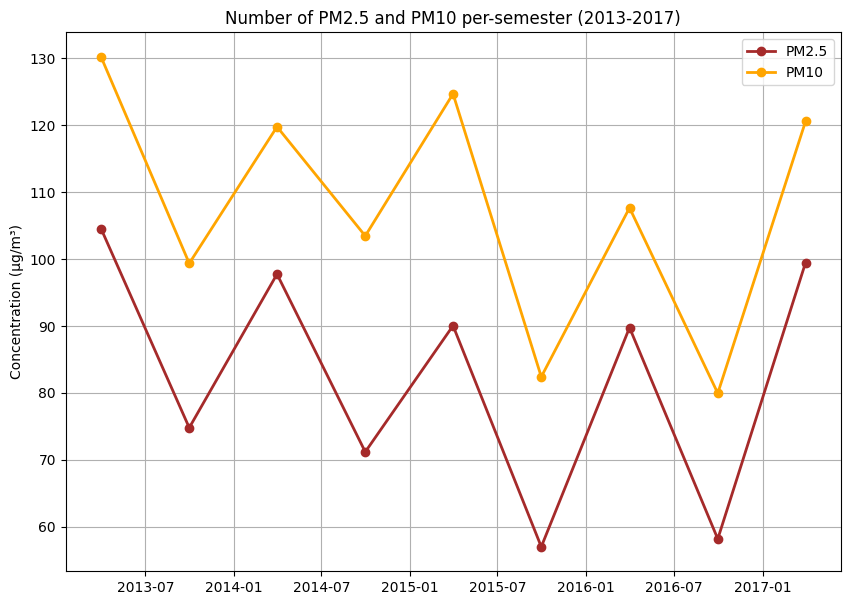

In [286]:
plt.figure(figsize=(10, 7))
plt.grid(zorder=0)
plt.plot(
    half_year_prsa_df['date_time'],
    half_year_prsa_df['avg_pm2_5'],
    linewidth=2,
    marker='o',
    label='PM2.5',
    color='brown')
plt.plot(
    half_year_prsa_df['date_time'],
    half_year_prsa_df['avg_pm10'],
    linewidth=2,
    marker='o',
    label='PM10',
    color='orange')
plt.ylabel("Concentration (μg/m³)")
plt.title('Number of PM2.5 and PM10 per-semester (2013-2017)')
plt.legend()
plt.show()

Berdasarkan visualisasi tersebut bahwa nilai rata-rata PM2.5 dan PM10 sedikit menurun dari tahun 2013 sampai dengan 2017 walaupun tidak signifikan dan sangat fluktuatif di tiap 1 semester (dalam kurun waktu 6 bulan).

### Bagaimana tren indeks kualitas udara di beberapa distrik di Tiongkok di tiap bulannya dalam periode satu tahunan?

#### Membuat Visualisasi Rata-rata Indeks Kualitas Udara per-bulan dalam Setahun (2013-2017) 

In [287]:
monthly_prsa_df = all_df.resample(rule='M', on='date_time').agg({
    "annually_period": "first",
    "pm2_5": "mean",
    "pm10": "mean"
})
monthly_prsa_df.index = monthly_prsa_df.index.strftime("%b")
monthly_prsa_df = monthly_prsa_df.reset_index()
monthly_prsa_df.rename(columns={
    "date_time": "month",
    "pm2_5": "avg_pm2_5",
    "pm10": "avg_pm10"
}, inplace=True)
monthly_prsa_df.head()

,month,annually_period,avg_pm2_5,avg_pm10
0,Mar,(2013-03-01 - 2014-02-28),104.571909,130.249832
1,Apr,(2013-03-01 - 2014-02-28),62.207292,95.931510
2,May,(2013-03-01 - 2014-02-28),81.876512,134.408462
3,Jun,(2013-03-01 - 2014-02-28),101.542242,115.859546
4,Jul,(2013-03-01 - 2014-02-28),66.839665,76.424118


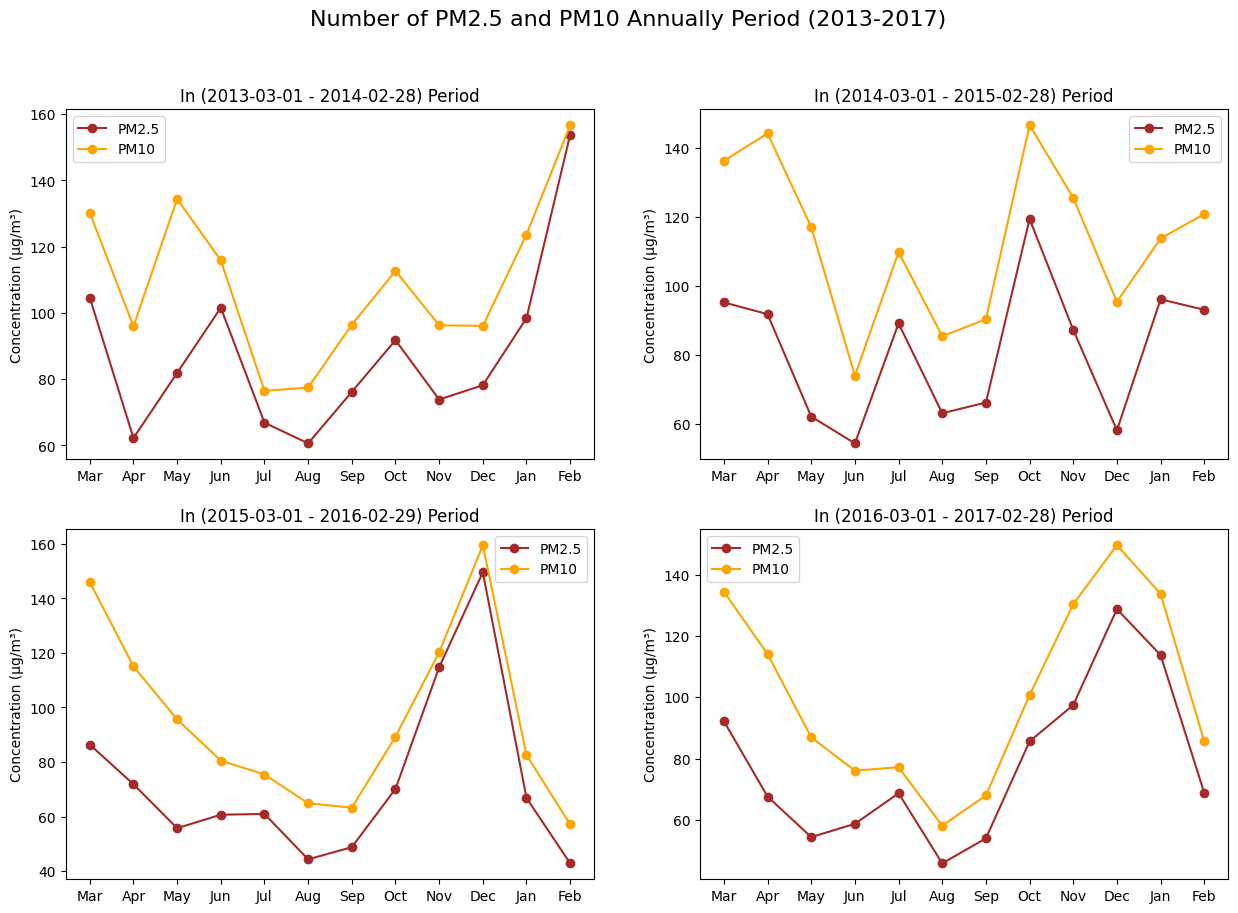

In [288]:
fig = plt.figure(figsize=(15, 10))

annually_period = monthly_prsa_df.groupby(by="annually_period")
period1 = annually_period.get_group("(2013-03-01 - 2014-02-28)")
period2 = annually_period.get_group("(2014-03-01 - 2015-02-28)")
period3 = monthly_prsa_df[monthly_prsa_df['annually_period'] == ("(2015-03-01 - 2016-02-29)")]
period4 = monthly_prsa_df[monthly_prsa_df['annually_period'] == ("(2016-02-29 - 2017-02-28)")]

plt.subplot(2, 2, 1)
plt.plot(
    period1['month'],
    period1['avg_pm2_5'],
    label='PM2.5',
    marker='o',
    color='brown')
plt.plot(
    period1['month'],
    period1['avg_pm10'],
    label='PM10',
    marker='o',
    color='orange')
plt.title('In (2013-03-01 - 2014-02-28) Period')
plt.ylabel("Concentration (μg/m³)")
plt.legend()

plt.subplot(2, 2, 2)
plt.plot(
    period2['month'],
    period2['avg_pm2_5'],
    label='PM2.5',
    marker='o',
    color='brown')
plt.plot(
    period2['month'],
    period2['avg_pm10'],
    label='PM10',
    marker='o',
    color='orange')
plt.title('In (2014-03-01 - 2015-02-28) Period')
plt.ylabel("Concentration (μg/m³)")
plt.legend()

plt.subplot(2, 2, 3)
plt.plot(
    period3['month'],
    period3['avg_pm2_5'],
    label='PM2.5',
    marker='o',
    color='brown')
plt.plot(
    period3['month'],
    period3['avg_pm10'],
    label='PM10',
    marker='o',
    color='orange')
plt.title('In (2015-03-01 - 2016-02-29) Period')
plt.ylabel("Concentration (μg/m³)")
plt.legend()

plt.subplot(2, 2, 4)
plt.plot(
    period4['month'],
    period4['avg_pm2_5'],
    label='PM2.5',
    marker='o',
    color='brown')
plt.plot(
    period4['month'],
    period4['avg_pm10'],
    label='PM10',
    marker='o',
    color='orange')
plt.title('In (2016-03-01 - 2017-02-28) Period')
plt.ylabel("Concentration (μg/m³)")
plt.legend()

plt.suptitle('Number of PM2.5 and PM10 Annually Period (2013-2017)', size=16)
plt.show()

Dari hasil <i>plotting</i> tersebut, dapat diketahui bahwa nilai rata-rata PM2.5 dan PM10 di beberapa distrik di Tiongkok cenderung menurun pada bulan Juni hingga September dan meningkat sekitar akhir dan awal tahunnya dalam periode satu tahun.

### Distrik mana yang memiliki indeks kualitas udara terbaik dan terburuk?

#### <i>AQI</i> berdasarkan parameter PM2.5 dari tahun 2013 sampai 2017

In [289]:
avg_aqi_df = all_df.groupby(by="station").agg({
    "pm2_5": "mean",
    "pm10": "mean",
}).rename(columns={
    "pm2_5": "avg_pm2_5",
    "pm10": "avg_pm10"
}).reset_index()
avg_aqi_df.head()

,station,avg_pm2_5,avg_pm10
0,Aotizhongxin,82.540623,110.210033
1,Changping,70.986438,94.788575
2,Dingling,66.845557,84.113713
3,Dongsi,86.144243,110.347617
4,Guanyuan,82.897522,109.372349


c:\Users\DELL\.conda\envs\main-ds\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\DELL\.conda\envs\main-ds\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\DELL\.conda\envs\main-ds\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\DELL\.conda\envs\main-ds\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDty

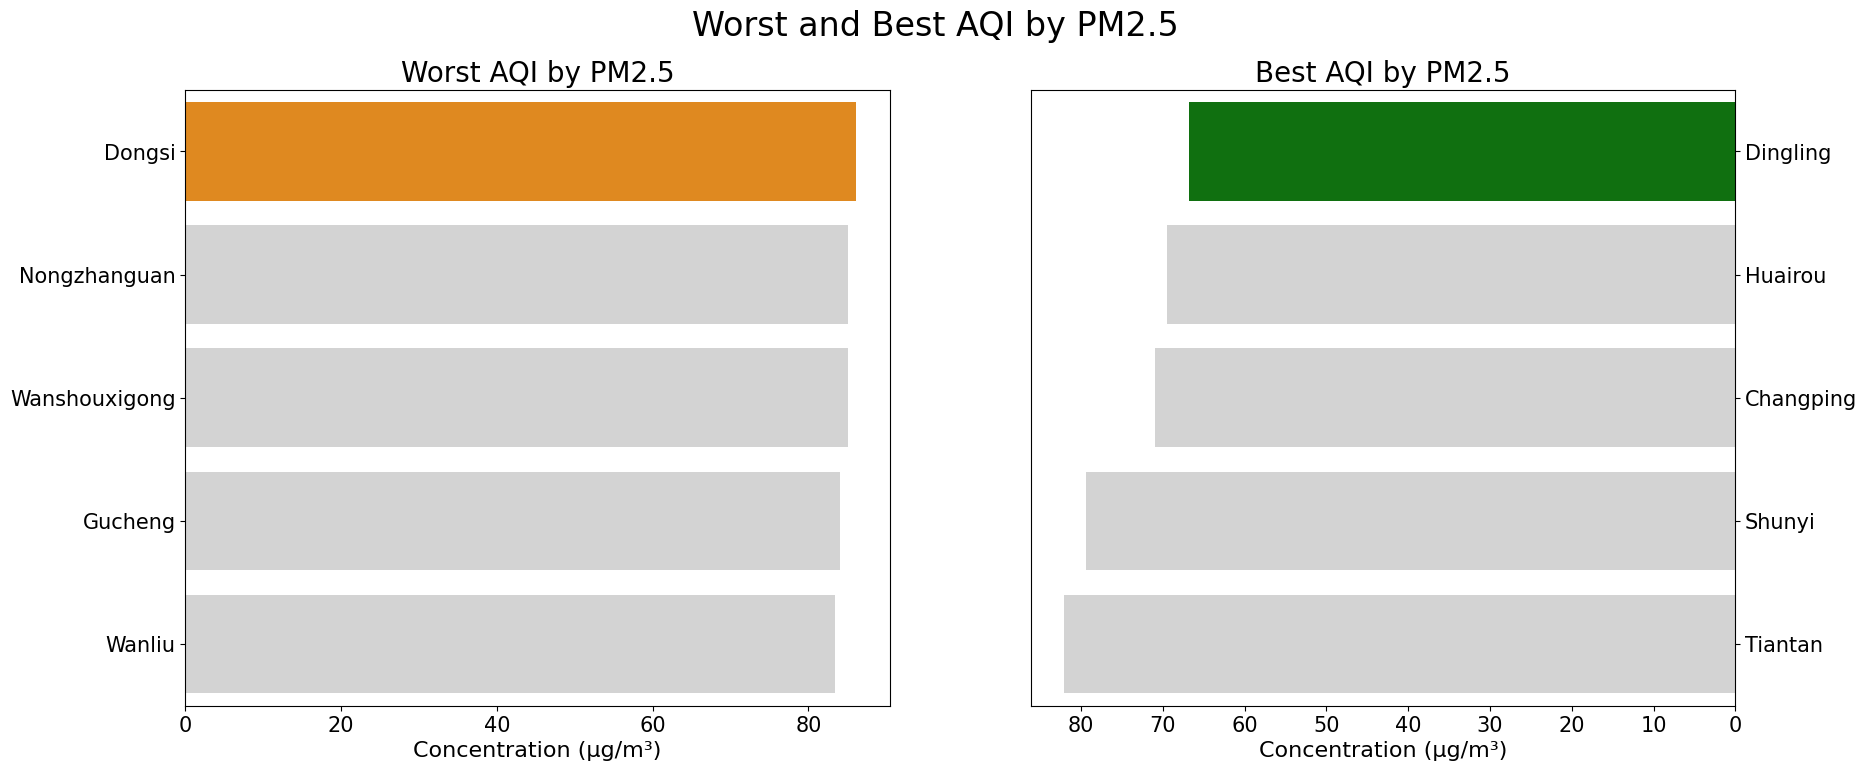

In [290]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20, 8))

colors = ["darkorange", "lightgrey", "lightgrey", "lightgrey", "lightgrey", "green"]

sns.barplot(
    x="avg_pm2_5",
    y="station",
    data=avg_aqi_df.sort_values("avg_pm2_5", ascending=False).head(), palette=colors, ax=ax[0]
)
ax[0].set_title("Worst AQI by PM2.5", fontsize=20)
ax[0].set_xlabel("Concentration (μg/m³)", fontsize=16)
ax[0].set_ylabel(None)
ax[0].tick_params(labelsize=15)

sns.barplot(
    x="avg_pm2_5",
    y="station",
    data=avg_aqi_df.sort_values(by="avg_pm2_5").head(), palette=reversed(colors), ax=ax[1]
)
ax[1].set_title("Best AQI by PM2.5", fontsize=20)
ax[1].set_xlabel("Concentration (μg/m³)", fontsize=16)
ax[1].invert_xaxis()
ax[1].yaxis.set_label_position("right")
ax[1].yaxis.tick_right()
ax[1].set_ylabel(None)
ax[1].tick_params(labelsize=15)

plt.suptitle("Worst and Best AQI by PM2.5", fontsize=24)
plt.show()

Berdasarkan diagram batang tersebut diketahui bahwa <b>Dongsi</b> merupakan distrik di Tiongkok yang memiliki indeks kualitas udara tertinggi (terburuk) berdasarkan nilai rata-rata dari PM2.5 sepanjang tahun 2013 sampai tahun 2017. Sedangkan yang memiliki indeks kualitas udara terbaiknya terdapat di distrik <b>Dingling</b>. 

#### <i>AQI</i>  berdasarkan parameter PM10 dari tahun 2013 sampai 2017

c:\Users\DELL\.conda\envs\main-ds\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\DELL\.conda\envs\main-ds\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\DELL\.conda\envs\main-ds\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\DELL\.conda\envs\main-ds\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDty

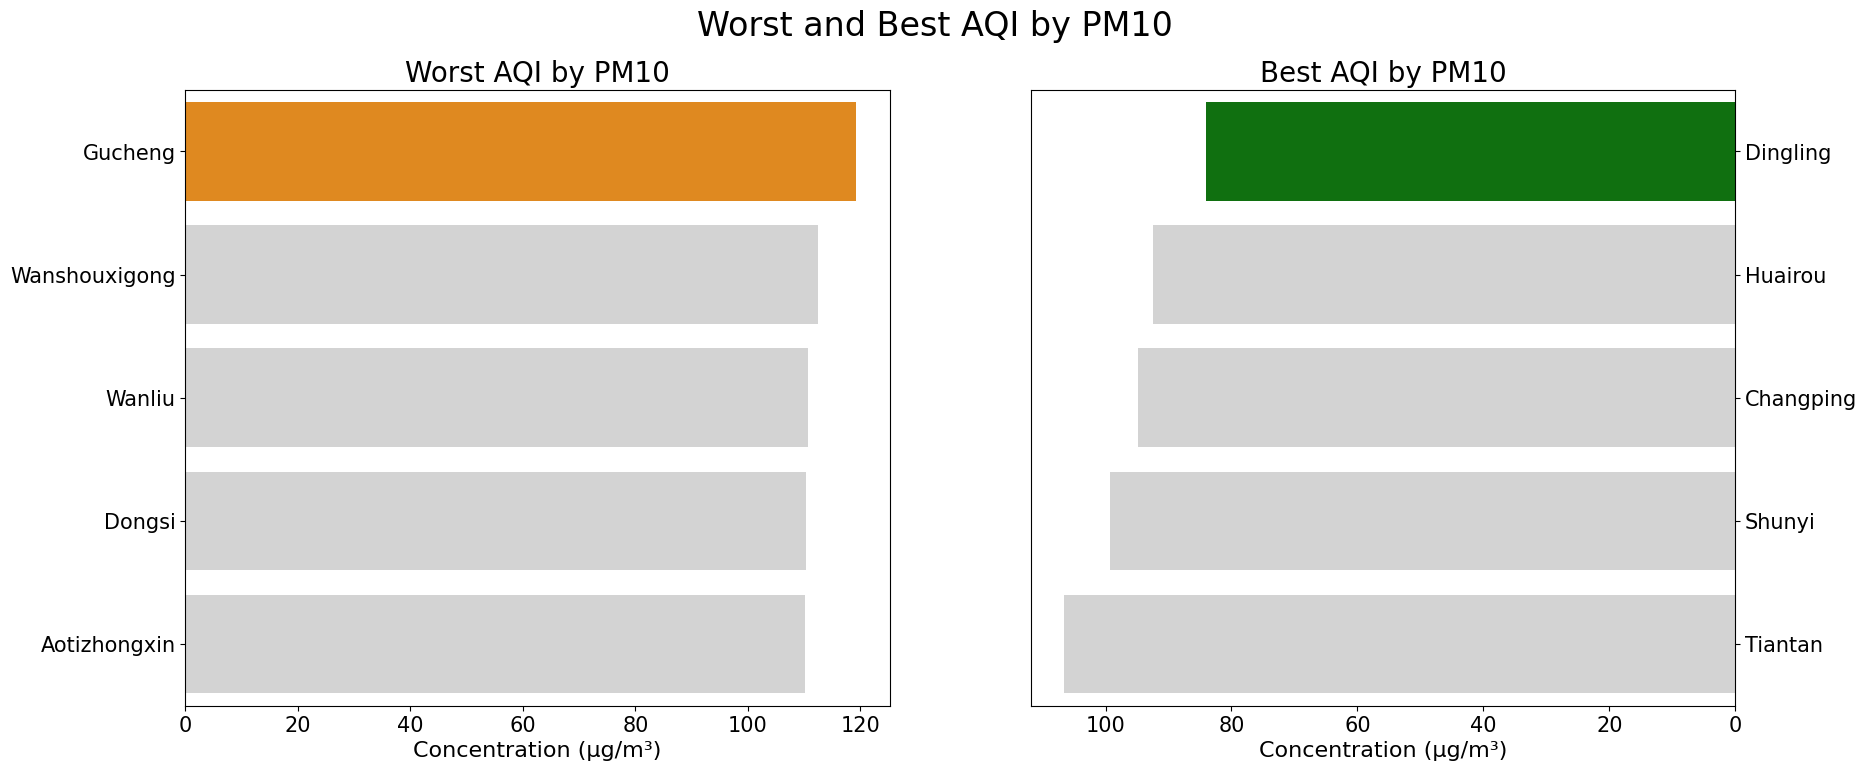

In [291]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20, 8))

sns.barplot(
    x="avg_pm10",
    y="station",
    data=avg_aqi_df.sort_values("avg_pm10", ascending=False).head(), palette=colors, ax=ax[0]
)
ax[0].set_title("Worst AQI by PM10", fontsize=20)
ax[0].set_xlabel("Concentration (μg/m³)", fontsize=16)
ax[0].set_ylabel(None)
ax[0].tick_params(labelsize=15)

sns.barplot(
    x="avg_pm10",
    y="station",
    data=avg_aqi_df.sort_values(by="avg_pm10").head(), palette=reversed(colors), ax=ax[1]
)
ax[1].set_title("Best AQI by PM10", fontsize=20)
ax[1].set_xlabel("Concentration (μg/m³)", fontsize=16)
ax[1].invert_xaxis()
ax[1].yaxis.set_label_position("right")
ax[1].yaxis.tick_right()
ax[1].set_ylabel(None)
ax[1].tick_params(labelsize=15)

plt.suptitle("Worst and Best AQI by PM10", fontsize=24)
plt.show()

Berdasarkan diagram batang tersebut diketahui bahwa <b>Gucheng</b> merupakan distrik di Tiongkok yang memiliki indeks kualitas udara tertinggi (terburuk) berdasarkan nilai rata-rata dari PM10 sepanjang tahun 2013 sampai tahun 2017. Sedangkan yang memiliki indeks kualitas udara terbaiknya sama seperti pada rata-rata dari PM2.5, yaitu pada distrik <b>Dingling</b>. 

### Kapan waktu yang mempengaruhi tinggi dan rendahnya indeks kualitas udara?

#### Berdasarkan Rata-rata Harian

In [292]:
avg_aqi_daily_df = all_df.resample(rule='D', on='date_time').agg({
    "pm2_5": "mean",
    "pm10": "mean",
})
avg_aqi_daily_df.index = avg_aqi_daily_df.index.strftime("%A")
avg_aqi_daily_df = avg_aqi_daily_df.reset_index()
avg_aqi_daily_df.rename(columns={
    "date_time": "day",
    "pm2_5": "avg_pm2_5",
    "pm10": "avg_pm10"
}, inplace=True)

day_order = {
    'Sunday': 0,
    'Monday': 1,
    'Tuesday': 2,
    'Wednesday': 3,
    'Thursday': 4,
    'Friday': 5,
    'Saturday': 6
}
avg_aqi_daily_df['day_num'] = avg_aqi_daily_df['day'].map(day_order)
avg_aqi_daily_df = avg_aqi_daily_df.groupby('day').mean()
avg_aqi_daily_df = avg_aqi_daily_df.sort_values(by=['day_num']).drop(columns=['day_num']).reset_index()
avg_aqi_daily_df

,day,avg_pm2_5,avg_pm10
0,Sunday,80.607674,107.636510
1,Monday,73.070004,98.334614
2,Tuesday,77.410244,101.847965
3,Wednesday,78.211320,101.475899
4,Thursday,79.228964,103.905981
5,Friday,83.071776,107.334888
6,Saturday,87.267333,113.814781


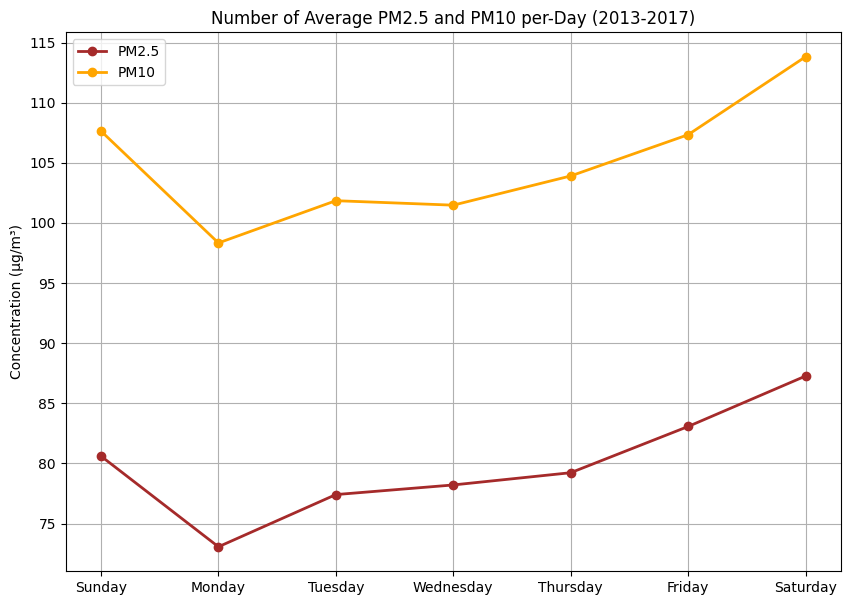

In [293]:
plt.figure(figsize=(10, 7))
plt.grid(zorder=0)
plt.plot(
    avg_aqi_daily_df['day'],
    avg_aqi_daily_df['avg_pm2_5'],
    linewidth=2,
    marker='o',
    label='PM2.5',
    color='brown')
plt.plot(
    avg_aqi_daily_df['day'],
    avg_aqi_daily_df['avg_pm10'],
    linewidth=2,
    marker='o',
    label='PM10',
    color='orange')
plt.ylabel("Concentration (μg/m³)")
plt.title('Number of Average PM2.5 and PM10 per-Day (2013-2017)')
plt.legend()
plt.show()

Dari diagram garis di atas dapat dilihat bahwa indeks kualitas udara berdasarkan nilai rata-rata per-harinya dari PM2.5 dan PM10 dari tahun 2013 sampai dengan 2017 terjadi peningkatan dari <b>hari Senin</b> dengan rata-rata terendahnya sampai dengan <b>hari Sabtu</b> yang menjadi rata-rata tertingginya. Terjadinya peningkatan PM2.5 dan PM10 yang tertinggi di akhir pekan tersebut bisa disebabkan karena adanya peningkatan aktivitas kendaraan yang menghasilkan gas karbon monoksida. Aktivitas kendaraan ini dapat menghasilkan emisi polutan udara.

#### Berdasarkan Rata-rata per-jam

In [294]:
avg_aqi_hourly_df = all_df.groupby(by="hour").agg({
    "pm2_5": "mean",
    "pm10": "mean"
}, inplace=True).reset_index()
avg_aqi_hourly_df['hour'] = avg_aqi_hourly_df['hour'].astype(str) + ":00"
avg_aqi_hourly_df.rename(columns={
    "pm2_5": "avg_pm2_5",
    "pm10": "avg_pm10"
})

,hour,avg_pm2_5,avg_pm10
0,0:00,87.696481,115.206576
1,1:00,86.848406,112.031010
2,2:00,84.803844,107.648670
3,3:00,82.212727,102.659579
4,4:00,79.465989,97.945965
5,5:00,76.538028,94.000502
6,6:00,74.289174,92.371314
7,7:00,73.424078,94.006330
8,8:00,74.403840,98.552736
9,9:00,76.061597,100.988080


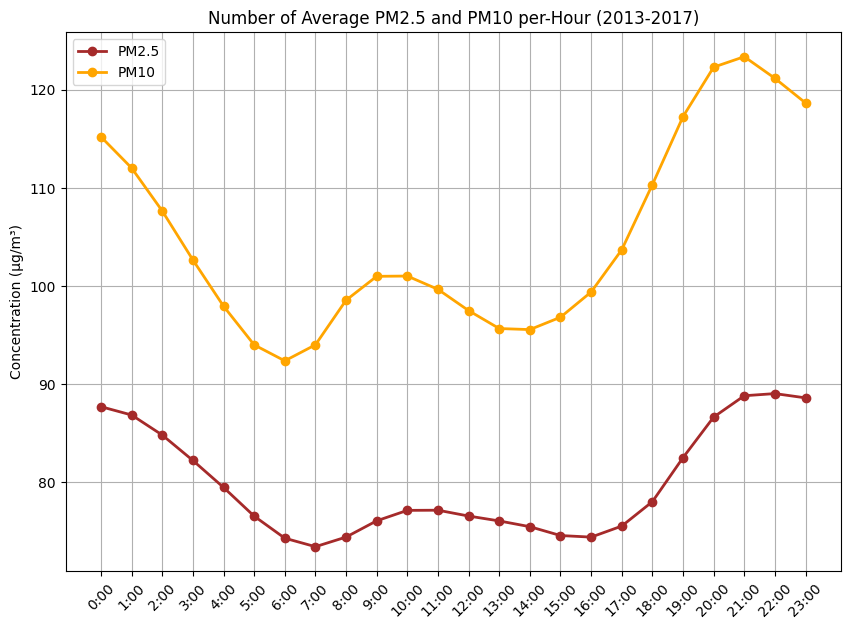

In [295]:
plt.figure(figsize=(10, 7))
plt.grid(zorder=0)
plt.plot(
    avg_aqi_hourly_df['hour'],
    avg_aqi_hourly_df['pm2_5'],
    linewidth=2,
    marker='o',
    label='PM2.5',
    color='brown')
plt.plot(
    avg_aqi_hourly_df['hour'],
    avg_aqi_hourly_df['pm10'],
    linewidth=2,
    marker='o',
    label='PM10',
    color='orange')
plt.ylabel("Concentration (μg/m³)")
plt.xticks(rotation=45)
plt.title('Number of Average PM2.5 and PM10 per-Hour (2013-2017)')
plt.legend()
plt.show()

Dari diagram garis di atas dapat dilihat bahwa indeks kualitas udara berdasarkan nilai rata-rata tiap 1 jam dari PM2.5 dan PM10 dari tahun 2013 sampai dengan 2017 rata-rata nilai tertinggi terjadi sekitar <b>pukul 21.00</b> untuk parameter PM10 dan <b>pukul 22.00</b> untuk PM2.5. Sedangkan rata-rata nilai terendahnya terjadi sekitar <b>pukul 06.00</b> untuk parameter PM10 dan <b>pukul 07.00</b> untuk parameter PM2.5. Hal ini disebabkan karena adanya inversi termal (lapisan udara hangat berada di atas lapisan udara dingin) pada malam hari di wilayah Tiongkok.

### Bagaimana demografi indeks kualitas udara di Tiongkok?

#### Berdasarkan parameter PM2.5 dari tahun 2013 sampai 2017

In [296]:
aqi_by_pm2_5_df = all_df.groupby(by="aqi_by_pm2_5").idx.nunique().reset_index()
aqi_by_pm2_5_df.rename(columns={
    "idx": "aqi_by_pm2_5_count"
}, inplace=True)
categories = ["Good", "Moderate", "Unhealthy for Sensitive Groups", "Unhealthy", "Very Unhealthy", "Hazardous"]
aqi_by_pm2_5_df["aqi_by_pm2_5"] = pd.Categorical(aqi_by_pm2_5_df["aqi_by_pm2_5"], categories=categories, ordered=True)
aqi_by_pm2_5_df.sort_values(by="aqi_by_pm2_5").reset_index(drop=True)

,aqi_by_pm2_5,aqi_by_pm2_5_count
0,Good,57170
1,Moderate,99817
2,Unhealthy for Sensitive Groups,54480
3,Unhealthy,145445
4,Very Unhealthy,44958
5,Hazardous,18898


c:\Users\DELL\.conda\envs\main-ds\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\DELL\.conda\envs\main-ds\lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


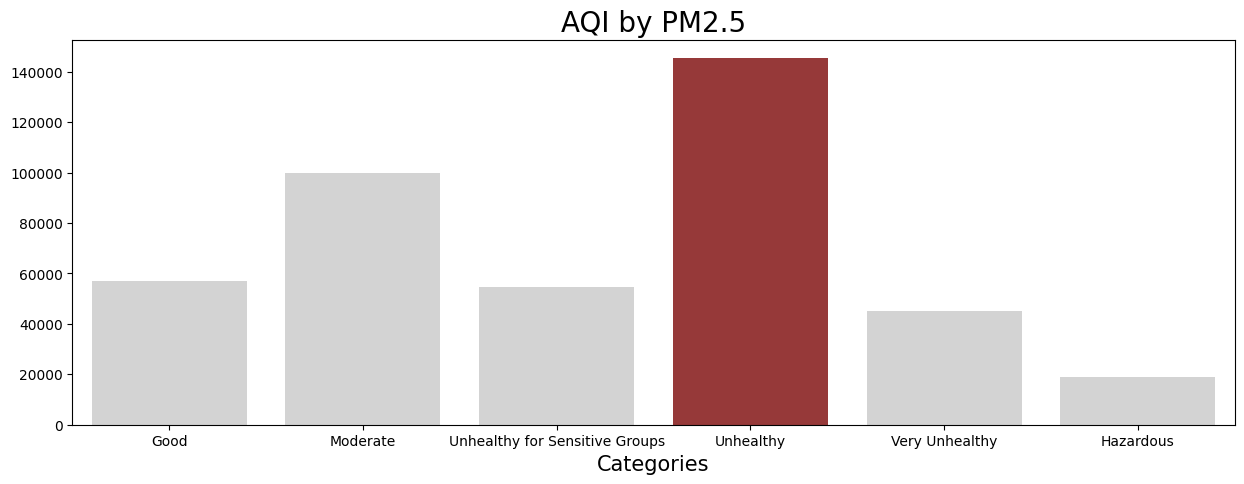

In [297]:
color_list = ["lightgrey", "brown"]
def set_custom_palette(counts, colors):
    palettes = []
    for i in counts:
        if i < counts.max():
            palettes.append(colors[0])
        else:
            palettes.append(colors[1])
    return palettes

plt.figure(figsize=(15, 5))

sns.barplot(
    y="aqi_by_pm2_5_count",
    x="aqi_by_pm2_5",
    data=aqi_by_pm2_5_df,
    palette=set_custom_palette(aqi_by_pm2_5_df["aqi_by_pm2_5_count"], color_list)
)

plt.title("AQI by PM2.5", fontsize=20)
plt.xlabel("Categories", fontsize=15)
plt.ylabel(None)
plt.show()

Berdasarkan diagram batang di atas dapat dilihat bahwa indeks kualitas udara kategori Tidak Sehat (<i>Unhealthy</i>) di Tiongkok memiliki nilai frekuensi terbanyak sepanjang Maret 2013 hingga Februari 2017.

#### Berdasarkan parameter PM10 dari tahun 2013 sampai 2017

In [298]:
aqi_by_pm10_df = all_df.groupby(by="aqi_by_pm10").idx.nunique().reset_index()
aqi_by_pm10_df.rename(columns={
    "idx": "aqi_by_pm10_count"
}, inplace=True)
categories = ["Good", "Moderate", "Unhealthy", "Very Unhealthy", "Hazardous"]
aqi_by_pm10_df["aqi_by_pm10"] = pd.Categorical(aqi_by_pm10_df["aqi_by_pm10"], categories=categories, ordered=True)
aqi_by_pm10_df.sort_values(by="aqi_by_pm10").reset_index(drop=True)

,aqi_by_pm10,aqi_by_pm10_count
0,Good,142108
1,Moderate,179764
2,Unhealthy,89479
3,Very Unhealthy,4976
4,Hazardous,4441


c:\Users\DELL\.conda\envs\main-ds\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\DELL\.conda\envs\main-ds\lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


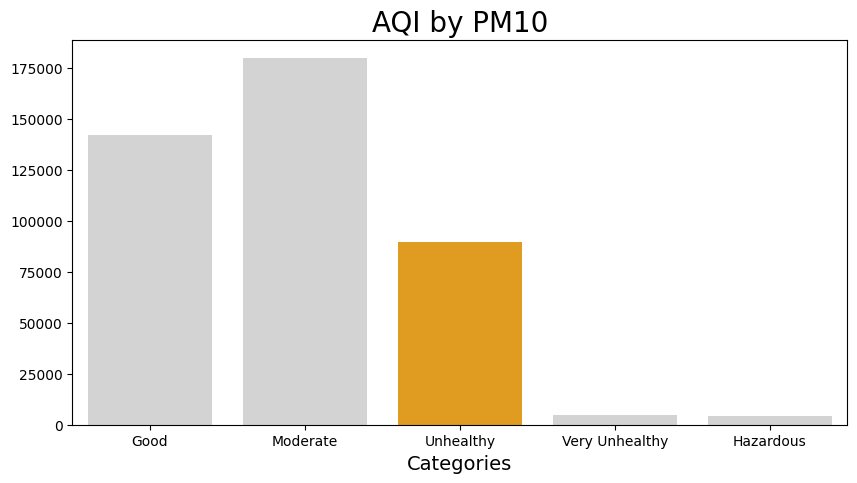

In [299]:
color_list = ["lightgrey", "orange"]

plt.figure(figsize=(10, 5))

sns.barplot(
    y="aqi_by_pm10_count",
    x="aqi_by_pm10",
    data=aqi_by_pm10_df,
    palette=set_custom_palette(aqi_by_pm10_df["aqi_by_pm10_count"], color_list)
)

plt.title("AQI by PM10", fontsize=20)
plt.xlabel("Categories", fontsize=14)
plt.ylabel(None)
plt.show()

Berdasarkan diagram batang tersebut dapat disimpulkan bahwa frekuensi indeks kualitas udara terbanyak sepanjang Maret 2013 hingga Februari 2017 terdapat pada kategori Sedang (<i>Moderate</i>).

### Bagaimana hubungan antara PM2.5, PM10, SO<sub>2</sub > (Belerang Dioksida), NO<sub>2</sub> (Nitrogen Dioksida), dan CO (Karbon Monoksida) terhadap kualitas udara?

In [300]:
aggregate_prsa_df = all_df.resample('3M', on='date_time').agg({
    "pm2_5": "mean",
    "pm10": "mean",
    "so2": "mean",
    "no2": "mean",
    "co": "mean"
})
aggregate_prsa_df = aggregate_prsa_df.reset_index()
aggregate_prsa_df.rename(columns={
    "pm2_5": "avg_pm2_5",
    "pm10": "avg_pm10",
    "so2": "avg_so2",
    "no2": "avg_no2",
    "co": "avg_co"
}, inplace=True)
aggregate_prsa_df.head()

,date_time,avg_pm2_5,avg_pm10,avg_so2,avg_no2,avg_co
0,2013-03-31,104.571909,130.249832,38.530270,67.344084,1449.916555
1,2013-06-30,81.875361,115.608725,20.291286,48.159295,1075.706448
2,2013-09-30,67.766069,83.288412,8.102185,42.999629,1006.852530
3,2013-12-31,81.329475,101.721119,25.361733,59.827535,1449.531354
4,2014-03-31,114.542091,138.249653,48.379880,66.850193,1839.926698


#### Membuat Kurva Hubungan antara PM2.5, PM10, SO<sub>2</sub >, NO<sub>2</sub>, dan CO per-Triwulan dari tahun 2013 sampai 2017

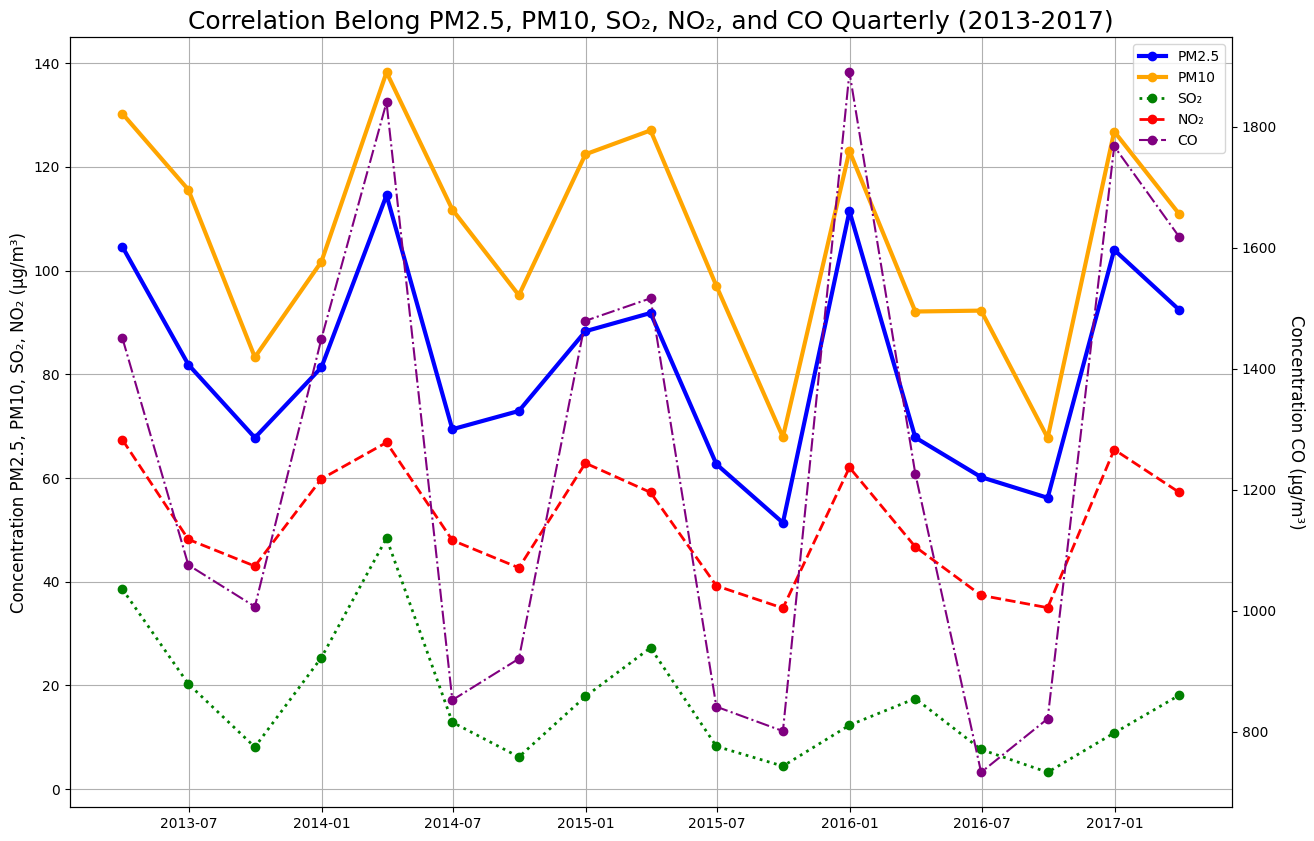

In [302]:
fig, ax0 = plt.subplots(figsize=(15, 10))
plt.grid(zorder=0)
ax0.plot(
    aggregate_prsa_df.date_time,
    aggregate_prsa_df.avg_pm2_5,
    label='PM2.5',
    color='blue',
    linewidth=3,
    marker='o'
)
ax0.plot(
    aggregate_prsa_df.date_time,
    aggregate_prsa_df.avg_pm10,
    label='PM10',
    color='orange',
    linewidth=3,
    marker='o'
)
ax0.plot(
    aggregate_prsa_df.date_time,
    aggregate_prsa_df.avg_so2,
    label='SO₂',
    color='green',
    linestyle=':',
    linewidth=2,
    marker='o'
)
ax0.plot(
    aggregate_prsa_df.date_time,
    aggregate_prsa_df.avg_no2,
    label='NO₂',
    color='red',
    linestyle='--',
    linewidth=2,
    marker='o'
)
ax0.set_ylabel("Concentration PM2.5, PM10, SO₂, NO₂ (μg/m³)", size=12)
ax0.tick_params(axis='y')

ax1 = ax0.twinx()
ax1.plot(
    aggregate_prsa_df.date_time,
    aggregate_prsa_df.avg_co,
    label='CO',
    color='purple',
    linestyle='-.',
    marker='o'
)
ax1.yaxis.tick_right()
ax1.set_ylabel("Concentration CO (μg/m³)", size=12, rotation=270, labelpad=20)
ax1.tick_params(axis='y')

lines1, labels1 = ax0.get_legend_handles_labels()
lines2, labels2 = ax1.get_legend_handles_labels()
lines = lines1 + lines2
labels = labels1 + labels2
ax0.legend(lines, labels)

plt.xlabel(None)
plt.title('Correlation Belong PM2.5, PM10, SO₂, NO₂, and CO Quarterly (2013-2017)', fontsize=18)
plt.show()

Berdasarkan kurva di atas dapat disimpulkan bahwa nilai-nilai dari SO<sub>2</sub >, NO<sub>2</sub>, dan CO merupakan faktor-faktor yang menentukan nilai PM2.5 dan PM10 sebagai penentu indeks kualitas udara. Karena jika menurunnya jumlah konsentrasi gas SO<sub>2</sub >, NO<sub>2</sub>, dan CO, maka nilai PM2.5 dan PM10 akan menurun sehingga nilai indeks kualitas udaranya pun semakin baik, begitu pula sebaliknya jika jumlah konsentrasinya meningkat maka nilai PM2.5 dan PM10 akan meningkat dan nilai indeks kualitas udaranya pun semakin buruk.

## Conclusion

- Nilai rata-rata PM2.5 dan PM10 sedikit menurun dari tahun 2013 sampai dengan 2017 walaupun tidak signifikan dan sangat fluktuatif di tiap 1 semester (dalam kurun waktu 6 bulan).
- Nilai rata-rata PM2.5 dan PM10 di beberapa distrik di Tiongkok cenderung menurun pada bulan Juni hingga September dan meningkat sekitar akhir dan awal tahunnya dalam periode satu tahun yang disebabkan oleh adanya pergantian musim/faktor perubahan cuaca di wilayah tersebut setiap tahunnya.
- Wilayah distrik di Tiongkok yang memiliki nilai rata-rata PM2.5 tertinggi (kualitas udara terburuk) sepanjang 2013 sampai 2017 adalah Dongsing dan yang terendahnya (kualitas udara terbaik) adalah Dingling. Sedangkan nilai rata-rata PM10 tertinggi adalah Gucheng dan nilai PM10 yang terendahnya Dingling seperti pada nilai PM2.5.
- Berdasarkan nilai rata-rata PM2.5 dan PM10 per-harinya dari tahun 2013 sampai dengan 2017, hari Senin memiliki indeks kualitas udara terbaik, sedangkan hari Sabtu menjadi yang terburuk. Pada nilai rata-rata per-jamnya, indeks kualitas udara yang terburuk terjadi sekitar pukul 21.00 untuk parameter PM10 dan pukul 22.00 untuk PM2.5, sedangkan yang terbaiknya sekitar pukul 06.00 untuk parameter PM10 dan pukul 07.00 untuk parameter PM2.5.
- Kategori indeks kualitas udara di Tiongkok berdasarkan jumlah frekuensi kategori parameter PM2.5 termasuk Tidak Sehat (<i>Unhealthy</i>). Namun kategori <i>AQI</i> berdasarkan parameter PM10 tergolong Sedang (<i>Moderate</i>).
- Hubungan nilai-nilai rata-rata dari gas SO<sub>2</sub >, NO<sub>2</sub>, dan CO sangat menentukan faktor-faktor nilai PM2.5 dan PM10 sebagai penentu indeks kualitas udara.